In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import sklearn.model_selection as train_test_split
import sklearn.linear_model as LinearRegression
import sklearn.preprocessing as LabelEncoder

In [2]:
df = pd.read_csv("realtor-data.csv")

df.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [3]:
df.shape

(1048575, 10)

In [4]:
print(df.duplicated().sum())

926465


#### Statictical Analysis before cleaning

Before addressing missing values, it's crucial to conduct a comprehensive analysis of the dataset to track any statistical changes. By examining the data prior to any modifications, we can gain insights into its initial distribution, trends, and characteristics.

This pre-analysis phase will help establish a baseline understanding of the dataset, enabling us to make informed decisions when handling missing values and performing subsequent analyses.

In [5]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,904735.000000,925066.000000,729378.000000,1.048367e+06,7.064910e+05,1.048503e+06
mean,3.327341,2.503352,15.593482,7.017637e+03,2.154038e+03,9.036547e+05
std,2.086783,1.956613,910.810132,3.807651e+03,3.002978e+03,2.849184e+06
min,1.000000,1.000000,0.000000,6.010000e+02,1.000000e+02,0.000000e+00
25%,2.000000,1.000000,0.110000,3.585000e+03,1.114000e+03,2.750000e+05
50%,3.000000,2.000000,0.280000,7.103000e+03,1.650000e+03,4.950000e+05
75%,4.000000,3.000000,1.110000,1.002800e+04,2.500000e+03,8.500000e+05
max,123.000000,198.000000,100000.000000,9.999900e+04,1.450112e+06,8.750000e+08


#### Regression Model and Duplicate Data

While duplicates in a regression model can potentially skew the final interpretation by introducing bias, it's crucial to contextualize these duplicates within the data source. In this specific case, duplicate entries might not necessarily indicate redundant data; rather, they likely reflect the fluctuating nature of the housing market.

Deleting these duplicates could inadvertently remove valuable insights into the dynamics of house prices. Therefore, it may be more beneficial to retain these duplicates in our dataset to ensure a comprehensive analysis of the housing market trends.


In [7]:
print(df.isnull().sum())

status                 0
bed               143840
bath              123509
acre_lot          319197
city                  77
state                  0
zip_code             208
house_size        342084
prev_sold_date    517985
price                 72
dtype: int64


#### Handling Missing Values in the Dataset

It's evident from the dataset that there are numerous missing values across various categories. While the absence of beds in some estates might be expected due to single-room housing, missing values for city, zip code, price and bathrooms are critical omissions. 

Given the size of the dataset, I've opted to exclude rows containing missing values for city, zip code, prices and bathrooms, as this information is essential for our analysis.

For other unspecified values, such as beds, we'll replace them with 0. This ensures consistency in the dataset while acknowledging the absence of specific information.

It's important to note that the "Previously Sold Date" column will not be utilized for analysis in this study. While this information may be relevant in other contexts, it is not pertinent to the specific objectives of our analysis.

In [8]:
# Drop missing values under the bath, city, zip-code, and price columns
df = df.dropna(subset=['bath', 'city', 'zip_code', 'price'])

# Drop "prev_sold_date" column
df = df.drop(columns=['prev_sold_date'])

# Fill the other missing values with 0 values
df = df.fillna(0)

In [9]:
df.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,0.0,65000.0


In [10]:
df.isnull().sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

In [11]:
df.shape

(924929, 9)

# Visualisation

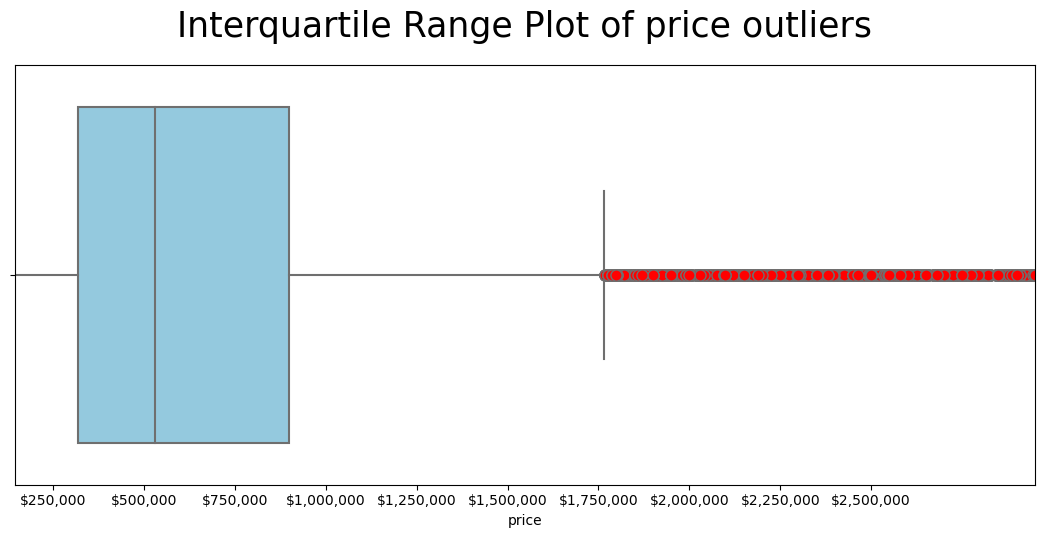

In [12]:
#Create boxplot
plt.figure(figsize=(17,7
                    ))

x_min = df['price'].quantile(.05)
x_max = df['price'].quantile(.95)

ax = sns.boxplot(data=df, x='price', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('price')
plt.ylabel('')
plt.title('Interquartile Range Plot of price outliers', fontsize=25, pad=20)

plt.xlim(x_min, x_max)

xtick_values = [250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2250000, 2500000]  # Adjust as needed
ax.set_xticks(xtick_values)
ax.set_xticklabels(['$250,000', '$500,000', '$750,000', '$1,000,000', '$1,250,000', '$1,500,000', '$1,750,000', '$2,000,000', '$2,250,000', '$2,500,000'])  # Adjust labels as needed


plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # Adjust margins as desired

After adjusting the graph's options, it's evident that there is a wide price range for the houses listed in our dataset. The graph illustrates a diverse range of house prices, spanning from $300,000 to $1.75 million, with an average house price approximately around $500,000.

The presence of numerous red dots on the plot indicates the existence of outliers within our dataset. These outliers represent exceptionally high-priced houses, contributing to the diversity of the housing market. The visualization highlights the presence of luxurious properties among the dataset.

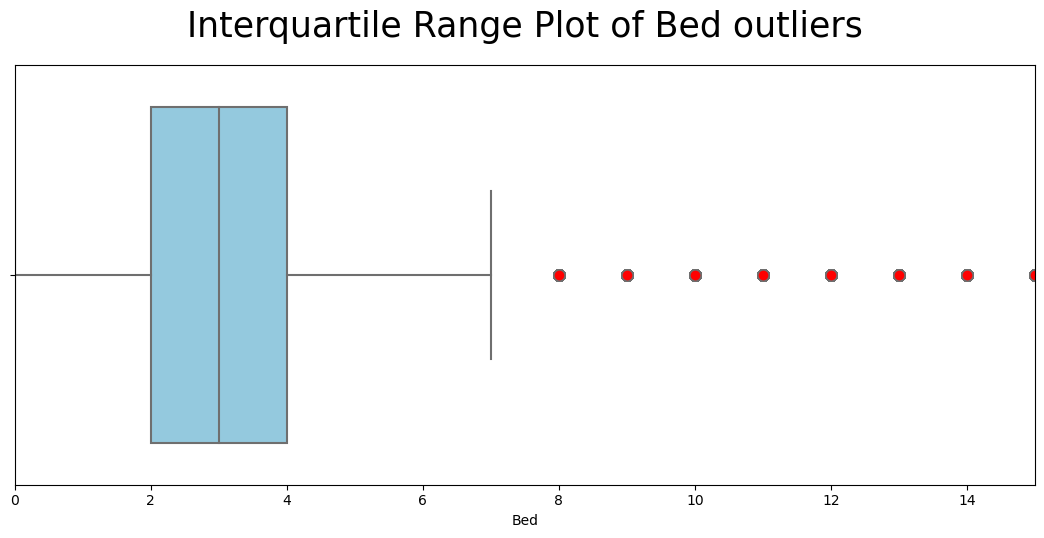

In [13]:
plt.figure(figsize=(17, 7))

sns.boxplot(data=df, x='bed', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('Bed')
plt.ylabel('')
plt.title('Interquartile Range Plot of Bed outliers', fontsize=25, pad=20)

plt.xlim(0, 15)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)


Similar to the price variable, the number of bedrooms exhibits a significant number of outliers in the dataset. These outliers typically correspond to the most luxurious houses, characterized by exceptionally high bedroom counts, such as 8 to 20+ bedrooms per house.

It's noteworthy that some houses in the dataset don't contain any bedrooms, which could represent unique property types or data anomalies.

On average, houses in the dataset have 3 bedrooms. However, it's considered normal for houses to have up to 7 bedrooms, indicating a diverse range of property sizes and types within the dataset.

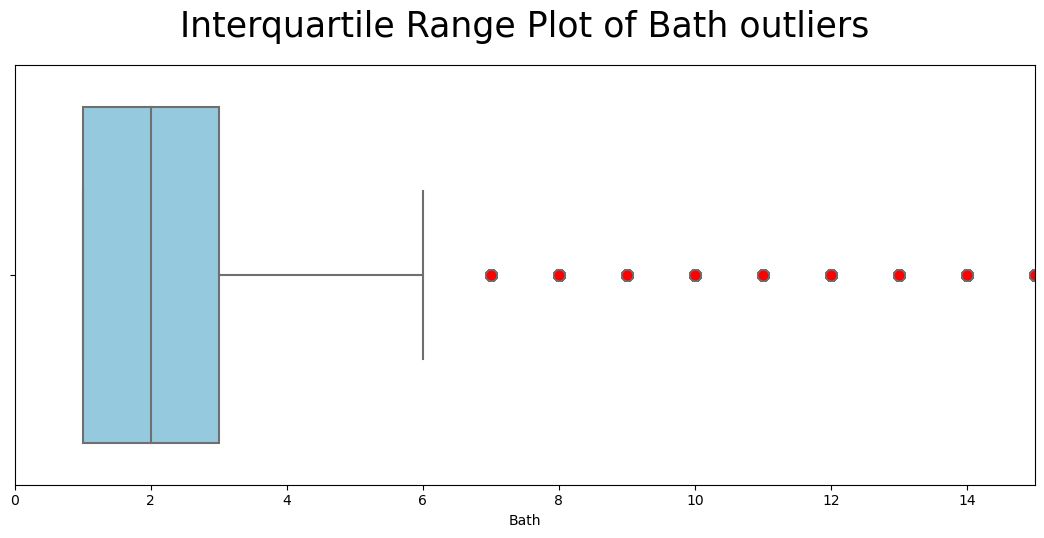

In [14]:
plt.figure(figsize=(17, 7))

sns.boxplot(data=df, x='bath', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('Bath')
plt.ylabel('')
plt.title('Interquartile Range Plot of Bath outliers', fontsize=25, pad=20)

plt.xlim(0, 15)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)


Similar to the number of bedrooms, the number of bathrooms in houses also exhibits a pattern of outliers. These outliers often indicate luxurious properties with exceptionally high bathroom counts, ranging from 7 to 20+ bathrooms per house. Additionally, there are instances where houses have no bathrooms, which could be outliers or data anomalies.

On average, houses in the dataset have approximately 2 bathrooms. However, it's noteworthy that the upper range of bathroom counts typically does not exceed 6 bathrooms per house, suggesting a general trend in housing construction or property types represented in the dataset.

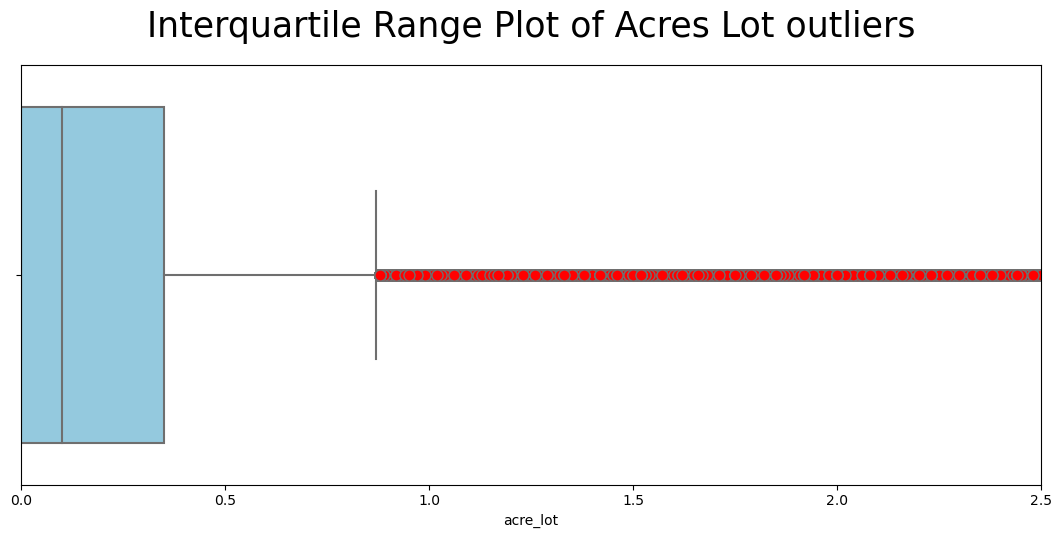

In [15]:
plt.figure(figsize=(17, 7))

sns.boxplot(data=df, x='acre_lot', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('acre_lot')
plt.ylabel('')
plt.title('Interquartile Range Plot of Acres Lot outliers', fontsize=25, pad=20)

plt.xlim(0, 2.5)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

The number of acres in lot sizes exhibits a similar outlier pattern to house prices, with numerous outliers beginning at acreage sizes of 0.8 and above. These outliers likely represent properties with large land holdings or estates.

The range of acreage lot sizes spans from 0 to 3 acres, with an average lot size of approximately 0.175 acres. This suggests a diverse range of property sizes within the dataset, from small lots to larger parcels of land.

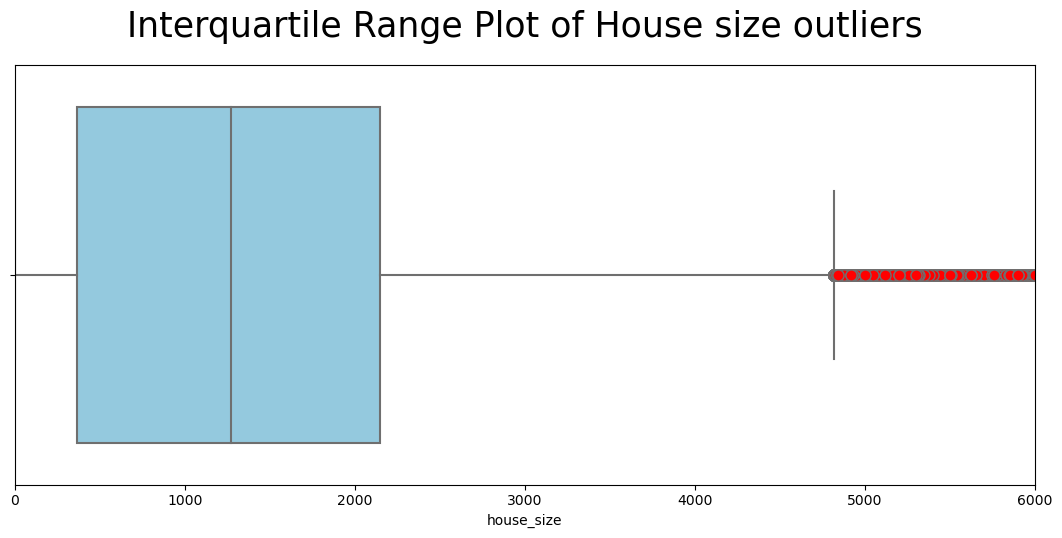

In [16]:
plt.figure(figsize=(17, 7))

sns.boxplot(data=df, x='house_size', color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.xlabel('house_size')
plt.ylabel('')
plt.title('Interquartile Range Plot of House size outliers', fontsize=25, pad=20)

plt.xlim(0, 6000)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

The box plot above illustrates the distribution of house sizes in square feet within the dataset. The regular range of house sizes spans from 0 to 2,100 square feet, with an upper interquartile range extending just slightly below 5,000 square feet. 

On average, houses in the dataset have an approximate size of 1,250 square feet. However, similar to previous variables analyzed, the house size variable also includes a considerable number of outliers. These outliers likely represent properties with exceptionally large or small footprints compared to the majority of houses in the dataset.

After examining the outliers present in our dataset, it's evident that there are numerous luxurious properties that fall outside the average range. To ensure the robustness of our model analysis, we will focus specifically on "normal" average houses and exclude any outliers representing luxurious or exceptionally large properties.

By narrowing our focus to average houses, we aim to create a more representative model that accurately captures the trends and patterns present in the majority of the housing market.

In [17]:
# Determine thresholds for outlier detection
thresholds = {
    'bed' : {'lower_bound' : 1, 'upper_bound': 7}, 
    'bath' : {'lower_bound' : 1, 'upper_bound': 6},
    'acre_lot' : {'lower_bound' : 0, 'upper_bound': 0.75},
    'house_size' : {'lower_bound' : 0, 'upper_bound': 5000},
    'price' : {'lower_bound' : 0, 'upper_bound': 1250000}
    }

# Filter out outliers

df_filtered = df.copy()

for variable, bound in thresholds.items():
    lower_bound = bound['lower_bound']
    upper_bound = bound['upper_bound']
    df_filtered = df_filtered[(df_filtered[variable] >= lower_bound) & (df_filtered[variable] <= upper_bound)]



In this project, I've chosen to start with boxplots as a means of initially cleaning up present outliers in the dataset. This approach allows us to identify and address outliers effectively before proceeding with additional data exploration using further visualizations.

By prioritizing the removal of outliers through boxplots, we aim to reduce noise in the dataset, enabling more accurate and insightful analysis in subsequent stages of the project.

In [18]:
#New df summary
df_filtered.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,614674.000000,614674.000000,614674.000000,614674.000000,614674.000000,6.146740e+05
mean,2.906313,2.063905,0.134212,7273.311210,1137.460584,4.931167e+05
std,1.335268,0.944599,0.169512,3856.589238,950.836398,2.750147e+05
min,1.000000,1.000000,0.000000,601.000000,0.000000,0.000000e+00
25%,2.000000,1.000000,0.000000,3874.000000,0.000000,2.790000e+05
50%,3.000000,2.000000,0.070000,7419.000000,1100.000000,4.399000e+05
75%,4.000000,3.000000,0.210000,10305.000000,1714.000000,6.750000e+05
max,7.000000,6.000000,0.750000,95000.000000,5000.000000,1.250000e+06


In [50]:
#Set the display format for float values
df_filtered['price'] = df_filtered['price'].astype(int)

df_filtered['price']

ValueError: invalid literal for int() with base 10: '105000.00'

In [51]:
df_filtered.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.00
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.00
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.00
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.00
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,0.0,65000.00


Text(0, 0.5, 'Count')

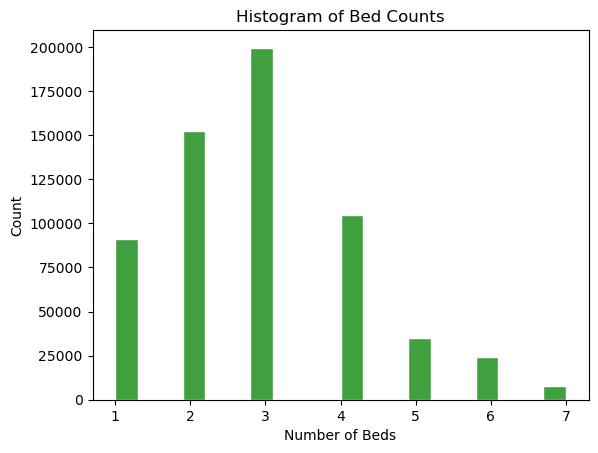

In [20]:
#Histogram of Bed count distribution
#Creat Hist
sns.histplot(df_filtered['bed'], bins=20, color='green', edgecolor='white')

#Set title and lebels
plt.title('Histogram of Bed Counts')
plt.xlabel('Number of Beds')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

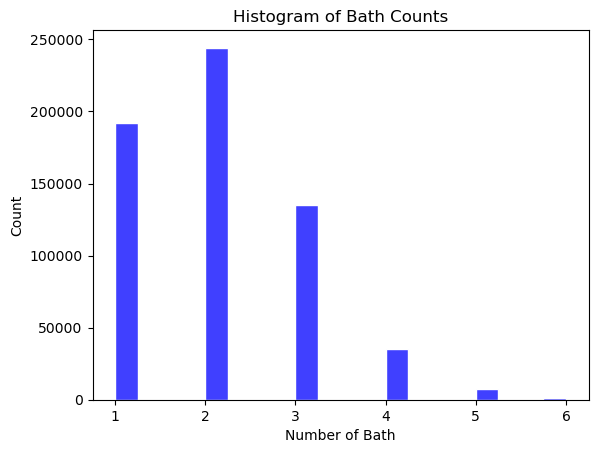

In [21]:
#Histogram of Bath count distribution
#Creat Hist
sns.histplot(df_filtered['bath'], bins=20, color='blue', edgecolor='white')

#Set title and labels
plt.title('Histogram of Bath Counts')
plt.xlabel('Number of Bath')
plt.ylabel('Count')

In [22]:
#Create a sample for the scatterplot
sample_size = 1000

#Create sample DF
sample_df = df_filtered.sample(n=sample_size, replace = True)

#Optionally, reset the index
sample_df.reset_index(drop=True, inplace=True)

ValueError: invalid literal for int() with base 10: '999999.00'

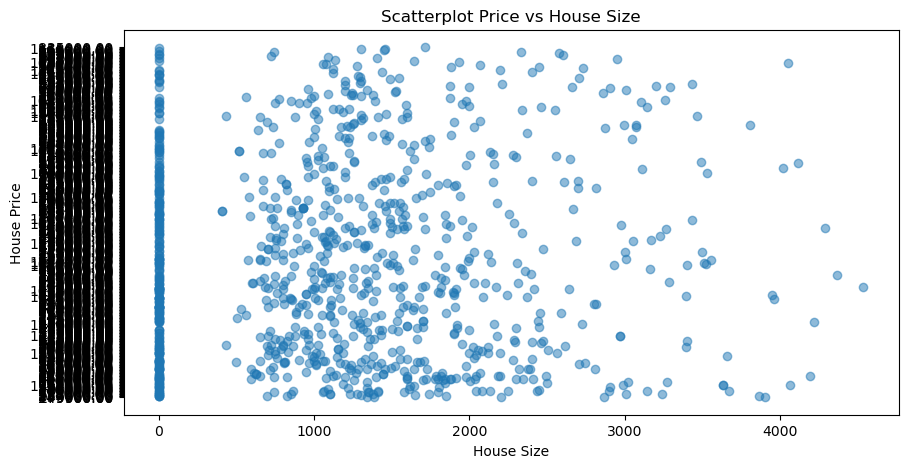

In [47]:
plt.figure(figsize=(10, 5))

#Create a scatter plot
plt.scatter(sample_df['house_size'], sample_df['price'], alpha=0.5)

#Set title and labels
plt.title('Scatterplot Price vs House Size')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.yticks(range(0, int(max(sample_df['price']))+1, 50000))

In [38]:
#List average House price per satete
average_house_price = df_filtered.groupby('state')['price'].mean().reset_index()
average_house_price

TypeError: Could not convert 65000.00144900.00174900.00289900.00172500.00249900.00349900.00249900.00300000.00279900.00248900.00239900.00194900.00449900.00239900.00449900.00479900.00484900.00459900.00469900.00469900.00469900.00459900.00479900.0040000.0059900.00249900.00248000.00299000.0097500.00221000.00735000.00279900.00349900.00349900.00175000.00339000.00165000.00160000.00140000.00270000.00294900.00169900.00185000.00489900.00279000.00214900.00115000.00225000.00295000.00345000.00174900.00189900.00154500.00299900.00269900.00475000.00179900.00254900.00280000.00199900.00189000.00289900.00558000.00250000.00400000.00215000.00245000.00310000.00349900.00339900.00329999.00219900.00175000.00399900.00171000.00225000.00224900.00409000.00274900.00199900.00290000.00249900.00395000.00260000.00290000.00249500.00269900.00339999.00195000.00295000.00122500.00178200.00249900.00399900.00339900.00279900.00269900.00239900.00219999.00200000.00324900.00339900.00273000.00329900.00329900.00329900.00329900.00209900.00249900.00349900.00165000.00295000.00219000.00335000.00260000.00259900.00280000.00169000.00115000.00129000.00279900.00359800.00345000.00209000.00284900.00329000.00257500.00365000.00399700.00289900.00375000.00269900.00424900.00200000.00179900.00269900.00247900.00204900.00225000.00199900.00445000.00289000.00420000.00224000.00259900.00210000.00145000.00169900.00229900.00199900.00269900.00239900.00230000.00234900.00239900.00319700.00434900.00629900.00294900.00229900.00299999.0099900.0099900.00194000.00199900.00299900.00125000.00166259.00199900.00139900.00245000.00269900.00219900.00379900.0040000.00499900.00159900.00359900.00375000.00169900.00339900.00170000.00289900.00749900.00179900.00379999.00210000.00374900.00289900.00349900.00224550.00139900.00492000.00279900.00225000.00325000.00175000.00199900.00475000.00400000.00499900.00255000.00250000.00624900.00279900.00309900.00205000.00799900.00159900.00204900.00169900.00339900.00479900.00400000.00399900.00299900.00699900.00249000.00217000.00159000.00237500.00475000.00175000.00259900.00374900.00400000.00178200.0055000.00249000.00339900.00244900.00229000.00399900.00400000.00140000.00345000.00269900.00269900.00199900.00349900.00575000.00239900.00160000.00339900.00499000.00225000.00299900.00199900.00219900.00229900.00172900.00329000.00409000.00325000.00329900.00250000.00169000.00185000.00180000.00205000.00199900.00295000.00489900.00675000.00229900.0084900.00257500.00130000.00379900.00439000.00119900.00359000.00309900.00365000.00135000.00350000.00399900.00299900.00185000.00200000.00185900.00299900.00384900.00269900.00149500.00424900.00345000.00329000.0075000.0024900.00475000.00249900.00345000.00475000.00450000.00259900.00399000.00169900.00204900.00299900.00109000.00379000.00269900.00269900.00529000.00495000.0075000.00349900.00289900.00239000.00199900.00599900.00699900.00199900.00359788.00214900.00136000.00239000.00239900.00135000.00375000.00299000.00319700.00204900.00434900.00359000.00329900.00279900.00260000.00139900.00329900.00399900.00269900.00319900.00349900.00560000.00249900.00469900.00479900.00469900.00469900.00479900.00248000.00221000.00294900.00270000.0097500.00279900.00165000.00160000.00185000.00299900.00214900.00489900.00115000.00269900.00174900.00189900.00179900.00199900.00280000.00299900.00309900.00310000.00250000.00239900.00245000.00329999.00215000.00309900.00225000.00274900.00224900.00290000.00379900.00290000.00260000.00269900.00195000.00295000.00171000.00239900.00249900.00199900.00324900.00339999.00349900.00273000.00200000.00229900.00209900.00219999.00319900.00260000.00335000.00219000.00280000.00259900.00165000.00359800.00345000.00249900.00179950.00284900.00329000.00209000.00270000.00399700.00289900.00375000.00269900.00260000.00269900.00247900.00225000.00289000.00179900.00204900.00445000.00259900.00199900.00269900.00239900.00210000.00224000.00229900.00629900.00239900.00234900.00234900.00339900.00249900.00294900.00229900.00299999.00194000.0099900.00275000.00239900.0099900.00166259.00199900.00299000.00245000.00199900.00125000.00269900.00269900.00369000.00219900.00385000.00359999.00300900.00459900.00469900.00469900.00469900.00479900.00459900.00469900.00474900.00181900.0089000.00349900.00439900.00464900.00385000.00199900.00169900.00229000.00179900.00219900.00249900.00250000.00136000.00469900.00350000.00385000.00244900.0050000.00165000.00199900.00179900.00209900.00140000.00195000.00221000.00249900.00189995.00459900.00197000.00279900.00349900.00349900.00385000.00185000.00270000.00186829.00215000.00259900.00184900.00449900.00294900.00389900.00385000.00165000.0090000.00193500.00249900.00299900.00699900.00230000.00199900.00349900.00299000.00550000.00449900.00445025.00109900.00173000.00140000.00195000.00149900.00489900.00194900.00260000.00499000.00259900.00249500.0054000.00270000.00269900.00259900.00269900.00275000.00174900.00189900.00170000.0098500.00249900.00249900.00219900.0079900.0074900.00469900.00269900.00464900.00499900.00294900.00419900.0049900.00139900.00199900.0044900.00189900.00309900.00229000.00249900.00249900.00254900.00279900.00310000.00349900.00239900.00250000.00349900.00329999.00395000.00319900.00310000.00280000.00179900.00225000.00179900.00499900.00214900.00269900.00199900.00249525.00224900.00269900.00149000.00349900.0087500.00215000.00209900.00325000.00245000.00299900.00149900.00160000.00409900.00650000.00279900.00339900.00148000.00224900.0084900.00174000.00279900.00329900.00225000.00389900.00349900.00309900.00369900.00390000.00265000.00260000.00295000.00380000.00195000.00282900.00334900.00365000.00269000.00139900.00184900.00229900.00229900.00224900.00199999.00124900.00399900.00197000.00386900.00118000.00274900.00299900.00295000.00239900.00290000.00299900.00319900.00309000.00295000.0092000.00189900.00171000.00209900.00159900.00265000.00249900.00249900.00319900.00199900.00269900.00379900.00290000.00199900.00240000.00249900.00249000.00214900.00349900.00339999.00149900.00198000.00204900.00389900.00249900.00485000.00115000.00229900.00274900.00275000.00229900.00273000.00264900.00199900.00149900.00234500.00165000.00199900.00285000.00259900.00299900.00220000.00110000.00215000.00300000.00224900.00199900.00239900.00155000.00244900.00324900.00190000.00200000.00349900.00250000.00279000.00179500.00214900.00354900.00134900.00199900.00199900.00319900.00299900.00209900.00324900.00119000.00624900.00280000.00219000.00279900.00339900.00329900.00329900.00329900.00329900.00115000.0062500.00138000.0060000.00239900.00129900.00264900.00165000.00319900.00264900.00165000.00294900.00259900.00515000.00260000.00260000.00239000.00324000.00259900.0040000.00148000.00169000.00425000.00164900.00415000.00299900.00274900.00179950.00345000.00402000.00100000.00124900.00219900.00239900.00354900.00249900.00179900.00339900.00389900.00112000.00265600.00329000.00224900.00339999.00399900.00199900.00224900.00499900.00209900.00365000.00269900.00295000.00270000.00218888.00164900.00369000.00249900.00159900.00289900.00399900.00289900.00279900.00285000.00279900.00259900.00260000.00299900.00234000.00370000.00265000.00450000.00269900.00247900.00375000.00225000.00289000.00119900.00279900.00269900.00249000.00182900.00204900.00249000.00130000.00289000.00270000.00439900.00169900.00189900.0089900.00214900.00189900.00145000.00445000.00174000.00299900.00260000.00209900.00184900.00224900.00199900.00174900.00369900.00259500.00239900.00199900.00435000.0034900.00150000.00179900.00224900.00319900.00229900.00109900.00224000.00185000.00279900.00224500.00444900.00229900.00274900.00289900.00475000.00410000.00387500.00370000.00495000.00209000.00210000.00229000.00234900.00439000.00234999.00234900.00419900.00339900.00349900.00375000.00499900.00309900.00229900.00365000.00355000.00194000.0099900.0099900.00199900.00115000.00294900.00299900.00389000.00139900.00189900.00129000.00199900.00125000.00239900.00166259.00140000.00229900.00199900.00285000.00359900.00299000.00385000.00329900.00245000.00194900.0065000.00144900.00289900.00200000.00249900.00249900.00300000.00324900.00248900.00239900.00319900.00225000.00249900.00299999.00234900.00339900.00359999.00309900.00304900.00304900.00439900.00459900.00469900.00469900.00469900.00459900.00469900.00474900.00479900.00219900.00229000.0050000.00165000.00136000.00179900.00339900.00354900.00369900.00309900.00469900.00379575.00350000.00385000.00248000.00140000.0097500.00249900.00221000.00279900.00349900.00349900.00519900.00385000.00185000.00165000.00270000.00186829.00294900.00389900.00299000.00399900.00385000.00160000.00185000.00114999.00299900.00344900.00260000.00489900.00219900.00269900.00294900.00275000.00174900.00189900.00179900.00199900.00249900.00249900.00299900.00229000.00309900.00189900.00249900.00279900.00310000.00239900.00349900.00329999.00395000.00229900.00120000.00280000.00199900.00179900.0087500.00329900.00224900.00389900.00249525.00558000.00215000.00299900.00160000.00650000.00215000.00245000.00339900.00224900.00174000.00229900.00279900.00225000.00197000.00419900.00309900.00299900.00224900.00274900.00265000.00260000.00295000.00290000.00269900.00195000.00380000.00365000.00169000.00189900.00171000.00229900.00265000.00319900.00290000.00295000.00269900.00249900.00199900.00249900.00379900.00319900.00439900.00237500.00339999.00240000.00295000.00149900.00199900.00149900.00199900.00234500.00165000.00259900.00249900.00299900.00220000.00239900.00324900.00349900.00200000.00273000.00229900.00209900.00199900.00319900.00299900.00219999.00335000.00215000.00219000.00299900.00280000.00274999.00324900.00339900.00329900.00329900.00329900.00329900.0060000.00138000.00239900.00148000.00425000.00165000.00359800.00264900.00115000.00124900.00179950.00354900.00345000.00449900.00284900.00209000.00339900.00225000.00329000.00244900.00349000.00399900.00279900.00499900.00519900.00389900.00269900.00270000.00218888.00227500.00179900.00159900.00399700.00289900.00399900.00285000.00375000.00259900.00260000.00370000.00269900.00247900.00265000.00270000.00225000.00182900.00289000.00179900.00189900.00214900.00249000.00204900.0089900.00445000.00439900.00184900.00199900.00229900.00145000.00269900.00239900.00199900.00240000.00435000.00210000.00249900.00234900.00234900.00249900.00269000.00294900.00629900.00299999.0034900.00150000.00179900.00259900.00224000.00279900.00379900.00224500.00229900.00289900.00109900.00410000.00387500.00370000.00495000.00230000.00149900.00419900.00339900.00375000.00309900.00229900.00355000.00194000.0099900.00119900.0099900.00294900.00275000.00319900.00169900.00239900.00129000.00199900.00125000.00166259.00140000.00299000.00229900.00199900.00385000.00245000.00389000.00194900.00199000.00194900.00169900.00375000.0065000.00144900.00289900.00174900.00172500.00279900.00365000.00300000.00279900.00248900.00449900.00479900.00484900.00459900.00469900.00469900.00469900.00459900.00469900.00474900.00479900.00469900.00479900.00469900.00469900.00479900.00385000.00350000.00379575.00385000.00140000.00385000.00299000.00385000.00269900.00279900.00249900.00249525.00295000.00395000.00169000.00189900.00269900.00349900.00273000.00124900.00148000.00264900.00319900.00284900.00225000.00259900.00265000.00189900.0034900.00150000.00249900.00294900.00339900.00390000.00355000.00129000.00229900.00385000.00449900.00479900.00484900.00449900.00469900.00474900.00479900.00359999.00439900.00459900.00469900.00469900.00469900.00459900.00150000.00157500.00219900.0075000.00229000.00469900.00199900.00169900.00165000.00136000.00179900.00244900.00140000.0050000.00249900.00189995.00385000.00185000.00215000.00299000.00186829.00389900.00385000.00109900.00193500.00299900.00140000.00294999.00550000.00420000.0089000.00149900.00260000.00349900.00249500.00249900.00139900.00219900.0098500.00249900.00309900.00254900.00294900.00279900.00239900.00395000.0049900.00229000.00189900.0044900.00269900.00249525.00224900.00199900.00269900.00349900.00389900.00299900.00245000.0087500.00650000.00160000.00148000.00224900.00229900.00174000.00184900.00169000.00139900.00329900.00279900.00189900.0092000.00209900.00197000.00309900.00229900.00390000.00265000.00159900.00459900.00295000.00265000.00260000.00237500.00199900.00295000.00269900.00309000.00380000.00365000.00249900.00379900.00240000.00319900.00249000.00264900.00149900.00199900.00199900.00199900.00165000.00115000.00249900.00485000.00220000.00199900.00224900.00149900.00279000.00259900.00354900.00299900.00110000.00319900.00199900.00190000.00214900.00209900.00294900.00279900.00349900.0040000.0062500.0060000.00239900.00349900.00148000.00319000.00425000.00129900.00264900.00274900.00284900.00239000.00402000.00124900.00219900.00239900.00164900.00179950.00415000.00179900.00354900.00170000.00249900.00339900.00265600.00285900.00244900.00339999.00349000.00249900.00499900.00289900.00389900.00218888.00227500.00270000.00259900.00260000.00299900.00370000.00265000.00399900.00285000.00289000.00169900.00189900.00269900.00214900.00319900.00249000.00182900.00249000.0089900.00270000.00439900.00260000.00224900.00174900.00259500.00145000.00199900.0034900.00150000.00179900.00319900.00229900.00109900.00185000.00279900.00224500.00274900.00410000.00387500.00370000.00495000.00435000.00175000.00349900.00234999.00234900.00419900.00249900.00339900.00665000.00294900.00179000.00439000.00224900.00349900.00309900.00375000.00390000.00355000.0099900.00165000.00119900.00199900.00239900.00140000.00285000.00299000.00294900.00389000.00248000.00489900.00250000.00310000.00280000.00349900.00359800.00365000.00399700.00445000.00210000.00239900.00629900.00840000.00159900.00304900.00304900.00309900.00170000.00349900.00339900.00369900.00309900.00379900.00407000.00375000.00221000.00354900.00349900.00349900.00248000.00289900.00240000.0097500.00519900.00399900.00160000.00185000.00289900.00114999.00344900.00224550.00325000.00499900.00289900.00324500.00489900.00289900.00115000.00179900.00249900.00229900.00299900.00475000.00400000.00310000.00250000.0024900.00475000.00624900.00349900.00120000.00280000.00179900.00254900.00229900.00169900.00558000.00399900.00289900.00389900.00215000.00400000.00399900.00269900.00269900.00339900.00219900.00275000.00299900.00240000.00419900.00399000.00409000.00439900.00395000.00374900.00295000.00217000.00399900.00249000.00339900.00269900.00279900.00400000.00269500.00475000.00339900.00329900.00329900.00329900.00209900.00138000.00249900.00349900.00219999.00335000.00249900.00295000.00299900.00215000.00219000.00274999.00329900.00115000.00180000.00279900.00345000.00359800.00495000.00449900.00339000.00290000.00399900.00200000.00179900.00159900.00519900.00250000.00365000.00399700.00247900.00424900.00179900.00232000.00279900.00204900.00229900.00379000.00445000.00269900.00225000.00210000.00259900.00184900.00259900.00249900.00145000.00289900.00379900.00269000.00629900.00529000.00240000.00194000.00230000.00214900.00149900.00279900.00239900.00319700.00434900.00375000.00449900.0099900.00199900.00305000.00260000.00219900.00275000.00299900.00245000.00319900.00299000.00417000.00199000.00840000.00449900.00479900.00484900.00459900.00469900.00474900.00479900.00459900.00469900.00469900.00469900.00150000.00469900.00469900.00479900.00479900.00385000.00350000.00385000.00179900.00469900.00379575.00140000.00389900.00385000.00385000.00185000.00299000.00299900.00349900.0089000.00249900.00279900.00199000.00229900.00250000.00239900.00224900.00395000.00279900.00275000.00249525.00250000.00295000.00169000.00199900.00189900.00184900.00459900.00237500.00269900.00279000.00220000.00319000.00219900.00349900.00219995.00124900.00129900.00148000.00349900.00264900.00179950.00284900.00225000.00199900.00184900.00259900.00265000.0038900.00129000.00189900.00319900.00349900.00315000.00234900.00339900.00249900.00309900.00355000.0093600.00249900.00390000.00150000.0034900.00175000.00204900.00310000.00270000.00227500.00259900.00260000.00129000.00339900.00299000.00229900.00214900.00385000.00325000.00449900.00479900.00484900.00459900.00469900.00469900.00469900.00474900.00479900.00469900.00469900.00459900.00385000.00249900.00479900.00469900.00469900.00350000.00379575.00479900.00385000.00140000.00279900.00385000.00185000.00165000.00270000.00294900.00299000.00389900.00385000.00299900.00489900.00189900.00199900.00249900.00395000.00280000.00309900.00279900.00249525.00310000.00239900.00309900.00215000.00260000.00245000.00295000.00195000.00329999.00169000.00189900.00171000.00279900.00225000.00224900.00274900.00269900.00379900.00249900.00290000.00199900.00290000.00339999.00295000.00220000.00239900.00200000.00324900.00349900.00229900.00273000.00148000.00165000.00264900.00319900.00284900.00280000.00260000.00259900.00124900.00179950.00209000.00284900.00225000.00329000.00270000.00289900.00269900.00259900.00260000.00269900.00265000.00375000.00225000.00189900.00445000.00289000.00150000.0034900.00210000.00224000.00229900.00249900.00199900.00299999.00239900.00234900.00234900.00339900.00294900.00229900.00355000.0099900.00129000.00125000.00240000.00269900.00199900.00299000.00229900.00369000.00269900.00385000.00166259.00275000.00239900.00325000.0040000.00304900.00304900.00309900.0059900.00359900.00249900.00170000.00339000.00135000.00339900.00735000.00375000.00339900.00149000.00439900.00309900.00369900.00248000.00149900.00145000.0097500.00289900.00254900.00139999.00221000.00145000.00175000.00240000.00354900.00315000.00175000.00140000.00270000.00174500.00210000.00194000.00479900.00164900.00185000.00160000.00179900.00125000.00224550.00210000.00214900.00499000.00289900.00129900.00344900.00399900.00169900.00160000.00279000.00295000.00489900.00145000.00289900.00225000.00209900.00115000.00325000.00193900.00174900.00130000.00139000.00154500.00149900.00189900.00299900.00149900.00209900.00244900.00450000.00199900.00229000.00475000.00142900.00189900.00179900.00220000.00199900.00475000.00225000.00499900.0024900.00400000.00189000.00310000.00475000.00229900.00250000.00624900.00205000.00329999.00280000.00180000.00254900.00225000.00289900.00169900.00558000.00215000.00479900.00400000.00224900.00399900.00215000.00242900.00189900.00699900.00209900.00239900.00249900.0099900.00219900.00229900.00399900.00279000.00225000.00389900.00224900.00409000.00187900.00395000.00269900.00169900.00249000.00249500.00269900.00195000.00295000.00115000.00217000.00175000.00199900.00399900.00171000.00249900.00399000.00290000.00400000.00374900.00269500.00339999.00159000.00178200.00239900.00290000.00189900.00350000.00319900.00225000.00269500.00249000.00330000.00339900.00399900.00229900.00400000.00475000.00324900.00314900.00164900.00189900.00209900.00249900.00219900.00269900.00219999.00269900.00335000.00575000.00279900.00220000.00260000.00499000.00185000.00299900.00209900.00285000.00165000.00205000.00167000.00359800.00349900.00310000.00249900.00365000.00295000.00250000.00209000.00290000.00137000.00169000.00180000.00195000.00324900.00129000.00129900.00449900.00345000.00130000.00119900.00495000.00339000.00489900.00299900.00399900.00229900.00399900.00257500.00195000.00279900.00132900.00250000.00379900.00365000.00399700.00269900.00229000.00200000.00230000.00300000.00269900.00247900.00424900.00150000.00345000.00415000.00259900.00205000.00169900.00199900.00234900.00199900.00249900.00199900.00239900.00529000.00249900.00239000.00349900.00210000.00224000.00225000.00229900.00145000.00259900.00229900.00275000.00379900.00199900.00599900.00699900.00629900.00210000.00126500.00219000.00234900.00239900.00375000.00219900.00375000.00135000.00189900.00434900.00229900.00299999.00230000.00219900.00214900.0099900.00305000.00205000.00166259.00299900.00329900.00275000.00299000.00349900.00186900.00159900.00200000.00179900.00239900.00232000.00245000.00204900.00225000.00279900.00379000.00445000.00289000.00495000.00279900.00125000.00299900.00269900.00139900.00219900.00369000.00550000.00269900.00169900.00194900.00200000.00125000.00199900.00166259.00269900.00249900.00249900.00324900.00199900.00375000.00269900.00219900.00269900.00144900.00289900.00249900.00249900.00279900.00300000.00248900.00194900.00200000.00169900.00219000.00289900.00309900.00211777.00189000.00172500.00249900.00249900.00265000.00324900.00375000.00194900.00169900.00289900.00200000.00249900.00249900.00324900.00375000.00194900.0065000.0077000.00299900.00144900.00369900.00174900.00200000.00169900.00189000.00309900.00219000.00172500.00494900.00289900.00211777.00529000.00249900.00449900.00479900.00484900.00449900.00479900.00484900.00309900.00249900.00221000.00279900.0097500.00309900.00354900.00469900.00349900.00349900.00350000.00379575.00385000.00789000.00449900.00449900.00300900.00359999.00175000.00159900.00181900.0089000.00349900.00439900.00304900.00304900.00385000.0055000.00119999.0040000.00140000.0089900.00169900.00179900.00179900.00250000.0025000.00244900.00275900.0050000.00224900.00165000.00195000.00229900.00195000.00234900.0075000.0078000.00199900.00301000.00119900.00195000.00119900.0088000.00192000.00337900.00179000.00189995.00239900.00245000.00354900.00174000.00299000.00279000.00349900.00349900.00125100.00140000.0097500.00209900.00149900.00248000.00132000.00224900.00252000.00110000.00249900.00339999.00259900.00240000.00449900.00221000.00459900.00279900.00410000.00519900.00385000.00179900.00129900.00105000.00179900.00184900.00119000.00139900.00189900.00389900.00186829.00215000.00294900.00175000.00219900.00270000.00213000.00159000.00199000.00289900.00385000.00165000.00160000.00185000.00193500.00239900.0090000.00115000.00249900.00299000.00230000.00199900.00170000.00449900.00300000.00399900.00445025.00160000.00185000.00175000.00160000.0069900.00234900.00259000.00289900.00140000.00224999.00114999.00299900.00225000.00169900.00699900.00214900.00349900.00299995.00550000.00109900.00199000.00173000.00195000.00214900.00209900.00344900.00475000.00220000.00294999.00209900.00115000.00399900.00229000.00250000.00499900.00382000.00429900.00420000.00159000.00127200.00200000.00260000.00155000.00149900.00170000.0054000.00259900.00499000.00184900.00175000.00269900.00324500.00270000.00195000.00270000.00259900.00250000.00565000.00274900.00230000.00225000.00275000.00299900.00225000.00170000.0098500.00249900.00219900.00299900.00160000.0074900.00469900.00464900.00499900.00199900.00274900.00215000.00294900.00209000.00419900.00249900.0049900.00347900.00229900.0079900.00189900.00229000.0044900.00295000.00199900.00209900.00199900.00310000.00229900.00365000.00239900.00489000.00245000.00250000.00349900.00329999.00139000.00310000.00280000.00120000.00179900.00499900.00254900.00179900.00214900.00264500.00225000.00269900.00249525.00495000.00224900.00149000.00269900.00399900.00349900.0087500.00325000.00209900.00499900.00395000.00249525.00275000.00409900.00160000.00259900.00245000.00149900.00319900.00200000.00230000.00158500.00169900.00215000.00289900.00329900.00189900.00558000.00469000.00259900.00349900.00309900.00389900.00279900.00215000.00650000.00299900.00459900.00589900.00397900.00360000.00339900.00279900.00148000.00189900.00224900.0084900.00174000.00195000.00198500.00279900.00399900.00224900.00199999.00225000.00190000.00389900.00390000.00369900.00449900.00220000.00265000.00269900.00260000.00295000.00269900.00380000.00282900.00195000.00334900.00365000.00169900.00269000.00139900.00160000.00229900.00210000.00184900.00124900.00197000.00275000.00399900.00299900.00224900.00239900.00160000.00419900.00274900.00419900.00234900.00290000.00249900.00299900.00309000.00269900.00179900.00219900.00229900.00118000.00386900.00239900.00319900.00249900.00179000.00295000.00299900.00395000.00239900.00379900.00264900.00290000.00249900.00269925.00249000.00379900.00319900.00189000.00349900.00295000.0092000.00189900.00209900.00171000.00265000.00159900.00212000.00260000.00399000.00199900.00249900.00269900.00699000.00249900.00199900.00249900.00240000.00249000.00439900.00240000.00214900.00274900.00339999.00209900.00289000.00189900.00199900.00179900.00139900.00249900.00199900.00199000.0079900.00249900.00337900.00309900.00254900.00249900.00259900.00279900.00274900.0090000.00199900.00199900.00349900.00265000.00250000.00279900.00299900.00395000.00149900.00167500.00185000.00198000.00399900.00237900.00190000.00850000.00345000.00389900.00399000.00249900.00189900.00229900.00269500.00275000.00264900.00229900.0088000.00199900.00165000.00339900.00204900.00599900.00485000.00220000.00215000.00224900.00129000.00320000.00799900.00115000.00155000.00339900.00200000.00395000.00269000.00273000.00279000.00279900.00149900.00199900.00234500.00285000.00139000.00599900.00209100.00139999.00179500.00250000.00209900.00249900.00199900.00255000.00299900.00199900.00319900.00310000.00279900.00495000.00209900.00192500.00219999.00324900.00215000.00419900.00389900.00280000.00274999.00339900.00329900.00329900.00329900.00329900.0062500.00150000.00134900.00354900.00199900.00214900.00129900.00264900.00335000.00299900.00235000.00119000.00219000.00624900.00375000.00294900.00279900.00115000.00200000.0060000.00138000.00239900.0034900.00165000.00264900.00399900.00319900.0085000.00165000.00475000.00515000.00260000.00260000.00450000.00239000.00315000.00324000.00259900.00349900.0034000.0040000.00148000.00199900.00425000.00319900.00169000.00124900.00197000.00125000.00179950.00415000.00354900.00164900.00175000.00345000.00249900.00170000.00110000.00189900.00209000.00599900.00225000.00285900.00244900.00234900.00249900.00185000.00289900.00339999.00289000.00399900.00375000.00115000.00124800.00239900.00449900.00179900.00339000.00239999.00339900.00224900.00488888.00329000.00112000.00249900.00150000.00219900.00279900.00199900.00499900.00495000.00265600.00389900.00410000.00270000.00295000.00218888.00225000.00130000.00399900.00224900.00289900.00250000.00519900.00209900.00129000.00459900.00365000.00269900.00199900.00369000.00249900.00159900.00399900.00289900.00225000.00399700.00414900.00279900.00370000.00359900.001195000.00279900.00259900.00260000.00200000.00124900.00179900.00164900.00329900.00284900.00265000.00189900.00247900.00225000.00285000.00279900.00375000.00289000.00189000.00160000.00370000.00299900.00245900.00279900.00269900.00279900.00450000.00225000.00300000.00199900.00182900.00130000.00249900.00119900.00169900.00130000.00189900.00249900.00179900.00269900.00164900.00190000.00204900.00289000.00270000.00369000.00429900.00225000.00439900.00169900.00190000.00189900.00214900.00249000.00232000.00279900.00249000.00620000.0089900.00445000.00249500.00189900.00224900.00229900.00369900.00145000.00269900.00235000.00174000.00289000.00299900.00260000.00109900.00340000.00184900.00249000.00209900.00174900.00199900.00324900.00259500.00270000.00199900.00239900.00444900.00240000.00435000.0034900.00179900.00284900.00329900.00224900.00145000.00319900.00259900.00229900.00224000.00185000.00379900.00279900.00224500.00204900.00250000.00169900.00475000.00387500.00495000.00150000.00210000.00209000.00229000.00225000.00249900.00329900.0049900.00179900.00119900.00219900.00234900.00375000.00225000.00259000.00164999.00249900.00475000.00665000.00299900.00294900.00269000.00127900.00299999.00439000.00264900.00234999.00234900.00149900.00265000.00279900.00419900.00339900.00349900.00279500.00309900.00229900.00365000.00355000.00194000.00230000.00440000.00499900.00319700.00210000.00516900.00474900.00129900.00278000.00375000.00390000.00295000.00368600.0099900.00199900.00115000.00294900.00299000.00299900.00189900.00529900.0099900.0029900.0074000.00166259.00199900.00305000.00299900.00329900.00265000.00245000.00139900.00389000.00129000.00209000.00199900.00125000.00239900.00140000.0076000.00229900.00285000.00299000.00359900.00219900.00145000.00309000.00385000.00229000.00289900.00189900.00195000.00240000.00269900.00175000.00344900.00269900.00369000.00279900.00549000.00355000.00249900.00140000.00248000.00221000.00294900.00279900.00349900.00385000.00385000.00165000.00270000.00299900.00214900.00189900.00199900.00299900.00489900.00249900.00269900.00174900.00280000.00309900.00399900.00249525.00279900.00310000.00309900.00215000.00239900.00245000.00260000.00195000.00339900.00329999.00395000.00189900.00399900.00171000.00279900.00225000.00224900.00274900.00269900.00379900.00290000.00290000.00199900.00249900.00269900.00339999.00295000.00229900.00209900.00249900.00319900.00239900.00219000.00280000.00200000.00349900.00339900.00273000.00324900.00329900.00148000.00165000.00264900.00345000.00359800.00249900.00179950.00284900.00284900.00209000.00260000.00329000.00259900.00269900.00270000.00289900.00399700.00247900.00375000.00260000.00189900.00269900.00204900.00445000.00225000.00289000.00199900.00239900.00150000.0034900.00210000.00224000.00229900.00629900.00234900.00234900.00339900.00249900.00294900.00299999.00229900.00355000.0099900.0099900.00199900.00166259.00245000.00275000.00239900.00129000.00240000.00125000.00269900.00299000.00369000.00269900.00219900.00385000.00165000.00248000.00270000.00249900.00294900.00399900.00385000.00385000.00160000.00185000.00114999.00489900.00299900.00115000.00344900.00214900.00269900.00174900.00189900.00179900.00199900.00299900.00309900.00250000.00239900.00349900.00395000.00280000.00120000.00179900.00254900.00289900.00310000.00389900.00309900.00558000.00249525.00215000.00215000.00245000.00339900.00329999.00174000.00219900.00399900.00319900.00225000.00274900.00379900.00224900.00199900.00290000.00395000.00260000.00290000.00269900.00295000.00195000.00234500.00171000.00399900.00339900.00279900.00239900.00269900.00249900.00200000.00324900.00339999.00349900.00273000.00229900.00249900.00209900.00319900.00280000.00335000.00219999.00260000.00219000.00339900.00329900.00329900.00329900.00329900.00138000.00264900.00249900.00165000.00209000.00349900.00179950.00359800.00295000.00345000.00354900.00284900.00259900.00399900.00115000.00279900.00449900.00329000.00270000.00200000.00269900.00247900.00375000.00225000.00424900.00189900.00179900.00214900.00232000.00279900.00204900.00445000.00289000.00150000.00179900.00210000.00259900.00145000.00224000.00249900.00379900.00229900.00629900.00234900.00234900.00339900.00249900.00294900.00299999.00355000.00194000.00230000.00159900.00250000.00365000.00399700.00289900.00269900.00260000.0099900.00319900.00450000.00275000.00239900.00199000.00840000.00199900.00269900.00239900.0099900.00199900.00299000.00166259.00305000.00245000.00175000.00159900.00309900.0055000.00119999.0065000.00229900.00200000.00304900.00304900.00439900.00349900.00469900.00379900.00385000.0025000.00275900.00224900.00195000.00195000.00239900.00234900.00354900.00349900.00469900.00379575.0075000.0078000.0088000.00125100.00114900.00129900.0097500.00209900.00248000.0033500.00175000.00252000.00249900.00339999.00110000.00221000.00240000.00294900.00279900.00199000.00245000.00299000.00410000.00349900.00519900.00385000.00179900.00139900.00184900.00119000.00189900.00115000.00270000.00219900.00213000.00159000.00170000.00289900.00445025.00385000.00165000.00160000.00185000.00175000.00160000.0069900.00234900.00259000.00289900.00114999.00224999.00299900.00214900.00224900.00299995.00550000.00399900.00127200.00199000.00214900.00489900.00209900.00115000.00344900.00289900.00250000.00289900.00229000.00174900.00499900.00155000.00249900.00175000.00324500.00195000.00269900.00215000.00274900.00225000.00275000.00209000.00299900.00329000.00225000.00249900.0040000.00189900.00199900.00179900.00199900.0079900.00299900.0074900.00160000.00309900.00279900.0090000.00250000.00349900.00199900.00199900.00239900.00210000.00250000.00299900.00349900.00395000.00139000.00310000.00280000.00229900.00120000.00254900.00214900.00209900.00295000.00179900.00149000.00225000.00199900.00249525.00310000.00325000.00349900.00229900.00409900.00149900.00249525.00245000.00245000.00329999.00195000.00189900.00174000.00279900.00200000.00399900.00289900.00264500.00558000.00224900.00329900.00215000.00389900.00309900.00275000.00215000.00160000.00259900.00650000.00269900.00260000.00220000.00195000.00339900.00334900.00169900.00269000.00224900.00160000.00219900.00210000.00124900.00386900.00225000.00419900.00299900.00224900.00299900.00274900.00239900.00395000.00234900.00249900.00299900.00269925.00290000.00264900.00269900.00295000.00269900.00179900.00171000.00185000.00190000.00237900.00260000.00118000.00399000.00319900.00269900.00290000.00379900.00249900.00199900.00249900.00439900.00240000.00339999.00209900.00289000.00199900.00167500.00209100.00399900.00339900.00299900.00220000.00215000.00239900.00475000.00155000.00205000.00200000.00299900.00324900.00349900.00273000.00275000.00229900.00279000.00279900.00209900.00250000.00234500.00249900.00139000.00255000.0020000.00199900.00265000.00319900.00335000.00299900.00279900.00299900.00219999.00324900.00215000.00280000.00274999.00339900.00199900.00329900.00329900.00329900.00329900.00150000.00264900.00165000.00119000.0085000.00219000.00260000.00324000.00259900.00375000.00115000.00449900.00110000.00339900.00389900.00239999.00329000.00112000.00289000.00150000.00130000.00279900.00499900.00519900.00250000.00129000.00269900.00270000.00295000.00199900.00179900.00159900.00365000.00414900.00399700.00289900.00225000.00279900.00260000.00200000.00189000.00160000.00245900.00370000.00247900.00279900.00375000.00289000.00300000.00199900.00249900.00169900.00189900.00179900.00269900.00249900.00232000.00249000.00204900.00225000.00249500.00289000.00130000.00225000.00439900.00190000.00189900.00214900.00279900.00229900.00145000.00269900.00445000.0034000.00138000.00197000.00199900.00425000.00359800.00349900.00345000.00249900.00189900.00179950.00354900.00165000.00295000.00209000.00284900.00515000.00234900.00244900.00290000.00289900.00399900.00259900.00289000.00184900.00340000.00249000.00179900.00209900.00199900.00369900.00270000.00199900.00239900.00235000.00240000.00150000.00210000.00284900.00145000.00224900.00229000.00224000.00279900.00379900.00204900.00250000.00289900.00229900.00475000.0049900.00119900.00249900.00219900.00259000.00164999.00249900.00299900.00665000.00629900.00127900.00269000.00299999.00360000.00439000.00234900.00149900.00239900.00234900.00279900.00265000.00419900.00339900.00349900.00279500.00294900.00229900.00355000.00194000.00230000.0099900.00319900.00450000.00275000.00368000.00299000.00239900.00417000.00279900.00399900.0099900.0074000.00305000.00115000.00245000.00389000.00139900.00199900.00125000.00166259.0076000.00199900.00299000.00219900.00145000.00385000.00359999.00459900.00459900.00469900.00479900.00474900.00469900.00469900.00469900.0089000.00249900.00349900.00439900.00469900.00479900.00469900.00385000.00169900.00244900.0050000.00219900.00165000.00248000.00259900.00249900.00279900.00349900.00349900.00385000.00185000.00165000.00193500.00186829.00270000.00294900.00299000.00389900.00449900.00385000.00214900.00149900.00489900.00260000.00219900.00269900.00294900.00275000.00189900.0049900.00249900.00199900.00229000.00199900.00309900.00189900.00249900.00279900.00310000.00239900.00419900.00349900.00329999.00395000.00148000.00280000.00174000.0087500.00224900.00215000.00249525.00389900.00309900.00299900.00245000.00160000.00390000.00650000.00295000.00260000.00195000.00339900.00365000.00224900.00229900.00229900.00279900.00199999.00225000.00197000.00224900.00295000.00274900.00265000.00249900.00379900.00290000.00319900.00380000.00295000.00149900.00189900.00198000.00209900.00171000.00249900.00319900.00265000.00269900.00290000.00199900.00249900.00339999.00273000.00200000.00264900.00229900.00179500.00149900.00234500.00199900.00165000.00220000.00259900.00110000.00299900.00319900.00239900.00190000.00209900.00280000.00244900.00349900.00339900.00324900.00329900.00329900.00329900.00329900.0062500.0060000.00199900.00264900.00260000.00219000.00259900.00124900.00239900.00359800.00425000.00165000.00499900.00339900.00329000.00270000.00218888.00349000.00249900.00399700.00269900.00260000.00399900.00289900.00285000.00247900.00375000.00259900.00269900.00249000.00182900.00289000.00225000.00270000.00189900.00214900.0089900.00145000.00445000.00174000.00224000.00260000.00109900.00179900.00185000.00199900.00239900.00199900.00435000.00150000.00210000.00279900.00224500.00229900.00410000.00387500.00370000.00495000.00234900.00234900.00419900.00339900.00249900.00294900.00629900.00299999.00355000.0099900.00119900.00294900.00275000.00169900.00299900.00389000.00125000.00140000.00199900.00166259.00299000.00245000.00171000.00260000.00269900.00289000.00445000.00210000.00229900.00840000.00166259.00248000.00249900.00221000.0097500.00349900.00160000.00185000.00270000.00189900.00249900.00489900.00299900.00115000.00174900.00179900.00199900.00280000.00179900.00171000.00174000.00319900.00225000.00274900.00310000.00224900.00290000.00269900.00349900.00295000.00195000.00339900.00329999.00234500.00209900.00335000.00219999.00249900.00280000.00260000.00219000.00200000.00339900.00339999.00329900.00329900.00329900.00329900.00115000.00138000.00165000.00159900.00359800.00249900.00345000.00209000.00399700.00329000.00259900.00269900.00210000.00179900.00179900.00224000.00259900.00199900.00375000.00247900.00229900.00204900.00289000.00445000.00269900.0099900.00194000.00319900.00275000.00229900.00450000.00245000.00629900.00840000.00194900.00299900.00259900.00144900.00199900.00369900.00209900.00174900.00425000.00222000.00699900.00219000.00172500.00200000.00189000.00220000.00309900.00211777.00239900.00249900.00289900.00494900.00210000.00409500.00299900.00169900.00139900.00420000.00550000.00204900.001225000.00199000.00210000.00229900.00305000.00342900.00389000.00409500.00224500.00299000.00144900.00215000.00345000.00288500.00420000.00325000.00995000.00490000.00339000.00244900.00439900.00650095.00695500.00135000.00735000.00254900.00145000.00145000.00315000.00149900.00299000.00235000.00294900.00175000.00139999.00350000.00449900.00164900.00339000.00174500.00194000.00785000.00479900.00144900.00400000.00125000.00210000.00129900.00215000.00145000.00295000.00374000.00345000.00579900.00160000.00285000.00249900.00193900.00209900.00139000.00380000.00199900.00130000.00289900.00325000.00149900.00149900.00244900.00189900.00249900.00229000.00209900.00142900.00220000.00229900.00225000.00565000.00205000.00180000.00239000.00225000.00209900.00249900.00224900.00242900.00299900.00239900.0099900.00288500.00374800.00187900.00585000.00115000.00199900.00169900.00359900.00127200.0090000.00224900.00239900.00684900.00122500.00159000.00237000.00189900.00350000.00269500.00229900.00229900.00649900.00649900.00577900.00684900.00314900.00189900.00289900.00595000.00479900.00369000.00349900.00209999.00209900.00299900.00219900.00167000.00199900.00310000.00220000.00139900.00250000.00239900.00285000.00129000.00129900.00479900.00288000.00283900.00365000.00134000.00132900.00130000.00159000.00229000.00195000.00359900.00695000.00230000.00150000.00159900.00200000.00239900.00245000.00219926.00269900.00325000.00249900.00699000.00234900.00205000.00234900.00320000.00450000.00199900.00324900.00420000.00249900.00126500.00229900.00275000.00210000.00995000.00219000.00289900.00230000.00219900.00189900.00340000.00425000.00249900.00229900.00205000.00160000.00229900.00235000.00179000.00186900.001225000.00299000.00144900.00215000.00345000.00288500.00420000.0059900.0040000.00149000.00735000.00339000.00299000.00175000.00125000.00140000.00785000.00215000.00144900.00169900.00225000.00279000.00295000.00345000.00154500.00189000.00249500.00585000.00122500.00288500.00164900.00369000.00175000.00178200.00269900.00595000.00229000.00169000.00257500.00129000.00695000.00199900.00130000.00235000.00449900.00239900.00449900.00479900.00484900.00300900.00359999.00175000.00159900.00181900.00349900.00345000.00439900.00349000.00304900.00304900.00385000.0055000.00119999.0040000.0070000.0099900.0040000.00169900.0075000.00160000.00219900.00229000.0099900.00339900.00319900.00249900.00219900.00324900.00369900.00309900.00477900.00482900.00389900.00350000.00179900.0034900.00136000.00164900.00319900.00285000.00370000.00179900.00250000.00339900.00317900.00240000.00329900.00469900.00385000.00124900.00150000.00150000.00275900.00165000.00224900.00280000.0025000.0050000.00244900.00159900.00174900.00195000.00199900.00185900.00337900.00239900.00259900.00354900.00240000.00279000.00557262.00655683.00339900.00349900.0075000.00562900.0078000.00604715.0088000.00149900.00265000.00195000.00197000.00299000.00221000.00245000.00279900.0053000.00349900.0053000.00656037.00399900.0099000.00199900.00125100.00209900.0097500.00248000.00200000.00249900.00115000.00252000.00224900.00639900.00249900.00110000.00240000.00299900.00339999.00459900.00239000.00314900.00280000.00289000.00364000.00519900.00681310.00385000.00114900.00129900.00189900.00119000.0033500.00279000.00179900.00215000.00194900.00175000.00186829.00184900.00220000.00449900.00294900.00649900.00245000.00229000.00199000.00410000.00289900.00239900.00549900.00556400.00385000.00179900.00185000.00214900.00115000.00219900.00139900.00389900.00213000.00270000.00159000.00284900.00509900.00509900.00165000.00193500.0090000.00145000.00239900.0079900.00160000.00249900.00239900.00219900.0095000.00239900.00269900.00249900.00170000.00224900.00399900.00319900.00646225.00445025.00319900.00160000.00229000.00160000.00175000.00169000.00234900.00249900.00315900.0069900.00224999.00399900.00213000.00259000.00199900.00199900.00230000.00269900.00299900.00699900.00289900.00349900.00454900.00550000.00174900.00145000.00185000.00415000.00173000.00309900.00195000.00140000.00289900.00214900.00209900.00114999.00155000.00225000.00214900.00479900.00294999.00459000.00269900.00349900.00299995.00499900.00613739.00109900.00399000.0097500.00199000.00344900.00234900.00170000.00475000.00220000.00269900.00249000.00239000.00293700.00209900.00250000.00249900.00314900.00314900.00382000.00420000.0089900.00127200.00129900.00489900.00149900.00200000.00115000.00209900.0079609.00117000.0034900.00179900.00194900.00240000.00260000.00195900.00385000.00408999.00249500.00340000.00309900.00225000.00350000.00269900.00374000.00350000.00269900.00215000.00329000.00299900.00264900.00155000.00220000.00149900.00159999.00170000.00450000.00200000.00259900.00499000.00225000.00239999.00324500.00175000.00309900.00270000.00259900.00274900.00275000.00299900.00225000.00224900.00225000.00689715.00170000.0089000.00219900.00269900.00375000.00184900.00384900.00110000.00187500.00270000.00250000.00195000.00565000.00279900.00375000.00209000.00294900.00325000.00379000.00280000.00450000.00439900.00249900.00139000.00249900.00249900.00189000.00160000.00299900.00130000.0074900.00464900.00499900.00190000.00469900.00175000.00215000.00284900.00389900.00370000.00269900.00210000.00349900.00149000.00199900.00189900.00107900.00185000.0099900.00210000.00199900.00337900.0079900.00239900.00139900.00249900.00274900.00149900.001100000.00206000.00195000.00400000.00274900.00475000.00329900.00196000.00429999.00199900.00199900.0024900.00265000.00295000.00269900.00395000.00179900.00134900.0070000.00214900.00269900.00129900.00309900.00224900.00279900.00254900.0090000.00259900.00279900.00204900.00289900.00129000.00250000.00229900.00374900.00250000.00239900.00279900.00379900.00624900.00349900.00379900.00279900.00299900.00349900.00349900.00125900.00250000.00310000.00347900.00229900.0079900.00139900.00189900.00295000.00209900.00199900.00229000.00199900.00199900.00310000.00365000.00424900.00219900.00219900.00250000.00489000.00245000.00329999.00120000.00139000.00280000.00120000.00190000.00219000.00325000.00214900.00254900.00269900.00289000.00225000.00329000.00305000.00349900.00149000.00399900.00249525.00215000.00349900.00209900.00389900.00287000.00409900.00149900.00249525.00245000.0085000.00179900.00169900.00149900.00215000.00270000.00208000.00125000.00429000.00179900.00179900.00499900.00224900.00264500.00495000.00129900.00269900.0087500.00369900.00209900.00325000.00499900.00395000.00259900.00275000.00249900.00160000.00400000.00335000.00319000.00149000.00319900.00130000.00200000.00230000.00205000.00199900.00558000.00158500.00215000.00279900.00289900.00189900.00350000.00295000.00279900.00249900.00215000.00389900.00469000.00650000.00330000.00589900.00299900.00324000.00459900.00360000.00289900.00397900.001195000.00279900.00339900.0099900.0095000.00121900.0080000.00189900.0084900.00249000.00369900.00329900.00174000.00349900.00389900.00309900.00169900.00190000.00259900.00164000.00279000.00399000.00299900.00260000.00195000.00269900.00229900.00224900.00219000.00133000.00175000.00215000.00199900.00399900.00299000.00220000.00320000.00299000.00369900.00449900.00220000.00225000.00269900.00289900.00390000.00369900.00285000.00269900.00620118.00335900.00334900.00365000.00280000.00210000.00224900.00184900.00260000.00275000.00225000.00304900.00275000.00409000.00279900.00239900.00299900.00224900.00353900.00274900.00265000.00285000.00234900.00290000.00380000.00249000.00309000.00259999.00269900.00349900.00189900.00169900.00299900.00269000.00219900.00139900.00229900.00160000.00299000.00197000.00249900.00124900.00384900.00399900.00299900.00349900.00419900.00239900.00275000.00299900.00264900.00419900.00395000.00299900.00269925.00379900.00379900.00275000.00249900.00325000.00229900.00195000.00182000.00118000.00299900.00207500.00235000.00239900.00386900.00399900.00249900.00249900.00629000.00295000.00239900.00250000.00450000.00249900.00249000.00298000.00319900.00379900.00379900.00289000.00334900.00369900.00259000.00295000.00179900.00100000.00245000.00209900.00171000.00319900.00185000.00239900.00199900.00259900.00375000.00159900.00299900.00239900.00285000.00260000.00140000.00212000.00265000.00136900.00210000.00219900.00125000.00179900.00649900.00199900.00249900.00290000.00339900.00249900.00199900.00374900.00349000.00380000.00439900.00229900.00399000.00419000.00235000.00245000.00214900.00349900.00264900.00115000.00389900.00249900.00699000.00240000.00240000.00184900.00318000.00209900.00339900.00339999.00149900.00319900.00190000.00249000.00185000.00850000.00237900.00369900.00249900.00112900.00189900.00249900.00269900.00174900.00275000.00106500.00249000.00264900.00274900.00289000.00229900.00250000.00167500.00224000.00399900.00389900.00204900.00399000.00485000.00179900.00115000.00229900.00799900.00189900.00260000.00129000.00214900.00269500.00559900.00200000.00395000.00269000.00275000.00273000.00249900.00269000.00279900.0088000.00274900.00515000.00199900.00165000.00325000.00339900.00339000.00599900.00199900.00220000.00224900.00234900.00215000.00169000.00320000.00235000.00279900.00259900.00394900.00244000.00339900.00269900.00155000.00249900.00379900.00249000.00259900.00279000.00259900.00199900.00195000.00289900.00209100.00199900.00210000.00599900.00180000.00149900.00234500.00139000.00349900.00105000.0020000.00259900.00174900.00299900.00415000.00445000.00249900.00265000.00299900.00129900.00349900.00334900.00409000.00232000.00319900.00475000.00249900.00400000.00214900.00239900.00299900.00205000.00190000.00299900.00294900.00329900.00324900.00299999.00199900.00283995.00285000.00199900.00139999.00250000.00120000.00249900.00255000.00199900.00299900.0069000.00245000.00279900.00219999.00310000.00354900.00209900.00239900.00385000.00215000.00399900.00324900.00369900.00225000.00419900.00349900.00389900.00339900.00329900.00329900.00329900.00329900.00339000.00209900.0099900.00199900.00199900.00495000.00335000.00299900.00134900.00249900.00299900.00214900.00319900.00289000.00275000.00624900.00280000.00119000.00274999.00259900.00289900.00279900.00115000.00269000.00150000.00192000.00354900.00325000.00129900.00399900.00264900.00224000.00219000.00159000.00315000.00294900.00375000.00379900.00369900.00539900.00300000.00249900.00300000.00200000.0060000.0080000.00264900.00210000.00319900.00350000.00235000.00165000.0085000.00475000.00259900.00260000.00260000.00315000.00259900.00450000.00324000.00259900.00349900.00239900.00239900.00116600.00138000.00239900.00255888.0034900.00165000.00249900.00319900.00335000.00349900.00299900.00114900.00318900.00402000.00249900.00274900.00295000.00395000.00239900.00299900.00515000.00239900.00239000.00459900.00325000.00250000.00334900.00325000.00279900.00279900.0040000.0034000.00160000.00199900.00255000.00235000.00425000.00169000.00359800.00429900.00399900.00284900.00224900.00379000.00290000.00189900.00264900.00379900.00289000.00369900.00369000.00290000.00399900.00354000.00249900.00199000.00289900.00180000.00199900.00369900.00179950.00125000.00235000.00164900.00415000.00189900.00274900.00400000.00469000.0089900.00170000.00175000.00549000.00209000.00299999.00314900.00489900.00285900.00234900.00244900.00325000.00284900.00249900.00289900.00185000.00399900.00425000.00197000.00239900.00314900.00399999.00209900.00345000.00354900.00249900.00235500.00279000.00339000.00599900.00449000.00110000.00198000.00259900.00379900.00249900.00339999.00765044.00289000.0065900.00100000.00115000.00375000.00164900.00239900.00209900.00449900.00179900.00424900.00239999.00339900.00220000.00275000.00374900.00112000.00344900.00224900.00319999.00585000.00329000.00269000.00130000.00219900.00120000.00210000.00279900.00495000.00161500.00174900.00299900.00215000.00179900.00265600.00389900.00129900.00314900.00310000.00488888.00379900.00575000.00264265.00270000.00324900.00319000.00150000.00224900.00199900.00249900.00209900.00499900.00129000.00365000.00529900.00410000.00218888.00399900.00295000.00402900.00309000.00604514.00225000.00130000.00399900.00339900.00519900.00180000.00250000.00249900.00174900.00345000.00274900.00259900.00459900.00184900.00275000.00235000.00424900.00269900.00192000.00330000.00274900.00120000.00249900.0099900.00369000.00124900.00289900.00219900.00199900.00124900.00179900.00479900.00289900.00399700.00279900.00275000.00365000.00225000.00164900.00159900.00289900.00335900.00414900.00359900.00399900.00135000.00289900.00279900.00374900.00419900.00289900.00370000.00359900.00369900.00220000.00119900.001195000.00279900.00424900.00260000.00289900.00249900.00189900.00584900.00239000.00184900.00234000.00249900.00520000.00329900.00284900.00279900.00285000.00269900.00375000.00424900.00125000.00329900.00239900.00289900.00200000.00174900.00245900.00189000.00160000.00269900.00299900.00247900.00279900.00425000.00220000.00450000.00259000.0092000.00289000.00300000.00205000.00199900.00209900.00410000.00249900.00276000.00161000.00169900.00190000.00189900.00370000.00214900.00279900.00215000.00249900.00190000.00269900.00229900.00269900.00225000.00182900.00249900.00449900.00324900.00379000.00300000.00130000.0084900.00119900.00215900.00179900.00116900.00245000.00229900.00394900.00292500.00204900.00389900.00335000.00289000.00194900.00429900.00239900.00270000.00369000.00225000.00256500.00625000.00439900.00129900.00178900.00389900.00350000.00260000.00249000.00549900.00232000.00215900.00214900.00122000.00264900.00399000.00249000.00279900.00445000.00249500.00252000.00259900.00100000.00169900.00190000.00189900.00229000.00429900.0089900.00620000.00279900.00449900.00279900.00229900.00145000.00234900.00225000.00395000.00175000.00320000.00224900.00189900.00189900.00269900.00369900.00250000.00259900.00280000.00269900.00259999.00235000.00529000.00385000.00259900.00260000.00249000.00289000.00209900.00340000.00184900.00174900.00399900.00259900.00319999.00349900.00224900.00200000.00259500.00339900.00239900.00199900.00240000.00285000.00179900.00259900.00169000.00109900.00254900.00199900.00299900.00324900.00319900.00299900.00389000.00230000.00444900.00360000.00270000.00395000.00169900.00329900.00435000.00164900.00284900.00329900.00365000.00224900.00145000.00229900.00299000.00274900.00185000.00279900.00224000.00139900.00224500.00250000.00265000.00324900.00270000.00475000.00265000.00387500.00150000.00210000.00225000.00209000.00229000.00179900.00219900.00110000.00439900.00469900.00209900.00245000.0049900.00279900.00280000.00219900.00319000.00150000.00375000.00249900.0075000.00319900.00475000.00199000.00419000.00775000.00259900.00629900.00250000.00125000.00269000.00360000.00199000.00100000.00100000.00100000.00100000.00100000.00249900.00234900.00219900.00119900.00195000.00244125.00225000.00164900.00259000.00164999.00299000.00249900.00299900.00665000.00294900.00127900.00299999.00199900.00234999.00209000.00234900.00144900.00265000.00162217.00279900.00419900.00204900.00399900.00339900.00434900.00359900.00349900.00309900.00289900.00355000.0085000.00230000.00440000.00439000.00149900.00389900.00239900.00625000.00390000.00319700.00279500.00499900.00210000.00349900.00474900.00516900.00375000.00229900.00365000.00129900.00279900.00194000.00139000.00169900.00220000.00214900.00199900.00179000.00129900.00199900.00260000.00289999.00224900.00237900.00235000.00278000.00229000.00674900.00296000.00295000.00390000.00449900.00425000.00368600.0099900.00199900.00179900.00169900.00299900.00299900.00275000.00229900.00299000.00368000.00239900.00425000.00225000.00289900.00259900.00379000.00189900.00529900.00324900.00259900.0099900.00305000.0074000.00230000.00115000.00294900.00299000.00389000.00450000.00449900.0029900.00166259.00199900.00285000.00179900.00299900.00299000.00265000.00245000.00289900.00329900.00425000.00229000.00359000.00335000.00139900.00349900.00319000.00199900.00125000.00239900.00209900.0076000.00140000.00219900.00184900.00359900.00309000.00145000.00385000.00749000.00125000.00639900.00429000.00175000.00189900.00195000.00269900.00175000.00310000.00200000.00469900.00344900.00269900.00369000.00279900.00295000.00549000.00360000.00355000.00749900.00169900.00219900.00224900.00335000.00284900.00265000.00269900.00215000.00211000.00249900.00529000.00279900.00349900.00229900.00248900.00399900.00295000.00425000.00354999.00375000.00239900.00799900.00270000.00349900.00409500.00420000.001225000.00425000.001225000.00409500.00122500.00299000.00144900.00785000.00215000.00345000.00585000.00288500.00320000.00369000.00595000.00695000.00420000.00329900.00425000.00299000.00144900.00785000.00345000.00215000.00122500.00288500.00320000.00369000.00595000.00585000.00695000.00144900.00289900.00172500.00300000.00248900.00449900.00479900.00484900.00459900.00459900.00469900.00469900.00469900.00469900.00474900.00479900.00439900.00385000.0075000.00219900.00229000.00249900.00469900.00165000.00136000.00179900.00250000.00469900.00379575.0050000.00185000.00249900.00186829.00294900.00389900.00279900.00385000.00385000.00165000.00140000.00299900.00294999.00214900.00550000.00109900.00260000.00249500.00219900.00259900.00269900.00294900.00275000.00189900.00309900.00229000.00199900.00254900.00249900.00279900.00239900.00395000.00174000.0087500.00215000.00249525.00269900.00329900.00224900.00349900.00389900.00309900.00299900.00160000.00245000.00390000.00650000.00260000.00224900.00229900.00184900.00229900.00225000.00197000.00224900.00274900.00265000.00290000.00319900.00380000.00365000.00265000.00199900.00249900.00295000.00319900.00269900.00379900.00290000.00199900.00240000.00249900.00249000.00339999.00264900.00149900.00234500.00354900.00259900.00299900.00319900.00199900.00239900.00209900.00324900.00190000.00280000.00324900.00279900.00149900.00199900.00165000.00249900.00220000.00199900.00224900.00349900.00273000.00200000.00229900.00239900.0060000.00129900.00264900.00402000.00284900.00294900.00260000.00515000.00239000.00259900.00324000.0040000.00425000.00179950.00415000.00354900.00249900.00179900.00170000.00339900.00285900.00329000.00244900.00219900.00499900.00389900.00265600.00270000.00218888.00249900.00289900.00399900.00289900.00285000.00260000.00299900.00370000.00269900.00375000.00225000.00289000.00182900.00249000.00270000.00439900.00189900.00214900.0089900.00145000.00179900.00260000.00109900.00174900.00185000.00259500.00199900.00239900.00435000.00150000.00229900.00279900.00224500.00410000.00387500.00370000.00495000.00234900.00234900.00419900.00339900.00249900.00665000.00294900.00299999.00355000.0099900.00165000.00199900.00169900.00368000.00239900.00189900.00239900.00199900.00285000.00140000.00299000.00359900.00294900.00389000.00239900.00300900.00175000.00359999.0089000.00169900.00150000.00157500.00319900.00209900.00314900.00140000.0089900.00244900.00119900.00229900.00304900.00179000.00399000.00192000.00119900.00189995.00174000.00179900.00104900.00179900.00140000.00301000.00105000.00259900.00132000.00186500.00180000.00185000.00160000.00209000.00299000.00389900.00449900.00300000.00169900.0020000.00189900.00159000.0089000.0082999.00179900.00149900.00274900.0054000.00230000.00149000.0049900.00249900.0098500.00199900.00249900.00199000.00419900.00148000.00279900.00275000.00199999.00125900.0049900.00299900.00198500.0044900.00295000.00380000.00429000.00365000.00189900.00209900.00279900.00229900.00459900.00160000.00237500.00179000.00189000.00349900.00199900.00169000.00198000.0092000.00345000.00229900.00319900.00199900.00199900.00110000.00285000.00219900.00239000.00220000.00219900.00244900.00283995.00179500.0062500.00279000.00349900.00148000.00319000.00124900.00124800.00284900.00299900.00225000.00349000.00227500.00224900.00265000.00189900.00225000.00259900.00270000.00169900.00130000.00164900.00319900.00174000.00435000.00349900.00175000.0034900.00319900.00329900.00224500.00410000.00387500.00370000.00495000.00145000.00264900.00179900.00309900.0085000.00229000.00220000.00240000.0085000.00209000.00449900.00299900.00150000.00157500.00140000.00189995.00179900.00469900.0089000.0054000.00349900.00224900.00249900.0098500.00249900.00229900.00250000.00199000.00279900.00275000.00250000.00295000.0044900.00169000.00199900.0092000.00189900.00184900.00237500.00459900.00239000.00219900.00279000.00219995.00124900.00148000.00129900.00349900.00319000.00225000.00284900.00275000.00225000.00199900.00227500.00259900.00259900.00265000.00129000.00184900.00319900.0034900.0038900.00204900.00349900.00175000.00315000.00310000.0093600.00349000.00249900.00229900.00325000.00214900.00279900.00150000.00179900.00469900.00349900.0089000.00250000.00229900.00199000.00224900.00249900.00250000.00275000.00184900.00237500.00219900.00459900.00239000.00279000.00319000.00349900.00129900.00275000.00199900.00259900.00184900.00319900.00129000.00175000.00349900.00204900.00310000.0093600.00315000.00249900.00349000.00214900.00325000.00339900.00229900.0089000.00175000.00150000.00469900.00224900.00129900.00395000.00239900.00275000.00165000.00679900.00279900.00257500.00260000.00335000.00299900.00349000.00229900.00150000.00150000.00179900.00469900.0089000.00349900.00229900.00224900.00249900.00250000.00199000.00237500.00459900.00250000.00275000.00279000.00219900.00184900.00239000.00219995.00319000.00129900.00349900.00275000.00199900.00259900.00129000.00184900.00319900.00204900.00175000.00349900.00315000.00310000.0093600.00249900.00349000.00325000.00214900.00339900.00229900.00179900.00469900.0089000.00349900.00250000.00224900.00275000.00459900.00239000.00219900.00279000.00319000.00349900.00275000.00259900.00319900.00184900.00129000.00204900.00349900.00315000.00175000.00249900.00349000.00339900.00229900.00469900.00275000.00349000.00229900.00249900.00219900.00130000.00289000.00260000.00750000.00519000.00759900.00249900.00260000.00750000.00519000.00175000.00152900.00224900.00357900.00630000.00550000.00275000.00329500.0099900.00322000.00459000.00265000.00329000.00115000.00645000.00537000.00365000.00225000.00165000.00299900.00265000.00679900.00279900.00265000.00495000.00260000.00299900.00325000.00449900.001010000.00175000.00220000.00405000.00399900.00456000.00353900.00379900.00525000.00529000.00152900.00224900.00357900.0084900.00119900.00129900.00799000.00250000.00210000.00275000.00630000.00550000.00224900.00289000.00275000.00550000.00257900.00239900.00425000.00549000.00685000.00749900.00260000.00105000.00175000.00595000.00250000.00329500.00479000.0099900.00322000.00300000.00459000.00449000.00195000.00329000.00779000.00265000.00179900.00115000.00199000.00289000.00729000.00645000.00537000.00365000.00289000.00115000.00165000.00299900.00515000.00225000.00269000.00165000.00209900.00465000.0089900.00300000.00835000.00399900.00265000.00459900.00679900.00649000.00879000.00315000.00969900.00525000.00279900.00329900.00279900.00779000.00265000.00419000.00260000.00375000.00385000.00625000.00669000.00495000.00325000.00295000.00189900.00299900.00325000.00475000.00229900.00309000.00269900.00325000.00279900.00399900.00415000.00279900.0068500.00219900.00249900.00130000.00229900.00269900.00309000.00750000.00279900.00519000.00759900.00399900.00249900.00260000.00260000.00519000.00325000.00750000.00219000.00219000.0050000.00219000.00444900.00175000.00275000.00459000.00329000.00225000.00299900.00879000.00119900.0050000.00449900.001010000.00442000.0099900.00220000.00175000.0099000.00529000.00152900.00405000.00349000.00357900.00353900.00169900.00129900.00119900.0084900.00129900.00140000.00799000.00250000.00229900.00369999.00328900.00369999.00169900.00210000.00150000.00275000.00252000.00159900.00550000.00135000.00224900.00165000.00175000.00630000.00550000.00189000.00289000.00275000.00232000.00179900.00219995.00169000.00169000.0045000.0085000.00129900.00350000.00244900.00180000.00300000.00175000.00224900.00249900.00170000.00257900.00120000.00229900.00259000.00250000.00259900.00155000.00104900.00129900.00200000.00280000.00199900.00275000.00425000.00549000.00685000.00749900.00105000.00260000.00175000.00265000.00234900.00250000.00289000.00159900.00239900.00479000.00125000.00595000.0070000.00235000.00184900.00250000.00329500.00300000.00298000.00225000.00244900.0099900.00169900.00115000.0069900.00210000.00322000.00249900.00342000.00459000.00449000.00195000.00105000.00220000.00280000.00459900.0059000.00359900.00279000.00184900.00159900.00229000.00239900.00265000.00329000.0049900.00179900.00159000.00199900.00349900.00240000.00180000.00279900.00849900.00309900.00899900.0084900.00115000.0085000.0099900.00199000.00179000.00139900.00219500.00309900.00289000.00230000.00239900.00395000.00239900.00284000.00729000.00645000.00219995.00219900.00279000.00200000.00239900.00299999.00229000.00275000.00537000.00325000.00365000.00400000.0045000.0099000.00300000.00235000.00248900.00200000.00319900.00299900.00515000.00289000.0030000.00329000.00115000.00177500.00145000.00210000.00324900.00165000.00129900.00190000.00259000.00139000.00252000.00225000.00194000.0057500.0099000.00225000.00120000.00229900.00165000.00199900.00269000.00210000.00309900.00465000.00199900.00299900.0089900.00150000.00319000.00210000.00279900.00149900.00209900.00300000.00835000.00264900.00360000.00169900.00184900.00225000.00269900.00119900.00399900.0089900.00259900.00250000.00349900.00265000.00138000.00969900.00459900.00265000.00245000.00249000.00649000.00679900.00879000.0028900.00279900.00129000.00315000.00165000.00525000.0038900.00329900.00160000.00180000.00229900.00170000.00279900.00129900.00204900.00310000.00239900.00249900.00257500.00249900.0056200.00315000.00265000.00169900.00385000.00669000.00625000.00190000.00495000.00779000.0093600.00169900.00169900.00325000.00255000.00260000.00335000.00260000.00325000.00419000.00325000.00150000.00189900.00214900.00289000.00189900.00260000.00295000.00325000.00299900.00150000.00224900.00165000.00279900.00119900.00349000.0084900.00135000.00169900.00150000.00175000.00224900.00189000.0085000.00232000.00179900.00169000.0045000.00129900.00244900.00180000.00300000.00175000.00259000.00215000.00155000.00259900.00226500.00275000.00105000.00129900.00104900.00200000.00159900.00265000.00234900.00239900.00125000.00250000.00329500.00235000.00184900.00225000.00342000.00322000.0069900.00169900.00220000.00280000.0059000.00359900.00159900.00239900.0049900.00179900.00159000.00199900.00180000.00349900.00240000.00279900.00309900.0084900.0085000.00219500.00230000.00239900.00239900.00219900.0099900.00179000.00239900.00275000.00284000.00395000.00200000.00400000.00235000.0099000.00145000.00190000.00324900.00259000.00225000.00194000.0099000.00229900.00199900.00165000.00309900.00299900.00150000.00210000.00279900.00264900.00360000.0089900.0089900.00319000.00250000.00225000.00245000.00679900.00349900.00169900.00269900.00119900.0038900.0028900.00160000.00180000.00229900.00165000.00170000.0056200.00325000.00169900.00169900.00255000.00260000.00299900.00335000.00220000.00235000.00189900.00150000.00469900.0089000.00275000.00219900.00275000.00175000.00249900.00349000.00229900.0099900.00179900.00349000.00150000.00224900.00175000.00129900.00179900.00250000.00229900.00224900.00300000.00249900.00259000.00226500.00199000.00215000.00275000.00265000.00234900.00250000.00239900.00184900.00342000.00220000.00280000.0049900.0059000.00184900.00349900.00239900.00239000.00309900.00239900.00275000.00230000.00239900.00284000.00395000.00219995.00400000.00129900.00235000.00299900.00199900.00225000.00165000.00319000.00279900.00210000.00264900.00360000.00259900.00245000.00184900.00129000.00269900.0038900.00204900.00310000.00180000.00239900.0093600.00315000.00279900.00249900.00325000.00257500.00169900.00214900.00299900.00229900.00269900.00279900.0068500.00219900.00229900.00130000.00249900.00309000.00750000.00260000.00289000.00519000.00279900.00759900.00399900.00219000.00119900.00444900.00449900.0050000.001010000.0099900.00175000.00152900.00405000.00349000.00220000.00353900.00529000.00129900.00169900.00224900.00107500.00799000.00140000.00357900.0084900.00210000.00275000.00150000.00119900.00252000.00129900.00159900.00250000.00369999.00328900.00550000.00369999.00189000.00135000.00169900.00165000.00224900.00289000.00232000.00630000.00275000.00175000.00219995.00550000.00169000.00169000.0045000.0085000.00350000.00129900.00244900.00175000.00170000.00155000.00257900.00259900.00129900.00120000.00199900.00200000.00215000.00259000.00226500.00275000.00425000.00549000.00239900.00749900.00105000.00260000.00149900.00104900.00175000.00265000.00159900.00250000.00280000.00234900.00239900.00235000.00289000.00479000.00184900.00595000.00125000.00225000.00244900.0099900.00169900.0069900.00300000.00329500.00249900.00342000.00210000.00322000.00459000.00449000.00359900.00195000.00220000.00280000.00329000.0049900.0059000.00179900.00159900.00229000.00159000.00199900.00180000.00349900.00265000.00239900.00240000.00279900.00849900.00309900.00899900.0084900.0085000.00115000.0099900.00199000.00179000.00239900.00219500.00309900.00139900.00289000.00230000.00275000.00239900.00395000.00365000.00239900.00284000.00645000.00729000.0045000.00219900.00200000.00229000.00235000.0099000.00200000.00537000.00400000.00289000.00325000.00515000.0030000.00329000.00225000.00115000.00145000.00324900.00210000.00248900.00165000.00229900.00259000.00190000.00139000.00299900.00194000.0057500.0099000.00150000.00120000.00165000.00199900.00319000.00210000.00279900.00269000.00309900.00465000.00299900.00209900.00300000.00835000.00360000.00225000.0089900.0089900.00250000.00265000.00349900.00169900.00265000.00245000.00399900.00149900.00138000.00679900.00649000.00459900.00879000.0028900.00279900.00119900.00269900.00315000.00165000.00969900.00525000.00170000.00129900.00279900.00239900.00180000.00160000.00329900.00249900.0056200.00265000.00169900.00325000.00375000.00169900.00385000.00625000.00669000.00495000.00190000.00779000.00150000.00169900.00325000.00255000.00295000.00260000.00260000.00299900.00189900.00335000.00220000.00419000.00325000.00189900.00235000.00475000.00469900.00250000.00224900.00275000.00279000.00219900.00239000.00275000.00259900.00184900.00129000.00315000.0093600.00249900.00349000.00469900.00224900.00249900.00250000.00229900.00199000.00259000.00226500.00250000.00275000.0059000.00184900.00239000.00219900.00219995.00129900.00275000.00199900.00225000.00299900.00264900.00259900.00129000.00184900.0038900.00204900.00229900.00315000.00310000.00257500.0093600.00214900.00249900.00349000.00229900.00325000.00249900.00260000.00750000.00249900.00260000.00519000.00750000.001010000.00175000.00220000.00224900.00799000.00357900.00405000.00275000.00630000.00550000.00550000.00105000.00250000.00749900.0099900.00329500.00322000.00459000.00329000.00265000.00179900.00115000.00645000.00849900.00899900.00365000.00537000.00225000.00299900.00835000.00399900.00679900.00649000.00879000.00495000.00299900.00260000.00325000.00385000.00625000.00469900.00175000.00459000.00329000.00299900.00225000.00269900.00249900.00319900.00273000.00225000.00445000.00234900.00249900.00294900.00299999.00339900.00299900.00160000.00260000.00189000.00335000.00179900.00159900.00275000.00211777.00189900.00395000.00299900.00175000.00329900.00475000.00199900.00185000.00279900.00495000.00225000.00540000.00375000.00335000.00269500.00149300.00339000.00210000.00204900.00235000.00639900.00429900.00634900.00348900.00144400.00229900.00275000.00119900.00109200.00229900.00259000.00329900.00299900.00109900.00277000.00157499.00379900.00105000.00320000.00164900.00230000.00219900.00629000.00238700.00245000.00260000.00219900.00299900.00275000.00289000.00389900.00329900.00239900.00164900.00249900.00299900.00275000.00229000.00244900.00590600.00509600.00239000.00205000.00219900.00580000.00107000.00379900.00229900.00199900.00259900.00375000.00349900.00399900.00299900.00269900.00399900.00699900.00349900.00499000.00489900.00345000.00159900.00170000.00125100.00252000.00289900.00289900.00289900.00240000.00389900.00389000.00199900.00245000.00489000.00395000.00220000.00134900.00255000.00175900.00139900.00200000.00185000.00210000.00289900.00199000.00199500.00469600.00494900.00264900.00274900.00230000.00274900.00189900.00374900.00140400.00239900.0089900.00148000.00175000.00249900.00139900.00412900.00159900.00259900.00375000.00289900.00259900.00329900.00320000.00199000.00309900.00299900.00399900.00339900.00399900.00389900.00389900.00389900.00489600.00525600.00424900.00399900.00389900.00424900.00424900.00155000.00275000.00479900.00200000.00383000.00289900.00184900.00229900.00138000.00229900.00229900.00204000.00369900.00138000.00149900.00229900.00359900.00149609.00219900.00339900.00299900.00259900.00280000.00174900.00399900.00279900.00424900.00179900.00249900.00320000.00349900.00215000.00399900.00270000.00219000.00419900.00130000.0079900.0097000.00449900.00164500.00229000.00149900.00144900.00225000.00299900.00142500.00210000.00159900.00374900.00107900.00154900.00350000.00107900.00295000.00198900.00339900.00325000.00209900.00369900.00299999.00279900.00329000.00299900.00240000.00224900.00225000.00199900.00200000.00399900.00269900.00399900.00166000.00155000.00384900.00349900.00164900.00399900.00152000.00289900.00199900.00118900.00155000.00174900.00309900.00264900.00292000.00210900.00239900.00199000.00315000.00379900.00168900.00219900.00299900.00249900.00350000.00275000.00204900.00299000.00334900.00250000.00299900.00174900.00269900.00259900.00240000.00349900.00184900.00269900.00210000.00249000.00205000.00479900.00699900.00400000.00614900.00450000.00144900.00288500.00420000.00215000.00299000.00345000.00179900.00319900.00375000.00289900.00249000.00269900.00325000.00289900.00214900.00279900.00299900.00219900.00260000.00329900.00139900.00259900.00329900.00136000.00239000.00319900.00239900.00135000.00434900.00699900.00375000.00399900.00299000.00349900.00329900.00319700.00799900.00159900.0099900.00239900.00249900.00119000.00199000.00199999.00269000.00169900.00349000.00229900.00229900.00159900.00299900.00219900.00260000.00359000.00259900.00210000.00399000.00199000.00239000.00259900.00284000.00224500.00214900.00320000.00389000.00289900.00375000.00319900.00799900.00194900.00150000.00269900.0064900.00144900.00199900.00174900.00165000.00259900.00209900.00299900.00629000.00369900.00159900.00229900.00222000.00699900.00145000.00219900.00239900.00599000.00539000.00425000.00309900.00220000.00200000.00259900.00395000.00229000.00259900.00269000.00349000.00494900.00249900.00257500.00210000.00299900.00409500.00420000.00415000.00550000.00139900.00169900.00199900.00204900.00695000.001225000.00274900.00305000.00145000.00249900.00232000.00295000.00254900.00250000.00279900.00299900.00169900.00210000.00219900.00199000.00279900.00299900.00139900.00229900.00375000.00399900.00224500.00550000.00799900.00369000.00785000.00289900.00319900.00214900.00179900.00249900.00439900.00174000.00354900.00319900.00389900.00497900.00475000.00199900.00235000.00345000.00135000.00199900.00259900.00136000.00349000.00345000.00329000.00325000.00359788.00149500.00349900.00109000.00575000.00230000.00799900.00429900.00439000.00359000.00339900.00675000.00379000.00359000.00559900.00410000.001100000.00225000.00234900.00289900.00265000.00299900.00209900.00320000.00319900.00318900.00355000.00349900.00439900.00329900.00399900.00529900.00624900.00539900.00229000.00444900.00529900.00129900.00125000.00354000.0040000.0059900.00149000.00735000.00339000.00299000.00144900.00125000.00175000.00140000.00785000.00345000.00215000.00279000.00154500.00225000.00295000.00189000.00249500.00585000.00224900.00279900.00265000.00160000.00248900.00299900.00419900.00425000.00499900.00285000.00549000.00145000.00319900.00325000.00279900.00239000.00287000.00299900.00339900.0059900.0040000.00170000.00389000.00339000.00244900.00135000.00375000.00149000.00254900.00735000.00650095.00439900.00695500.00315000.00215000.00239000.00340000.00325000.00479900.00295000.00110000.00129000.00212000.001161230.001070335.00933595.00179900.00269900.00848000.00339900.00384900.00190000.00746385.00763200.00874500.00820440.00450000.00829980.00726700.00397900.0040000.00639000.00789000.00125000.00289900.00295000.00225000.00224550.00499000.00145000.00289900.00325000.00129900.00289900.00193900.00579900.00130000.00279000.00139000.00160000.00154500.00149900.00220000.00189900.00149900.00209900.00244900.00475000.00209900.00229000.00450000.00199900.00142900.00254900.0024900.00180000.00289900.00225000.00229900.00400000.00189000.00250000.00239000.00225000.00475000.00395000.00624900.00400000.00209900.00699900.00489000.00249900.0099900.00219900.00229900.00275000.00169900.00224900.00279000.00242900.00199900.00189900.00399900.00389900.00187900.00409000.00169900.00399900.00239900.00395000.00249500.00115000.00217000.00229000.00290000.00319900.00350000.00339900.00175000.00399900.00330000.00269500.00229900.00649900.00684900.00577900.00649900.00684900.00400000.00374900.00395000.00185000.00219900.00137000.00169000.00180000.00285000.00195000.00129000.00129900.00310000.00349900.00167000.00295000.00365000.00339000.00489900.00359900.00257500.00130000.00324900.00195000.00132900.00250000.00379900.00365000.00495000.00424900.00200000.00300000.00230000.00200000.00232000.00239900.00150000.00245000.00379000.00269900.00429900.00159900.00415000.00239000.00259900.00169900.00145000.00225000.00205000.00275000.00229900.00234900.00199900.00249900.00199900.00529000.00249900.00126500.00214900.00219000.00219900.00239900.00279900.00219900.00319700.00375000.00340000.00189900.00204900.00434900.00210000.00449900.00170000.00380000.00133000.00129900.00164900.00159000.00178200.00239900.00189900.00299900.00209900.00189900.00269500.00249000.00249900.00225000.00219900.00269900.00279900.00475000.00220000.00400000.00250000.00269900.00314900.00319900.00175000.00159900.00439900.00120000.00345000.00349000.00309900.00464900.00304900.00375000.00299900.00618601.00289900.00119999.0070000.00175900.00129000.0094900.0065000.00181900.0067900.00525000.00349900.00170000.00189900.00304900.00499900.00959000.001050000.00530600.0099900.0055000.00185000.0099900.0040000.00359900.00165000.00139000.00159900.0070000.00150000.0075000.00149900.00179900.00160000.00225000.0099900.00319900.00319900.00324900.00285000.00239000.00424900.00317900.00339900.001100000.00289900.0034900.00110000.00165000.00199995.00164900.00136000.00199995.00279999.00175000.00149900.00145000.00339000.00140000.00252000.00289900.00179900.00139999.00240000.00175000.00145000.00210000.00174500.00194000.00164900.00479900.00124900.0090000.00139900.00150000.00275900.00150000.00130000.00169900.00224900.00280000.00185000.00195000.00195000.00255000.00339900.00200000.00199900.00234900.00258000.00164995.00339900.00590375.00339900.00849900.00600292.00305000.00205000.00260000.00299900.00319900.00160000.00349900.00179000.00186900.00139900.0025000.0050000.00189999.00174900.00199000.00375000.00194900.00249900.00337900.00185000.00239900.00259900.00279000.00354900.00530000.00429999.00557262.00290000.00655683.00449900.00235000.00960000.001105000.00170000.0075000.00160000.00209900.00200000.00197000.00125000.00149900.00199500.00199000.00639900.00224900.00164900.00299900.00265000.00221000.00239000.00128000.00350000.00245000.00279900.00280000.00649900.00364000.00681310.00999000.00180000.00125100.00138000.00248000.00128000.00144995.0097500.0089900.00289900.00115000.00224900.00110000.00249900.00252000.00249900.00339999.00189000.00240000.00139000.00459900.00239900.00274900.00519900.00559900.00135000.00145900.00410000.00125000.00210000.00110000.00189900.00195000.00179900.00189000.00119000.00186829.00220000.00184900.00229000.00649900.00245000.00294900.00199500.00335000.00289900.00239900.00516200.00939000.00899000.00507400.00449000.00419900.0099000.00214900.0067500.00140000.00139900.00219900.00270000.00189000.00213000.00159000.00349999.00284900.00625000.001250000.00509900.00509900.0099000.00185000.00134900.0063000.00179900.00160000.00115000.00239900.00249900.00219900.00239900.00200000.00749900.00299900.00190000.00170000.00379999.00365000.00445025.00646225.00219900.00229000.00238900.00185000.00249900.00219900.00339900.00199900.00525000.00309900.00389900.00369900.00482900.00477900.00407000.001185000.00604900.00170000.0069900.00229000.00160000.00374900.00249900.00224999.00239000.00213000.00260000.00259000.0089900.00349900.00169900.00399900.00299900.00254900.00269900.00449900.00299900.00259000.00289900.00454900.00254900.00234900.00550000.00379000.00160000.00319900.00185000.00159900.00142000.00145000.00160000.00164900.00170000.0069900.00315900.00415000.00309900.00154000.00465000.00225000.00199900.00350000.00284000.00319900.00239000.00249900.00289900.00375000.00365000.00159900.00174900.00225000.00189900.00214900.00189500.00195000.00140000.00173000.00289900.00209900.00144900.00114999.00155000.00220000.00269900.00214900.00310000.00294999.00479900.00459000.00269900.00220000.00299995.00349900.00249900.00499900.00613739.00109900.00189900.00199000.00129900.0097500.00234900.00220000.00475000.00279900.00249000.00325000.00344900.00299999.00239000.00325000.00293700.00349900.00199900.00597000.00412900.00299000.00749900.00267500.00249900.00122500.00164900.00229000.00178200.00239900.00169000.00288500.00175000.00595000.00330000.00324900.00129000.00369000.00269900.00117000.0067500.00492000.00210000.0089900.00149900.00200000.00127200.00194900.00489900.00209900.00289900.00235000.00289900.00224000.00309900.00229000.00350000.00259000.00269900.00264900.00260000.00299000.00250000.00589900.00174900.0079609.00244400.0034900.00189900.00150000.00105000.00249900.00148000.00385000.00260000.00280000.00240000.00550000.00340000.00339900.00408999.00249500.00369000.00269900.00229900.00219900.00259900.00275000.00354900.00215000.00329000.0088000.0089900.0099000.0078000.00154900.00135000.00604715.00199900.00562900.00195000.00319000.00289900.00159900.00249900.00265000.00299000.00349900.00240000.00795000.00185900.00483600.00349900.0053000.00656037.0053000.00518600.00399900.00179900.00325000.00229900.00159999.00195900.00145000.00155000.00220000.0089000.00170000.0075000.00450000.00280000.00175000.00259900.00499000.00325000.00245000.00110000.00195000.00270000.00184900.00275000.00270000.00274900.00565000.00275000.00375000.00224900.00489600.00689715.00525600.001189000.0099000.00114900.00139000.0080000.00200000.00129900.00199900.00215000.00175000.00279000.0033500.00267000.00219500.00194900.00189900.00449900.00199900.00314900.00189900.00199000.00210000.00269900.00364900.00410000.00289000.00169995.00230000.00169995.00170000.00274900.00139900.00287000.00325000.00139900.00219900.00199900.00384900.00359900.00269900.00187500.00154900.00375000.00250000.00279900.00240000.00325000.00209000.00375000.00294900.00278855.00379000.00259900.00220000.00439900.00280000.00475000.00450000.00325000.00249900.00119900.00155000.00699900.00139000.00249900.00189000.00160000.00349999.0074900.00235000.00469900.00190000.00315000.00299000.00139995.00204900.00229900.00215000.00389900.00370000.00269900.00169900.00249900.00250000.00541125.00210000.00374900.00189900.00199900.00107900.00149900.0065900.0099900.00210000.0079900.00130000.00299900.00499900.00464900.00337900.00206000.00469000.00295000.00515000.001100000.00175000.00219947.00209900.00279900.00199900.00284900.00199000.00475000.0024900.00196000.00249900.00339000.00265000.00345000.00299900.00349900.00269900.0064900.00165000.00169000.00175000.00179900.0079900.00193500.00145000.0090000.00289900.00239900.00249900.00269900.00230000.0095000.00254900.00199900.00239900.00349900.00224900.00279000.00214999.00399900.00319900.00180000.00134900.00175000.00219900.00225000.00229900.00279900.00219900.00409900.00299900.00130000.00239900.00169900.00374900.00336000.00339900.00379900.00329900.00299900.00314900.00250000.00599000.00205000.00309900.00369900.00399900.00489000.00349900.00625000.0055000.00190000.00140400.00185000.00139900.00199900.00239900.00274900.00129900.00249900.00149900.00195000.00189900.00495000.00209900.00400000.00274900.00429999.00255000.00329900.00229900.00224900.00199900.00225000.00320000.00259900.00465000.00295000.00925000.00179900.0070000.00214900.00269900.00309900.0090000.00254900.00279900.00259900.00204900.00250000.00289900.00248900.00205000.00499900.00250000.00249900.00624900.00349900.00129000.00339900.00379900.00239900.00279900.00299900.00349900.00359900.00299000.00250000.00170000.00347900.00229900.00199900.00189900.00298000.00229000.00139900.00184900.00295000.0079900.00199900.00209900.00199900.00475000.001100000.00479900.00319900.00219900.00249900.00219900.00475000.00310000.00509900.00424900.00245000.00365000.00524900.00383000.00325000.00345000.00273400.00425000.00350000.00329999.00139000.00280000.0077000.00310000.00254900.00199900.00214900.00199900.00120000.00225000.00219000.00269900.00149000.00225000.00204000.00329000.00569900.00325000.00305000.00245000.00279999.00395000.00349900.00399900.00289900.00335000.00260000.00369900.00799900.00349900.00325000.00749000.0079900.00149900.00139900.00168900.0079990.00215200.00399000.00170000.00115000.00324900.00159900.00459000.00275000.00249900.00209900.00499000.00335000.00209900.00195000.00399900.00229000.00250000.00299900.00275000.00335900.00314900.00314900.00109000.00159900.00189000.00215000.00239900.0099900.00350000.00199900.00230000.00205000.00465900.00189900.00199000.00279900.00289900.00197500.00499900.00215000.00112000.00599000.00215000.00450000.00650000.00545000.00699900.00360000.00399900.00549000.00299900.00459900.00420000.00339900.00149000.0099900.00130000.00319900.00558000.00200000.00200000.00329900.00229900.00369900.00209900.00339900.00158500.00389900.00295000.00469000.00249900.00149609.00279900.00589900.00324000.00259900.00330000.00121900.0080000.00189900.0084900.00249000.00274900.00169900.00147900.00729000.00449000.00205000.00349900.00279000.00459000.00309900.00249000.00295000.00249900.00399000.00389900.00425000.00305000.00249000.00329900.00299900.00195000.00282900.00270000.00575000.0095000.0079900.00174000.00369900.00229900.00114900.00224900.00219000.00164000.00175000.00190000.00399900.00199900.00289000.00269000.00164000.00210000.00389900.00369900.00269900.00482000.00260000.00595000.00390000.00385000.00285000.00620118.00579900.00335900.00269900.00195000.00210000.00172900.00300000.00215000.00245000.00299000.00299000.00320000.00220000.00499900.00220000.00449900.00289900.00280000.00369900.00320000.00524900.00269900.00349900.00269900.00425000.00225000.00295000.00255000.00299000.00334900.0049000.00224900.00210000.00225000.00275000.00345000.00359900.00304900.00225000.00259000.00409000.00239900.00224900.00265000.00199000.00299900.00259900.00279900.00265000.00299000.00362900.00259900.00379000.00260000.00290000.00249000.00325000.00349900.001150000.00280000.00124900.00139900.00184900.00160000.00315000.00260000.00197000.00384900.00249900.00274900.00225000.00279900.00275000.00285000.00353900.00299900.00365000.00179900.00234900.00419900.00329000.00299900.00369900.00309000.00269900.00259999.00349900.00250000.00189900.00188100.00169900.00299900.00269000.00169900.00219900.00229900.00124900.00200000.00329000.00299000.00225000.00419900.00399900.00239900.00385000.00275000.00299900.00289900.00395000.00280000.00379900.00249900.00269925.00379900.00275000.00264900.0067500.00109900.00269900.00182000.00299900.00239900.00450000.00207500.00399900.00199900.00180000.00125000.00239900.00219900.00350000.00249900.00249900.00269900.00379900.00219900.00379900.00174900.00290000.00289000.00249900.00249900.00629000.00249000.00550000.00374900.00349000.00339900.00545000.00259000.00100000.00179900.00171000.00245000.00124900.00375000.00185000.00155000.00155000.00269900.00149900.00159900.00299900.00285000.00260000.00224900.00319900.00136900.00199900.00324900.00245000.00250000.00335000.00210000.00264900.00240000.00275000.00214900.00184900.00245000.00209900.00258855.00159000.0095000.00475000.00199900.00127500.00259900.00179900.00212000.00199900.00290000.00265000.00140000.00199900.00649900.00249900.00115000.00699000.00419000.00439900.00249900.00275000.00318000.00339900.00279900.00215000.00259900.00185000.00112900.00249000.00237900.00319900.00850000.00249900.00129000.00249900.00106500.00399000.00235000.00240000.00249000.00389000.00146995.00146995.00389900.00359900.00380000.00274900.00275000.00339999.00320000.00339999.00264900.00319900.00289000.00149900.00217000.00146995.00190000.00399900.00249900.00369900.0089000.00389900.00399000.00189900.00179900.00245000.00229900.00260000.00269500.00399900.00146995.00174900.00400000.00199500.00259900.00269000.00275000.00349900.00229900.00849000.00299900.001189000.00315000.00193353.0055000.00250000.00167500.0089900.00169900.00390000.00237500.00299000.00115000.00224000.00355000.00214900.00210000.00799900.00439900.00449900.00189900.00395000.00257900.00288000.00289900.00279900.00289900.00273000.00269000.00250000.00265000.00279900.00179900.00149900.00270000.00208000.00179900.00125000.00264500.00204900.00179900.00119900.00200000.00179900.00369900.00199900.00325000.00269900.00495000.00209900.00249900.00319000.0087500.00275000.00199947.00160000.00299900.00479900.00499900.00395000.00365900.00229900.00335000.00400000.00249900.00699000.00649900.0055000.00274900.00224000.00515000.00286500.00325000.00204900.00485000.00169500.00244900.00199900.00244000.00399900.00320000.00129000.00159900.00259900.00279900.00394900.00235000.00350000.00290000.00173000.00220000.00249900.00200000.00559900.00379900.00249000.00340000.00399000.00200000.00249900.00875000.00259900.0088000.00199900.00165000.00210000.00339900.00119995.00229000.00449900.00339000.00599900.00175000.00215000.00224900.00234900.00169000.00279900.00175000.00629900.00365000.00269900.00189900.00155000.00339900.00249000.00245000.00299999.00309000.00259900.00850000.00265900.00279000.00249900.00155000.00209100.00199900.00229000.00199000.00180000.00107900.00459000.00259900.00249900.00325000.00269900.00334900.00299999.00232000.00319900.00249900.00259900.00214900.00409000.00475000.00274900.00400000.00309999.00265000.00239000.00205000.00299900.00425000.00324900.00329900.00250000.00299999.00289900.00240000.00149900.00234500.0020000.00105000.00139000.00299900.00415000.00129900.00299900.00445000.00174900.00349900.00265000.00269900.00210000.00269000.00239900.00269900.00289900.00349900.00299900.00325000.00190000.00325000.00279900.00839000.00199900.00339900.00294900.00249900.00795000.00359999.00285000.00114900.00250000.00120000.00299900.00255000.00299900.00145000.00229000.00249900.00199900.00219999.0069000.00229900.00354900.00279900.00310000.00275000.00385000.00215000.00165000.00419900.00389900.00374900.00324900.00209900.00269900.00499000.00239900.001100000.00339900.00369900.00339900.00279900.00310000.00329900.00329900.00329900.00329900.00199900.00139999.00149000.00209900.00140000.00350000.00199900.00295000.00245000.00160000.00339900.00599950.00499900.00500000.00304000.00399900.00239000.00274999.00399000.00225000.00349900.00225000.00299900.00269900.00339000.00169900.00345000.00192900.00214900.00134900.0099900.00250000.00199900.00495000.00525000.00159900.00299900.00249900.00184900.00475000.00259900.00289000.00309900.00275000.00280000.00270000.00253900.00229000.00249900.00289900.00279900.00275000.00279000.00130000.00192000.00150000.00269000.00199900.00129900.00220000.00325000.00354900.00575000.00264900.00159000.00219000.00299900.00335000.00259000.00169900.00224000.00119000.00299900.00315000.00624900.00525000.00375000.00379900.00224900.00294900.00459900.00509000.00539900.00300000.00199900.00300000.00409000.00200000.00115000.0080000.0060000.00399900.00210000.00259900.00489900.00265000.00319900.00165000.00499900.00329900.00260000.00297000.00249900.0085000.00475000.00315000.00399800.00369900.00450000.00259900.00324000.00299000.00349900.00239900.00116600.00138000.00239900.0034900.00209900.00165000.00249900.00199900.00299900.00349900.00195000.00318900.00239900.00235000.00698500.00239900.00264900.00515000.00350000.00325000.00260000.00350000.00300000.00269900.00300000.00239000.00365000.00250000.00299900.00330000.00399900.00259900.00239900.00255888.00159000.00474900.00319900.00259900.00239900.00249900.00335000.00274900.00295000.00299900.00395000.00114900.00429900.00314900.00250000.00329000.00459900.00359900.00334900.00374900.00279900.00249900.00260000.00279900.00375000.00399900.00325000.00120000.0085000.0090000.00132500.00275000.00179900.00190000.00289000.00189900.00289900.00200000.00349900.00129900.00224900.00389900.00215000.00179999.00289900.00209900.00287000.00229900.00409900.00229900.00220000.00249525.00399900.00259900.00149900.00250000.00250000.0034000.00160000.00185000.00199900.00255000.00235000.00169000.00425000.00359800.00205000.00429000.00215000.00379000.00399900.00189900.00284900.00224900.00209900.00379900.00290000.00369900.00264900.00239900.00289000.00410000.00234900.00369000.00350000.00290000.00485000.00354000.00199000.00275000.00289900.0040000.00180000.00147500.00235000.00245000.00199900.00369900.00179950.00125000.00285900.00189900.00209000.0089900.00549000.00249900.00289900.00469000.00299999.00274900.00170000.00359999.00234900.00244900.00325000.00225000.00185000.00299900.00239900.00197000.00329000.00225000.00314900.00209900.00179900.00415000.00164900.00175000.00110000.00239900.00345000.00354900.00249900.00179900.00279000.00180000.00449000.00269999.00235500.00599900.00400000.00269900.00489900.00314900.00249900.00284900.00339999.00289000.00350000.00765044.00429900.00399900.0065900.00375000.00165000.00150700.00425000.00399999.00239900.00119900.00209900.00130000.00199900.00112000.00275000.00314900.00339000.00198000.00229900.00229900.00548000.00259900.00179900.00349900.00675000.00319999.00329000.00329900.00585000.00199000.00379900.00249900.00342900.00300000.00220000.00195000.00289900.00249000.00180000.00199900.00269000.0079500.00175000.00219900.00120000.00279900.00210000.00161500.00135000.00174900.00215000.00409000.00179900.00299900.00309900.00225000.00359900.00475000.00129900.00340000.00389900.00314900.00265600.00232000.00310000.00299000.00350000.00299900.00575000.00379900.00250000.00350000.00275000.00264265.00270000.00265000.00299900.00105000.00125000.00225000.00179900.00399900.00329900.00130000.00224900.00439000.00130000.00475000.00180000.00339900.00345000.00519900.00359000.00199900.00424900.00174900.00279900.00250000.00459900.00279000.00184900.00279900.00259900.00275000.00269900.00235000.00262000.00330000.00274900.00250000.00192000.00120000.00249900.00124900.00269900.00249900.00289900.00274900.00239900.00359900.00289900.00279900.00430000.00289900.00365000.00335900.00399700.00389900.00369900.00370000.00219900.00269000.00469900.00370000.00414900.00289900.00275000.00359900.00369900.00289900.001195000.00359900.00299999.00424900.00260000.00185000.00200000.00160000.00234000.00209900.00189900.00239900.00155000.00149900.00135000.00239900.00329900.00269900.00247900.00125000.00166000.00220000.00189000.00299900.00260000.00279900.00289900.00370000.00174900.00199900.00425000.00300000.00519900.00245900.00450000.00269900.00349900.00520000.00389000.00259000.00249900.0092000.00210000.00300000.00199900.00276000.00161000.00108999.0084900.00190000.00119900.00215900.00299900.00185900.00116900.00245000.00229900.00394900.00194900.00292500.00204900.00204900.00399000.00299900.00389900.00419000.00335000.00285000.00429900.00225000.00289000.00235000.00256500.00300000.00295000.00329000.00245000.00129900.00178900.00260000.00399900.00179900.00260000.00239900.00350000.00264900.00249000.00650000.00214900.00549900.00179900.00259900.00439900.00419900.00369000.00399000.00309900.00625000.001250000.00825000.00495000.00100000.00169900.00185000.00175000.00395000.00320000.00259000.00141600.00189900.00189900.00229000.00170000.00229000.00225000.00249900.00339900.00229900.00269900.00425000.00310000.00299000.00145000.00269900.00238000.00174900.00375000.00250000.00319900.00329000.00155000.00166995.00234900.00225000.00369900.00250000.00224900.00269900.00298000.00250000.00369900.00259900.00200000.00264900.00259999.00299900.00549000.00235000.00280000.00320000.00339900.00240000.00529000.00359999.00649000.00385000.00199900.00164000.00248000.00109900.00259900.00289000.00179900.00260000.00184900.00268400.00439900.00188000.00219900.00209900.00399000.00174900.00249000.00399900.00379900.00349900.00340000.00319999.00259900.00329900.00342900.00299900.00259500.00269900.00488000.00239900.00199900.00225000.00259900.00275000.00189900.00285000.00107000.00189900.00166995.00229900.00254900.00299900.00109900.00199900.00299900.00589900.00224900.00324900.00230000.00444900.00289900.00360000.00270000.00199900.00285000.00240000.00395000.00329900.00424900.00444900.00130000.0045000.00150000.00249900.00199900.00199900.00149900.00209900.00354000.00499900.00249900.00218888.00268900.00129000.00230000.00529900.00399900.00365000.001150000.00410000.00402900.00295000.00324900.00319000.00299900.00764500.00309000.00319000.00600000.00604514.00170000.00179900.00259900.00164900.00374000.00360000.00174900.00319900.00329900.00145000.00169000.00389000.00287500.00185000.00274900.00349000.00279900.00224500.00289900.00250000.00339900.00227000.00224000.00270000.00309000.00107000.00265000.00324900.00475000.00334900.00265000.00169900.00215000.0099900.00199900.00299900.00369000.00164900.00159900.00379900.00138500.00479900.00289900.00545000.00179000.00119900.00209900.00250000.00135000.00279900.00292000.00399900.00349900.00584900.00419900.00374900.00249900.00289900.00289900.00225000.00449900.00279900.00164900.00239000.00284900.00225000.00275000.00309900.00224900.00219900.00199900.00499000.00365000.00274900.00229900.00299000.00375000.00229900.0090000.0075000.0072000.00325000.00195000.00118000.00235000.00350000.00179900.00190000.00295000.00386900.00259900.00239900.00399900.00250000.00329900.00298000.00450000.00300000.00334900.00369900.00750000.00225000.00319900.00725000.00725000.00299000.00295000.00179900.00225000.00124900.00384900.00284900.00289900.00372000.00220000.00279900.00520000.00239000.00210900.00285000.00285000.00400000.00375000.00249900.00279900.00149500.00174900.00189900.00299900.00184900.00424900.00379500.00425000.00329900.00345000.0075000.00245000.00209900.00210000.00179900.00399900.00349900.00209000.00309000.00280000.00229000.00289900.00199000.00110000.00264900.0075000.00261000.00199000.00439900.00199000.00319900.00699900.00469900.00419000.00249000.00299900.00198000.00250000.00289900.00325000.001100000.00429900.0049900.0075000.00379000.00279900.00157900.00219900.00319000.00125000.00219900.00150000.00375000.00375000.00249900.00268000.00164900.00319900.00195000.00135000.00244125.00299000.00299900.00475000.00249900.00775000.00349900.00290000.00599900.00277000.00629900.00127900.00125000.00259900.00269000.00249900.00360000.00107900.00199900.00263000.00305000.00169900.00265000.00194900.00190000.00299900.00249900.00189900.00364900.00279900.00215000.00269900.00269900.00229900.00265000.00249900.00325000.00182900.00324900.00225000.00449900.00249900.00379000.00259900.00130000.00300000.00439900.00265900.00409900.00124800.00199000.00100000.00100000.00100000.00100000.00119900.00219900.00299900.00249900.00234900.00100000.00219900.00234900.00275000.00400000.00225000.00415000.00499000.00569900.00259000.00164999.00665000.00415000.00300000.00294900.00369500.00299999.00190000.00389900.00205000.00122000.00232000.00249000.00214900.00810000.00215900.00429900.00279900.00449900.00349000.00620000.00489900.00315000.00252000.00279900.0089900.00379000.00109000.00445000.00279900.00459900.001250000.00184900.00284900.00249500.00244900.00269900.00194000.00139000.00169900.00214900.00150000.00129900.00199900.00199900.00260000.00129900.00399000.00244900.00224900.00237900.00299900.00289999.00279900.00235000.00305000.00407900.00278000.00296000.00544900.00295000.00425000.00368600.0084900.00115000.00100000.00164900.00449900.00179900.00590000.00399900.00239999.00344900.00365000.00495000.00220000.00152000.00779000.00339900.00224900.00299900.00779000.00779000.00424900.00488888.00374900.00269000.00249900.00144400.00165000.00179000.00239000.0099900.00119900.00109200.00279900.00275000.00199900.00193512.00125000.00239900.00209900.0076000.00145000.00499000.00219900.00184900.00399000.00389900.00495000.00145000.00244900.00359900.00125000.00325000.00274900.00639900.00749000.00579900.00299900.00279900.00270000.00299000.00149900.00238700.00179900.00279900.00250000.00245000.00389900.00348800.00365000.00258000.00155000.00210000.00540000.00299900.00515000.00509000.00289999.00799000.00369900.00508900.00539900.00285900.00420000.00174000.00330000.00190000.00169900.00189000.00219900.00289900.00389900.00211777.00299900.00225905.00172500.00260000.00259900.00310000.00335000.00215000.00299997.00284900.00269900.00265000.00249900.00389900.00529000.00250000.00309000.00339900.00399900.00799900.00170000.00325000.0040000.00490000.00379900.0059900.00185000.00340000.00339000.00199900.00234999.00265000.00149900.00230000.00229900.00209000.00279900.00204900.00229900.00162217.00419900.00359900.00144900.00399900.00239000.00379900.00434900.00259000.00275000.00359900.00349900.00279900.00289900.00359000.00440000.00359900.00365000.00285000.00244900.0084900.00359900.00249900.00299900.00135000.00229900.00130000.00249000.00259900.00735000.00185000.00279999.00185000.00325000.00149000.00239900.00650095.00695500.00439900.00549900.00379900.00369000.0085000.00139900.00139900.00145000.00189999.0055000.00239900.00339900.00375000.00254900.00199900.00284900.00255000.00249900.00200000.00339900.00145000.00249900.00175000.00325000.00290000.00315000.00100000.00125000.00144995.00160000.00140000.00149900.00199500.00199000.00289900.00164900.00229900.00250000.00249900.00189900.00199900.00139999.00270000.00210000.00290000.00175000.00274900.0086500.00170000.00115000.0099000.00374900.00125000.00179900.00239000.0089900.00289900.00254900.00170000.00174500.00299900.00210000.00165000.00284900.00179900.00247500.00239900.00199900.00479900.00340000.0029900.00140000.00166259.00199900.00285000.00249999.00194900.00309000.00289900.00179900.00289000.00229000.00299900.00289900.00299000.00310000.00429000.00335000.00310000.00359000.00329900.00375000.00349900.00425000.00365000.00419900.00319000.00349900.0094000.00159900.00142000.00250000.00499000.00250000.00239000.00154000.00189900.00309000.00129900.00325000.00199900.00145000.00289900.00239900.00224550.00597000.00159900.00289900.00319900.00249900.00375000.00320000.00175000.00199900.00195000.00187900.00269900.00299900.00175000.00369900.00310000.00239900.00189900.00344900.00269900.00200000.00329900.00369000.00469900.00325000.00295000.00279900.00549000.00290000.00249900.00449000.00399900.00275000.00360000.00319999.00749900.00355000.00574900.0099900.00210000.00190000.00295000.00289900.00189900.00115000.00225000.00184900.00194900.00264900.00325000.00225000.00174900.00215000.00193900.00325000.00299000.00579900.00220000.00224900.00149900.00229900.00329900.00350000.00349900.00295000.00199900.00119000.00211000.00144900.00249900.00248900.00890000.00299000.00279900.00165000.00239500.00230000.00375000.00425000.00295000.00363000.00245000.00324900.00239900.00354999.00389900.00327000.00270000.00635000.00285000.00349900.00339999.00315000.00155000.00244400.00139000.00279000.00225000.00249900.00130000.00230000.00274900.00154500.00287000.0084900.00142900.00140400.00129900.00375975.00220000.00225000.00239900.00217500.00199999.00244999.00279900.00329900.00499900.00230000.00400000.00205000.00225000.00250000.00475000.00624900.00259900.00320000.00249900.00249900.00425000.00239000.0024900.00200500.00399900.00239900.00189500.00175000.00189900.00124900.00205000.00155000.00199900.00475000.00479900.00275000.00279900.00265000.00169900.00180000.00319900.00225000.00189000.00383000.00229900.00215000.00325000.00369900.00225000.00309900.00229900.00629900.00205000.0066300.00275000.00189000.00399900.00289900.00199900.00200000.00189900.00143000.00200000.00397500.00239000.00339900.00189000.00299900.00234900.00399900.00479900.00189000.00204000.00229900.00229900.00400000.00229900.00149609.00229900.00199500.00299000.00699900.00242900.00293000.00209900.00244900.00249900.00294500.00348900.00230000.00280000.00390000.00359788.00199000.00440000.00239900.00389900.00299900.00625000.00136000.00439000.00249000.00319700.00187200.00230000.00279500.00349900.00249900.00499900.00516900.00229900.00300000.00474900.00210000.00375000.00320000.00129900.00279900.00249000.00329900.00739500.00419000.00590600.00509600.0099900.00164900.00199900.0079900.00210000.00229900.00147900.00125000.00135000.00169900.00169900.00224900.00259900.00399999.00219900.00269000.00250000.00280000.00189900.00249000.00195000.00349900.00239900.00249900.00219900.00249500.00270000.00219000.00115000.00180000.00124900.00199900.00175000.00154900.00389000.00199000.00199900.00290000.00219900.00149900.00169900.00269900.00189500.00269900.00249900.00359900.00289900.00350000.00259900.00174900.00374900.00249999.00279900.00249900.00127200.00259900.00119900.00229000.00220000.00224900.00239900.00290000.00350000.00286500.00319900.00150000.00299000.00360000.00330000.00245000.00279000.00250000.00229000.00159900.00220000.00449900.00399900.00577900.00649900.00649900.00229900.00684900.00239900.00369900.00299999.00279900.00269900.00289900.00200000.00130000.00299900.00139900.00209900.00239900.00219900.00209900.00299900.00199900.00220000.00310000.00167000.00349900.00199900.00165000.00350000.00244900.00250000.00399800.00269900.00329000.00299900.00239900.00180000.00185000.00147500.00207900.00285000.00110000.00289000.00245000.00205000.00299900.00189900.00288000.00283900.00365000.00269900.00209900.00180000.00479900.00199000.00220000.00194900.00259900.00239900.00259900.00279000.00199900.00239900.00199900.00209900.0079500.00100000.00260000.00257500.00130000.00132900.00269900.00199900.00119900.00159000.00359000.00199900.00409000.00310000.00309900.00369900.00229900.00179900.00299000.00289000.00292500.00350000.00239000.00270000.00250000.00275000.00264500.00155000.00415000.00164000.00184500.00219900.00259900.00248000.00295000.00169900.00399000.00234900.00249900.00234900.00265000.00279900.00219900.00379900.00299900.00269900.00264900.00259000.00240000.00529000.00320000.00185000.00124900.00188100.00249900.00329000.00199900.00115000.00120000.00374800.00399500.00199000.00479900.00279000.00189900.00225000.00269900.00409000.00310000.00179900.00239900.00399900.00124900.00169000.00225000.00225000.00187900.00179900.00259900.00222000.0074900.0059900.00219900.00349900.00164900.00249900.00299900.00199000.00145000.00239000.00299900.00174900.00199900.0099900.00249900.00245000.00139000.00264900.00275000.00349000.00299900.00210000.00275000.00334900.00229900.00699900.00599900.00277000.00275000.00199900.00210000.0062900.00324900.00359788.00126500.00348900.00275000.00219900.00239900.00219000.00199000.00169000.00219900.00375000.00359900.00225000.00229900.00230000.00189900.00229900.00135000.00189900.00434900.00419900.00359000.00199900.00379900.00249900.00525000.00249900.00294500.00269900.00219900.00214900.00289900.00239000.00199900.00219900.00185000.00229900.00200000.00269900.00340000.00299000.00329900.00549900.00329900.00179999.00259000.00244900.00249900.00250000.00224900.00229900.00289900.00320000.00230000.00249900.00204900.00239900.00425000.00239900.00269999.00329900.00175000.00134900.00149900.00110000.00185000.00210000.00110000.00135900.00399000.00350000.00189900.00118000.00195000.00140000.00189000.00194000.00265000.00335000.00164900.00245000.00199500.00189900.00340000.00449000.00159000.0064900.00178200.00155000.00212000.00249900.00189900.00269500.00249000.00199000.00225000.00325000.00499900.00369000.00229000.00289900.00269900.00107900.00300000.00269000.00270000.00400000.00210000.00194900.00225000.00209999.00229900.00239500.00269900.00499000.00325000.00314900.00240000.00164900.00225000.00189900.00179900.00125000.00399900.00189900.00350000.00295000.00249900.00339900.00479900.00599950.00575000.00269000.00259000.00374900.00315000.00189000.00239000.00139900.00349900.00349900.00224900.00225000.00199900.00135000.00269900.00409000.00289900.00179900.00289900.00749900.00210000.00374900.00509900.00509900.00556400.00549900.00189900.00106500.00149900.00195000.00225000.00300000.00138500.00379900.00195000.00249900.00384900.00325000.00289900.00249900.00399000.00274900.00365000.00224000.00210000.00224900.00210900.00320000.00239000.00108999.00180000.00125000.00138999.00305000.00200000.00155000.00239900.00194900.00285000.00149900.00230000.00339000.00299900.00410000.00199500.00359900.00189900.00230000.00299900.00204900.00325000.00380000.00229000.00249900.00239900.00210000.00175000.00235000.00159900.00129900.00185000.00299900.00399900.00133000.00200000.00185000.00239900.00245000.00205000.00141600.00315000.00174999.00299000.00379000.00225000.00219926.00199900.00310000.00174900.00269900.00179900.00319900.00249900.00184900.00269900.00495000.00175000.00269900.00250000.00200000.00229900.00479900.00169900.00249000.00205000.00499900.00400000.00475000.00409000.00624900.00699900.00479900.00399900.00400000.00799900.00217000.00239900.00237500.00259900.00175000.00475000.00229000.00325000.00244000.00235000.00449900.00259900.00399900.00374900.00400000.00559900.00169000.00178200.00249000.00120000.00185000.00180000.00199900.00345000.00349900.00269900.00205000.00575000.00299900.00334900.00489900.00499000.00400000.00200000.00257500.00135000.00119900.00384900.00229900.00379900.00199900.00149500.00399900.00269900.00359000.00365000.00439000.00309900.00299900.00350000.00424900.00345000.00410000.00239000.00259900.00349900.00299900.00415000.00399000.00169900.00199900.00365000.00429900.00269900.00109000.00379000.00230000.00334900.00599900.00699900.00399000.001100000.00529000.00495000.00239900.00250000.00214900.00189900.00179900.00289900.00219000.00335000.00329000.00279900.00325000.00289000.00425000.00429000.00595000.00109200.00175000.00199900.00299900.00279900.00299900.00258000.00238700.00149900.00299900.00310000.00239900.00245000.00389900.00139900.00550000.00350000.00184000.00244900.00299900.00275000.00239900.00247900.00495000.00329900.00199900.00325000.00375000.00359900.00339900.00482900.00477900.00513900.00137000.00150700.00169000.00195000.00259900.00324900.00179900.00225000.00225000.00179900.00129000.00399900.00230000.00129900.00299900.00145000.00279900.00349900.00119900.00264000.00299900.00240000.00229900.00339000.00152000.00289900.00375000.00199000.00139900.00199900.00279900.00399900.00285000.00159900.00165000.00224900.00214900.00129900.00115000.00179000.00199900.00199900.00164900.00240000.00219900.00224900.00224900.00415000.00249000.00289900.00274900.00274900.00189900.00294900.00239900.00229900.00249000.00259500.00179900.00265600.00214900.00174900.00239000.00170000.00279900.00339999.00169900.00170000.00319900.00209900.0099900.00140000.00139999.00199900.00350000.00195000.0095000.00112900.00180000.00159900.00159000.00192000.00179900.00285000.00159000.00294900.00123000.00299000.00180000.00237900.00259900.0075000.00249000.00319000.00300000.00225000.00284900.00300000.00225000.00224900.00199000.00342900.00259900.00120000.00199900.00335000.00279000.00309900.00395000.00239900.00349999.00324900.00299900.00249000.00245000.0077500.00174900.00229000.00304900.00209900.00329900.00395000.00319900.00250000.00330000.00369900.00285000.00275000.0065900.00209900.00239900.00199000.0092900.0099900.00165000.00119000.00239900.00169900.00239900.00200000.00295000.00325000.00249900.0089900.00220000.00219900.00184900.00254900.0099900.00164900.00327000.00175000.00179999.00162217.00130000.00116900.00279900.00165000.00215900.00319900.00350000.00365000.00249900.00220000.00209900.00219900.00205000.00259900.00192000.00129995.00134900.00224550.00130100.00229000.00399000.00249900.00370000.00454900.00389900.00339900.00349900.00339900.00329900.00339900.00345900.00399900.00424900.00279900.00249900.00219900.00299900.00239000.00219900.00210000.00349900.00205000.00199900.00239000.00139900.00136000.00259900.00329900.00204900.00319900.00219900.00375000.00599900.00699900.00550000.00299000.00135000.00799900.00115000.00134900.00174900.00169000.00485000.00399900.00300000.00119900.00199900.00349900.00199900.00299900.00204900.00224900.00369000.00209000.00319900.00164900.00264900.00279900.00239900.00234999.00209900.00189900.00264900.00279900.00109900.00215000.00140000.00250000.00249500.00269900.00184900.00269900.00254900.00309000.0040000.00354900.00144900.0060000.00299900.00249900.00399900.00239900.00150000.00115000.00155000.00149900.00265000.00319900.0089000.0089900.00319900.00185900.0070000.00194900.00130000.0053000.00335000.00155000.00190000.00285000.0053000.00239900.00249900.00219900.00345000.00349000.00375000.00245000.00325000.00350000.00349900.00239900.00299900.00165000.00159900.00120000.00200000.00174900.00239900.00269900.00129000.0085000.00317900.00240000.00279900.00170000.00199900.00210000.0099900.00299900.00195000.00169000.00319000.00239900.00199900.00209900.00215000.00275000.00189900.0069000.00239900.00329900.00299900.00204900.00249000.00244000.00219000.00275000.00219900.00210000.00225000.00695000.00585000.00169900.00279900.00214900.00260000.00369900.00219900.00494900.00699900.00239900.00259900.00375000.00319900.00329900.00299900.00516900.00674900.00440000.00319700.00399900.00434900.00349900.00425000.00799900.00229900.00200000.00260000.00214900.00169900.00180000.00179000.00409000.00315000.00189900.00434900.00379000.00400000.00400000.00399900.00529000.00799900.00374900.00424900.00150000.00189900.00264900.00249900.00385000.00249525.00269900.00385000.00350000.00379575.00385000.00385000.00385000.00355000.00395000.00350000.00325000.00181900.00179900.00449900.00249900.0090000.00173000.00249900.00449900.00230000.00459900.00139900.00195000.00199900.00279000.00225000.00194900.00319900.00220000.00224550.00225000.00287000.00492000.0075000.00325000.00279900.00249900.00329900.00345000.00475000.00475000.0024900.00450000.0050000.00165000.0075000.00244900.00193500.00149900.00260000.00149900.00219900.00149900.00165000.00229000.00189900.00199900.00259900.00199900.00229900.00294900.00224900.0087500.00197000.00390000.00249900.00249900.00295000.00265000.00190000.00209900.00264900.00320000.00425000.00749000.001225000.00375000.00289900.00359900.00337900.00339900.00325000.00170000.00639000.00269900.00285000.00239999.00155000.00305000.00360000.00389900.00354900.0099900.00215000.00269900.00199900.00175000.00174900.00234900.00309900.00339900.00219900.00232000.00399000.00344900.00224000.00214900.00184900.00139900.00584900.00174900.00419900.00179900.00224900.00314900.00402900.00189900.00425000.00175000.00125000.00210000.00140000.00375000.00179900.00289900.00210000.00174500.00479900.00339900.00315000.0059900.00185000.00359900.00525000.00339000.00459600.00469600.0090000.00217000.00129000.00237500.00110000.00185000.00224000.00199900.00215000.00498000.00299900.00145000.00304900.00319000.00199500.00684900.00334900.00400000.00259900.00279900.00320000.00215000.00339999.00255000.00130000.00139000.00160000.00295000.00279000.00224550.00154500.00225000.0075000.00499000.00229900.00325000.00499900.00345000.00624900.00475000.00400000.00165000.00475000.00339900.00454900.00459900.00399900.00479900.00479900.00464900.00509900.00159900.0084900.0055000.00144900.00199900.00165000.00159000.0075000.00199900.00204900.00399900.00255000.00249900.00269900.00179900.00185900.00155000.00265000.00185000.00269900.00289900.00244900.00250000.00305000.00140000.00130000.00172900.00299900.00199900.00199900.00325000.00160000.00329900.00560000.00190000.00239900.00329000.00250000.0085000.00139900.00145000.00169900.00375000.00254900.00200000.00255000.00164995.00339900.00145000.00429999.00290000.00518600.00315000.00170000.00154900.00149900.00210000.00200000.00140000.00199000.00289900.00175000.00210000.00139999.00175000.00339000.00134900.00185000.0063000.00179900.00749900.00289900.00479900.00174500.00210000.00194000.00379999.00199500.00239900.00449000.0094000.0089900.00125000.00189900.00374900.00349900.00499000.00224550.00350000.00259000.00289900.00375000.00159900.0067500.00139900.00492000.00189900.00279000.00170000.00295000.00145000.00129900.00225000.00325000.00279900.00325000.00349900.00249900.00299999.00412900.00193900.00299000.00579900.00274900.00160000.00139000.00287000.00148000.00174900.00199900.00139900.0075000.00244900.00229000.00534900.00209900.00475000.00259900.00209900.00450000.00199900.00489600.00525600.00175900.0040000.00289900.00299900.00499900.00349900.00479600.00175000.00199900.00248900.00229900.00184900.00479900.00250000.00189000.00299900.00180000.00475000.00319900.00339900.00499900.00399900.00336000.00289900.00299900.00205000.00624900.00329900.00383000.00309900.00273400.00799900.0059900.00149000.00359900.00735000.0040000.00439900.00199900.00275000.00179900.00179900.00204900.00289900.00200000.00225000.00239000.00204000.00229900.00479900.00399900.00229900.00229900.00400000.00369900.00209900.00699900.00250000.00649900.00250000.00249900.00159900.0079900.00210000.00169900.00172900.00229900.00229900.00339900.00224900.00219000.00242900.00450000.00482000.00189900.00280000.00149609.00249000.00299000.00299900.00249900.00239900.00349900.00435000.00249500.00329900.00219000.00270000.0099900.0090000.00249900.00219900.00169900.00279000.00399500.00329000.00359900.00249999.00190000.00259900.00409000.00187900.00260000.00329900.00179900.00399900.00275000.00169900.00369900.00325000.00349900.00250000.00122500.0090000.00229000.00217000.0055000.00319900.00146995.00286500.00290000.00237500.00339900.00325000.00189900.00244900.00330000.00199900.00449900.00399900.00229900.00146995.00400000.00159900.00259900.00559900.00279900.00200000.0099900.00244900.00149000.00135000.00159900.00199995.00199995.00735000.00279999.00439900.00650095.00695500.00727000.00424900.00289900.00170000.00159900.00169900.00139900.00349900.00279900.00379900.00379999.00349900.00392400.00389400.00164900.00189900.00192900.00140000.00269500.00229000.00345000.00295000.00339900.00210000.00199900.00269900.00160000.00245000.00374900.00289900.00304000.00269900.00499000.00325000.00225000.00269900.00299900.00130000.00209900.00199900.00219900.00259900.00299900.00349900.00220000.00310000.00167000.00575000.00295000.00489900.00239900.00499900.00350000.00250000.00314900.00329000.00224900.00299900.00199900.00169000.00185000.00180000.00199900.00285000.00245000.00147500.00195000.00225000.00205000.00209900.00365000.00410000.00489900.00429900.00230000.00130000.00142900.00169995.00119900.00140400.00169995.0065900.00154500.00149900.00189900.00149900.00349999.00220000.00400000.00255000.00229900.00225000.00475000.00199000.00139995.00320000.00541125.00259900.00345000.00465000.00299900.00249900.0024900.00257500.00132900.00195000.00269900.00130000.00384900.00379900.00150000.00289900.00199900.00545000.00220000.00149500.00359900.00249900.00292000.00359000.00285000.00210900.00365000.00424900.00345000.00199900.00185000.00166000.00220000.00200000.00189900.00265000.00300000.00194900.00230000.00185900.00305000.00155000.00299900.00519900.00239900.00269900.00166995.00155000.00166995.00109900.00415000.00369900.00219900.00395000.00259900.00399000.00169900.00179900.00205000.00268400.00234900.00249900.00379900.00249900.00230000.00299900.00269900.00285000.00199900.00529000.00240000.00374000.0075000.00249900.00289900.00164900.00349900.00199000.00239000.00157900.00229900.00174900.00219900.00277000.00334900.00299900.00199900.00275000.00375000.00135000.00264900.00199900.00699900.00599900.00210000.00199000.00126500.00359788.00136000.00348900.00275000.00219900.00219000.00219900.00239900.00319700.00219900.00187200.00229900.00229900.00249900.00189900.00434900.00379900.00320000.00359000.00249900.00329900.00590600.00509600.00144400.00214900.00119900.00340000.00205000.00329900.00260000.00259000.00164900.00329900.00319900.00230000.00239000.00250000.00275000.00204900.00329900.00299900.00299000.00160000.00229000.00179000.00115000.00109900.00159000.00175000.00475000.00199900.00155000.00149900.00219900.00250000.00174900.00359900.00235000.00245000.00146995.00146995.00374900.00684900.00279900.00320000.00215000.00109200.00279900.00299900.00105000.00139900.00247900.00289000.00239900.00399900.00389900.00329900.00399000.00269900.00186900.00244900.00310000.00275000.00560000.00349900.00574900.00419900.00179900.00210000.00289900.00224550.00325000.00289900.00649900.00250000.00205000.00169900.00400000.00249000.00475000.00360000.00499900.001100000.00400000.00624900.00399900.00475000.00699900.00479900.00475000.0024900.00450000.00799900.00459900.00159000.00239900.00178200.00189900.00350000.00249000.00119995.00225000.00650000.00360000.00229000.00107900.00269900.00469900.00400000.00249000.00365000.00239000.00577900.00369900.00649900.00649900.00684900.00299999.00309000.00314900.00240000.00300000.00217000.00219900.00229900.00259900.00339900.00269500.00409000.00389900.00799900.00629000.00399900.00374900.00400000.00395000.00249000.00180000.00299900.00269900.00325000.00349900.00295000.00205000.00599900.00575000.00429900.00495000.00475000.00499000.00459900.00400000.00419900.00399900.00200000.00119900.00379900.00229900.00495000.00365000.00339000.00269900.00425000.00289900.00299900.00585000.00489900.00379000.00424900.00345000.0084900.00137000.00100000.00324900.00129000.00129900.00119900.00130000.00135000.00399900.00229900.00349900.00439000.00279900.00152000.00314900.00309900.00299900.00675000.00329900.00250000.00350000.00199000.00275000.00239000.00259900.00232000.00349900.00324900.00375000.00199900.00375000.00135000.00379000.00389900.00399900.00599900.00475000.00699900.00625000.00775000.00518888.00529000.00495000.00180000.00175000.00189000.00279000.00239000.00224900.00249000.00475000.00205000.00189900.00699900.00399900.00479900.00249500.00374900.00799900.0090000.00164900.00159000.00229000.00217000.00178200.00189900.00239900.00159900.00319900.00290000.00237500.00249000.00269500.00399900.00141600.00175000.00200000.00330000.00345000.00225000.00339000.00239900.00232000.00245000.00204900.00429900.00269900.00399900.00199900.00379000.00315000.00299900.00109000.00269900.00400000.00499000.00259900.00174900.00399000.00299000.00259900.00184900.00319900.00269900.00329000.00495000.00137000.00169000.00185000.00195000.00219900.00285000.00129000.00324900.00119900.00205000.00220000.00310000.00399900.00575000.00359000.00250000.00229900.00299900.00257500.00259900.00132900.00300000.00415000.00399000.00299900.00234900.00379900.00169900.00205000.00199900.00269900.00109000.00379000.00345000.00495000.00319900.00250000.00475000.00375000.00399999.00299900.00520000.0034000.0045000.00172500.00515000.00370000.00165000.00124900.00285900.00112000.00289900.00365000.00344900.00439000.00244900.00209900.00234900.00368000.00115000.00130000.00389900.00665000.00369900.00389000.00289000.00349900.00139900.00289900.00279900.00439900.00375000.00295000.00279900.00127900.00475000.00129000.00148000.00240000.00189900.00229900.0034900.00124900.00279900.00300000.00220000.00265000.00284900.00295000.00225000.00259900.00248000.00210000.00155000.0099900.00375000.00289900.00269900.00224000.00179950.00339900.00329000.00199900.00269900.00125000.00229900.00229900.00450000.00269900.00166259.00225000.00289000.00270000.00199900.00249900.00275000.00299000.00229900.00189900.00299900.00402000.00329900.00185000.00179904.00237500.00299000.00399000.00229000.00135000.00119900.00399900.00259900.00199995.00624900.00194900.00159900.00150000.00269900.00199900.00299900.00209900.00165000.00159900.00222000.00369900.00172500.00199999.00629000.00539000.00229900.00699900.00425000.00239900.00200000.00211777.00259900.00309900.00349000.00259900.00259900.00284000.00494900.00249900.00359000.00169900.00210000.00279900.00219900.00299900.00139900.00409500.00550000.00375000.00399900.00349900.00799900.00217000.00475000.00159900.00194900.00265000.00289900.00239900.00249900.00269900.00299900.00209900.00165000.00222000.00159900.00229900.00629000.00199999.00169900.00369900.00539000.00239900.00229900.00425000.00699900.00200000.00375000.00309900.00399000.00259900.00349000.00259900.00284000.00269000.00494900.00359000.00179900.00279900.00309900.00399000.00439900.00199900.00449900.00299900.00519900.00169900.00230000.00149900.00284900.00215000.00239999.00274999.00249900.00265000.00290000.00299000.00414900.00259000.00279900.00379900.00417000.00229900.00199000.00240000.00269000.00399900.00194900.0099900.00200000.00115000.00199900.00179900.0097500.00324900.00160000.00299900.00185000.00221000.00219900.00209900.00168000.00259900.00426000.00115000.00335000.0085000.00390000.00219999.00110000.00179900.00249900.00269900.00247900.00269900.00220000.00204900.00175000.00140000.00210000.00149000.00154500.00139900.00299900.00225000.00257500.00279000.00178200.00169000.00199900.00175000.00169900.00550000.00295000.00204900.00129000.00189000.00163500.00269900.00735000.00249500.00199900.00464900.00145000.00159000.00410000.00329000.00225000.00194900.00144900.00299900.00369900.00150000.00199900.00209900.00174900.00425000.00222000.00349000.00200000.00219900.00220000.00309900.00699900.00189000.00239900.00299900.00289900.00494900.00172500.00211777.00269900.00284900.00259900.00215000.00529000.00399900.00249900.00140000.00299000.00165000.00214900.00299900.00279900.00133000.00275000.00180000.00319700.00339900.00219900.00595000.00194900.00299900.00209900.00150000.00199900.00369900.00269900.00425000.00222000.00260000.00349000.00165000.00200000.00629000.00219900.00699900.00172500.00189000.00239900.00309900.00299900.00289900.00259900.00211777.00269900.00494900.00335000.00284900.00259900.00529000.00399900.00249900.00249900.00359999.00189900.00199900.00309900.00171000.00215000.00165000.00309900.00224900.00225000.00239900.00245000.00239900.00319900.00274900.00199900.00284900.00379900.00280000.00249900.00260000.00195000.00349900.00290000.00290000.00219000.00209000.00260000.00324900.00200000.00259900.00339999.00329999.00273000.00229900.00295000.00234500.00138000.00159900.00184900.00194000.00179900.00364900.00349900.0099900.00169900.00219900.00210000.00289900.00189000.00199000.00299900.00335000.00260000.00224900.00310000.00284900.00269900.00265000.00149900.00529000.00214900.00295000.00239000.00249900.00229900.00399900.00425000.00389000.00320000.00319900.00289900.00375000.00799900.00270000.00349900.00194900.00299900.00150000.00209900.00199900.00369900.00199000.00425000.00222000.00165000.00349000.00169900.00260000.00229900.00200000.00699900.00239900.00189000.00299900.00309900.00219900.00172500.00224500.00284900.00269900.00494900.00211777.00259900.00529000.00399900.0099900.00169900.00219900.00210000.00189000.00299900.00211777.00260000.00335000.00259900.00224900.00199000.00269900.00284900.00259900.00529000.00214900.00229900.00249900.00309900.00399900.00239000.00224500.00295000.00389000.00320000.00334900.00319900.00289900.00375000.00799900.00349900.00309900.00304900.00304900.00114999.00209900.00229900.00339999.00139000.00189900.00120000.00200000.00469900.00249525.00339900.00224900.00324500.00344900.00240000.00369900.00215000.00419900.00558000.00269900.00354900.00299900.00269900.00309900.00519900.00395000.00499900.00549900.00449900.00639000.00235000.00175000.0065000.0040000.00181900.00159900.00349900.00309900.00304900.00304900.00499900.00464900.0059900.0055000.00119999.0070000.00185000.0099900.0040000.00200000.00170000.00229900.00389000.00379900.00339000.00513900.0040000.00165000.00359900.00149000.00339900.00179900.00249900.00439000.00650095.00439900.00265900.00309900.00407000.00369900.00477900.00482900.0040000.0059900.00139900.00244900.00150000.00275900.0075000.00135000.00195000.00279999.00280000.00224900.0034900.0099900.00250000.00735000.00285000.00234900.00695500.00317900.00240000.0085000.0078000.0088000.0025000.00174900.00145000.00195000.00199900.00375000.00254900.00195000.00337900.00239900.00200000.00145000.00255000.00339900.00299000.00354900.00279000.00349900.00399900.00315000.0075000.00125100.00149900.00149900.00209900.00248000.0097500.00200000.00110000.00289900.00199000.00224900.00115000.00139999.00221000.00252000.00339999.00240000.00639900.00265000.00314900.00175000.00245000.00289000.00364000.00519900.00349900.00175000.00159900.00175000.00134900.00169000.00749900.00239900.00179900.00249900.00115000.00239900.00289900.0095000.00269900.00249900.00210000.00174500.00194000.00379999.00170000.00224900.00479900.00399900.00445025.00185000.0094000.00160000.00175000.00160000.00125000.00374900.00259000.0069900.00189900.0089900.00289900.00399900.00415000.00499000.00213000.00199900.00224550.00159900.00224999.00289900.00299995.00375000.00119999.0065000.00175900.00175000.00181900.00439900.00170000.00349900.00345000.00525000.00309900.00349000.00304900.00304900.00499900.00464900.00530600.0055000.0099900.0070000.00185000.0040000.00200000.00229900.00389000.00439000.00379900.00459600.00469600.00399900.00513900.00424900.00109900.00129900.00114999.00214900.00295000.00209900.00155000.00199000.00145000.00234900.00344900.00170000.00325000.00475000.00269900.00225000.00479900.00239000.00325000.00209900.00399900.00250000.00229000.00579900.00249900.00499900.00117000.00139900.00149900.00160000.00492000.00127200.00200000.00279000.00209900.00240000.00115000.00489900.00194900.00159900.00408999.00340000.00289900.00209900.00209900.00289900.00193900.00264900.00329000.00299900.00299000.00325000.00155000.00274900.00139000.00170000.0075000.00175000.00199900.00184900.00324500.00174900.00270000.00110000.00279900.00225000.00195000.00250000.00374000.00350000.00274900.00299900.00225000.00299900.00565000.00215000.00199900.00439900.00224900.00225000.00230000.00130000.00287000.00149900.00154500.00325000.00139900.00249900.00189900.00384900.00149900.00130000.00299900.00160000.0074900.00206000.00244900.00190000.00209900.00389900.00229900.00175000.00215000.00209000.00199000.00269900.00450000.00229000.00345000.00259900.00475000.00299900.00210000.00249900.00142900.00199900.00179900.00185000.00210000.0079900.00220000.00249900.00337900.00195000.0090000.00274900.00259900.001100000.00279900.00149900.00224900.00400000.00274900.00199900.00329900.00255000.0024900.00624900.00475000.00199900.00204900.00320000.00250000.00265000.00259900.00379900.00295000.00279900.00349900.00175000.00199900.00475000.00295000.00184900.00199900.00229900.00279900.00189000.00479900.00289900.00229900.00250000.00499900.00310000.00329900.00379900.00349900.00219900.00365000.00205000.00309900.00399900.00299900.00489000.00349900.00139000.00347900.00250000.00310000.00280000.0079900.00199900.00229900.00120000.00254900.00325000.00269900.00214900.00180000.00149000.00209900.00200000.00383000.00225000.00399900.00225000.00209900.00229900.00219900.00409900.00369900.00249525.00149900.00245000.00799900.0085000.00275000.00270000.00179900.00215000.00204900.00264500.00239000.00325000.00289900.00230000.00279900.00129900.00495000.00369900.00319000.00479900.00189900.00275000.00499900.00399900.00229900.00215000.00209900.00242900.00400000.00259900.00395000.00699900.00299900.00249900.00339900.0099900.00280000.00210000.00195000.00399900.00269900.00229900.00172900.00275000.00224900.00219000.00320000.00389900.00409000.00190000.00449900.00299900.00239900.00269900.00210000.00220000.00280000.00220000.00249500.00289900.00325000.00269900.00335900.00334900.00169900.00269000.00219900.00279000.00260000.00399500.00329000.00124900.00160000.00419900.00275000.00399900.00279900.00187900.00299900.00249900.00399900.00239900.00179900.00395000.00419900.00234900.00264900.00379900.00299900.00269925.00369900.00379900.00269900.00349900.00250000.0090000.00229000.0055000.00167500.00319900.00274900.00224000.00399900.00237500.00244900.00399000.00204900.00399900.00115000.00279900.00229900.00799900.00189900.00269500.00159900.00214900.00400000.00559900.00379900.00279900.00249900.00129000.00395000.00275000.00269000.00200000.00249900.00279900.0088000.00239900.00199900.00290000.00350000.00210000.00339900.00330000.00599900.00325000.00215000.00449900.00199900.00229000.00234900.00339000.00325000.00289000.00235000.00169000.00244000.00229900.00249000.00320000.00269900.00155000.00577900.00394900.00339900.00649900.00649900.00684900.00299999.00279000.00249900.00164900.00250000.00120000.00189900.00139000.00299900.00249900.00229000.00255000.00269900.00199900.0069000.00310000.00219999.00279900.00374900.00324900.00419900.00389900.00299900.00215000.00269900.00499000.00325000.00239900.00369900.00274999.00339900.00225000.00225000.00329900.00329900.00329900.00329900.00269900.00139999.00209900.00140000.00192000.00150000.00339900.00219900.00299900.00325000.00495000.00160000.00335000.00299900.00575000.00199900.00264900.00399900.00315000.00345000.00219000.00299900.00289000.00379900.00375000.00119000.00539900.00289900.00249900.00199900.00239900.00299900.00239900.00138000.00116600.00200000.0080000.00209900.00349900.0034900.00167000.00249900.00295000.00165000.00220000.00395000.00515000.00235000.00239900.0085000.00475000.00315000.00239900.00325000.00450000.00250000.00329000.00239000.00299900.00259900.00349900.00169000.00239900.00197000.00285000.00180000.00235000.00195000.00199900.00225000.00345000.00125000.00189900.0089900.00175000.00274900.00549000.00400000.00299999.00279000.00289900.00489900.00234900.00249900.00325000.00354000.00185000.00399900.00150000.00219900.00279900.00129900.00324900.00130000.00135000.00164900.00249900.00495000.00449900.00209900.00399900.00129000.00309900.00314900.00374900.00488888.00310000.00299900.00389900.00399900.00264265.00350000.00410000.00295000.00324900.00379900.00269000.00309000.00319000.00159900.0080000.00130000.00189900.00169900.0084900.00200000.00558000.00205000.00158500.00339900.00295000.00149609.00469000.00224900.00279900.00589900.00459900.00324000.00249000.00259900.00189900.00397900.00360000.00289900.001195000.00239900.00329900.00249900.00270000.00219000.00279900.00225000.00257500.00130000.00120000.00132900.00399900.00250000.00274900.00519900.00199900.00439000.00359000.00399700.00365000.00279900.00459900.00370000.00225000.00274900.00414900.00219900.00289900.00365000.00359900.00192000.001195000.00279900.00424900.00200000.00160000.00189000.00169900.00289900.00279900.00155000.00189900.00425000.00214900.00300000.00230000.00299900.00209900.00249900.00190000.00215000.00199900.00269900.0092000.00245900.00269900.00249900.00324900.00449900.00379000.00300000.00130000.00249900.00410000.00114900.00129900.0033500.00140000.00214900.00179900.00119000.00179900.00139900.00210000.00184900.00189900.00449900.00175000.00649900.00219900.00220000.00213000.00210000.00159000.00410000.00164900.00289900.00199000.00509900.00509900.00549900.00449000.00556400.00115000.00179900.00249900.00175000.00199900.00239900.00299900.00149900.00386900.00399900.00239900.00285000.00118000.00260000.00155000.00319900.00249900.00235000.00379900.00298000.00249900.00169900.00259900.00629000.00190000.00249900.00339900.00249000.00374900.00214900.00249999.00209900.00245000.00217000.00185000.00190000.00199900.00475000.00237900.00249000.00259900.00850000.00212000.00649900.00249900.00399000.00275000.00699000.00240000.00249000.00380000.00240000.00389900.00684900.00439900.00235000.00339900.00279900.00320000.00259900.00215000.00289000.00190000.00389900.00399900.00200000.00232000.00179900.00245000.00292500.00239900.00116900.00229900.00299900.00264900.00204900.00204900.00279900.00225000.00259900.00429900.00389900.00399000.00369000.00625000.00269900.00495000.00159000.00178200.00209100.00189900.00289900.00269500.00199900.00249000.00360000.00225000.00330000.00289000.00340000.00259900.00299900.00329900.00184900.00209900.00399000.00169900.00174900.00219900.00254900.00200000.00379900.00249000.00324900.00234900.00399900.00269900.00199900.00230000.00360000.00270000.00444900.00240000.00199900.00265000.00475000.00169900.00259900.00229000.00209000.00349900.00199000.00225000.00239000.00210000.00229900.00224900.00284900.00145000.00270000.001100000.00334900.00199900.00289900.00275000.00365000.00324900.00379900.00299000.00199000.00264900.00699900.00250000.00204900.00439900.00518888.00210000.00250000.0034000.00160000.00185000.00199900.00255000.00319900.00169000.00205000.00359800.00249900.00310000.00399900.00189900.00429900.00379000.00365000.00290000.00290000.00379900.00289000.00459900.00334900.00369000.00399900.00325000.00249900.00199000.00279900.00279900.00289900.0049900.00100000.00100000.00100000.00289900.00249900.00100000.00219900.00119900.00249900.00219900.00100000.00219900.00279900.00375000.00195000.00375000.00225000.00249900.00319900.00164999.00259000.00135000.00475000.00434900.00629900.00599900.00419000.00775000.00127900.00269000.00249900.00360000.00126500.00230000.00214900.00359788.00136000.00149900.00162217.00219000.00440000.00219900.00239900.00265000.00229900.00219900.00319700.00379900.00189900.00229900.00516900.00279500.00474900.00359900.00349900.00320000.00210000.00375000.00279900.00359000.00365000.00129900.00329900.0099900.00199900.00179900.00195000.00124900.00164900.00300000.00384900.00379900.00159900.00289900.00284900.00329900.00220000.00249900.00247900.00269900.00249900.00210900.00374900.00149500.00279900.00205000.00424900.00345000.00150000.00109200.00279900.00199900.00299900.0076000.00200000.00139900.00247900.00285000.00184900.00219900.00389900.00399900.00145000.00229000.00309000.00289900.00299900.00749000.00125000.00639900.00359000.00355000.0099900.0040000.00165000.00159900.00139900.00139900.0025000.00275900.00159900.00174900.00224900.00375000.00199900.00195000.00337900.00255000.00200000.00185900.00239900.00339900.00234900.00164995.00354900.00240000.00429999.00290000.00339900.00339900.00349900.00154900.00170000.0088000.0078000.0075000.00209900.00149900.00200000.00199000.00252000.00265000.00195000.00221000.00639900.00339999.00245000.00279900.00299000.00350000.00364000.0053000.00349900.0053000.00399900.00559900.00100000.00155000.00159900.00415000.00175000.00190000.00245000.00141600.00320000.00429900.00205000.00269900.00620000.00449900.00215900.00229900.00369900.00109000.00279900.00249500.00379000.00279900.00199900.00259999.00269900.00280000.00235000.00174900.00249900.00250000.00529000.00240000.00114900.00125100.00129900.00248000.0097500.00115000.00199900.00249900.00289900.00110000.00224900.00175000.00279000.0033500.00249900.00194900.00240000.00314900.00199000.00210000.00410000.00289000.00274900.00519900.00134900.00185000.00210000.00179900.00119000.00214900.00184900.00189900.00179900.00139900.00219900.00220000.00115000.00294900.00245000.00213000.00270000.00649900.00159000.00199500.00289900.00239900.00509900.00509900.00449000.00165000.0063000.00175000.00169000.00179900.00749900.00239900.00269900.0095000.00239900.00289900.00224999.00239900.00269900.00379999.00170000.00249900.00224900.00239900.00550000.00399900.00319900.00445025.00170000.0094000.00185000.00160000.00229000.00160000.00374900.00309900.00415000.00213000.0069900.00259000.00349900.0089900.00399900.00199900.00224550.00350000.00159900.00214900.00259000.00289900.00454900.00299995.00289900.00375000.00117000.00139900.0067500.00492000.00149900.00127200.0089900.00200000.00209900.00115000.00489900.00159900.00148000.00289900.00335000.00408999.00209900.00289900.00229000.00350000.00264900.00299000.00299900.00174900.00139000.00194000.00169900.00144400.00260000.00240000.00340000.00319900.00239000.00289999.00329900.00299900.00260000.00299000.00674900.00329000.00204900.00230000.00229000.00295000.00699900.00225000.00374900.00439900.00224900.00160000.00399900.00840000.00179000.00199000.00449900.0099900.0029900.0074000.00305000.00205000.00115000.00265000.00164900.00105000.00329900.00249900.0095000.00269900.00299900.00329900.00275000.00245000.00425000.00139900.00368000.00425000.00417000.00349900.00289900.00299000.00450000.00275000.00189900.00560000.00529900.00186900.00324900.00279900.00155000.0089000.00170000.0075000.00225000.00240000.00270000.00175000.00324500.00174900.00309900.00225000.00195000.00299900.00350000.00374000.00274900.00375000.00299900.00225000.00215000.00329000.00224900.00225000.00489600.00210000.00279900.00224900.00195000.00249900.00265000.00229900.00245000.00165000.00179900.00211000.00324900.00175000.00295000.00365000.00375000.00550000.00327000.00539900.00508900.00275000.00270000.00330000.00420000.00279900.00349900.00799900.00189900.00199900.00140400.00185000.0065900.00210000.00199900.00130000.0079900.00299900.00337900.00249900.00149900.00206000.00195000.00400000.001100000.00389900.00329900.00199900.00199000.00475000.00175000.00199900.0024900.00255000.00249900.00320000.00265000.00259900.00345000.00465000.00295000.00299900.00210000.00150000.00150000.00169900.0034900.00136000.00280000.00195000.00199995.00199995.00279999.00370000.00319900.00319900.00324900.00285000.00424900.00727000.00317900.00339900.00329900.00240000.00289900.00179900.00239900.0070000.00224900.0090000.00274900.00259900.00279900.00279900.00204900.00299900.00250000.00289900.00229900.00274900.00429999.00499900.00339900.00250000.00329900.00624900.00349900.00379900.00299900.00379900.00489000.00399900.00299900.00349900.00349900.00120000.00139000.0085000.00280000.00120000.00275000.00179900.00254900.00219000.00214900.00289000.00200000.00179900.00289900.00329000.00399900.00225000.00369900.00209900.00389900.00204000.00129900.00409900.00229900.00369900.00229900.00149900.00249525.00245000.00250000.00250000.0099900.00130000.0080000.00189900.00200000.00158500.00329900.00169900.00229900.00558000.00339900.00279900.00469000.00149609.00389900.00309900.00324000.00589900.00259900.00299000.00289900.001195000.00435000.00399000.00195000.00270000.00219000.00280000.00269000.00210000.00160000.00275000.00260000.00304900.00225000.00359900.00409000.00224900.00239900.00299900.00279900.00275000.00274900.00353900.00379900.00299900.00179900.00234900.00419900.00299900.00369900.00290000.00325000.00349900.00259999.00269900.00349900.00250000.00189900.00114999.00399000.00214900.00189900.00199000.00209900.00170000.00155000.00234900.00289900.00279900.00475000.00344900.00249000.00325000.00349900.00325000.00269900.00299999.00250000.00399900.00412900.00249900.00349900.00499900.00115000.0065900.00137000.00375000.00425000.00129000.00239900.00110000.00112000.00119900.00275000.00198000.00339000.00239999.00209900.00599900.00675000.00424900.00229900.00585000.00224900.00199000.00152000.00249900.00379900.00289000.00109900.00179900.00171000.00199900.00239900.00399900.00319900.00149900.00155000.00239900.00219900.00285000.00260000.00249900.00199900.00629000.00249900.00379900.00290000.00250000.00174900.00249900.00249000.00240000.00279900.00349000.00339900.00374900.00245000.00209900.00159000.00185000.00475000.00140000.00249000.00259900.00237900.00850000.00112900.00189900.00649900.00249900.00275000.00146995.00146995.00399000.00699000.00249900.00235000.00439900.00359900.00339900.00320000.00215000.00389900.00318000.00380000.00339999.00289000.00230000.00169995.00119900.00169995.00274900.00287000.00249900.00139900.00184900.00384900.00199900.00160000.0074900.00349999.00139995.00190000.00229900.00279900.00250000.00565000.00215000.00209000.00325000.00259900.00269900.00439900.00450000.00475000.00249900.00525600.0055000.00217000.00167500.00146995.00399900.00190000.00237500.00369900.00399000.00399900.00179900.00174900.00115000.00799900.00189900.00229900.00269500.00159900.00260000.00400000.00146995.00559900.00395000.00259900.00214900.00269000.00275000.00249900.00279900.00279900.00200000.00195000.00209100.00210000.00289900.00199900.00119995.00180000.00249000.00330000.00180000.00107900.00139999.00209900.00140000.00192900.00199900.0069000.00295000.0099900.00255000.00339900.00160000.00310000.00219999.00199900.00495000.00399900.00374900.00245000.00304000.00299900.00289000.00215000.00369900.00239900.00280000.00274999.00259900.00225000.00225000.00269900.00250000.00229900.00310000.00347900.00175000.00199900.00199900.00199900.00475000.00209900.0079900.00184900.00295000.00199900.00479900.00319900.00336000.00149000.00219900.00310000.00349900.00219900.00424900.00365000.00205000.00383000.00245000.00309900.00799900.00329999.00130000.00192000.00345000.00150000.00299900.00399900.00325000.00224000.00335000.00299900.00219000.00575000.00159000.00315000.00165000.00119000.00379900.00375000.00260000.00289900.00249900.00369900.00315000.00399800.00450000.00224900.00199900.00300000.00300000.00409000.00159900.00179900.00270000.00149900.00179900.00264500.00204900.00350000.00289900.00230000.00205000.00325000.00215000.00319000.00215000.00275000.00279900.00495000.00189900.00249900.00160000.00229900.00335000.00479900.00499900.00650000.00395000.00400000.00399900.00299900.00699900.00459900.00360000.00649900.00339900.00239900.00239900.00200000.00138000.00116600.0080000.0034900.00249900.00165000.00199900.00489900.00349900.00499900.00235000.00295000.0085000.00395000.00239900.00239900.00350000.00350000.00515000.00325000.00475000.00250000.00334900.00329000.00324000.00299900.00259900.00259900.00279900.00349900.0079900.00195000.00174000.00269900.00210000.00229900.00172900.00215000.00399900.00224900.00219000.00389900.00320000.00269000.00449900.00482000.00369900.00249000.00210000.00220000.00269900.00220000.00280000.00260000.00225000.00249900.00289900.00329900.00299900.00269900.00349900.00285000.00335900.00334900.0034000.00160000.00185000.00255000.00199900.00425000.00359800.00259900.00199900.00205000.00249900.00299900.00314900.00429900.00224900.00189900.00284900.00379000.00549000.00209900.00459900.00290000.00369900.00379900.00289000.00410000.00369000.00290000.00399900.00325000.00249900.00279900.00180000.00147500.00235000.00245000.00225000.00125000.00189900.00369900.00209900.0089900.00175000.00274900.00400000.00209000.00299999.00279000.00289900.00234900.00489900.00314900.00244900.00249900.00325000.00185000.00284900.00429900.00399900.0065900.00115000.00375000.00197000.00239900.00425000.00119900.00345000.00110000.00112000.00239999.00275000.00314900.00198000.00354900.00449000.00339000.00349900.00675000.00599900.00329000.00329900.00229900.00585000.00199000.00342900.00379900.00289000.0090000.00189900.00169900.00219900.00325000.00124900.00118000.00329000.00399500.00299900.00235000.00190000.00419900.00386900.00259900.00275000.00298000.00299900.00250000.00369900.00249999.00264900.00249900.00395000.00399900.00379900.00269925.00334900.00275000.00379900.00295000.00100000.00150000.00130000.00120000.00130000.00249900.00269900.00250000.00180000.00499900.00519900.00274900.00199900.00129000.00439000.00339900.00279900.00359000.00370000.00414900.00459900.00269900.00399900.00274900.00410000.00330000.001195000.00369900.00192000.00295000.00402900.00309000.00424900.0099900.00199900.00179900.00124900.00159900.00379900.00289900.00545000.00289900.00359900.00399700.00365000.00220000.00584900.00279900.00292000.00249900.00419900.00289900.00225000.00219900.00189900.00374900.00359900.00359900.00424900.00289900.00279900.00345000.00166000.00160000.00185000.00200000.00384900.00189000.00220000.00189900.00279900.00155000.00375000.00285000.00269900.00149500.00209900.00249900.00279900.00239900.00247900.00210900.00199900.0088000.00274900.00224000.00286500.00325000.00339900.00244900.00449900.00599900.00199900.00339000.00215000.00229000.00204900.00169000.00129000.00394900.00320000.00235000.00244000.00629900.00279900.00365000.00249000.00155000.00299999.00200000.00379900.00249900.00259900.00279000.00259900.00249900.00199900.00169900.00265000.00194900.00189900.00425000.00305000.00214900.00370000.00185900.00215000.00269900.00190000.00249900.00519900.00299900.00199900.00245900.00269900.00300000.00394900.00249900.00249900.00130000.00324900.00225000.00335000.00449900.00379000.00235000.00300000.00100000.00175000.00395000.00190000.00141600.00215900.00214900.00429900.00620000.00449900.00279900.00299000.00249900.00232000.00379000.00279900.00229000.00279900.00109000.00445000.00229900.00269900.00145000.00174900.00250000.00319900.00249500.00269900.00155000.00166995.00369900.00234900.00109900.00259900.00184900.00289000.00340000.00219900.00209900.00399000.00268400.00269900.00179900.00369900.00249000.00399900.00379900.00299900.00259900.00200000.00264900.00349900.00339900.00269900.00280000.00259999.00239900.00235000.00199900.00529000.00240000.0049900.00199000.00100000.00100000.00100000.00100000.00157900.00279900.00100000.00219900.00249900.00119900.00234900.00219900.00219900.00279900.00275000.00195000.00375000.00375000.00164999.00259000.00299900.00319900.00135000.00299000.00475000.00434900.00665000.00775000.00269000.00127900.00249900.00139000.00194000.00249900.00169900.00144400.00214900.0099900.00119900.00260000.00329900.00319900.00249900.00299900.00450000.00115000.00319900.00275000.00299900.00299000.00239900.00450000.00275000.00368000.0095000.00425000.00199000.00275000.00699900.00417000.00379000.00324900.00279900.00399900.00840000.0099900.0029900.0074000.00105000.00164900.00166259.00199900.00285000.00305000.00179900.00309000.00299900.00289000.00289900.00429000.00229000.00335000.00425000.00310000.00245000.00359000.00269900.00139900.00419900.00349900.00389000.00319000.00560000.0084900.00279900.00135000.00164900.00495000.00161500.00449900.00399900.00424900.00215000.00152000.00339900.00309900.00299900.00374900.00314900.00310000.00488888.00299900.00389900.00275000.00250000.00264265.00350000.00379900.00324900.00269000.00319000.00109200.00199900.00279900.00125000.00195000.0076000.00269900.00175000.00310000.00200000.00239900.00344900.00399900.00329900.00389900.00549000.00269900.00399000.00369000.00219900.00360000.00244900.00184900.00275000.00145000.00749000.00639900.00169900.00279900.00224900.00249900.00199900.00265000.00229900.00238700.00144900.00165000.00179900.00245000.00211000.00324900.00295000.00365000.00375000.00425000.00327000.00539900.00285000.00270000.00299900.00508900.00349900.00799900.00420000.00330000.00119999.0070000.0065000.0099900.00181900.0040000.00200000.00170000.00439900.00349900.00345000.00349000.00304900.00304900.00499900.00389000.00379900.0040000.0055000.00359900.00160000.0034900.00179900.00136000.00370000.0025000.00150000.00150000.00244900.00169900.00174900.00275900.00224900.00375000.00195000.00280000.00195000.00337900.00239900.00234900.00339900.00354900.00279000.00590375.00655683.00339900.00339900.00600292.00374000.00166995.00259900.00224000.00145000.00179900.00224900.00284900.00270000.00254900.00199900.00324900.00334900.00365000.00174900.00224900.00324900.00250000.00360000.00299000.00279900.00230000.00285000.00270000.00240000.00199900.00475000.00395000.00265000.00169900.0075000.00210000.00239000.00164900.00229000.00280000.00225000.00349900.00199900.00289900.00199000.00264900.0075000.00249900.00439900.00229900.00319900.00199000.00469900.00225000.00379900.00204900.00419000.00518888.00699900.00599900.00629900.00289900.00250000.001100000.00277000.00360000.00170000.0088000.0078000.0075000.00149900.00199900.00562900.00195000.00604715.00197000.00159900.00221000.00265000.00245000.00299000.00185900.00240000.00349900.00557262.00656037.0053000.00681310.0053000.00349900.00399900.00125100.00129900.00209900.00248000.00199900.0097500.00115000.00249900.00200000.00110000.00224900.00289900.00279000.00252000.00249900.00639900.00240000.00194900.00299900.00339999.00459900.00314900.00449900.00210000.00280000.00410000.00289000.00364000.00519900.00114900.00179900.00189900.00119000.00214900.00215000.00139900.0033500.00175000.00184900.00219900.00220000.00270000.00294900.00649900.00159000.00245000.00213000.00229000.00284900.00199000.00289900.00239900.00509900.00509900.00549900.00556400.00165000.0090000.00179900.00179900.00749900.00239900.00193500.00289900.00115000.00160000.00239900.00239900.00269900.00249900.00249900.00170000.0095000.00224900.00319900.00399900.00445025.00646225.00319900.00160000.00185000.00229000.00175000.00140000.00160000.00169000.00309900.00399900.00415000.0069900.00259000.00269900.00213000.00199900.00230000.00225000.00199900.00224999.00289900.00454900.00214900.00349900.00550000.00299995.00117000.00139900.00492000.00149900.00127200.0089900.00159900.00200000.00209900.00115000.00489900.00249500.00335000.00194900.00289900.00408999.00209900.00229000.00269900.00399900.00289900.00229000.00350000.00174900.00264900.00299900.00314900.00155000.0079609.0034900.00149900.00179900.00385000.00200000.00159999.00260000.00340000.00195900.00324500.00240000.00225000.00239999.00259900.00374000.00350000.00225000.00309900.00299900.00329000.00215000.00225000.00299900.00225000.00689715.00250000.00120000.00234500.00139000.00299900.00249900.00229000.00299900.00269900.00265000.00299900.0020000.00174900.00210000.00279900.00249900.00239900.00289900.00419900.00475000.00324900.00329900.00299900.00294900.00499000.00389900.00299900.00325000.00339900.00324900.00199900.00329900.00329900.00329900.00329900.00170000.00170000.0089000.0075000.00175000.00184900.00499000.00259900.00110000.00269900.00384900.00375000.00270000.00250000.00195000.00279900.00375000.00565000.00274900.00209000.00270000.00294900.00325000.00280000.00439900.00224900.00475000.00450000.00249900.00169900.00189900.0099900.00189000.00249900.0079900.00210000.0074900.00130000.00160000.00349999.00469900.00464900.00299900.00499900.00190000.001100000.00206000.00215000.00175000.00389900.00199900.00475000.00269900.00196000.00265000.0024900.00345000.00249900.00349900.00210000.00199900.00179900.00185000.00139900.00269900.00199900.00239900.00129900.0090000.00337900.00195000.00249900.00149900.00259900.00329900.00224900.00400000.00274900.00279900.00204900.00199900.00274900.00429999.00349900.00624900.00250000.00379900.00295000.00279900.00349900.00125900.00250000.0070000.00175000.00347900.00229900.00475000.0079900.00199900.00139900.00199900.00279900.00254900.00209900.00295000.00289900.00499900.00219900.00229900.00310000.00374900.00379900.00219900.00365000.00424900.00205000.00250000.00245000.00489000.00299900.00349900.00329999.00179900.00149900.00208000.00179900.00215000.00270000.00125000.00204900.00264500.0087500.00499900.00224900.00495000.00325000.00289900.00209900.00269900.00369900.00279900.00215000.00189900.00275000.00400000.00399900.00249900.00479900.00499900.00160000.00335000.00319000.00215000.00650000.00699900.00395000.00179900.00339900.00149000.00121900.0099900.00319900.00130000.00350000.00205000.00200000.00230000.00558000.00329900.00158500.00279900.00249900.00295000.00469000.00389900.00259900.00330000.00589900.00459900.00324000.00289900.00299900.00360000.00397900.00279900.001195000.0095000.0080000.0084900.00189900.00174000.00195000.00249000.00169900.00229900.00399900.00219000.00320000.00224900.00349900.00190000.00389900.00164000.00390000.00210000.00249000.00369900.00220000.00269900.00260000.00399000.00249000.00299900.00329900.00620118.00285000.00282900.00335900.00195000.00334900.00280000.00210000.00172900.00269900.00215000.00304900.00299000.00275000.00225000.00449900.00224900.00299000.00299900.00409000.00275000.00274900.00239900.00279900.00220000.00369900.00225000.00234900.00290000.00289900.00269900.00325000.00249000.00269900.00349900.00189900.00169900.00269000.00219900.00184900.00139900.00229900.00160000.00260000.00299000.00329000.00124900.00384900.00399900.00353900.00299900.00239900.00419900.00264900.00299900.00395000.00419900.00379900.00299900.00249900.00259999.00269925.00379900.00275000.00309000.00109900.00399000.00195000.00114999.00214900.00199000.00209900.00173000.00155000.00289900.0097500.00170000.00234900.00475000.00220000.00344900.00269900.00479900.00249000.00294999.00209900.00269900.00325000.00239000.00250000.00349900.00249900.00499900.00314900.00613739.0055000.00250000.00167500.00274900.00224000.00399900.00515000.00237500.00485000.00204900.00399900.00399000.00115000.00799900.00229900.00129000.00279900.00214900.00269500.00189900.00249900.00559900.00395000.00379900.00249000.00200000.00249900.00269000.00259900.00279900.0088000.00199900.00165000.00210000.00325000.00339900.00229000.00199900.00599900.00339000.00325000.00289000.00599900.00215000.00224900.00300000.00234900.00175000.00169000.00199900.00235000.00259900.00394900.00320000.00629900.00269900.00249000.00244000.00155000.00339900.00199000.00279000.00249900.00190000.00389900.00399900.00116900.00292500.00179900.00245000.00339000.00249000.00204900.00229900.00299900.00204900.00252000.00315000.00264900.00289000.00389900.00429900.00439900.00399000.00225000.00259900.00369000.00625000.00184900.00329000.00495000.00139999.00209900.00140000.00199900.00214900.00339900.0099900.00199900.00134900.00345000.00199900.00245000.00495000.00199900.00399900.00299900.00299900.00249900.00215000.00289000.00349900.00280000.00274999.00289900.00259900.00225000.00279900.00348900.00230000.00359788.00149900.00162217.00440000.00239900.00136000.00439000.00265000.00229900.00229900.00319700.00379900.00187200.00349900.00249900.00279500.00516900.00229900.00474900.00359900.00320000.00349900.00375000.00210000.00279900.00129900.00359000.00289900.00329900.00590600.00115000.00200000.00192000.00269000.0080000.0060000.00150000.00129900.00399900.00354900.00325000.00335000.00224000.00575000.00264900.00219000.00159000.00119000.00165000.00315000.00259900.00379900.00375000.00624900.00294900.0085000.00539900.00475000.00369900.00260000.00249900.00315000.00450000.00300000.00324000.00300000.00349900.00239900.00197000.00180000.00235000.00189900.00209900.00125000.00164900.00415000.00345000.00285900.0089900.00274900.00175000.00209000.00400000.00469000.00170000.00279000.00244900.00289900.00489900.00234900.00314900.00249900.00325000.00284900.00765044.00399900.0065900.00115000.00100000.00375000.00425000.00399999.00314900.00239900.00249900.00119900.00209900.00110000.00179900.00354900.00198000.00449000.00239999.00275000.00112000.00339000.00599900.00229900.00259900.00675000.00319999.00585000.00224900.00329000.00249900.00379900.00342900.00339999.00289000.00219900.00279900.00120000.00135000.00164900.00495000.00449900.00399900.00424900.00344900.00129900.00179900.00174900.00220000.00339900.00309900.00299900.00374900.00314900.00488888.00310000.00265600.00299900.00389900.00264265.00350000.00379900.00100000.00325000.00239900.00118000.00195000.00239900.00299900.00182000.00386900.00207500.00319900.00125000.00136900.00235000.00399900.00249900.00219900.00249900.00295000.00239900.00250000.00450000.00249900.00249000.00298000.00629000.00334900.00289000.00290000.00379900.00369900.00349000.00374900.00339900.00295000.00217000.00475000.00185000.00190000.00319900.00249000.00249900.00850000.00237900.00112900.00389900.00189900.00249900.00369900.00399000.00174900.00106500.00235000.00240000.00260000.00380000.00249900.00249000.00389900.00400000.00275000.00259900.00274900.00275000.00339999.00264900.00289000.00225000.00199900.00120000.00369000.00124900.00180000.00249900.00479900.00289900.00274900.00135000.00399700.00279900.00370000.00414900.00225000.00279900.00419900.00249900.00289900.00289900.00219900.00359900.001195000.00359900.00369900.00289900.00424900.00279900.00195000.00289900.00209100.00199900.00249000.00180000.00180000.00330000.00250000.00149900.00120000.00234500.00139000.00105000.00299900.00255000.00249900.00349900.00299900.00415000.00445000.0020000.00174900.00219999.0069000.00354900.00269900.00349900.00310000.00279900.00324900.00419900.00209900.00299900.00190000.00239900.00389900.00499000.00294900.00339900.00369900.00199900.00329900.00329900.00329900.00329900.00285000.00160000.00200000.00220000.00189000.00299900.00279900.00289900.00209900.00425000.00199900.00370000.00174900.00299900.00300000.00279900.00450000.00269900.00245900.00205000.00247900.00269900.0092000.00182900.00259000.00249900.00289000.00410000.00276000.00120000.0085000.00139000.00310000.00280000.00199900.00120000.00254900.00199900.00190000.00219000.00325000.00214900.00269900.00289000.00225000.00329000.00149000.00305000.00349900.00399900.00129900.00215000.00209900.00349900.00389900.00409900.00249525.00245000.00259900.00149900.00799900.00129900.00178900.00389900.00179900.00260000.00249000.00232000.00122000.00214900.00215900.00279900.00429900.00264900.00249000.00449900.00279900.00620000.00549900.00350000.00249500.0089900.00445000.00399000.00279900.00369000.00259900.00625000.00495000.0040000.0034000.00160000.00185000.00199900.00235000.00255000.00425000.00169000.00359800.00205000.00199900.00114900.00379000.00399900.00429900.00274900.00459900.00369900.00549000.00224900.00290000.00290000.00379900.00299999.00369000.00289000.00189900.00264900.00399900.00199000.00354000.00249900.00185000.00289900.00285000.00259900.00289000.00299900.00260000.00340000.00184900.00109900.00209900.00249000.00399000.00254900.00174900.00399900.00199900.00324900.00319999.00224900.00259500.00349900.00269900.00230000.00360000.00239900.00199900.00240000.00395000.00329900.00259900.00164900.00224000.00169000.00229900.00224900.00329900.00179900.00225000.00145000.00229900.00284900.00270000.00185000.00299900.00365000.00274900.00324900.00379900.00319900.0049900.00245000.00279900.00210000.00209000.00239000.00179900.00349900.00229000.00280000.00289900.00319000.00110000.00225000.00199900.00219900.00375000.0075000.00150000.00274900.00249900.00199000.00469900.00319900.00439900.00475000.00419000.00699900.00289900.00599900.00629900.00250000.001100000.00259900.00125000.00269000.00360000.00179900.00245000.00171000.00209900.00199900.00259900.00185000.00159900.00140000.00265000.00179900.00212000.00285000.00299900.00649900.00260000.00199900.00199900.00229900.00699000.00439900.00115000.00339900.00210000.00249900.00240000.00264900.00184900.00245000.00214900.00318000.00209900.00100000.00199000.00100000.00100000.00100000.00100000.00219900.00119900.00162217.00249900.00209000.00234999.00144900.00279900.00195000.00375000.00265000.00399900.00164900.00225000.00299000.00244125.00259000.00164999.00319900.00135000.00434900.00665000.00359900.00775000.00349900.00359000.00127900.00150000.00130000.00399900.00130000.00199900.00224900.00250000.00249900.00209900.00218888.00499900.00439000.00519900.00339900.00345000.00129000.00174900.00359000.00424900.00184900.00459900.00269900.00529900.00275000.00410000.00399900.00274900.00365000.00330000.00295000.00192000.00402900.00309000.00604514.0099900.00234000.00179900.00124900.00164900.00159900.00289900.00379900.00119900.00384900.00239900.00220000.00284900.00399900.00249900.00520000.00584900.00329900.00375000.00279900.00149500.00374900.00189900.00269900.00125000.00329900.00424900.00345000.0099900.0029900.00239900.0074000.00115000.00140000.00199900.00166259.00285000.00265000.00305000.00309000.00289900.00179900.00229000.00299900.00230000.00429000.00359000.00425000.00139900.00329900.00245000.00349900.00294900.00335000.00450000.00389000.00319000.00560000.00175000.00199900.00279900.00125000.00195000.0076000.00269900.00175000.00209900.00200000.00310000.00469900.00344900.00184900.00549000.00269900.00359900.00369000.00295000.00279900.00539900.00219900.00360000.00749000.00125000.00145000.00639900.00355000.00749900.00161000.00119900.00169900.0084900.00190000.00214900.00116900.00185900.00189900.00215000.00190000.00249900.00292500.00229900.00245000.00394900.00249900.00204900.00389900.00324900.00449900.00194900.00335000.00439900.00379000.00130000.00429900.00289000.00225000.00256500.00300000.00279900.00224900.00299000.00249900.00165000.00211000.00349900.00265000.00229900.00199900.00144900.00179900.00279900.00248900.00250000.00324900.00295000.00279900.00365000.00425000.00348800.00239900.00354999.00155000.00327000.00285000.00799000.00515000.00270000.00508900.00349900.00799900.00420000.00330000.00100000.00234900.00190000.00175000.00395000.00269900.00320000.00224900.00189900.00189900.00200000.00369900.00109000.00229000.00229900.00259900.00379000.00269900.00339900.00145000.00259999.00250000.00280000.00235000.00529000.00170000.00325000.00175900.0065000.0040000.00199900.00340000.00525000.00349900.00349000.00345000.00499900.00304900.00304900.00530600.00119999.0059900.0055000.0070000.0099900.00185000.0040000.00200000.00170000.00389000.00379900.00513900.00469600.00194000.00139000.00169900.00230000.00214900.00149900.00359788.00625000.00136000.00390000.00199900.00389900.00440000.00439000.00129900.00260000.00499900.00199900.00319700.00349900.00237900.00516900.00474900.00279500.00235000.00229900.00278000.00129900.00210000.00296000.00375000.00279900.00365000.00295000.00289900.00425000.00368600.0099900.0040000.00359900.00165000.0084900.00139900.00130000.00150000.00150000.00169900.00199995.0034900.00280000.00249000.00199995.00185000.00279999.00259900.00399900.00735000.00727000.00339900.00549900.00329900.00379900.00240000.00199900.0085000.0025000.00139900.00275900.00339900.00375000.00284900.00200000.00255000.00249900.00339900.00250000.00234900.00164995.00429999.00325000.00290000.00339900.00339900.0055000.00189999.00174900.00239900.00159900.00254900.00185900.00337900.00145000.00175000.00199900.00279900.00239900.00249900.0053000.00354900.00240000.0053000.00518600.00349900.00315000.00239900.00116600.00239900.00138000.00255888.0034900.00319900.00299900.00199900.00210000.00165000.00335000.00319900.00318900.00249900.00295000.00249900.00350000.00239900.00299900.00235000.00515000.00325000.00395000.00239900.00260000.00239000.00334900.00325000.00259900.00259900.00279900.00279900.0088000.00154900.0078000.00170000.00100000.00160000.00125000.00200000.00149900.00199500.00199000.00229900.00265000.00221000.00164900.00270000.00245000.00350000.00299000.00364000.00349900.00483600.00559900.00125100.00144995.00200000.0097500.00248000.00199900.00289900.00224900.00115000.00110000.00189995.00252000.00249900.00339999.00249900.00240000.00250000.00139999.00314900.00290000.00210000.00175000.00289000.00274900.00519900.00114900.00149900.00129900.00140000.00210000.00189900.00279000.00110000.00194900.00175000.00118000.00220000.00189900.0033500.00294900.00335000.00199900.00649900.00410000.00516200.00164900.00490000.00450000.00164995.00175000.00159900.00379900.00309900.00320000.00349900.00299900.00479600.00289900.00175000.00115000.0063000.0099000.00749900.00239900.00379999.00170000.00190000.00174500.00179900.00194000.0095000.00170000.00199900.00479900.0094000.00160000.00185000.00229000.00159900.00142000.00309900.00239000.00499000.00399900.0089900.00154000.00239000.00199900.00259000.0069900.00350000.00259000.00289900.00159900.00319900.00159900.00238900.0075000.00299900.00135000.00185000.00249900.00229900.00324900.00339900.00319900.00285000.00319900.00219900.00369900.00482900.00477900.00439900.00309900.00424900.00317900.00339900.00369000.00289900.00139900.00210000.00127200.00309900.00492000.0089900.00115000.00289900.00159900.00115000.00489900.00225000.00335000.00289900.00325000.00209900.00229000.00399900.00299900.00299000.00193900.00174900.0067500.00117000.00190000.00149900.00155000.00279000.00160000.00155000.00274900.0089000.0075000.00139900.00230000.00169995.00119900.00287000.00169995.00139900.00154500.00129900.00149900.00189900.00249900.00205000.00359900.00349999.00160000.00190000.00204900.00229900.00160000.00389900.00350000.00139995.00185000.00249900.00249900.00529900.00259900.00210000.00249000.00541125.00290000.00249900.00130000.00189900.00142900.00140400.0065900.00185000.0084900.00210000.00220000.00299900.00130000.00375975.00337900.001100000.00239900.00265000.00195000.0024900.00206000.00199000.00320000.00475000.00209900.00299900.00175000.00199900.00345000.00465000.00295000.00425000.00189500.00179900.00129900.00189900.00145000.00199900.00239900.00274900.00149900.00217500.00279900.00429999.00279900.00209900.00244999.00204900.00400000.00259900.00230000.00329900.00279000.00205000.00199999.00255000.00250000.00249900.00259900.00214900.00339000.00200500.00349900.00134900.00185000.00214900.00119000.00179900.00139900.00135900.00399000.00195000.00189900.00171600.00140000.00219900.00245000.00270000.00189000.00264900.00213000.00159000.00245000.00265000.00199500.00189900.00239900.00509900.00509900.00340000.00449000.00347900.00175000.00250000.00199900.0079900.00199900.00169900.00295000.00225000.00475000.00265000.00479900.00189000.00184900.00319900.00336000.00310000.00249900.00219900.00215000.00509900.00225000.00365000.00219900.00205000.00245000.00629900.00273400.00425000.00329999.00139000.00189900.00205000.00280000.00155000.00199900.00124900.00229900.00120000.00275000.00254900.00219000.00200000.00180000.00329000.00399900.00383000.00239900.00225000.00143000.00397500.00289900.00209900.00204000.00369900.00325000.00249525.00799900.0066300.00179900.00120000.00149900.0085000.00275000.00179900.00204900.00179900.00289000.00189900.00179900.00239000.00189000.00189000.00319000.00289900.00400000.00229900.00234900.00129900.00325000.00395000.00293000.00199500.00229900.00229900.00249900.00209900.00250000.00250000.0086500.00170000.00165000.00175000.00175000.00179900.00169000.00160000.00374900.00125000.00349900.00289900.00210000.00213000.00269900.00224999.00299900.00239900.00254900.00249900.00165000.00284900.00239900.00224900.00247500.00340000.00399900.00399900.00319900.00250000.00105000.00415000.00289900.00189900.00209900.00250000.00155000.00309000.00214900.00114999.00289900.00239900.00214900.00224550.00375000.00269000.00299995.00249900.00349900.00375000.00499900.00320000.0099900.00129000.00295000.00189900.00199000.00344900.00279900.00170000.00199900.00325000.00475000.00234900.00145000.00349900.00299999.00194900.00174900.00325000.00249000.00264900.00597000.00412900.00387900.00250000.00248000.0079900.00199900.00189900.00195000.00189000.00210000.00147900.00399900.00229900.00125000.00224900.00172900.00169900.00320000.00219000.00259900.00389900.00269000.00482000.00280000.00249000.00269900.00220000.00219900.00210000.00220000.00349900.00329900.00289900.00195000.00249900.00335900.00285000.00249500.00269900.0099900.00120000.00210000.00269900.00189900.00304900.00275000.00225000.00359900.00449900.00194000.00399999.00239900.00250000.00409000.00299900.00224900.00225000.00310000.00289900.00225000.00290000.00195000.00325000.00269900.00179900.00349900.00260000.0090000.00169900.00249900.00169900.00199900.00325000.00219900.00199000.00374800.00269900.00195000.00124900.00179900.00235000.00298000.00190000.00395000.00169900.00399900.00264900.00189900.00329900.00259900.00250000.00379900.00259900.00249999.00329900.00295000.00222000.00109900.00115000.00239900.00199900.00124900.00154900.00400000.00299900.00199000.00199900.00239900.00319900.00389000.00399900.00199900.00219900.00174900.00269900.00249900.00249900.00290000.00249900.00379900.00629000.00359900.00374900.00249900.00339900.00127200.00189900.00185000.00124900.00188100.00115000.00160000.00329000.00260000.00399500.00279000.00479900.00225000.00275000.00274900.00279900.00419900.00225000.00379900.00225000.00169000.00353900.00299900.00187900.00419900.00369900.00289000.00249900.00459900.00245000.00275000.00269900.00250000.00179900.00180000.00175000.00171000.00399900.00149900.00260000.00189500.00155000.00290000.00269900.00245000.00289900.00119900.00699000.00250000.00350000.00240000.00300000.00279900.00245000.00339900.00318000.00209900.00279900.00259900.00219999.00185000.00159000.00129000.00498000.00475000.00140000.00259900.00112900.00850000.00649900.00185000.00249900.00215000.00299900.00439900.00235000.00145000.00399000.00319000.00334900.00359900.00380000.00389900.00320000.00215000.00395500.00339999.00339999.0090000.00140000.00199900.00217000.00319900.00249000.00237500.00399900.00146995.00110000.00270000.00399000.00189900.00199900.00224000.00329000.00269500.00174900.00275000.00400000.00260000.00304900.00199500.00259900.00146995.00146995.00146995.00255000.00229000.0055000.00224900.00220000.00274900.00299000.00325000.00150000.00159900.00279000.00244900.00245000.00399900.00199900.00250000.00115000.00290000.00799900.00559900.00379900.00229900.00214900.00395000.00220000.00249900.00279900.00269900.00239900.00289900.00200000.00249900.00200000.00259900.00239900.0088000.00290000.00350000.00119995.00286500.00210000.00339900.00330000.00219999.00599900.00229000.00449900.00299900.00325000.00235000.00169000.00629900.00244000.00249000.00310000.00365000.00245000.00320000.00299999.00345000.00309000.00249900.00189900.00234500.00249900.00214900.00299900.00169000.00269500.00139000.00199000.00225000.00300000.00369000.00289900.0020000.00269900.00475000.00210000.00225000.00400000.00225000.00285900.00249900.00299900.00239500.00239900.00209999.00294900.00329900.00324900.00299999.00314900.00199900.0099900.00164900.0080000.00200000.00169900.00200000.00558000.00149609.00135000.00229900.00354900.00219900.00224900.00339900.00189900.00589900.00379900.00259900.00314900.00289900.001195000.00239900.00285000.00349000.00435000.00270000.00219000.00164900.00250000.00120000.00189900.00179900.00299900.00249900.00255000.00229000.00199900.0069000.00310000.00269900.00219999.00279900.00269000.00289900.00374900.00419900.00389900.00269900.00315000.00325000.00499000.00215000.00239900.00369900.00339900.00349900.00225000.00329900.00329900.00329900.00329900.00269900.00225000.00209900.00350000.00192900.00140000.00295000.00339900.00479900.00599950.00160000.00245000.00399900.00199900.00495000.00299900.00304000.00289000.00280000.00274999.00239000.00139900.00225000.00135000.00244400.00249900.00130000.00125000.00192000.00345000.00399900.00189900.00150000.00249900.00219900.00325000.00299900.00259000.00335000.00575000.00159000.00315000.00219000.00359900.00189000.00269000.00375000.00259900.00224900.00300000.00349900.00289900.00275000.00199900.00300000.00409000.00200000.00209900.00220000.0080000.00399900.00244900.00489900.00250000.00165000.00260000.00499900.00364900.0085000.00315000.00259900.00285000.00350000.00259900.00249900.00399800.00299900.00475000.00369900.00450000.00239900.00349900.0034000.00160000.00185000.00214900.00199900.00285000.00474900.00255000.00289000.00359800.00205000.00199900.00365000.00379000.00429900.00189900.00209900.00549000.00283900.00269900.00479900.00239900.00410000.00369000.00290000.00399900.00239900.00249900.00199900.00147500.00180000.00207900.00110000.00225000.00299900.00245000.00235000.00189900.0089900.00288000.00189900.00400000.00274900.00180000.00199000.00220000.00194900.00209000.00284900.00259900.00259900.00225000.00279000.00325000.00199900.00429900.00399900.00150700.00137000.00169000.00259900.00197000.00239900.00195000.00170000.00209900.00345000.00145000.00279900.00244900.00449000.00279000.00339000.00599900.00229900.00489900.00198000.00329900.00329000.00339000.00289900.00379900.00199000.0070000.00225000.00269900.00279900.00409900.00279900.00289900.00299900.00229900.00329900.00248900.00229900.00250000.00499900.00339900.00239000.00239900.00624900.00229900.00379900.00299900.00360000.00309900.00399900.00249900.00489000.00299900.00349900.00115000.0065900.00175000.00375000.00195000.00324900.00119900.00129000.00179900.00225000.00129900.00164900.00449900.00299900.00399900.00314900.00349900.00264000.00275000.00240000.00374900.00299900.00585000.00152000.00675000.00239999.00264900.00342900.00275000.00269000.00100000.00130000.00130000.00329900.00199900.00180000.00439000.00519900.00119900.00359000.00250000.00199900.00274900.00279900.00159000.00249900.00399900.00459900.00310000.00269900.00410000.00219000.00274900.00330000.00192000.00264500.00309000.00269900.00159900.00189000.00130000.00264500.00289900.00399900.00215000.00350000.00215000.00199900.00189900.00279900.00299900.00495000.00469000.00479900.00450000.00335000.00300000.00299000.00499900.00699900.00299900.00399900.00459900.00360000.00244900.00649900.00420000.00339900.00209900.00260000.00199900.00257500.00132900.00106500.00195000.00379900.00269900.00249900.00359900.00210000.00545000.00249900.00225000.00365000.00399700.00292000.00279900.00414900.00249900.00219900.00292500.00289900.00359900.001195000.00289900.00424900.00359900.0099900.00124900.00179900.00149900.00225000.00138500.00384900.00159900.00375000.00195000.00399000.00394900.00274900.00299900.00400000.00289900.00349900.00224900.00249900.00220000.00320000.00210900.00279900.00149500.00424900.00239000.00345000.00150000.00199900.00305000.00169900.00194900.00265000.00285000.00425000.00199900.00305000.00149900.00215000.00410000.00519900.00230000.00344900.00299900.00300000.00359900.00425000.00269900.00249900.00210000.00449900.00324900.00290000.00379000.00300000.00108999.00180000.00125000.00138999.00190000.00116900.00185900.00339000.00229900.00189900.00245000.00229000.00179900.00292500.00204900.00204900.00399000.00299900.00175000.00335000.00389900.00299900.00429900.00369000.00225000.00325000.00289000.00235000.00625000.00329000.00239900.00139900.00239900.00116600.00138000.00209900.00239900.00165000.00199900.00249900.00167000.00199900.00259900.00199900.00349900.00249900.00310000.00295000.00395000.00239900.00314900.00459900.00325000.00269900.00329000.00330000.00334900.00325000.00279900.00166995.00164000.00259900.00179900.00188000.00439900.00279900.00199900.00234900.00254900.00265000.00249000.00360000.00379900.00399900.00324900.00224900.00230000.00219900.00199900.00239900.00285000.00199900.00240000.00320000.00395000.00169900.0074900.00259900.00374000.00164900.00239000.00284900.00299900.00174900.00145000.00225000.00245000.00365000.00275000.00165000.00299000.00349000.00275000.00210000.00379900.00224000.00518888.00225000.00250000.00229900.00204900.00334900.00275000.00229900.00299000.00265000.00205000.0075000.00210000.00199000.00349900.00145000.00199900.00249900.00289900.00264900.00299000.00249900.0075000.00139000.00469900.00439900.00419000.00599900.00699900.00629900.00140000.001100000.00277000.00210000.00429900.00360000.00699999.0059900.0049900.00324900.00199000.00100000.00100000.00100000.00100000.00249900.00157900.00279900.00219900.00249900.00299900.00275000.0099900.00375000.00375000.00164999.00319900.00299900.00299000.00569900.00135000.00189900.00479000.00475000.00775000.00269000.00249900.0062900.00126500.00100000.00149900.00219900.00162217.00279900.00169000.00265000.00309900.00359900.00259000.00229900.00225000.00230000.00229900.00189900.00434900.00359900.00250000.00379900.00349900.00350000.00229900.00359000.00199900.00525000.00159000.0064900.00199900.00178200.00195000.00289900.00155000.00212000.00249000.00180000.00209100.00360000.00650000.00330000.00180000.00107900.00499900.00599900.00325000.00469900.00269900.00395000.00270000.00409000.00229900.00194900.00199000.00369900.00699900.00239000.00265000.00240000.00300000.00194000.00139000.00169900.00294500.00230000.00348900.00359788.00214900.00136000.00219900.00219000.00299900.00440000.00199000.00200000.00269900.00239900.00185000.00219900.00319700.00237900.00419900.00187200.00516900.00249900.00474900.00210000.00320000.00239900.00279900.00329900.00590600.00509600.00249900.00144400.00219900.00320000.00199900.00289900.00250000.00239000.00229900.00250000.00340000.00329900.00289999.00244900.00329900.00299000.00259000.00549900.00224900.00239900.00229900.00249900.00674900.00230000.00204900.00289900.00425000.00295000.00269999.00314000.00299900.00449900.00269900.00260000.00179999.00450000.00299900.00299900.00319900.00249900.00275000.00299900.00299900.00164900.00454900.00229900.00249900.00279900.00249900.00699900.00275000.00160000.00417000.00399900.00179000.00229000.00199000.00840000.00160000.00185000.00166000.00200000.00220000.00189000.00300000.00239900.00189900.00155000.00230000.00325000.00285000.00209900.00199500.00269900.00224000.00205000.00109200.00279900.00199900.00299900.00125000.00189900.00166259.00310000.00184900.00199900.00139900.00389900.00289000.00179900.00274900.00345000.00299900.00579900.00289900.00186900.00359000.00235000.00429000.00259900.00349900.00419900.00159900.00100000.00299900.00185000.00129900.00175000.00250000.00395000.00190000.00279900.00174999.00205000.00141600.00249900.00225000.00310000.00379000.00229000.00269900.00299000.00174900.00219926.00319900.00250000.00229900.00197717.00109000.00249900.00199900.00175000.00199900.00299900.0076000.00299900.00269900.00280000.00175000.00310000.00310000.00350000.00239900.00184000.00200000.00329900.00269900.00369000.00247900.00244900.00399000.00399900.00275000.00219900.00239900.00145000.00329900.00495000.00639900.00199900.00574900.00325000.00166995.00155000.00219900.00369900.00415000.00184500.00185000.00109900.00295000.00248000.00239000.00219900.00184900.00169900.00269900.00399000.00268400.00179900.00200000.00234900.00249900.00375000.00299900.00259900.00264900.00269900.00280000.00259999.00235000.00529000.00259000.00209000.00240000.00279900.00119000.00149900.00238700.00211000.00249900.00199900.00144900.00179900.00245000.00324900.00258000.00363000.00327000.00540000.00299900.00508900.00550000.00420000.00285000.00330000.00350000.0040000.0059900.00735000.00375000.00149000.0084900.0079500.00230000.00179900.00495000.00279900.00135000.00130000.00229900.00409000.00309900.00299900.00175000.00369900.00289000.00299900.00488888.00314900.00299000.00179900.00379900.00329000.00270000.00250000.00275000.00239000.00350000.00375000.00367500.00324900.00319000.00175000.00289900.00125000.00140000.00179900.00224550.00279000.00295000.00225000.00154500.00325000.00475000.00450000.0024900.00122500.00164900.00217000.00229000.00178200.00239900.00175000.00249000.00339900.00330000.00269900.00400000.00269900.00400000.00374900.00200000.00257500.00379900.00269900.00379000.00365000.00199900.00424900.00169000.00180000.00129000.00324900.00295000.00349900.00489900.00239000.00259900.00214900.00415000.00260000.00319900.00239900.00169900.00319700.00434900.00204900.00529000.00175000.00159900.0059900.0070000.0065000.00119999.00175900.0040000.0040000.00181900.00170000.0094900.00525000.00349900.00304900.00304900.00200000.00499900.00340000.00389000.00530600.0099900.0040000.00165000.00160000.00159900.00299900.00199995.00249900.00185000.0099900.00229900.0034900.00735000.00370000.00324900.00319900.00319900.00285000.00317900.00424900.00240000.00339900.00329900.00289900.00219900.00250000.00229900.00189000.00169900.00475000.00400000.00409000.00624900.00699900.00249500.00400000.00399900.00139900.0025000.00159900.00189999.00174900.00375000.00199900.00337900.00199900.00284900.00239900.00249900.00185900.00258000.00354900.00325000.00429999.00557262.00290000.00339900.00655683.00315000.0088000.0075000.00154900.0078000.0055000.00229900.00562900.00195000.00604715.00245000.00249900.00270000.00240000.00164900.00175000.00299000.00349900.0053000.00483600.0053000.00656037.00349900.00518600.00399900.00110000.00210000.00179900.00189900.00119000.00195000.00139900.00184900.00219900.00118000.00220000.00399000.00189000.00294900.00649900.00245000.00199000.00199500.00335000.00265000.00289900.00239900.00516200.00509900.00509900.00549900.00449000.00556400.00399900.00200000.00133000.00179900.00232000.00239900.00215900.00245000.00279900.00429900.00249500.00279900.00315000.00400000.00449900.00269900.00259900.00489900.00269900.00419900.00620000.00399000.00445000.00184900.00495000.00490000.00115000.00165000.00179900.00239900.0079900.00175000.00169000.00145000.00239900.00289900.00210000.00269900.00249900.00170000.00247500.0095000.00239900.00224900.00170000.00199900.00179900.00214999.00445025.00319900.00399900.0055000.0099900.00359900.00185000.00179900.00325000.00229900.00439000.00379900.00513900.00399900.00424900.00459600.00469600.00185000.00160000.00159900.00189900.00114999.00415000.00309900.00154000.00214900.00499000.00239900.00155000.00289900.00309000.00224550.00289900.00214900.00350000.00479900.00269900.00319900.00289900.00365000.00299995.00375000.00349900.00320000.00613739.0099900.00189900.00399000.00199000.00209900.00295000.00234900.00199900.0097500.00344900.00475000.00279900.00325000.00194900.00299999.00239000.00249000.00349900.00269900.00325000.00174900.00597000.00412900.00249900.00249900.00499900.0085000.00139900.00150000.00150000.00130000.00275900.00169900.00249000.00224900.00195000.00280000.00195000.00185000.00279999.00569900.00259900.00199995.00339900.00200000.00255000.00234900.00164995.00727000.00590375.00549900.00339900.00661886.00600292.00139900.00149900.00492000.0089900.00210000.00127200.00200000.00289900.00115000.00159900.00170000.00335000.00225000.00264900.00235000.00115000.00399900.00250000.00209900.00299900.00229000.00174900.00299000.0067500.00117000.0034900.00190000.00149900.00279000.00225000.00160000.00408999.00489900.00148000.00285000.00289900.00209900.00240000.00309900.00184900.00249900.00229900.00105000.00269900.00289900.00234900.00259900.00229900.00229000.00350000.00215000.00264900.00244400.00179900.00170000.00125100.00100000.00125000.00160000.0097500.00144995.00149900.00209900.00248000.00200000.00199000.00199500.00249900.00252000.00339999.00639900.00128000.00221000.00139000.00265000.00280000.00350000.00239000.00279900.00364000.00681310.00274900.00559900.00155000.00274900.0075000.0089000.00170000.00139900.00175000.00179900.00134900.00185000.0063000.0099000.00214900.00189900.00749900.00115000.00135900.00140000.00239900.00213000.00245000.00379999.00159000.00270000.00284900.00189900.00479900.00646225.00340000.00189900.00199900.00107900.00140400.0065900.0084900.00185000.00210000.0079900.00130000.00299900.00337900.00239900.001100000.00195000.00389900.00229900.00206000.00209900.00475000.00249900.00265000.00320000.00199000.0024900.00196000.00175000.00199900.00345000.00299900.00210000.00465000.00295000.00349900.00269900.00179900.00199900.00129900.00269900.00239900.00129900.00249900.00309900.00149900.00217500.00429999.00274900.00224900.00279900.00274900.00244999.00259900.00329900.00230000.00400000.00204900.00199900.00205000.00255000.00250000.00259900.00200500.00379900.00339900.00349900.00189500.00250000.00347900.00175000.00199900.00199900.00475000.00295000.00265000.00169900.00184900.00139900.00479900.00209900.00189000.00199900.00319900.00336000.00225000.00229900.00249900.00310000.00219900.00424900.00365000.00205000.00309900.00629900.00489000.00425000.00329999.00139000.00310000.0077000.00280000.0079900.00189900.00124900.00205000.00155000.00120000.00199900.00254900.00229900.00275000.00325000.00214900.00219000.00180000.00329000.00149000.00305000.00215000.00383000.00225000.00399900.00289900.00369900.00219900.00245000.00245000.00273400.00799900.00159900.0099900.00350000.00130000.00558000.00200000.00200000.00205000.00199900.00229900.00339900.00158500.00224900.00389900.00295000.00469000.00279900.00149609.00249900.00450000.00299000.00589900.00259900.00324000.00459900.00397900.00360000.00289900.00435000.001195000.00279900.00219000.00195000.00269900.00210000.00172900.00169900.00399900.00229900.00224900.00215000.00320000.00199900.00299000.00225000.00359900.00399999.00482000.00449900.00239900.00220000.00220000.00269900.00280000.00225000.00219900.00195000.00369900.00269900.00289900.00349900.00620118.00335900.00334900.00280000.00185000.00115000.00120000.00210000.00160000.00260000.00189900.00304900.00275000.00409000.00279900.00299900.00275000.00224900.00274900.00225000.00353900.00225000.00234900.00299900.00290000.00179900.00325000.00329000.00349900.00260000.00269900.00259999.00349900.00250000.00114900.0099000.00149900.00129900.00199900.00110000.00140000.00289900.00115000.00279000.00110000.00224900.00249900.0033500.00175000.00194900.00249900.00240000.00250000.00449900.00189900.00314900.00199900.00290000.00210000.00410000.00289000.00519900.00325000.00189900.00124900.00188100.00169900.00269000.00169900.00199900.00219900.00279000.00225000.00329000.00399500.00124900.00249900.00124900.00419900.00374800.00275000.00249900.00299900.00395000.00169000.00299900.00419900.00399900.00379900.00275000.00264900.00269925.00369900.00379900.00109900.00179900.00100000.00124900.00154900.00239900.00319900.00199000.00239900.00219900.00149900.00269900.00260000.00285000.00125000.00136900.00359900.00249900.00249900.00219900.00199900.00290000.00289000.00250000.00174900.00339900.00374900.00249000.00349000.00259900.00127200.00258855.00134900.0070000.0090000.00225000.00279900.00279900.00289900.00129000.00299900.00199999.00279900.00329900.00499900.00229900.00339900.00248900.00229900.00250000.00374900.00349900.00249900.00379900.00239000.00624900.00299900.00399900.00239900.00249900.00299900.00279900.00349900.00171000.00245000.00475000.00199900.00175000.00140000.00185000.00259900.00155000.00189500.00179900.00212000.00290000.00649900.00185000.00699000.00115000.00245000.00210000.00279900.00249900.00439900.00264900.00240000.00184900.00279900.00339900.00318000.00245000.00209900.00215000.00170000.0086500.00319900.0094000.00229000.00160000.00142000.00315900.0069900.00224999.00239000.00374900.00349900.00259000.00399900.00239000.00213000.0089900.00199900.00299900.00269900.00165000.00254900.00159900.00289900.00259000.00454900.00234900.00340000.0090000.00229000.00220000.00217000.00167500.00110000.00190000.00399900.00237500.00319900.00146995.00369900.00399000.00189900.00245000.00199900.00269500.00174900.00179900.00400000.00189900.00260000.00115000.00199500.00229900.00275000.00259900.00279900.00269000.00146995.00255000.00120000.0085000.00179900.00275000.00190000.00189900.00179900.00200000.00289900.00289000.00143000.00349900.00397500.00239000.00189000.00389900.00369900.00234900.00209900.00129900.00204000.00189000.00287000.00409900.00229900.00249525.00229900.00149900.00199500.00259900.00250000.00250000.00179900.00189000.00215000.00208000.00149900.00270000.00179900.00264500.00399900.00204900.00289900.00230000.00325000.00215000.00319000.00299900.00189900.00495000.00215000.00275000.00279900.00395000.00249900.00479900.00400000.00399900.00335000.00229900.00499900.00244900.00699900.00299900.00649900.00339900.0095000.00121900.00164900.0080000.0079900.00199900.00189900.00147900.00174000.00135000.00169900.00219000.00389900.00309900.00190000.00259900.00269000.00219900.00164000.00399000.00279000.00329900.00189900.00249000.00210000.00299900.00260000.00249900.00285000.00249500.00195000.00270000.0055000.00250000.00224900.00274900.00150000.00224000.00325000.00515000.00330000.00244900.00399900.00204900.00199900.00159900.00250000.00279900.00290000.00799900.00129000.00235000.00214900.00244000.00559900.00220000.00273000.00249900.00289900.00269900.00379900.00395000.00200000.00239900.00200000.00249900.00279900.00259900.0088000.00239900.00199900.00290000.00286500.00210000.00119995.00599900.00339900.00449900.00229000.00215000.00339000.00325000.00169000.00289000.00234900.00360000.00175000.00249000.00365000.00394900.00629900.00155000.00269900.00320000.00339900.00259900.00369900.00299999.00309000.00279000.00249900.00300000.0064900.00234500.00212000.00249900.00139000.00269500.00199000.00105000.00445000.0020000.00225000.00299900.00289900.00265000.00415000.00300000.00334900.00129900.00475000.00225000.00210000.00174900.00209999.00400000.00249900.00239900.00214900.00299900.00205000.00299900.00239500.00329900.00279900.00324900.00299999.00294900.00199900.00285000.00164900.00250000.00120000.00299900.00249900.00229000.00199900.00255000.00354900.00269900.00310000.00245000.0069000.00219999.00279900.00289900.00269000.00389900.00269900.00374900.00419900.00324900.00215000.00499000.00325000.00239900.00349900.00339900.00369900.00225000.00225000.00329900.00329900.00329900.00329900.00269900.00230000.00169995.00169995.00119900.00287000.00154500.00139900.00139900.00139000.00249900.00384900.00129900.00349999.00160000.0074900.00160000.00190000.00204900.00139995.00215000.00185000.00269900.00280000.00529900.00169900.00209000.00259900.00450000.00541125.00475000.00249900.00130000.00269000.00192000.00345000.00189900.00150000.00249900.00219900.00299900.00335000.00325000.00259000.00224000.00299900.00575000.00159000.00219000.00315000.00379900.00375000.00189000.00119000.00269000.00259900.00539900.00300000.00349900.00289900.00224900.00199900.00300000.00409000.0090000.00249900.00325000.00269900.00195000.00199000.00118000.00299900.00199900.00386900.00399900.00235000.00249900.00179900.00298000.00450000.00369900.00379900.00190000.00629000.00379900.00329900.00239900.00259900.00250000.00249900.00334900.00249999.00259900.00295000.00222000.00239900.00239900.00116600.00138000.00209900.00165000.00319900.00239900.0034900.00349900.00350000.00165000.00199900.00318900.00249900.00249900.00199900.00295000.00314900.00199900.00515000.00299900.00239900.00395000.00239900.00325000.00250000.00329000.00334900.00250000.00259900.00325000.00279900.00279900.00200000.00210000.00399900.0080000.00220000.00489900.00235000.00165000.00244900.00499900.0085000.00250000.00315000.00260000.00350000.00399800.00475000.00369900.00249900.00450000.00259900.00299900.00324000.00239900.00349900.00160000.00185000.00199900.00255000.00169000.00205000.00359800.00259900.00310000.00379000.00399900.00429900.00224900.00284900.00209900.00114900.00379900.00290000.00269900.00189900.00290000.00369000.00479900.00289000.00239900.00410000.00459900.00399900.00239900.00199000.00249900.0084900.00179900.00225000.00324900.00179900.00495000.00164900.00230000.00399900.00449900.00299900.00161500.00409000.00424900.00389900.00215000.00374900.00314900.00299900.00229900.00129900.00220000.00310000.00152000.00488888.00375000.00250000.00275000.00264265.00269000.00130000.0079500.00150000.00100000.00279900.00135000.00199900.00179900.00439000.00209900.00174900.00249900.00129000.00369900.00299900.00309900.00529900.00399900.00299000.00179900.00410000.00350000.00402900.00270000.00379900.00192000.00239000.00324900.00319000.00295000.00309000.00604514.00209900.00225000.00120000.00399900.00257500.00329900.00130000.00180000.00132900.00339900.00119900.00130000.00269900.00174900.00359000.00274900.00519900.00199900.00159000.00279900.00424900.00250000.00289900.00459900.00184900.00310000.00335900.00269900.00369900.00330000.00274900.00424900.00264500.00260000.00199900.00106500.00159900.00379900.00124900.00249900.00479900.00359900.00545000.00399700.00210000.00135000.00365000.00292000.00225000.00370000.00279900.00414900.00249900.00419900.00292500.00219900.00289900.00374900.00359900.00359900.001195000.00289900.00279900.00260000.0099900.00124900.00149900.00179900.00138500.00225000.00384900.00289900.00375000.00289900.00284900.00119900.00584900.00279900.00249900.00210900.00220000.00224900.00149500.00424900.00239000.00189900.00329900.00184900.00345000.00160000.00185000.00189000.00200000.00166000.00279900.00220000.00300000.00189900.00239900.00155000.00239900.00329900.00285000.00520000.00174900.00199500.00224000.00269900.00209900.00139999.00225000.00209900.00125000.00192900.00140000.0099900.00295000.00339900.00479900.00160000.00199900.00399900.00495000.00319900.00249900.00299900.00304000.00289000.00159900.00280000.00349900.00274999.00139900.00135000.00169900.00194900.00265000.00289900.00425000.00370000.00149900.00305000.00300000.00269900.00190000.00519900.00299900.00215000.00249900.00359900.00199900.00230000.00245900.00269900.00269900.00249900.00324900.00249900.00210000.00449900.00225000.00130000.00379000.00199900.00108999.00180000.00125000.00138999.00190000.00214900.00185900.00116900.00339000.00189900.00229900.00245000.00189900.00394900.00204900.00292500.00299900.00204900.00399000.00389900.00335000.00439900.00325000.00194900.00289000.00225000.00429900.00625000.00235000.00300000.00329000.00389900.00399900.00179900.00260000.00122000.00229000.00215900.00232000.00179900.00214900.00315000.00264900.00252000.00239900.00249500.00620000.00399000.00279900.00369000.00445000.00269900.00184900.00259900.00269900.00244900.00495000.00100000.00169900.00185000.00129900.00299900.00175000.00395000.00320000.00190000.00429900.00189900.00449900.00279900.00249900.00225000.00279900.00379000.00174900.00229000.00141600.00219926.00310000.00269900.00299000.00109000.00229900.00250000.00199900.00319900.00155000.00166995.00369900.00415000.00234900.00184500.00184900.00295000.00109900.00219900.00179900.00399000.00169900.00269900.00205000.00268400.00200000.00369900.00234900.00249900.00299900.00259900.00319999.00349900.00259900.00264900.00339900.00269900.00259999.00280000.00235000.00529000.00240000.0034000.00180000.00285000.00245000.00199900.00369900.00299900.00179950.00125000.00549000.0089900.00283900.00288000.00199000.00369900.00189900.00209000.00299999.00274900.00289900.00234900.00194900.00259900.00354000.00279000.00199900.00185000.00199900.00169000.00147500.00425000.00259900.00239900.00110000.00197000.00195000.00225000.00235000.00189900.00314900.00209900.00345000.00110000.00175000.00180000.00449000.00339000.00400000.00220000.00489900.00314900.00599900.00279000.00284900.00249900.00325000.00289000.00765044.00429900.00399900.0065900.00115000.00137000.00150700.00375000.00129000.00399999.00119900.00145000.00239900.00209900.00344900.00314900.00112000.00275000.00349900.00239999.00229900.00329900.00319999.00259900.00198000.00329000.00675000.00585000.00224900.00379900.00199000.00342900.00249900.00285000.00166995.00199900.00164000.00289000.00299900.00340000.00259900.00209900.00249000.00279900.00254900.00199900.00379900.00399900.00234900.00224900.00324900.00230000.00270000.00239900.00444900.00360000.00285000.00240000.00395000.00320000.00329900.0074900.00374000.00259900.00224000.00275000.00329900.00174900.00224900.00324900.00229900.00145000.00179900.00284900.00270000.00299900.00265000.00365000.00334900.00274900.00219900.00379900.00139900.00204900.00299000.00275000.00250000.00210000.00199900.00475000.00265000.00169900.0075000.00289900.00110000.00164900.00179900.00209000.00349900.00199000.00210000.00239000.00229000.00225000.00319900.00280000.00145000.00199900.00249900.0075000.00469900.00264900.00139000.00225000.00289900.00199000.001100000.00439900.00699900.00419000.00518888.00250000.00360000.00159000.00178200.00195000.00289900.00155000.00249000.00199900.00180000.00209100.00330000.0049900.00324900.00249900.00157900.00279900.00219900.00125000.00150000.00219900.00119900.0099900.00375000.00195000.00249900.00375000.00164900.00319900.00299900.00135000.00299000.00164999.00244125.00189900.00475000.00290000.00599900.00775000.00629900.00125000.00277000.00127900.00269000.00249900.00100000.00199000.00100000.00100000.00100000.00100000.00144900.00249900.00219900.00209000.00234900.00275000.00219900.00279900.00162217.00265000.00225000.00230000.00169000.00259000.00229900.00204900.00229900.00434900.00359900.00294900.00359000.00199900.00299999.00348900.00230000.00359788.00136000.00149900.00219900.00440000.00625000.00199000.00239900.00200000.00219900.00390000.00187200.00319700.00389900.00379900.00516900.00279500.00210000.00320000.00375000.00349900.00229900.00279900.00289900.00129900.00329900.0099900.00269900.00144400.00199900.00119900.00205000.00329900.00239900.00260000.00299900.00249900.00319900.00299900.00299900.00179000.00299900.00275000.00299000.0095000.00295000.00368000.00239900.00229900.00229900.00289900.00699900.00225000.00319900.00275000.00417000.00379000.00324900.00529900.00279900.00399900.00259900.00109200.00279900.00199900.00299900.00125000.00189900.00209900.00139900.00184900.00219900.00179900.00389900.00399000.00309000.00145000.00229000.00289900.00274900.00299900.00749000.00125000.00639900.00359000.00259900.00429000.00349900.00419900.00175000.00199900.00299900.00195000.00187900.0076000.00269900.00175000.00310000.00239900.00344900.00184000.00200000.00269900.00350000.00329900.00469900.00369000.00279900.00244900.00275000.00247900.00399900.00360000.00329900.00749900.00574900.00355000.00159000.00498000.00319900.00185000.00129000.00249000.00237900.00850000.00112900.00299900.00399000.00275000.00215000.00106500.00145000.00319000.00249900.00146995.00146995.00235000.00304900.00380000.00389900.00359900.00320000.00339999.00339999.00289000.00279900.00119000.00199900.00211000.00144900.00179900.00149900.00238700.00165000.00249900.00245000.00324900.00365000.00258000.00155000.00327000.00299900.00354999.00515000.00539900.00508900.00420000.00285000.00330000.00550000.00184900.0074900.0079900.00310000.00249900.00550000.00199900.00259900.0020000.00149000.00124900.00386900.00329900.00118000.00395000.00349900.00349900.00325000.00149900.00299900.00445025.00650000.00324900.00239900.00155000.00409900.00324000.00119000.00275000.00299900.00279000.00334900.00239900.00160000.00100000.00100000.00100000.00100000.00100000.00100000.00209100.00249900.00124900.00200000.00299900.00235000.00190000.00274900.00189900.00335000.00200000.00195000.00249900.00265000.00315000.00198000.00249900.00249900.00154900.00300000.00249900.00360000.00249500.00299900.00325000.00325000.00330000.00315000.00699900.00599900.00314900.00359000.00425000.00508900.00425000.00409000.00429900.00265000.00425000.00375000.00334900.00639900.00289900.00399900.00474900.00374900.00389900.00775000.00369000.00674900.00585000.00360000.00174900.00475000.00399000.00625000.00379000.00449900.00424900.00449900.00399900.00679900.00139000.00166900.00425000.00199900.00179000.00400000.00284900.00211000.00239900.00310000.00275000.00269900.00289900.00274900.00249900.00299999.00229900.00280000.00289999.00219900.00179900.00255000.00299000.00379900.00379900.00274900.00369900.00279900.00324900.00259900.00325000.00330000.00269000.00379000.00249999.00280000.00275000.00359900.00250000.00139900.00199900.00175000.00119000.0049900.00127200.00175000.00214900.00259000.00169900.00199900.00264500.00139000.00150000.00375000.00250000.00160000.00160000.00189000.00185000.00190000.00189900.00229900.00225000.00259900.00245000.00199900.00209900.00139000.00194000.00249900.00169900.00214900.00239000.00199900.00129900.00289999.00260000.00299900.00250000.00237900.00199900.00329900.00244900.00474900.00224900.00235000.00249900.00229900.00249900.00674900.00425000.00289900.00229000.00204900.00239900.00295000.00425000.00590600.00509600.0080000.00129900.00224900.00179900.00130000.00116600.0050000.0080000.00123900.00180000.00235000.0063000.00249900.00150000.0095000.0049900.0099999.00164999.00214900.0083000.0085000.00259999.00349900.00369900.00249000.00279900.00309000.00494900.00369900.00350000.00337900.00440000.00529000.00475000.00269000.00250000.00324900.00299900.00310000.00360000.00320000.00475000.00516900.00518888.00699900.00359900.00399900.00589900.00499900.00389900.00599900.00419900.00495000.00488888.00459900.00808900.00395000.00756900.001195000.00150000.00150000.0034900.00120000.00139999.0029900.00125000.00135000.00195000.00109900.00175000.00265000.00199900.00370000.00169900.00240000.00129000.00284900.00119900.00340000.00309000.00329900.00279900.00279900.00269900.00289900.00199900.00329900.00249900.00229000.00225000.00199000.00279500.00190000.00374900.00249900.00185000.00279900.00199900.00269900.00185000.0079000.00399900.00215000.00495000.00245000.00469000.00289900.00220000.00449900.00279000.00189900.00185000.00175000.00279900.00420000.00189900.00699000.00549000.00380000.00434900.00449900.00419900.00439900.00450000.00164800.00369000.00325000.00475000.00419000.00620000.00295000.00399900.00459900.00319000.00410000.00169900.00299900.00150000.00369900.00209900.00199900.00309900.00425000.00219900.00222000.00494900.00189000.00279900.00172500.00211777.00179900.00165000.00239900.00284900.00269900.00699900.00211000.00199900.00224900.00529000.00265000.00229900.00399900.00295000.00508900.00327000.00420000.00285000.00330000.00349900.00799900.00270000.00197000.00140000.00209000.00132000.00209900.00105000.00160000.00179900.00119900.00229900.00179000.00154900.00199000.00159000.00240000.00199900.00174000.00169900.00192000.00164900.00300000.00230000.00130000.00235000.00225000.00124800.00179000.00160000.00192500.00189000.00214900.00269900.00274900.00649900.00259900.00260000.00339000.00379900.001100000.00399000.00389900.00649900.00799900.00399900.00629000.00459900.00379900.00379900.001195000.00155000.00269000.00299900.00199900.00167500.00214900.00190000.00224900.00199900.00219900.00169900.00225000.00225000.00329000.00215000.00195000.00299900.00249900.00209000.00229000.00239000.00237900.00245900.00110000.00197000.00339500.00265000.00189900.00215000.00279900.00289000.00249900.00234900.00269925.00165000.00225000.00289000.00289000.00270000.00425000.00199900.00389900.00169900.00260000.00172500.00222000.00249900.00424900.00379900.00289000.00319900.00249900.00235000.00214900.00239900.00290000.00539900.00379900.00112000.00299999.00249900.00450000.00289000.00270000.00264900.00270000.00349900.00374900.00749000.00324900.00310000.00324900.00394900.0092000.00199000.0092000.00599995.00264265.00649995.00250000.00677995.00229900.0040000.0025000.00175000.00119999.00200000.0099900.00110000.00179900.00117000.00229900.00149900.00179900.00250000.00234900.00213000.00224999.00170000.00347900.00184900.00295000.00175000.00249900.00315000.00250000.00209900.00189900.00225000.00365000.00279900.00337900.00210000.00279900.00225000.00264900.00289900.00299900.0070000.0065000.0034900.00114900.0033500.00150000.0075000.00129900.00189900.00169000.00159900.00240000.00289900.00224900.00289900.00219900.00210000.00269900.00289000.00295000.00299995.0099900.00250000.00149900.00439000.00408999.00259900.00364000.00565000.00399900.0055000.0074000.00195000.00255000.00250000.00250000.00160000.00199000.00275900.00234900.00239900.00213000.00275900.00229000.00264900.00159000.00265900.00240000.0089900.00209900.0040000.00179900.00639900.00280000.00220000.00199900.00199900.0095000.00209900.00270000.00799900.00269900.00384900.00339000.00289000.00269900.00359000.00285000.00224000.00224900.00274900.00279900.00655900.00369900.00819000.00374000.00279900.00205000.00324000.00399900.00369900.00379900.00339900.00349900.00634900.00119999.0055000.0040000.0040000.0070000.0099900.0065000.00175000.00170000.00181900.00229900.00179900.00389000.00345000.00439000.00349000.00200000.00304900.00304900.00379900.00513900.00399900.00424900.00415000.00280000.00399900.00185000.00210000.00225000.00309900.00206000.00274900.00429999.00289900.00279900.00235000.00129900.00320000.00424900.00132900.00129900.00369900.00290000.00260000.00265000.00394900.00298000.00289900.00349900.00245000.00220000.00379900.00339900.00249900.00335900.00249900.00150000.00150000.0088000.0025000.00275900.0034900.00159900.00174900.00224900.00195000.00199900.00195000.00280000.00195000.00337900.00569900.00185900.00239900.0053000.0053000.00354900.00234900.00240000.00339900.00339900.00329900.00399900.00179900.00179900.00119000.00169000.00214900.00184900.00175000.00189900.00749900.00139900.00239900.00219900.00220000.00649900.0095000.00115000.00213000.00239900.00239900.00269900.00249900.00159000.00245000.00170000.00224900.00289900.00509900.00509900.00445025.00239900.00319900.00399900.00556400.00319900.00229000.00160000.00114999.00199000.00309900.00259000.0069900.00209900.00289900.00213000.00155000.00399900.00415000.00234900.00214900.00199900.00224999.00344900.00269900.00475000.00249000.00269900.00479900.00239000.00454900.00289900.00269900.00299995.00349900.00499900.00224900.00149900.0076000.0088000.0078000.0069900.0079900.0088000.0079900.00259900.00399900.00850000.00599900.00265000.00379900.00249900.00349900.00199900.00185000.00269900.00210000.00130000.0079900.00239900.00337900.0090000.00195000.00206000.00190000.00249900.00274900.00259900.001100000.00279900.00389900.00274900.00149900.00224900.00475000.00204900.00329900.00429999.00175000.0024900.00199900.00624900.00199900.00265000.00210000.00345000.00250000.00295000.00379900.00349900.00250000.00139000.0070000.00310000.00347900.00120000.00229900.0079900.00219000.00289900.00199900.00209900.00214900.00325000.00279900.00295000.00225000.00199900.00149000.00329000.00374900.00305000.00399900.00365000.00379900.00349900.00219900.00229900.00219900.00424900.00245000.00489000.00279900.00299900.00799900.00195000.00209900.00224900.00219900.00115000.00299000.00289900.0099900.0080000.00130000.00189900.00195000.0084900.00229900.00200000.00169900.00158500.00224900.00219000.00295000.00469000.00279900.00190000.00389900.00324000.00459900.00589900.00259900.00210000.00269900.00397900.00220000.00289900.00399000.00285000.001195000.00335900.00279900.00334900.00280000.00189900.00169900.00269000.00210000.00219900.00160000.00260000.00304900.00320000.00275000.00269900.00384900.00124900.00215000.00299900.00279900.00299900.00449900.00419900.00275000.00239900.00379900.00353900.00225000.00419900.00234900.00220000.00249900.00299900.00289900.00269900.00275000.00349900.00179900.00325000.00239900.00118000.00299900.00399900.00319900.00260000.00239900.00235000.00285000.00249900.00386900.00249900.00239900.00250000.00249900.00298000.00184900.00249000.00629000.00289000.00450000.00240000.00379900.00209900.00245000.00264900.00369900.00379900.00269925.00374900.00339900.00167500.00199900.00190000.00249000.00259900.00140000.00185000.00237900.00850000.00212000.00369900.00189900.00112900.00649900.00399000.00174900.00399000.00115000.00249900.00699000.00275000.00229900.00260000.00235000.00269500.00389900.00380000.00439900.00189900.00318000.00339900.00275000.00289000.00165000.0075000.0099900.00339900.00155000.00319900.00319900.00324900.00219900.00285000.00389900.00309900.00407000.00477900.00369900.00482900.00265900.00317900.00240000.00339900.00250000.00199900.0088000.00274900.00224000.00325000.00339900.00599900.00215000.00339000.00169000.00234900.00204900.00199900.00175000.00244000.00320000.00129000.00799900.00279900.00629900.00394900.00235000.00249000.00269900.00214900.00155000.00339900.00379900.00249900.00395000.00559900.00249900.00269000.00279000.00279900.00249900.00259900.0075000.00125100.0078000.00114900.00129900.00209900.00115000.00149900.00199900.0033500.00200000.00279000.00194900.00249900.00224900.00110000.00175000.00252000.00339999.00639900.00240000.00449900.00265000.00314900.00199000.00245000.00299000.00410000.00289000.00364000.00519900.00549900.00195000.00234500.00289900.00209100.00199900.00210000.00180000.00180000.00445000.0020000.00139999.00250000.00120000.00139000.00255000.00345000.00299900.00199900.00354900.0069000.0099900.00310000.00495000.00245000.00299900.00249900.00299900.00279900.00215000.00419900.00324900.00389900.00299900.00289000.00239900.00349900.00369900.00274999.00289900.00259900.00225000.00239900.00239900.00200000.00116600.00138000.0080000.00192000.00150000.0034900.00249900.00399900.00325000.00224000.00159000.00318900.00315000.00350000.00395000.00235000.00165000.00239900.00515000.00379900.00375000.0085000.00624900.00119000.00475000.00539900.00325000.00369900.00249900.00315000.00324000.00300000.00450000.00334900.00259900.00300000.00349900.00117000.00149900.0089900.00127200.00200000.00170000.00209900.00159900.00240000.00340000.00335000.00408999.00250000.00289900.00209900.00225000.00374000.00350000.00289900.00215000.00399900.00229000.00350000.00264900.00299900.00329000.00299900.00155000.0089000.00170000.00249900.00175000.00225000.0074900.00160000.00384900.00349999.00324500.00239999.00184900.00375000.00110000.00270000.00195000.00250000.00279900.00565000.00309900.00215000.00274900.00225000.00299900.00209000.00375000.00325000.00439900.00269900.00224900.00450000.00225000.00249900.0034000.00160000.00180000.00199900.00255000.00319900.00169000.00199900.00379000.00399900.00429900.00125000.00189900.00549000.0089900.00224900.00189900.00379900.00299999.00290000.00274900.00289900.00289000.00459900.00369000.00234900.00290000.00399900.00325000.00354000.00199000.00249900.00279900.00279900.00185000.0065900.00375000.00425000.00239900.00197000.00235000.00209900.00399999.00239900.00175000.00112000.00110000.00209900.00275000.00279000.00249900.00449000.00339000.00198000.00489900.00284900.00400000.00224900.00599900.00314900.00249900.00585000.00342900.00325000.00379900.00289000.00399900.00120000.00179900.0085000.00270000.00149900.00179900.00215000.00254900.00350000.00264500.00230000.00129900.00205000.00325000.00209900.00495000.00279900.00289900.00249525.00319000.00389900.00369900.00335000.00249900.00275000.00409900.00400000.00149900.00499900.00215000.00189900.00259900.00395000.00360000.0099900.00225000.00120000.00199900.00399900.00179900.00130000.00180000.00124900.00159900.00339900.00274900.00370000.00519900.00250000.00414900.00584900.00459900.00419900.00279900.00220000.00249900.00374900.00359900.00369900.00219900.00189900.001195000.00225000.00274900.00330000.00359900.00289900.00424900.00279900.00190000.00389900.00190000.00395000.00175000.00214900.00116900.00189900.00229900.00229000.00245000.00429900.00215900.00232000.00264900.00449900.00279900.00292500.00394900.00279900.00389900.00620000.00249500.00335000.00229900.00279900.00225000.00429900.00399000.00369000.00625000.00300000.00259900.00100000.00285000.00234900.00289000.00299900.00259900.00340000.00184900.00320000.00329900.00209900.00269900.00254900.00249000.00299900.00200000.00369900.00324900.00399900.00259900.00360000.00230000.00349900.00270000.00444900.00280000.00259999.00235000.00224900.00250000.00529000.00240000.00475000.00265000.00395000.00169900.0049900.00279900.00209000.00284900.00219900.00280000.00225000.00229000.00224900.00365000.00249900.0075000.00375000.00319900.00250000.00270000.00299000.00469900.00379900.00475000.00199000.00439900.00204900.00225000.00324900.00518888.00139900.00775000.00419000.00289900.00250000.00127900.001100000.00269000.00360000.0029900.00195000.0074000.00200000.0076000.00175000.00310000.00184900.00309000.00265000.00155000.00179900.00145000.00229000.00360000.00279900.00289900.00139900.00299900.00539900.00335000.00329900.00749000.00425000.00639900.00359000.00125000.00355000.00749900.00319000.00349900.0075000.00195000.00239900.00199900.00199900.00170000.00195000.00200000.00270000.00264900.00154900.00239000.0065000.0077000.00144900.00197000.00150000.00199900.00209900.00174900.00289900.00222000.00200000.00309900.00172500.00165000.00299000.00215000.00224900.00249900.00349900.00365000.00279900.00265000.00300000.00324900.00248900.00299000.00239900.00349900.00270000.00495000.00219900.0065000.0077000.0068500.00209900.00197000.00229900.00269900.00309000.00300000.00175000.00279900.00299000.00279900.00495000.00399900.00179900.00285000.00179500.00169900.00199900.00198000.00154900.00174000.00244900.00299900.00249900.00349900.00249900.00115000.00150000.00279900.00495000.00164900.00449900.00209900.00174900.00129000.00239999.00344900.00249900.00179900.00299900.00374900.00424900.00529900.00314900.00389900.00310000.00399900.00488888.00410000.00264265.00269000.00379900.00192000.00402900.00295000.00324900.00309000.00319000.0059000.00229900.00129900.00179900.00149900.00319000.00175000.00234900.00235000.00349900.00265000.00328900.00325000.00235000.00226500.00239900.00299900.00399900.00229900.00230000.00284000.00240000.00257500.00160000.00200000.00189000.00169900.00220000.00289900.00279900.00425000.00284900.00249900.00190000.00199900.00300000.00520000.00209900.00215000.00329900.00205000.00269900.00249900.00269900.00269900.00245900.00279900.00249900.0092000.00449900.00324900.00259000.00379000.00249900.00329900.00130000.00410000.00225000.00237500.00199900.00227500.00219900.0077000.00209900.00197000.0068500.00130000.00279900.00415000.00229900.00259900.00175000.00269900.00349900.00299900.00279900.00279900.00309000.00279900.00495000.00399900.00139000.00100000.00100000.00100000.00100000.00169900.00199000.00100000.00119900.00214900.00149900.00219900.00162217.00440000.00279900.00249900.00625000.00195000.00260000.00225000.00164999.00319700.00265000.00237900.00516900.00259000.00199900.00279500.00299000.00210000.00474900.00359900.00375000.00349900.00279900.00129900.00425000.00305000.00319900.00260000.00240000.00249900.00289999.00115000.00299900.00299000.00475000.00368000.00329000.00674900.00450000.00225000.00224900.00454900.0095000.00289900.00229000.00439900.00425000.00699900.00374900.00275000.00379000.00295000.00309900.00324900.00417000.00529900.00199000.00399900.00279900.00314000.00300900.00349900.00239900.00319900.00349900.00314900.00186500.00495000.00219900.00219000.0089000.00239900.0038900.00249900.00300900.00229900.00299900.00269900.00229900.00399900.0070000.00219000.00444900.00449900.0050000.00119900.00165000.00442000.00596000.00720000.00150000.00106000.0099900.00110000.00259900.0099000.00157500.00209900.00107995.00254995.00239995.0070000.00219000.00229900.00119900.00169900.00304900.00179000.00179900.00189995.00405000.00219900.00269900.00192000.00399000.00174000.00245500.00104900.00129900.00130000.00186500.00210000.00239900.00160000.00275000.00252000.00159900.00169900.00234900.00427000.00230000.00295000.00200000.00449900.00650000.00800000.00159900.00130000.00135000.00169900.00239995.00239995.00239995.00244995.00244995.00229000.00469900.00254995.00150000.00205000.00139000.00229995.00229995.00229995.00187999.00175000.00169900.00359999.00119900.0050000.00442000.00179900.00129900.00179900.00224900.00249900.0089000.00250000.00259000.00229900.00226500.00199000.00140000.0089900.00152900.00149900.00319900.00349000.00229995.00925000.00250000.0059000.00279000.00219900.00219995.00129900.00275000.00225000.00319000.00264900.00199900.00299900.00259900.00129000.00184900.0093600.00315000.00325000.00235000.00257500.00214900.00325000.00249900.00349000.0020000.00189000.00159000.00224900.00156000.00289000.00179900.00165000.00232000.00219995.00429900.00469900.0089000.0082999.00179900.00169000.00235000.00449900.00129900.00199900.00350000.00274900.00109995.00109995.00250000.00300000.00244900.00220000.00339900.00180000.00179900.00114995.00229900.00175000.00229000.00230000.00599000.0049900.00199900.00219900.00170000.00257900.0098500.00199000.00249900.00300000.00120000.00235000.00215000.00235000.00259000.00259900.00419900.00199000.00375000.00239900.00230000.00129900.00190000.00129900.00155000.00169900.00259900.00199900.0044900.00200000.00225000.00299900.00275000.00226500.00425000.00184900.00459900.00275000.00239000.00135000.00105000.00260000.0082000.00313500.00104900.00175000.00169900.00159900.00279000.00225000.00269500.00220000.00355000.00234900.00324900.00280000.00319900.00265000.00125000.00250000.00125000.00595000.00315000.00200000.0070000.00149900.00138900.00329500.00299000.00184900.00229500.00124900.00479000.00250000.00184500.00275000.00239900.00235000.00289000.00600000.00160000.00464900.00298000.00225000.00244900.0069900.00115000.00179900.00169900.00224900.00198500.00279900.00185000.00190000.00190000.00249900.00342000.00210000.00300000.00197000.00322000.00259900.00325000.00160000.00449000.00118000.0075900.00105000.00129995.00195000.00179000.00745000.00220000.00220000.00310000.00299900.00280000.00369900.00189000.0038900.00175000.00204900.00310000.00229900.00149000.00169000.00198000.0092000.00199900.00359900.00345000.00370000.00210000.00239000.00459900.00335000.00279000.00385000.00262500.00237500.00259900.00239900.00319900.00239000.00160000.0049900.0059000.00159900.00184900.00159000.00160000.00179900.00229900.00279900.00180000.00199900.00349900.00229000.00208900.00229900.00260000.001245000.00276500.00267777.00279900.00249000.00490000.00309900.0084900.00105000.00179900.0085000.00150000.00185000.00185000.00219900.00285000.00219500.00219900.00239000.00300000.00415000.00240000.00139900.00309900.00335000.00230000.00239900.00299900.00239900.00250000.00529900.00289900.00219995.001195000.00179500.00219900.0099900.00120000.00234000.00199000.00145000.00179000.00199900.00279000.00239900.00289000.00299999.00220000.00299000.00299999.00229500.00395000.00169900.00275000.00347700.00284000.00729000.00283995.00165000.0085000.00199900.0045000.00169000.00199900.00244900.00179900.0054000.00214900.00349900.00225000.00179900.00220500.00319900.00419900.00224900.00249900.00177500.00329000.00115000.00230000.00144500.00349900.00190000.00324900.00129900.00165000.00210000.00220000.00179900.00289000.00299900.00200000.00248900.00515000.00319900.00139000.00299900.00294900.00275000.00252000.00399900.00249900.00225000.00194000.0030000.00145000.0057500.00299900.00199900.00359900.00124800.00229900.00185000.00309900.00349900.00729900.00259000.00199900.00219900.0099000.00120000.00199900.00165000.00340000.00205000.00385000.00175000.00269000.00229900.00210000.00209900.00260000.00299900.00269900.00227500.00360000.0089900.00150000.0089900.00159000.00319000.00210000.00142500.00275000.00249900.00279900.00289900.00480000.00250000.00264900.00225000.00300000.00265000.00324900.00260000.00359900.00149900.00230000.00225000.00250000.00399000.00259900.00224900.00349900.00335000.00243000.00279900.00249000.00289900.00275000.00189900.00265000.00245000.00175000.00179900.00115000.0084900.00119900.00180000.00109900.00105000.00119900.00129900.00799000.00209000.00250000.00239900.00328900.00300000.00315000.00369999.00609000.00369999.0034900.0038900.00319000.00400000.00280000.00225000.00129900.00204900.00329900.00144900.00259900.00215000.00375000.00190000.00160000.00190000.00369000.00239900.00229900.00850000.00750000.00215000.00175000.00349900.00170000.00145000.00315000.00279900.00299000.00245000.00310000.00270000.00479000.00329900.00239900.00228500.00319900.00225000.00249900.00175000.00149900.00179900.00257500.00249900.0056200.00229000.00235000.00300000.00264900.00179900.00204990.00169900.00265000.00249900.00169900.00750000.00669000.00190000.00760000.0045000.00165900.00149900.00200000.00195000.00229000.0099000.00319000.00300000.00400000.00192500.00235000.00235000.00389000.00194900.00375000.00325000.00289000.00800000.00144500.00239000.00323000.00379900.00289000.00299000.00344900.00299900.00264900.00339900.00295000.00229900.00289000.00135000.00759900.00255000.0089000.0099900.00234900.00250000.00150000.00169900.00157500.00209900.0099000.00239995.00107995.00254995.00319900.00314900.00152900.00244900.00179000.00301000.00304900.00119900.00169900.00229900.00192000.00179900.00269900.00399000.00189995.00219900.00174000.00104900.00129900.00140000.0084900.00132000.00107500.00105000.00150000.0085000.00209000.00299000.00255000.00295000.00214900.00189900.00325000.00349000.00189900.00299900.00249900.00475000.00299999.00179900.00115000.00185000.00180000.00295000.00159900.00234900.00209000.00299000.00389900.00250000.00300000.00328900.00315000.00159900.00385000.00140000.0089900.00349000.00130000.00249000.00209900.00269900.00169900.00199900.00184900.00164900.00179900.00239900.00269900.00119900.00138000.00459900.00369900.00399000.00425000.00135000.00239995.00169900.00244995.00186500.00160000.00229000.00229995.00139000.00169900.00200000.00230000.00169900.00449900.00169900.0028900.0085000.00269900.00225000.00129000.00180000.00315000.00319900.00200000.00279900.00324900.00165000.00259900.00269900.00414500.00325000.00525000.00130000.0020000.00189000.00239995.00239995.00244995.00159000.00254995.00165000.00229995.00229995.00179900.0089000.0085000.00169000.0045000.00149900.00179900.0054000.00349900.00214900.00232000.00179900.00220500.00319900.00244900.00180000.00300000.00224900.00219995.00249900.0093600.00214900.00169900.00189900.00169900.00299500.00325000.00130000.00399000.00309900.00335000.00240000.00170000.00155000.00199000.00120000.00259900.00249900.00235000.00249900.00215000.00259000.00225000.00199000.00275000.00226500.00395000.0049900.00129900.00169900.00260000.00104900.00175000.00169900.0044900.00159900.00199900.00269500.00280000.00234900.00265000.00200000.00299900.00125000.00149900.00148000.00138900.00184900.00279900.00124900.00299000.00342000.00229500.00198500.00184500.00275000.00250000.00235000.00299900.00160000.00239900.00295000.00365000.00225000.00169000.00189900.0092000.00129995.00195000.00345000.00209900.00459900.00237500.00220000.00179000.00189000.00280000.00319900.00349900.0084900.00115000.0085000.00150000.00179900.00199900.00180000.00285000.00219900.00199900.00220000.00239000.00219500.00240000.00219900.00244900.00230000.00239900.00239900.00250000.00219995.00179500.0099900.00219900.00179000.00200000.00199900.00279000.00110000.00145000.00239900.00220000.00395000.00400000.00169900.00235000.00275000.00347700.00192500.00284000.00283995.0057500.0099000.00194000.00199900.00359900.00175000.00340000.00142500.00229900.00264900.00209900.00299900.00227500.00360000.00150000.0089900.0089900.00225000.00210000.00319000.00224900.00250000.00279900.00243000.00289900.00265000.00265000.00300000.00189900.00225000.00259900.00230000.00249000.00169900.00164900.00349900.00199900.00259900.00279900.00270000.00265000.00275000.00245000.00169900.00130000.00225000.00129000.00184900.00269900.00119900.00209900.00319900.00279900.00324900.00259900.00269900.00269900.00165000.00175000.00349900.00150000.00145000.00170000.00400000.00228500.00129900.00310000.00319900.00329900.00249900.00149900.00239900.00410000.00257500.00370000.00495000.00249900.00199900.0049900.0082999.00179900.00169000.00235000.00219900.00249900.0098500.00219900.00199900.00274900.00250000.00109995.00109995.00175000.00229900.00230000.00114995.00239900.00235000.00419900.0056200.00229000.00235000.00179900.00264900.00204990.00315000.00265000.00169900.00249900.00179900.00309900.00169900.00190000.00355000.0085000.0093600.00214900.00169900.00189900.00169900.00299500.00255000.00130000.00335000.00249900.00240000.00325000.00260000.00235000.00220000.00299999.00150000.00209000.00299000.00214900.00299900.00325000.00189900.0069900.0099900.0075900.00169900.00224900.00279900.00229900.00199999.00185000.00220000.00160000.00449000.00380000.0049900.0059000.00199900.00198000.00359900.00184900.00159900.00160000.00159000.00279900.00349900.00229000.00229900.00276500.00239900.00249000.00279900.00239000.00309900.00129000.00144500.00189900.00239000.00323000.00240000.00379900.00229900.00289000.00264900.00339900.00135000.00759900.00255000.00239900.00235000.0062500.00115000.0099000.00144500.00148000.00324900.00349900.00195000.00319000.00299900.00402000.00220000.00124900.00329000.00145000.00124800.00210000.00190000.00299900.00229900.00185000.00129900.00165000.00179900.00309900.00294900.00199900.00259000.00225000.00349000.00300900.00449900.00119999.0055000.0070000.00157500.00219900.00169900.0089900.00229000.00179900.00249900.00209900.0075000.0099900.00407000.0038900.0034900.0028900.00174000.00204900.00190000.00225000.00259900.00144900.00160000.00200000.00180000.00215000.00224500.00229900.00387500.00435000.00140000.0025000.00104900.0088000.0078000.0075000.00140000.00562900.00604715.00304900.00199900.00119900.00179000.00301000.00192000.00195000.00399000.00239900.00221000.00197000.00189995.00174000.00299000.00349900.00279000.00557262.00656037.00681310.00349900.00399900.00179900.00114900.00129900.0097500.00132000.0033500.00209900.00110000.00215000.00249900.00105000.00339999.00186829.00184900.00259900.00639900.00294900.00220000.00180000.00185000.00179900.00179900.00389900.00119000.00239900.00189900.00193500.00209000.00115000.00219900.00299000.00249900.00229000.00213000.0095000.00159000.00300000.00289900.00170000.00445025.00646225.00319900.00160000.00186500.00185000.00165000.00160000.00169000.00160000.0090000.00140000.00259000.00224999.00225000.00269900.00213000.00230000.00224900.00289900.00349900.00199900.00449900.00299995.00550000.0020000.00109900.00173000.00195000.00200000.00114999.00199000.00209900.0082999.00179900.00170000.00170000.00249900.00499000.00269900.00184900.00384900.00375000.00219900.00270000.00110000.00187500.00469900.00199900.00274900.00195000.00274900.00215000.00294900.00209000.00269900.00230000.00249900.00149000.0049900.00199900.00179900.0098500.00249900.00269900.0079900.00139900.00199000.0074900.00337900.00249900.00299900.00464900.00499900.00224900.00199900.00274900.00279900.00250000.00379900.00210000.00295000.00419900.0049900.00125900.00250000.00310000.00229900.00280000.00120000.0044900.00229000.00189900.00199900.0090000.00209900.00295000.00289900.00269900.00214900.00254900.00305000.00199900.00374900.00149000.00349900.00310000.00349900.00365000.00219900.00299900.00279900.00250000.00349900.00319900.00189900.0080000.00205000.00200000.00174000.00249000.0084900.00230000.00158500.00279900.00279900.00190000.00329900.00249900.00295000.00349900.00389900.00369900.00324000.00397900.00330000.00295000.00282900.00279900.00339900.00280000.00148000.00224900.00210000.00195000.00198500.00224900.00279900.00199999.00299000.00279900.00274900.00265000.00299900.00299000.00239900.00234900.00390000.00290000.00620118.00380000.00269900.00349900.00334900.00365000.0089000.0065000.00181900.00359999.00175000.00439900.00349900.00618601.00464900.00169900.00269000.00229900.00184900.00139900.00160000.00279900.00229900.00197000.00124900.00235000.00386900.00399900.00384900.00160000.00239900.00299900.00419900.00369900.00264900.00269925.00450000.00299900.00249900.00319900.00309000.00169000.00149900.0092000.00198000.00185000.00190000.00319900.00237900.00345000.00249900.00212000.00199900.00265000.00389900.00369900.00249900.00229900.00249900.00249000.00240000.00319900.00274900.00275000.00264900.00289000.00250000.00167500.00224000.00199900.00339000.00485000.00204900.00129000.00259900.00229900.00279900.00394900.00214900.00189900.00269900.00115000.00249900.00200000.00269000.00279900.00199900.00209100.00165000.00285000.00199900.00139999.00149900.00250000.00179500.00234500.00199900.00259900.00139000.00110000.00299900.0020000.00445000.00255000.00174900.00265000.00354900.00199900.00190000.00324900.00349900.00215000.00274999.00209900.00369900.00339900.00283995.00329900.00329900.00329900.00329900.00239900.00116600.00138000.00239900.0034900.00148000.00255888.0060000.00319900.00299900.00335000.00319900.00402000.0034000.0040000.00160000.00124900.00197000.00425000.00169000.00199900.00164900.00415000.00125000.00354900.00175000.00299900.00235000.00345000.00285900.00249900.00290000.00379900.00299999.00170000.00289000.00289900.00225000.00234900.00249900.00244900.00185000.00354000.00339999.00765044.00115000.00100000.00219900.00425000.00124800.00239900.00399999.00209900.00424900.00110000.00179900.00344900.00112000.00239999.00339900.00265600.00310000.00224900.00389900.00329000.00249900.00264265.00150000.00225000.00130000.00120000.00224900.00199900.00249900.00399900.00209900.00218888.00179900.00499900.00274900.00289900.00174900.00345000.00339900.00129000.00529900.00370000.00365000.00295000.00402900.00309000.00260000.00604514.00199900.00234000.00179900.00164900.00369000.00159900.00279900.00224900.00375000.00284900.00399900.00520000.00225000.00329900.00419900.00289900.00285000.00374900.00189900.00225000.00329900.00279900.00259900.00169900.00389900.00119900.00130000.00164900.00179900.00249000.00549900.00204900.00264900.00214900.00249000.0089900.00439900.00249500.00229900.00145000.0034900.00259900.00164900.00209000.00284900.00329900.00319900.00224900.00229000.00319900.00179900.00189900.00245000.00209900.00199900.00159900.00118000.00285000.00319900.00179000.00249900.00295000.00379900.00249900.00289000.00339900.00249900.00249000.00240000.00189000.00349900.00184900.00214900.00209900.00145000.0049900.00245000.00199900.00119900.00264900.00179900.00249900.00219900.00219900.00319000.00249900.00149900.00234999.00195000.00265000.00225000.00419900.00399900.00259000.00164999.00309900.00665000.00349900.00269000.00127900.00365000.00360000.0085000.00194000.00169900.00229000.00220000.00439000.00179000.00499900.00199900.00260000.00144900.00349900.00224900.00279500.00129900.00329000.00278000.00139900.00229000.00296000.00375000.00425000.00368600.0085000.00165000.00119900.0099900.00209000.0029900.00239900.00199900.00265000.0074000.00115000.00140000.00285000.00199900.00169900.00309000.00229000.00189900.00359900.00139900.00329900.00245000.00294900.00389000.00449900.00450000.00529900.00299900.00115000.0062500.00209900.00200000.00269000.0080000.00134900.0099900.00199900.00129900.00214900.00354900.00299900.00289000.00249900.00264900.00224000.00165000.00294900.00259900.00235000.00379900.00624900.00280000.00192500.00219000.00539900.0085000.00279900.00119000.0070000.00130000.00235000.00449900.00300900.00239900.00119900.00159900.00359999.00175000.0050000.00139000.00215000.00179900.00179900.00429000.00270000.00125000.00499900.00264500.00209900.00225000.00325000.00224900.00325000.00269900.00209900.0087500.00369900.00249525.00275000.00299900.00259900.00149900.00160000.00650000.00409900.00299900.00169900.00215900.00289900.00279900.00370000.00189900.00214900.00190000.00249900.00300000.00199900.00450000.00279900.00265000.00245900.00394900.0092000.00269900.00247900.00249900.00270000.00189900.00182900.00289000.00249900.00256500.00300000.00130000.0055000.00119999.0089000.0070000.0065000.0099900.00285000.00174000.00234900.00179900.00184900.00320000.00299900.00209900.00260000.00109900.00340000.00289000.00189900.00249000.00224900.00299900.00369900.00174900.00259500.00269900.00444900.00259999.00199900.00270000.00240000.00435000.0040000.00157500.0075000.00219900.00229000.00140000.00160000.00169900.0089900.00179900.00229995.00136000.0034900.00254995.0075000.00209900.0099900.00240000.00104900.0088000.0078000.0075000.00149900.00562900.00604715.00301000.00119900.00169900.00304900.00199900.00195000.00197000.00179000.00189995.00269900.00192000.00399000.00239900.00174000.00299000.00245000.00279000.00557262.00656037.00399900.00132000.00125100.00114900.00129900.0033500.00129900.00625000.00107500.00209900.00105000.00224900.00339999.00215000.00639900.00259900.00449900.00140000.00175000.00110000.00459900.00155000.00159000.00117000.00189900.00149900.00194900.00260000.00385000.00259900.00240000.0054000.00209900.00175000.00249500.00340000.00239999.00270000.00259900.00374000.00275000.00269900.00264900.00225000.00299900.00329000.00225000.00689715.00186500.00160000.00169000.0090000.00193500.00175000.00239900.00169900.00249900.00159900.00230000.00295000.0095000.00234900.00224999.00269900.00213000.00230000.00170000.00199900.00224900.00349900.00449900.00550000.00445025.00159900.00129000.00175000.00199900.00189900.00195000.00240000.00250000.00279900.00229900.00348800.00344900.00155000.00219900.00539900.00549000.00279900.00264900.00749000.00360000.00125000.00145000.00355000.00749900.00319900.00239995.00239995.00229000.00139000.00160000.00140000.00244995.00244995.00195000.00254995.00259000.0069900.00200000.00229995.00229995.00229995.00225000.00169900.00479900.00269900.00289900.00299995.00613739.0079609.0085000.00117000.00159000.00189900.00189000.00127200.00200000.00385000.00249500.00159900.00260000.00194900.00214900.00340000.00240000.00209900.00220500.00269900.00329000.00264900.00319900.00219995.00155000.00169000.0045000.00179900.00149900.00159999.00170000.0054000.00179900.00195900.00259900.00499000.00184900.00175000.00239999.00324500.00270000.00195000.00270000.00374000.00274900.00259900.00180000.00225000.00299900.00230000.00225000.00689715.00199900.0082999.00179900.00169000.00170000.00235000.00249900.00189000.00384900.00375000.00269900.00219900.00469900.0074900.00160000.00187500.00274900.00199900.00110000.00294900.00215000.00209000.00269900.00235000.00419900.00210000.00249900.00149000.0049900.00199900.00219900.00170000.0099900.0098500.00249900.00139900.00199000.0079900.00464900.00337900.00499900.00120000.00249900.00129900.00249900.00274900.00224900.00235000.00175000.00199900.00199900.00250000.00295000.00349900.00149900.00129900.00269900.00155000.00169900.00229000.00189900.0090000.00289900.00259900.00254900.00374900.00199900.00349900.00229900.00225000.00219900.00365000.00250000.00279900.00379900.00299900.00125900.0049900.00139000.00347900.00250000.00310000.0079900.00229900.00325000.00214900.00269900.00295000.00199900.00209900.00169900.00269500.00225000.00199900.00305000.00349900.00149000.00349900.0044900.00200000.00209900.00215000.00409900.00149900.00249525.00299900.00245000.00149000.00319900.00270000.00179900.00125000.00215000.00299000.00159900.00429000.00264500.00230000.00499900.00325000.00209900.00205000.00279900.00295000.00224900.00269900.00389900.0087500.00125000.00279900.00275000.00299900.00650000.00259900.00149900.0080000.00148000.0084900.00189900.00195000.00124900.00249000.00158500.00200000.00329900.00224900.00229500.00349900.00190000.00164000.00249900.00160000.00390000.00259900.00324000.00369900.00330000.00620118.00249000.00282900.00334900.00365000.00280000.00138900.00184900.00210000.00139900.00160000.00198500.00199999.00197000.00184500.00384900.00299000.00279900.00299000.00239900.00220000.00265000.00234900.00160000.00299900.00380000.00249000.00309000.00269900.00349900.00169900.0069900.0075900.00269000.00229900.00299000.00279900.00229900.00386900.00124900.00185000.00207500.00399900.00118000.00299900.00235000.00369900.00295000.00239900.00450000.00239900.00264900.00319900.00249900.00269925.00179900.00245000.00209900.00182000.00199900.00159900.00285000.00136900.00220000.00179000.00249900.00310000.00229900.00289000.00339900.00249900.00249000.00189000.00184900.00214900.00349900.00249900.00209900.00179900.00180000.00115000.00179900.00179900.00119000.00184900.00186829.00139900.00189900.00115000.00209000.00219900.00213000.00229000.00160000.00300000.00159000.00284900.00289900.00315000.00646225.00149900.00198000.0092000.00185000.00190000.00319900.00237900.00345000.00160000.00212000.00279900.00249900.00199900.00850000.00265000.00389900.00369900.00249900.00240000.00249900.00249000.00319900.00249000.00274900.00275000.00264900.00289000.00250000.00159900.00167500.00224000.00199900.00179900.00485000.00229900.001245000.00276500.00115000.00204900.00279900.00259900.00129000.00189900.00229900.00214900.00249900.00249000.00269000.00279900.0085000.0088000.00199900.00339000.00285000.00165000.00199900.0084900.00149900.00150000.00199900.00179000.00139000.00259900.00445000.00145000.00349900.00180000.0020000.00299900.00265000.00349900.00110000.00249900.00174900.00220000.00319900.00219500.00347700.00249900.00324900.00239000.00214900.00190000.00244900.00209900.00205000.00299900.00283995.00285000.00130000.00257000.0020000.00109900.00165000.00179900.00173000.00209900.00214900.00199000.00239995.00234900.00269900.00220000.00209900.00294999.00239000.00229000.00250000.00249900.00499900.00314900.00314900.00382000.00429900.00420000.00139999.00250000.00219900.00179500.00200000.00255000.00199900.00354900.0099900.00199900.00134900.00214900.00199900.00249900.00299900.00289000.00349900.00274999.00224000.00169900.00369900.00235000.00215000.00192500.00624900.00279900.00119000.00115000.00116600.0062500.00200000.00195000.0099000.00239900.0060000.0080000.0034900.00269000.00150000.00354900.00299900.00129900.00399900.00318900.00319900.00264900.00379900.00165000.00235000.00239900.00515000.00294900.00259900.0085000.00539900.00194900.00260000.00324000.00315000.00239000.00349900.00100000.00194000.00375000.0099000.00229900.00299900.00124800.00359900.00185000.00209900.00239900.00399999.00425000.00424900.00179900.00344900.00112000.00239999.00339900.00224900.00389900.00265600.00264265.00175000.00219900.00150000.00199900.00130000.00199900.00224900.00209900.00399900.00499900.00340000.00174900.00339900.00345000.00229900.00218888.00179900.00129000.00529900.00424900.00275000.00184900.00310000.00365000.00309000.00295000.00402900.00604514.0089900.00120000.00225000.00150000.00199900.00369000.00249900.00175000.00142500.00359900.00370000.00289900.00289900.00274900.00279900.00374900.00419900.00135000.00399900.00414900.00225000.00279900.00160000.00225000.00189000.00164900.00234000.00119900.00284900.00520000.00224900.00329900.00450000.00243000.00285000.00265000.00189900.0092000.00289000.00249900.00225000.00189900.00329900.00389900.00178900.00130000.00119900.00215900.00269900.00164900.00260000.00199900.00249000.00194900.00119900.00549900.00209900.00264900.00350000.00249500.00249000.0089900.00439900.00269900.00225000.00256500.00285000.00174000.00289000.00209900.00299900.00109900.00340000.00249000.00169000.00329900.00319900.00144900.00299900.00160000.00589900.00185000.00274900.00215000.00190000.00259500.00389000.00444900.00270000.00240000.00265000.00329900.00435000.00170000.00164900.00209000.00284900.00149900.00225000.00400000.00224900.00179900.00229000.00274900.0085000.0056200.00229000.00199900.00144900.00204990.00389900.00439000.00249000.00625000.00265000.00169900.00210000.00499900.00199900.00349900.00249900.00169900.00399900.00279500.00349900.00375000.00129900.00365000.0085000.00189900.00199900.00150000.00144500.00209000.0029900.00239900.0074000.00115000.00299000.00140000.00285000.00265000.00289000.00309000.00159900.00119900.00229000.00359900.00189900.00329900.00139900.00749000.00125000.00294900.00450000.00389000.00299900.00175000.00189900.00195000.00239000.00179900.0076000.00250000.00279900.00379900.00348800.00175000.00155000.00344900.00469900.00549000.00539900.00264900.00135000.00799000.00279900.00360000.00255000.00145000.00355000.00749900.0034000.00160000.00239900.00255888.00144500.00425000.00319900.00235000.00169000.00199900.00335000.00220000.00402000.0040000.00425000.00329000.00145000.00197000.00314900.00210000.00190000.00164900.00415000.00125000.00299900.00179900.00175000.00235000.00110000.00285900.00249900.00189900.00294900.00299999.00289900.00170000.00234900.00244900.00249900.00185000.00249900.00339999.00289000.00765044.00157500.00269900.00219900.0077000.0068500.00209900.00197000.00279900.00259900.00415000.00130000.00229900.00135000.00239000.00379900.00299000.00279900.00349900.00323000.00175000.00309000.00344900.00279900.00759900.00495000.0089000.00299900.00249900.00275000.00219900.00103900.0085000.00109500.0020000.0060000.0049900.0055000.0082999.0093600.00214900.00269900.00315000.00184900.00325000.00310000.00129000.00259900.00184900.00204900.00250000.00224900.00229900.00199000.00129900.00250000.00199900.00249900.00239000.00219995.0074900.00175000.00339900.00299900.00229900.00349000.00249900.0049900.00145000.00100000.00100000.00245000.00100000.00100000.00100000.00179900.00264900.00110000.00249900.00319000.00119900.00219900.00234999.00219900.00159900.00225000.00259000.00149900.00164999.00179900.00665000.00127900.00259900.00190000.00360000.0038900.00339900.00349900.00309000.00229900.00169900.00319000.00264900.00325000.00249900.00319900.00299900.00235000.00257500.00225000.00229900.00399900.00360000.00214900.00169900.00197000.00219900.0077000.00150000.00209000.0068500.00209900.00299000.00189900.00189900.00309000.00229900.00289000.00255000.00299900.00279900.00399900.00180000.00150000.0085000.00219900.0077000.00209000.0068500.00209900.00197000.0065000.0077000.00144900.00197000.00209900.00175000.00174900.00289900.00349900.00240000.00300000.00279900.00279900.00248900.00344900.00365000.00299000.00239900.00495000.00399000.00169000.0070000.00219000.00444900.00239900.00449900.001010000.00119900.00300900.0050000.00720000.00106000.00165000.00110000.00189000.00442000.00358900.00596000.00100000.00169900.0028900.00234900.00190000.00225000.00320000.00260000.00189900.00224900.00200000.00369900.00165000.00259900.00174900.00324900.00145000.00259900.00205000.00342900.00259999.00199900.00235000.0089000.00469900.00349900.00150000.00349900.00349000.00129900.00179900.00300000.00328900.00175000.0070000.00219000.00229900.00349000.00275000.00469900.00449900.00239900.00300900.00140000.00157500.00169900.0089900.00219900.00179900.00229000.00249900.00179900.00161000.00230000.00299900.00279900.00169900.00190000.00289900.00169900.00249000.00370000.00214900.00249900.00300000.00189900.00190000.00199900.00279900.00245900.00269900.00279900.00249900.00394900.00182900.00275000.00130000.00300000.00179900.00132000.00185000.00180000.00105000.00193500.00215000.00186829.00249900.00209000.00389900.00259900.00459900.00299000.0082999.00159000.00149900.0049900.00499000.00219900.00260000.00170000.00249900.00139900.0098500.00259900.00249500.0054000.00349900.00199000.00199900.00254900.00469900.00464900.00499900.00294900.00279900.00419900.00125900.0049900.00319900.00189900.00179900.00229000.00499900.0044900.00199900.00224900.00269900.00349900.0087500.00299900.00209900.00299900.00160000.00650000.00250000.0075900.00189900.00229900.00139900.00209900.00279900.00229900.00159900.00237500.00179000.00160000.00295000.00249900.00189000.00319900.00349900.00169000.00149900.00198000.0092000.00199900.00345000.00459900.00249900.00265000.00249900.00199900.00389900.00229900.00240000.00249000.00319900.00274900.00264900.00149900.00199900.00165000.00110000.00259900.00220000.00285000.00299900.00224900.00219900.00259900.00485000.00199900.00239000.00244900.00190000.00115000.00179500.0062500.00199900.00239900.0060000.00134900.00214900.00319000.00199900.00354900.00129900.00199900.00319900.00235000.00259900.00192500.00294900.00209900.00260000.00279900.00283995.0040000.00124900.00148000.00425000.00349900.00164900.00299900.00415000.00100000.00219900.00124800.00199900.00224900.00249900.00179900.00289900.00499900.00279900.00218888.00265600.00339900.00365000.00227500.00150000.0089000.00359999.0075000.00234000.00369000.00299900.00370000.00224900.00279900.00399900.00450000.00189900.00285000.00265000.00225000.00182900.00289000.00259900.00104900.0050000.00244900.00140000.00165000.00301000.00304900.00119900.00229900.00179000.00192000.00169900.00130000.00119900.00164900.00269900.00189900.00249000.00319900.00214900.00549900.00249000.0089900.00439900.00145000.00270000.0034900.00174000.00274900.00109900.00260000.00319900.00229900.00225000.00224900.00185000.00174900.00329900.0020000.00109900.00160000.00186500.0090000.00230000.00173000.00195000.00140000.00225000.00220000.00349900.00294999.00449900.00199900.00169900.00550000.00429900.00420000.00150000.0085000.00245000.00229000.00349900.00234999.00264900.00439000.00179900.00499900.00419900.00319900.00349900.00665000.00309900.00365000.0085000.00189900.00119900.00148000.00224900.00198500.00184900.00197000.00279900.00199999.00329900.00389900.00299000.00265000.00369900.00390000.00330000.00295000.00282900.00309000.00380000.00365000.0050000.00169900.00119900.00157500.0089000.00359999.00140000.0089900.00244900.00301000.0084900.00129900.00179900.00169900.00160000.00180000.00105000.00140000.00193500.00132000.00259900.00200000.00449900.00300000.00159900.00199900.0082999.0020000.00169000.0085000.00159000.0045000.00149900.0054000.00199900.00274900.00232000.00169900.00175000.00244900.00230000.00219995.00429900.0049900.0049900.0098500.00249900.00129900.0044900.00199000.00104900.00155000.00159900.00250000.00125000.00200000.00235000.00299900.00235000.00419900.00225000.0069900.00199900.00198000.0075900.0092000.00148000.00169900.00138900.00329500.00209900.00159900.00279900.00345000.00198500.00199999.00322000.00179000.00160000.00189000.0084900.00179500.0085000.0099900.00219900.00199900.00159000.00180000.00179000.00199900.00110000.00285000.00219900.00365000.00244900.00239900.0099000.00150000.0062500.00200000.00229900.00329000.0099000.00199900.00124800.00324900.00169900.0089900.00130000.00225000.0089900.00269900.00249000.00164900.00349900.00119900.00265000.00165000.00189900.00225000.00119900.0089000.00359999.0099900.00140000.00157500.0089900.00179900.00132000.00180000.00160000.00301000.00140000.00105000.00295000.00200000.00259900.00449900.00300000.00328900.00159900.0020000.0085000.00169900.0045000.00165000.00169000.00159000.00179900.0054000.00150000.00179900.00232000.00129900.00179900.00220500.00169900.00175000.00219995.00429900.00150000.00129000.00209000.00189900.00239900.00339900.00199900.00285000.00140000.00229900.00169900.00264900.00549000.00189900.00359900.00294900.00299900.00389000.00449900.00199900.0082999.0049900.00129900.00249900.00155000.00199000.0098500.00199900.00274900.00300000.00259000.00244900.00175000.00275000.00215000.00230000.00226500.00235000.00419900.0049900.00148000.00279900.00159900.00169900.00104900.00138900.00199999.00269500.00342000.00198500.00184900.0044900.00265000.00234900.00125000.00299900.00239900.00200000.00235000.00160000.00299900.00225000.0069900.00198000.0092000.0075900.00359900.00169900.00345000.00160000.00280000.00179000.00220000.00239900.00189000.00179500.00219900.0099900.0062500.00200000.00110000.00324900.00239900.00179900.00299900.00395000.00400000.00150000.0099000.00124800.00329000.00229900.00199900.00359900.00210000.00279900.00340000.00309900.00259000.00299900.00349000.00360000.0089900.00130000.00225000.00269900.00319000.00249000.00164900.00349900.00250000.00269900.00243000.00209900.00119900.00265000.00189900.00245000.00225000.0028900.00169900.00174000.00179900.00264900.00190000.00225000.00329900.00200000.00269900.00259900.00165000.00249900.00180000.00257500.00239900.00229900.00190000.0085000.0056200.00189900.00169900.00169900.00299500.00169900.00130000.00335000.00240000.00325000.00260000.00235000.00220000.00299999.0059000.00237500.00349900.00234900.00319000.00349900.00226500.00239900.00259000.00459900.00239900.00275000.00275000.00400000.00284000.00309900.00279000.00219900.00237500.00275000.00319000.00349900.00275000.00150000.00157500.0099000.00259900.0089900.00140000.00152900.00149900.00859900.00319900.00449900.00349000.00229995.00925000.00353900.00209900.00250000.00104900.00130000.00119900.00169900.00304900.00229900.00301000.00192000.00179900.00405000.00179000.00189995.00219900.00269900.00399000.00174000.00357900.00245500.00175000.00179900.00129900.00107500.0084900.00132000.00149900.00119900.00105000.00109900.00140000.00259900.00209000.00115000.00186500.00160000.00119900.00180000.00252000.00129900.00234900.00159900.00295000.00250000.00300000.00315000.00449900.00800000.00369999.00369999.00159900.0084900.0049900.0059000.0085000.00150000.00199900.00159000.00179900.00180000.00199900.00279900.00285000.00349900.00229900.00219900.00244900.00230000.00239900.00279900.00239900.00309900.00135000.00169900.00239995.00244995.00210000.00239900.00229000.00275000.00205000.00254995.00139000.00229995.00169900.00229995.00187999.00200000.00230000.00427000.00169900.00650000.00130000.0020000.00257000.00159000.00189000.00239995.00239995.00165000.00244995.00179900.00289000.00229995.00156000.00232000.00175000.00219995.00550000.00429900.00165000.0085000.00199900.00169000.0045000.00189900.00199900.00179900.0054000.00244900.00349900.00214900.00350000.00225000.00109995.00109995.00319900.00244900.00300000.00220500.00114995.00180000.00179900.00599000.00230000.00199900.0049900.0082999.00169000.00179900.00235000.00219900.00449900.0098500.00199900.00274900.00220000.00215000.00339900.00235000.00175000.00259900.00229000.00235000.00239900.00419900.00135000.00125900.00105000.00129900.00260000.0082000.00313500.00129900.00104900.00175000.00169900.00429000.0044900.00279000.00220000.00159900.00324900.00200000.00319900.00269500.00265000.00355000.00280000.00125000.00595000.00299900.00315000.0028900.00170000.0056200.00174000.00179900.00264900.00260000.00225000.00259900.00200000.00160000.00329900.00169900.00249900.00149000.00118000.00129995.00195000.00210000.00239000.00459900.00262500.00237500.00179000.00299900.00229900.00220000.00280000.00369900.00189000.00349900.00175000.00349900.00319900.00169000.0092000.00198000.00359900.00199900.00159900.00160000.00345000.00279900.00279000.00229000.00370000.00335000.00385000.00259900.00260000.00265000.00239900.00249000.00319900.00779000.00160000.0049900.00179900.00229900.00179900.00159000.00180000.00199900.00208900.00285000.00349900.00229900.00276500.00309900.00240000.00267777.00219900.00239900.00299900.00279900.00250000.00419900.00849900.00490000.00309900.00899900.001195000.0084900.0085000.00105000.00115000.0099900.00150000.00185000.00234000.00199900.00179000.00145000.00199000.00289000.00185000.00219500.00300000.00239000.00220000.00139900.00415000.00229500.00347700.00275000.00284000.00230000.00529900.00729000.00289900.00239900.00283995.00165900.00219900.00120000.00149900.00200000.00195000.00279000.00229000.00319000.00299999.0099000.00299000.00299999.00537000.00169900.00400000.00235000.00192500.00389000.00365000.00194900.00325000.00749900.00289000.0045000.00177500.00230000.00115000.00144500.00165000.00349900.00324900.00300000.00179900.00200000.00299900.00289000.00220000.00235000.00248900.00319900.00515000.00375000.00299900.00249900.00252000.00399900.00800000.00194000.0030000.0099000.0057500.00299900.00145000.00190000.00329000.00199900.00229900.00359900.00124800.00210000.00185000.00425000.00139000.00309900.00349900.00729900.00294900.00259000.00210000.00219900.00150000.00120000.00199900.00340000.00159000.00205000.00210000.00175000.00269000.00279900.00385000.00142500.00249900.00229900.00289900.00465000.00209900.00324900.00835000.00260000.00300000.00269900.00227500.00360000.0089900.0089900.00225000.00399000.00275000.00224900.00335000.00250000.00260000.00243000.00480000.00265000.00649000.00249000.00225000.00189900.00149900.00245000.00359900.00230000.00249000.00269900.00169900.00349900.00164900.00250000.00179900.00239900.00199900.00399900.00269900.00119900.00969900.00279900.00289900.00275000.00459900.00265000.00138000.00399000.00369900.00425000.00169900.0028900.00130000.0085000.00269900.00225000.00259900.00209900.00315000.00319900.00180000.00200000.00279900.00324900.00165000.00325000.00269900.00259900.00525000.00149000.00170000.00257900.00155000.00190000.00169900.00199000.00259900.00120000.00249900.00300000.00199900.00375000.00225000.00275000.00425000.00549000.00685000.00230000.00749900.00215000.00319000.00170000.00400000.00280000.00129900.00589900.00225000.00144900.00329900.00375000.00228500.00190000.00329900.00319900.00190000.00160000.00215000.00149900.00369000.00239900.00249900.00850000.00750000.00349900.00145000.0056200.00300000.00315000.00179900.00264900.00235000.00279900.00245000.00239900.00204990.00479000.00270000.00225000.00175000.00249900.00169900.00495000.00179900.00169900.00750000.00190000.00779000.00200000.00149900.0070000.00138900.00299000.00229500.00198500.00329500.00225000.00124900.00125000.00250000.00300000.00184500.00479000.00342000.00160000.00184900.00210000.00235000.00289000.00600000.00239900.00325000.00464900.00298000.00225000.0085000.00214900.00189900.00229000.00220000.00169900.00299500.00325000.00130000.00150000.0085000.00144500.00209000.00169900.00339900.00255000.00399000.00299000.00289000.00189900.00264900.00295000.00295000.00299900.00289000.00189900.00299999.00255000.00249900.00475000.00499900.00449900.00819900.0065000.00279900.0065000.00197000.0077000.00219900.0068500.00209900.00144500.00189900.00289000.00239000.00279900.00379900.00309000.00279900.00135000.00175000.00299000.00264900.00255000.00279900.00759900.00495000.00150000.00349900.00319900.00349900.00349900.0065000.0077000.00209900.00197000.00240000.00299900.00229900.00269900.00300000.00105000.0070000.00149900.00185000.00259900.00120000.0085000.00234000.00399000.00300000.00295000.00299900.00230000.00309900.00299999.00299000.00229500.00389000.00249900.00269900.00280000.00335000.00270000.00225000.00280000.00289900.00375000.00265000.00280000.00179900.00175000.00259900.00265000.00350000.00260000.00190000.00249900.00125000.00150000.00189900.00225000.0085000.0075900.00299900.00150000.00219900.00169900.00229900.00309000.00335000.00235000.00325000.00279900.00257500.00249900.00220000.00260000.00279900.00399900.00239900.00239900.00499900.00325000.00259900.00349900.00819900.00260000.00370000.00729900.00800000.00760000.00850000.00750000.00243000.00219900.0077000.00209900.00197000.0068500.00279900.00130000.00349900.00415000.00259900.00199000.00239000.00175000.00299000.00379900.00349900.00344900.00279900.00279900.00495000.0057500.00125000.00279900.00323000.0059900.00129900.00224900.00139000.00280000.00219900.0077000.00197000.0068500.00209900.00279900.00349900.00415000.00259900.00199000.00299900.00239000.00175000.00135000.00379900.00323000.00349900.00299000.00344900.00279900.00279900.00759900.00519000.00835000.00495000.00165000.00260000.00195000.00420000.00175000.00265000.00115000.00279900.00165000.00250000.00229000.00209900.00240000.00265000.00300000.00449000.00239900.00493500.0045000.0030000.00130000.00105000.00199000.00177500.00279000.00415000.00120000.0085000.00150000.0056200.00219900.0068500.00209900.00169900.00130000.00299500.00204990.00169900.00255000.00169900.00299000.00289000.00189900.00240000.00179900.00175000.00135000.00189900.00759900.00299999.00190000.00255000.0069900.0099900.00244900.00179900.00115000.0075900.00105000.00169900.00224900.00279900.00190000.00190000.00185000.00197000.00249900.00322000.00269000.00220000.00160000.00259900.00449000.00144500.00214900.00279900.00235000.00323000.00379900.00229000.00325000.00239000.00299000.00249900.00129900.00295000.00279900.00260000.00289000.00519000.00750000.00265000.00419000.00375000.00625000.00669000.00385000.00325000.00475000.00495000.00199600.00339900.00279000.00195000.00319000.00459900.00106000.00149900.00319900.00859900.00110000.00259900.00165000.00449900.00925000.00250000.00300900.00596000.00720000.0070000.00239900.00444900.00449900.00152900.00119900.00129900.00252000.00244900.00115000.0070000.00229900.00350000.00210000.00249900.00289000.00425000.00685000.00369999.00298000.00369999.0028900.00170000.00249000.00169900.00269900.00400000.00225000.00164900.00225000.00144900.00199900.00228500.00119900.00259900.00190000.00200000.00209900.00160000.00269900.00149900.00165000.00249900.0070000.00219000.0084900.00169900.00105000.00219900.00199900.00104900.00175000.0099900.00329500.00159000.00232000.00250000.00324900.0089900.00199900.00180000.00244900.00322000.00235000.00309900.00349900.00759900.00179900.00444900.00449900.00399900.00442000.001010000.00115000.00175000.00152900.00210000.00149900.00169900.00304900.00269900.00230000.00799000.00224900.00220000.00209000.00219900.00229995.00254995.00107995.00239995.00250000.00379900.00529000.00550000.00229000.00275000.00239995.00239995.00239995.00257900.00229995.00244995.00244995.00229995.00229995.00235000.00289000.00254995.00239900.00350000.00275000.00109995.00109995.00114995.00135000.00119900.00109900.00165000.00149000.00118000.00205000.00129900.00199900.00200000.00187999.00244900.00199900.00299999.0099900.00225000.00229900.00239900.00109900.0082000.00155000.00279000.00215000.00156000.00179900.00190000.00267777.00239000.00300000.00190000.00179900.00229000.00208900.00269000.00375000.00260000.00197000.00160000.00230000.00464900.00260000.0099900.00195000.00129995.00229500.00224900.00280000.00185000.00300000.00329000.00220000.00479000.00595000.00549000.00459000.00449000.00749900.00205000.00275000.00129900.00250000.00224900.00279900.00315000.00269000.00399900.00324900.00229900.00259900.00215000.00289900.00209900.00329900.00649000.00275000.00265000.00525000.00465000.00835000.00969900.00300000.00459900.00879000.0050000.00119900.0099000.00130000.0020000.0085000.00169900.00165000.00159000.00139000.00189000.00295000.00234900.00179900.00230000.00179900.00200000.00214900.00232000.00169900.00220500.00319900.00219995.00159900.0082999.0049900.00199900.00169000.00170000.0045000.00169000.00219900.00129900.00120000.00104900.00169900.00159900.00299000.00249900.00125000.00169900.00175000.00269500.00235000.00155000.00244900.00199900.00180000.00299900.00235000.00200000.0069900.0075900.00149900.00169900.00138900.00345000.00159900.00124900.00279900.00160000.00279900.00184500.00229900.00235000.00276500.00160000.00160000.00225000.0084900.0099000.00145000.00150000.0089900.00359900.00194000.00185000.00225000.00230000.00299900.00229900.00199900.00210000.00175000.00210000.00340000.00349900.00142500.00309900.00243000.00275000.00265000.00229900.00189900.00259000.00225000.0070000.00157500.00259900.0099000.00107995.00239995.00254995.00209900.00379900.00140000.0089900.00149900.00169900.00229900.00405000.00269900.00219900.00179000.00229995.00250000.00104900.00175000.00130000.00129900.00149900.00132000.00625000.00301000.00107500.00119900.00304900.00192000.0057500.00115000.00225000.00115000.00199900.00165000.00195000.00220000.00289000.00220000.00294900.00537000.00299900.00319900.00515000.00347700.00250000.00645000.00939000.00283995.00399900.00849900.00899900.00115000.00179900.00186500.00160000.00119900.00109900.00180000.00234900.00159900.00209000.00799000.00295000.001250000.00324900.00300000.00315000.00369999.00800000.00609000.00369999.00159900.00135000.00169900.00239900.00239995.00229995.00205000.00244995.00229000.00254995.00427000.00139000.00169900.00187999.00200000.00230000.00169900.001250000.00595000.00650000.00549900.00140000.00180000.00129900.00132000.00107500.00229900.00119900.00169900.00179000.00159900.00140000.00315000.00130000.0020000.00189000.00159000.00244995.00239995.00239995.00229995.00229995.00156000.00165000.00179900.00225000.00164900.00232000.001250000.00419900.00595000.00219995.00425000.0049900.00199900.0082999.00169000.00170000.00219900.00665000.00199000.00199900.00249900.00120000.00220000.00235000.00235000.00259900.00339900.00225000.00175000.00229000.00375000.00230000.0084900.0085000.00219900.0099900.00150000.00329000.00159000.00199900.00200000.00144500.0099000.00190000.00179900.00180000.00179000.00324900.00299900.00145000.00219500.00179900.00219900.00169900.00279900.00194900.00239900.00200000.00149900.00138900.00299000.00229500.00198500.00159900.00124900.00220000.00225000.00184500.00160000.00319900.00235000.00324900.00125000.00600000.00609000.00464900.00298000.00225000.00118000.0075900.0069900.00169900.00179900.00105000.00224900.00279900.00190000.00190000.00197000.00185000.00249900.00559000.00160000.00259900.00319900.00369900.00325000.00149000.00195000.00199900.00129995.00239000.00210000.00345000.00370000.00335000.00262500.00179000.00220000.00385000.00745000.00299900.00310000.00319900.00189000.00160000.00119900.0050000.00165000.00106000.00110000.00159900.00160000.00159000.00179900.00279900.00199900.00229900.00180000.00208900.00449900.00234900.00229000.00229900.00276500.00260000.00259900.00267777.00240000.00219900.001245000.00950000.00299900.00249000.00250000.00490000.0084900.00105000.0085000.0099900.00299000.00234000.00150000.00199900.00185000.00179000.00145000.00185000.00219500.00695000.00220000.00239000.00139900.00229500.00300000.00299999.00415000.00309900.00169900.00335000.00347700.00475000.00529900.00289900.00283995.001195000.00165900.00219900.00120000.00149900.00200000.00230000.00229000.00144500.00195000.00324900.0099000.001100000.00299000.00192500.00248900.00235000.00325000.00194900.00275000.00749900.00729000.00375000.00495900.00399900.00800000.00145000.00329000.00115000.00199900.00229900.00299900.00210000.00185000.00359900.00190000.00124800.00179900.00220000.00299000.00289000.00299900.00309900.00349900.00499000.00294900.00139000.00529000.00299900.00729900.00249900.00450000.00219900.0057500.00194000.0099000.00150000.00199900.00340000.00260000.00205000.00175000.00142500.00385000.00210000.00359900.00229900.00289900.00209900.00324900.00260000.00269900.00175000.00415000.001025000.00319900.00227500.0089900.0089900.00225000.00159000.00275000.00349900.00399000.00224900.00449000.00335000.00620000.00249900.00480000.00189900.00243000.00265000.00149900.00260000.00225000.00359900.00130000.00230000.00269900.00179900.00169900.00249000.00164900.00250000.00239900.00209900.00199900.00119900.00279900.00399000.00450000.00275000.00269900.00289900.00369900.00425000.0028900.0085000.00269900.00280000.0085000.00225000.00190000.00190000.00165000.00199900.00179900.00169000.0045000.00189900.00199900.00235000.00375000.00144900.00200000.00160000.00259900.00215000.00339000.00449900.00244900.00179900.00324900.00259900.00165000.00325000.00205000.00414500.00109995.00214900.00109995.00114995.00350000.00274900.00729000.00750000.00220500.00244900.00180000.00319900.00850000.00230000.00599000.00179900.00215000.00145000.00319000.00170000.00400000.00299000.00149900.00129900.00225000.00159900.00245000.00479000.00239900.00270000.00228500.00329900.00225000.00319900.00175000.00535000.00149900.00179900.00369000.00659000.00689000.00249900.00214900.0056200.00229000.00204990.00169900.00235000.00300000.00264900.00179900.00309900.00130000.00169900.00290000.00169900.00349900.00249900.00727000.00369000.00410000.00750000.00565000.00125000.00190000.00760000.00150000.0085000.00144500.00209000.00299500.00189900.00399000.00299000.00255000.00289000.00264900.00240000.00159900.00189900.001250000.00119900.0050000.00442000.00596000.00720000.0089000.00106000.00110000.00300900.00259900.0099000.00165000.001010000.00129900.00104900.00130000.00301000.00149900.00107500.00269900.00304900.00119900.00179000.00140000.00399000.00192000.00130000.00257000.00135000.00169900.00239995.00239995.00239995.00210000.00244995.00244995.00229000.00205000.00254995.00275000.00139000.00229995.00229995.00229995.00187999.00200000.00169900.00595000.00179900.0085000.00169000.00199900.00189900.00235000.0045000.00199900.00179900.0054000.00385000.00244900.00350000.00109995.00109995.00319900.00114995.00244900.00180000.00179900.00599000.00230000.00199900.0049900.00149000.00169000.0082999.00219900.00449900.00257900.0098500.00665000.00199900.00274900.00235000.00220000.00175000.00339900.00259900.00215000.00235000.00229000.00239900.00419900.00135000.00149900.00129900.00313500.0082000.00259900.00190000.00129900.00155000.00104900.00175000.00169900.00169900.00279000.00199900.00355000.00280000.00200000.00269500.00125000.00299900.001200000.00315000.00135000.00105000.00129900.00260000.0082000.00313500.00104900.00175000.00169900.00225000.00429000.0044900.00220000.00279000.00159900.00269500.00125000.00324900.00319900.00355000.00280000.00125000.00595000.00299900.00315000.00200000.00149900.0070000.00229500.00138900.00329500.00198500.00299000.00124900.00199999.00250000.00235000.00184500.00300000.00190000.00479000.00210000.00160000.00289000.00325000.00319900.00600000.00609000.00464900.00298000.00225000.00149000.00118000.00129995.00195000.00210000.00239000.00335000.00179000.00262500.00745000.00220000.00229900.00310000.00280000.00299900.00369900.00189000.00349900.00779000.00198000.0092000.00159900.00279900.00160000.00229000.00345000.00279000.00229900.00276500.00370000.00260000.00449900.00259900.00265000.00249000.00385000.001245000.00319900.00939000.00849900.00160000.00490000.0049900.00115000.00179900.00185000.00179900.00229900.00159000.00180000.00199900.00285000.00208900.00234900.00309900.00240000.00267777.00219900.00335000.00950000.00279900.00299900.00239900.00250000.00419900.00899900.001195000.00140000.0089900.00152900.00229900.00169900.00219900.00319900.00405000.00449900.00357900.00925000.00353900.00250000.00175000.0084900.00115000.00179900.00180000.00132000.00119900.00109900.00119900.00625000.00799000.00105000.00799000.00259900.00209000.00250000.00324900.00239900.00315000.00369999.00609000.00369999.00186500.00160000.00239900.00169900.00252000.00159900.00129900.00234900.00230000.00427000.00295000.00449900.00300000.00650000.00800000.00159900.0045000.00165900.00179500.00219900.00120000.00149900.00200000.00195000.00229000.0099000.00299999.00300000.00299000.001100000.00537000.00192500.00235000.00389000.00325000.00194900.00749900.00289000.00800000.00149900.00125900.00170000.00155000.00190000.00169900.00199000.00259900.00129900.00120000.00300000.00249900.00199900.00200000.00225000.00375000.00425000.001200000.00549000.00685000.00230000.00749900.00194000.0030000.0099000.00199900.00299900.0057500.00124800.00229900.00299000.00359900.00185000.00260000.00425000.00210000.00309900.00499000.00529000.00260000.00349900.00729900.00219900.00150000.0089900.00199900.00340000.00120000.00159000.00210000.00175000.00385000.00205000.00142500.00269000.00279900.00249900.00359900.00289900.00229900.00465000.00209900.00260000.00835000.00324900.00300000.00269900.00319900.00225000.0089900.00275000.00349900.00224900.00399000.00335000.00243000.00189900.00279900.00480000.00649000.00265000.00249000.00275000.00265000.00879000.00149900.00225000.00359900.00130000.00230000.00249000.00169900.00269900.00164900.00199900.00179900.00250000.00239900.00399900.00269900.00209900.00969900.00399000.00119900.00269900.00289900.00369900.00138000.00459900.00425000.0069900.0099900.00115000.00244900.00179900.0075900.00169900.00105000.00224900.00279900.00190000.00185000.00197000.00249900.00322000.00160000.00269000.00259900.00449000.00169900.0085000.00269900.0028900.00280000.00225000.00259900.00190000.00315000.00414500.00144900.00200000.00279900.00259900.00160000.00375000.00215000.00205000.00324900.00165000.00325000.00525000.00850000.00750000.00215000.00164900.00319000.00129900.00170000.00149900.00299000.00225000.00174000.00589900.00239900.00228500.00319900.00400000.00329900.00329900.00159900.00190000.00239900.00149900.00369000.00249900.00145000.0056200.00229000.00199900.00179900.00264900.00235000.00300000.00279900.00270000.00245000.00204990.00265000.00479000.00225000.00169900.00175000.00249900.00179900.00169900.00495000.00669000.00625000.00190000.00779000.00750000.00157500.00209900.00149900.00859900.00254995.00107995.00229995.00319900.00239995.00314900.0084900.00105000.0085000.0099900.00150000.00234000.00199900.00179000.00199000.00185000.00145000.00219500.00695000.00289000.00220000.00239000.00139900.00300000.00299999.00415000.00229500.00169900.00347700.00244900.00365000.00729000.00529900.00289900.00283995.00150000.0085000.00144500.00209000.00299000.00255000.00323000.00289000.00189900.00264900.00295000.00189900.00295000.00299900.001250000.00159900.00289000.00135000.00119900.00299999.00299900.00759900.00255000.00475000.00249900.00449900.00219000.0099900.00157500.00169900.00150000.00349000.00175000.00328900.00165000.0020000.00159000.00189000.00165000.00156000.00179900.00214900.00289000.00232000.00220500.00225000.00419900.00595000.00219995.00550000.00429900.00177500.00255888.00329000.00145000.00230000.00144500.00115000.00210000.00324900.00165000.00190000.00179900.00299900.00289000.00375000.00220000.00200000.00515000.00248900.00319900.00294900.00139000.00299900.00259000.00275000.00252000.00399900.00249900.0085000.00224900.00104900.00129900.00232000.00179900.00234900.00265000.00184900.00244900.00175000.00300000.00215000.00226500.00275000.00239900.0059000.0049900.00169900.00359900.00159000.00199900.00279900.00180000.00349900.00235000.00220000.00342000.00280000.00239900.00279900.00309900.0099900.00165000.00239900.00324900.00309900.00230000.00235000.00299900.00239900.00395000.00400000.00259000.00275000.00239900.00284000.00360000.00319000.00210000.00250000.00349900.00279900.00180000.00269900.00239900.00245000.00229900.0089000.00359999.00140000.00157500.00150000.0089900.00209900.00179900.00132000.00185000.00160000.00105000.00389900.00180000.00259900.00299000.00300000.00449900.0020000.00159000.00469900.00349900.00169900.00429900.0089000.0049900.0082999.00249900.0098500.0054000.00199900.00274900.00259000.00250000.00229900.00230000.00224900.00419900.00249900.0085000.00214900.00189900.00220000.00325000.00299500.00169900.00399000.00349900.00240000.00290000.00130000.00309900.0049900.00199000.0044900.00249900.00199000.00250000.00148000.00279900.00279900.00199999.00237500.00198500.00275000.00179000.00220000.00160000.00295000.00189000.00349900.00169000.00199900.00198000.00189900.00359900.0092000.00199900.00184900.00345000.00459900.00239000.00179500.00279000.00110000.00319000.00285000.00219900.00192500.00235000.00244900.00219995.0062500.00124900.00124800.00129900.00148000.00349900.00299900.00250000.00264900.00225000.00227500.00259900.00169900.00130000.00129000.00164900.00319900.00184900.00259900.00189900.00265000.0038900.0034900.00204900.00174000.00349900.00175000.00315000.00179900.00264900.00310000.00329900.0093600.0085000.00240000.00249900.0070000.00219000.00300900.00239900.0050000.00140000.00157500.00169900.0089900.00165000.00130000.0020000.00135000.00169900.00186500.00229000.00224900.00165000.00230000.00139000.00150000.00169900.00200000.00169900.00175000.00382000.00429900.00420000.00169000.0085000.00189000.00159000.00169000.0045000.00235000.00149900.0054000.00179900.00179900.00214900.00274900.00232000.00244900.00220500.00319900.00180000.00300000.00230000.00219995.00199900.0082999.0049900.00170000.00170000.00219900.0098500.00249900.00259900.00155000.00199000.00120000.00249900.00199900.00175000.00235000.00215000.00275000.00235000.00419900.00105000.0049900.00129900.00104900.0044900.00169900.00299000.00189900.00169900.00159900.00269500.00184900.00199900.00250000.00265000.00125000.00299900.00299900.00200000.00239900.00225000.0069900.00149900.00169900.00148000.00138900.00139900.00329500.00279900.00198500.00229900.00184500.00124900.00199999.00342000.00220000.00235000.00160000.00160000.00322000.00380000.00365000.0075900.00199900.00198000.00359900.00209900.0092000.00345000.00179000.00280000.00220000.00319900.00189000.00349900.00264900.0049900.00179900.00159900.00160000.00199900.00180000.00159000.00279900.00179900.00349900.00199900.00285000.00229000.00276500.00229900.00240000.00219900.00279900.00239900.00309900.0084900.0085000.0099900.00150000.00199900.00179000.00145000.00239900.00395000.00219500.00110000.00220000.00239000.00347700.00275000.00169900.00244900.00230000.00190000.00209900.00239900.00283995.00250000.00239900.00129000.00189900.00209000.00339900.00229900.00229900.00214900.00349000.00299900.00325000.00150000.00230000.0089900.00225000.0089900.00299900.00210000.00142500.00249900.00349900.00224900.00250000.00279900.00243000.00289900.00189900.00275000.00265000.00245000.00225000.0089000.0099900.00119900.00359999.0099000.00169900.00130000.00249000.00169900.00225000.00164900.00199900.00269900.00209900.00324900.00259900.00269900.00119900.00269900.00165000.00104900.00244900.00129900.00304900.00301000.00169900.00119900.00269900.00229900.00179000.00192000.00219900.00189995.00174000.0028900.00170000.00400000.00174000.00274900.00260000.00190000.00185000.00228500.00319900.00144900.00225000.00200000.00329900.00259900.00160000.00149900.00180000.00215000.00319900.00224500.00410000.00239900.00387500.00249900.00370000.00495000.00435000.00214900.0056200.00169900.00264900.00179900.00279900.00204990.00169900.00249900.00249900.00179900.00169900.00190000.00257900.00289000.00300000.00289000.00325000.00269000.00289000.00295000.00419000.00315000.00329900.00475000.00375000.00515000.00479000.00537000.00399900.00549000.00525000.00465000.00595000.00949000.00669000.00385000.00969900.00459900.00649000.00625000.00835000.00849900.00899900.00749900.00249900.00357900.00353900.00265000.00365000.0028900.0056200.0068500.00170000.00119900.00225000.00400000.00169900.00299000.00204990.00289000.00130000.00209900.00255000.00269900.00228500.00169900.00200000.00299500.00149900.00169900.00189900.00144900.00259900.00190000.00175000.00179900.00135000.00165000.00160000.00299999.00255000.00190000.00249900.00140000.00194000.0099000.00299900.00124800.00229900.00199900.00359900.00185000.00165000.00340000.00175000.00309900.00229900.00259000.00227500.00349000.00419900.00535000.00549900.001250000.001250000.00559000.00495900.00219900.00319900.00290000.00275000.00205000.00250000.00335000.00245500.00300000.00259900.00259900.00399900.00229900.00299900.00269900.00309000.00229900.00279900.00759900.00399900.0084900.00179900.00107500.00115000.00180000.00105000.00160000.00295000.00132000.00259900.00193500.00209000.00140000.00186829.00159900.00234900.00245000.00235000.00239900.00215000.00349900.00344900.00479000.00369000.00349900.00369000.00299000.00279900.00499900.00535000.00339900.00819900.001250000.00727000.00835000.00659000.00689000.00760000.00850000.00750000.0099900.00335000.00220000.00260000.00180000.00184900.00319000.00299000.00339000.00239900.00235000.00279900.00342000.00395000.00315000.00389382.00382656.00299000.00299000.00393756.00210000.00275000.00444900.00449900.001010000.00358900.00399900.00456000.00550000.00313500.00225000.00449900.00319900.00279900.00349900.00299900.00315000.00349900.00299000.00414500.00385000.00727000.00339900.00375000.00369000.00335000.00275000.00319900.001250000.00369900.00415000.00835000.00269900.00499000.00399000.00599000.00609000.00529000.00319900.00569000.00490000.00800000.001195000.00425000.0050000.0070000.00129900.0099000.00200000.00107500.0085000.00219900.00150000.00299900.00329000.00145000.00359900.00144500.0089900.00210000.00225000.00194000.00229900.00179000.00179900.00249000.00185000.0099000.00276500.00145000.00229900.00199900.00230000.00190000.00340000.00299900.00199900.00142500.00169900.00179900.00175000.00265000.00194900.00169900.00150000.0085000.00144500.00209000.00189900.00130000.00239900.00299000.00106000.00254995.00239995.00229995.00596000.00720000.00559000.00235000.00245000.00324900.00650000.00541000.00559000.00559000.00609000.00609000.00559000.00239995.00239995.00239995.00244995.00244995.00229995.00229995.00229995.00254995.00164900.00220000.00339000.00339900.00665000.00419900.00449900.00595000.00549900.00599000.00135000.00219500.00259900.00169000.00199900.0069900.0045000.00169000.00170000.00189000.00219900.00214900.00120000.00129900.00149900.00179900.00220500.00299000.00319900.00279900.00159900.00125000.00249900.00169900.00269500.00155000.00235000.00138900.00159900.00199900.00124900.00160000.00169900.00184500.00180000.00235000.00219995.00160000.00313500.00190000.00229500.00210000.00225000.00355000.00220000.00262500.00197000.00370000.00449900.00385000.00319900.00324900.00259900.00259900.00310000.00299900.00559000.00745000.00315000.00325000.00319900.00600000.00369900.00609000.0049900.00165000.00210000.00215000.00269900.00279900.00245000.00239900.00180000.00280000.00279900.00259000.00239900.00165900.00199900.00185000.00299000.00289000.00195000.00259900.00349900.00335000.00275000.00299900.00415000.00375000.001100000.00695000.00729900.00950000.00415000.001245000.00499000.00729000.00749900.00529000.00495900.00529900.00475000.00490000.001195000.00800000.00219000.0099900.00179900.00349000.0084900.00224900.00150000.00175000.00129900.00250000.00244900.00229900.00179900.00300000.00224900.00249900.00105000.00199000.00215000.00259000.00226500.00275000.00179500.00219900.0062500.00329000.00200000.00145000.0099000.00210000.00144500.00354900.00324900.00190000.00179900.0049900.0059000.00359900.00184900.00349900.00239900.00459900.00279900.00379900.00230000.00324900.00229900.00225000.00279900.00347700.00275000.00249000.00250000.00165000.00129900.00299900.00275000.00259000.00199900.00225000.00239900.00249900.00260000.00385000.00325000.00620000.00399000.00449000.00414500.00175000.00480000.00369900.00289900.00324900.00269900.00729000.00359900.001025000.00319900.00425000.00259900.00184900.00129000.00269900.00679900.0038900.00204900.00180000.00239900.00229900.00315000.00310000.00279900.00249900.00325000.00257500.00175000.00130000.00239900.00119900.00405000.00324900.00427000.00799000.00595000.00649000.00650000.001250000.001250000.00800000.00609000.0093600.00169900.00214900.00325000.00335000.00260000.00299900.00235000.00349000.00220000.00115000.00175000.00260000.00220000.00260000.00325000.00519000.00225000.00750000.00224900.00405000.00459000.00275000.00630000.00280000.00220000.00342000.00322000.00150000.0099000.00200000.00119900.00200000.00225000.00219900.0068500.00279900.00197000.00209900.00415000.00130000.00249900.00309000.00239000.00379900.00279900.00135000.00175000.00750000.00299000.00323000.00260000.00255000.00519000.00289000.00759900.00279900.00495000.00239900.00235000.00400000.00179900.00275000.00239900.00230000.00239900.00284000.00395000.00219995.00165900.00215000.00210000.00199900.00185000.00262500.00344900.00159000.00324900.00169000.00369900.00385000.00249900.00245000.00239900.00289000.00479000.00299900.00529900.00325000.00480000.00399000.00324900.00600000.00749900.00289900.00410000.00369000.00359900.00750000.00219900.00415000.00279900.00259900.00175000.00299900.00279900.00279900.00319000.00279900.00210000.00250000.00245000.00264900.00360000.00159900.00130000.00279900.00299500.00144500.00299000.00255000.00239000.00325000.00189900.00323000.00379900.00279900.00264900.00299000.00289000.00299999.00289000.00519000.00135000.00295000.00175000.00255000.00475000.00290000.00325000.00495000.00750000.00399000.00260000.00399900.00295000.00325000.00727000.00410000.00750000.00495000.00779000.00879000.00250000.00310000.00225000.00229000.00260000.00250000.00184900.00225000.00209900.00189900.00179000.00261000.00245000.00590000.00145000.00279900.00250000.00525000.00210000.00239000.00499000.00407900.001200000.00207500.00499000.00299900.00509000.00475000.00449900.00459900.00139900.00299000.001150000.00850000.00329000.00600000.00424900.00245000.001169000.00250000.00439900.00419900.00363000.00569900.00375000.00489900.00540000.00264900.00429900.00299900.00579900.00499900.00164900.00225000.00299900.00574900.00699999.00265000.00234900.00184900.00250000.00329500.00250000.00239900.0060000.00149900.00239000.00129900.00229000.00235000.00279900.00169900.00235000.00269900.00249900.00215000.00109995.00289900.00195000.00109995.00229500.00220000.00254995.00114995.00239995.00239995.00239995.00294900.00244995.00244995.00220000.00259900.00129995.00185000.00220000.00229995.00229995.00229995.00179900.00299900.00279900.00679900.00444900.00449900.001010000.00175000.00130000.00190000.00405000.00355000.00220000.00220000.00339900.00125000.00427000.0050000.00119900.00165000.00442000.00358900.0070000.00219000.00444900.00175000.00109900.00324900.00449900.00859900.00319900.00799000.001010000.00925000.00529000.00129900.00300000.00425000.00550000.00685000.00380000.00319900.00524900.00544900.001199000.00604900.001185000.00259900.00349900.00299000.00348800.00299000.00199000.00219900.00309000.00220000.00344900.00279900.00349900.00159900.00119900.00295000.00799000.00449900.00519000.00835000.00375000.00925000.00534900.00399900.00325000.00499900.00190000.00209900.00490900.00149900.0070000.00219000.00219900.00107995.00229995.00254995.00239995.00289900.00410000.0049000.0067500.0075000.00315000.00274900.00144900.0099000.00399900.00189000.00135000.00130000.00239995.00239995.00239995.00186500.00254995.00244995.00244995.00210000.00275000.00229000.00289000.00139000.00229995.00169900.00229995.00229995.00159900.00234900.00295000.00165000.00200000.00230000.00250000.00179900.00630000.00315000.00550000.00159900.00199900.00169000.00179900.00169000.00170000.00219900.00189000.00235000.00257900.00179900.00120000.00214900.00350000.00249900.00155000.00319900.00220500.00235000.00109995.00180000.00225000.00114995.00109995.00239900.00235000.00219995.00140000.00145000.00289900.00199900.00195000.00399900.00195000.00219900.00279900.00350000.00225000.00379900.00325000.00329000.00334900.00300000.00250000.00244900.00299000.00310000.00394900.00400000.00359900.00350000.00264900.00245000.00165000.00329900.00367500.00285000.00275000.00209000.00375000.00269900.0099900.00195000.00129995.00159900.00279900.00185000.00229000.00160000.00335000.00220000.00249000.00319900.00349900.00115000.00150000.00179900.00179000.00145000.00199900.00144500.00229900.00195000.00285000.00289000.00276500.0099000.00219500.00220000.00300000.00239000.00194900.00537000.00347700.00240000.00219900.00299900.00169900.00515000.00645000.00250000.00283995.00249900.00269000.00349900.00225000.00269900.00179900.00329900.00269000.00259900.00245000.00400000.00474900.00210000.00330000.00505900.00509900.00899900.00349000.00939900.00420000.00699900.00599900.00106000.00596000.00720000.001050000.00559000.00149900.00405000.00175000.00130000.00299900.00625000.00229000.00310000.00324900.00799000.001250000.00649000.00800000.00609000.00939000.00899000.00257000.00239900.00215200.00187999.00164900.00427000.00595000.00459000.00595000.00314900.00314900.00650000.00549900.001250000.001250000.00225000.00459000.00177500.00329000.00389000.00299999.00267777.00269000.00299900.00260000.00465000.00939000.00645000.00729000.00779000.00149000.00249000.00299000.00207500.00182000.00299900.00197000.00375000.00239900.00259900.00249000.00299900.00310000.00745000.00299000.0055000.00185000.00210000.00262500.00234900.00370000.00240000.00249000.00385000.00695000.00335000.00299900.00449900.00950000.00415000.001245000.00349900.00419900.00529900.00490000.001195000.00129900.00149900.00260000.00169900.00224900.00175000.00259900.00159900.00169900.00138900.00299000.00229500.00199900.00269500.00124900.00184500.00280000.00449000.00479000.00160000.00125000.00595000.00175000.00155000.00129000.00171600.00250000.00189900.00279900.00375000.00275000.00269000.00399900.00248000.00165900.00255888.00235000.00299000.00349900.00289000.00349900.00275000.00469000.00375000.00729900.001100000.00499000.00529000.00450000.00729000.00495900.00795000.00475000.00800000.00199900.00120000.00149900.00175000.00345000.00260000.00425000.00249900.00359900.00249900.00260000.00385000.00235000.00349900.00175000.00480000.00275000.00324900.00269900.00415000.00359900.00425000.001025000.00319900.00764500.00161000.00129900.00178900.00239900.00215900.0084900.00205000.00350000.00449000.00399000.00620000.00289900.00414500.00369900.00520000.00450000.00729000.001250000.00409900.00425000.0085000.00199900.00179900.00220000.00300000.00249000.00449900.001010000.0079609.00229900.00189900.00699900.00339000.00449900.00189000.00665000.00220000.00275000.00385000.00187500.00339900.00370000.00419900.00425000.00599000.00109000.00149000.00313500.00149900.00214900.00190000.00225000.0099900.00220000.00119900.00355000.00319900.00429000.00324900.00315000.00215000.00599000.001200000.00925000.00104900.00115000.00179900.00152900.00129900.00304900.00269900.00107500.00169900.00229995.00149900.00209000.00254995.00219900.00165000.00442000.00358900.00150000.00106000.0099900.00110000.00259900.00220000.0099000.00157500.00175000.00107995.00254995.00239995.00859900.00130000.00129900.00149900.00175000.0084900.00109900.00119900.00119900.00180000.00129900.00250000.00239900.00328900.00315000.00369999.00369999.00215000.00209900.00164900.00239900.00159900.00245000.00589900.00149900.00325000.00299000.00169000.00389000.00342900.00369000.00659000.00689000.00850000.00750000.00219900.00194000.00115000.00145000.0057500.00299900.00329000.00359900.00210000.00190000.00229900.00179900.00205000.00185000.00165000.00220000.00269000.00340000.00142500.00229900.00175000.00289900.00299900.00209900.00294900.00300000.00399900.00225000.00230000.00249000.00169900.00275000.00224900.00250000.00199900.00225000.00315000.00324900.00279900.00279900.00200000.00243000.00209900.00259900.00969900.00275000.00165000.00269900.00265000.00119900.00525000.00119900.0050000.00170000.00155000.00169900.00190000.00259900.00129900.00249900.00199900.00549000.00275000.00226500.00425000.00685000.00230000.00749900.00135000.00105000.00129900.00260000.0082000.00104900.00175000.00169900.00159900.00279000.00220000.00355000.00200000.00269500.00234900.00280000.00125000.00595000.00299900.00152900.00149900.00349000.00319900.00405000.00449900.00229995.00925000.00353900.00250000.00200000.00149900.00124900.00299000.00265000.00250000.00184900.00235000.00125000.00250000.00479000.00239900.00289000.00464900.00298000.00225000.00115000.00179900.0070000.00138900.00229500.00190000.00329500.00184500.00300000.00197000.00210000.00342000.00160000.00275000.00322000.00118000.0075900.0069900.0099900.00244900.00169900.00105000.00459000.00195000.00224900.00279900.00185000.00190000.00249900.00220000.00269000.00449000.00369900.00149000.00129995.00239000.00279000.00262500.00220000.00237500.00459900.00335000.00329000.00280000.00939000.00779000.00160000.00319000.00214900.00145000.00170000.00229000.00400000.00169900.00129900.00235000.00204990.00265000.00144900.00228500.00169900.00160000.00215000.00259900.00190000.00149900.00249900.00319900.00179900.00385000.00169900.00190000.00249900.00130000.00135000.00169900.00239995.00239995.00239995.00229000.00244995.00244995.00150000.00469900.00210000.00275000.00205000.00254995.00229995.00187999.00229995.00229995.00200000.00139000.00175000.00630000.00224900.00156000.00289000.00179900.00165000.00275000.00550000.00165000.00199900.0085000.00189000.00244900.00214900.00349900.00232000.00179900.00220500.00225000.00319900.00219995.00249900.0089000.00169000.0045000.00169000.00235000.00199900.00179900.00129900.00350000.00109995.00300000.00180000.00179900.00109995.00244900.00229900.00175000.00114995.0084900.00105000.0099900.00150000.00234000.00279000.00179000.00145000.00199000.00239900.00289000.00219500.00300000.00220000.00139900.00299999.00395000.00229500.00275000.00169900.00365000.00729000.00284000.00219900.00120000.00200000.00319000.00229000.00299000.00299999.00537000.00400000.00325000.00389000.0045000.00149900.00230000.0099000.00144500.00349900.00235000.00195000.00194900.00300000.00200000.00248900.00319900.00515000.00275000.00299900.00749900.00289000.00177500.00145000.00115000.00329000.00210000.00179900.00165000.00324900.00129900.00220000.00190000.00289000.00139000.00294900.00259000.00299900.00249900.00252000.00399900.00225000.0030000.00194000.0057500.00199900.00225000.00299900.00359900.00229900.00185000.00309900.00299900.00199900.00219900.0099000.00165000.00199900.00205000.00120000.00340000.00269000.00210000.00209900.00385000.00260000.00465000.00835000.00227500.00360000.00252000.00169900.00159900.00234900.00295000.00230000.00427000.00550000.00159900.0089900.00150000.00319000.00175000.00159000.00210000.00249900.00279900.00142500.00289900.00264900.00300000.00359900.00225000.0089900.00275000.00250000.00349900.00335000.00245000.00249000.00265000.00480000.00649000.00879000.00149900.00679900.00230000.00249000.00250000.00169900.00259900.00179900.00399900.00265000.00275000.00399000.00138000.00289900.00459900.00115000.00179900.0085000.00185000.00179900.00180000.00185000.00219900.00208900.00199900.00229900.00267777.00240000.00309900.00230000.00645000.00299900.00239900.00239900.00289900.00219995.00899900.00209900.00129000.00199900.00269900.00184900.00119900.00315000.00319900.00269900.00969900.00269900.00319000.00280000.00190000.00225000.00190000.00144900.00329900.00160000.00375000.00215000.00369000.00199900.00219900.00257900.00300000.00220000.00120000.00235000.00235000.00199000.00250000.00259000.00229000.00339900.00259900.00215000.00375000.00239900.00175000.00170000.00129900.00400000.00204900.00228500.00239900.00149900.00249900.00235000.0056200.00204990.00300000.00265000.00249900.00169900.00169900.00669000.00495000.00625000.00190000.00779000.00750000.00214900.0093600.00169900.00260000.00309900.00260000.00325000.00290000.00419000.00375000.00235000.00410000.00220000.00385000.00125000.00189900.00169900.00130000.00299500.00255000.00399000.00325000.00299900.00335000.00150000.00299000.00214900.00295000.00189900.00189900.00349000.00144500.00229900.00339900.00289000.00289000.00295000.00325000.00255000.00249900.00249900.0068500.00130000.00229900.00309000.00269900.00260000.00323000.00299900.00239000.00344900.00135000.00750000.00519000.00759900.00399900.0049900.0059000.00359900.00199900.00159900.00184900.00160000.00159000.00279900.00229900.00229000.00260000.00349900.00259900.00276500.00265000.00239900.00279900.00239000.00849900.00309900.00106000.00175000.00107995.00259900.0099900.00239995.00254995.00220000.0099000.00399900.00456000.00140000.0089900.00152900.00149900.00405000.00349000.00229995.00357900.00353900.00209900.00250000.00104900.00129900.00169900.00149900.00304900.00301000.00405000.00179000.00119900.00229900.00107500.00192000.00269900.00175000.0084900.00179900.00115000.00180000.00119900.00119900.00105000.00799000.00129900.00209000.00140000.00132000.00250000.00229900.00300000.00239900.00315000.00369999.00369999.0038900.0085000.0028900.00269900.00225000.00259900.00279900.00200000.00259900.00165000.00180000.00229900.00525000.00130000.0020000.00189000.00229995.00244995.00244995.00239995.00239995.00229995.00229995.00254995.00159000.00165000.00289000.00214900.00232000.00179900.00175000.00220500.00275000.00219995.00550000.00179900.0082999.00169000.0085000.0045000.00235000.00169000.00199900.00179900.00244900.00350000.00274900.00109995.00319900.00109995.00180000.00179900.00300000.00244900.00114995.00230000.00175000.00349900.00315000.00245000.00279900.00239900.00270000.00310000.00225000.00175000.00249900.00257500.00179900.00224900.00405000.00169900.00179900.00269900.00219900.00357900.00245500.0049900.00199900.00170000.00219900.00257900.00259900.00120000.00155000.00199000.00199900.00249900.00199900.00235000.00215000.00259900.00375000.00225000.00275000.00235000.00425000.00239900.00685000.00230000.00135000.00105000.00129900.00175000.00260000.00104900.00169900.00169900.00299000.00269500.00159900.00200000.00265000.00125000.00479000.00280000.00239900.00299900.00595000.00549000.00289000.00749900.00149900.00115000.0070000.00224900.00138900.00179900.00329500.00279900.00124900.00229500.00198500.00184900.00184500.00342000.00250000.00300000.00210000.00160000.00197000.00235000.00449000.00322000.00160000.00298000.00225000.0069900.0099900.00244900.0075900.00169900.00459000.00195000.00129995.00105000.00249900.00185000.00280000.00369900.00179000.00220000.00220000.00189000.0084900.0049900.0085000.00115000.00179900.00150000.00234000.00159000.00179900.00180000.00349900.00199900.00208900.00395000.00276500.00300000.00219500.00139900.00240000.00309900.00219900.00645000.00279900.00230000.00289900.00239900.00250000.00239900.00899900.00309900.0099900.00219900.00120000.00200000.00179000.00199900.00145000.00199000.00229000.00239900.00289000.00220000.00299999.00299999.00537000.00235000.00169900.00192500.00275000.00347700.00365000.00325000.00729000.00289000.00283995.0045000.00177500.00115000.00144500.0099000.00165000.00179900.00324900.00190000.00195000.00300000.00235000.00299900.00220000.00289000.00200000.00248900.00319900.00194900.00515000.00299900.00252000.00299900.00399900.00219900.00150000.0089900.0089900.00175000.00205000.00275000.00210000.00142500.00224900.00269000.00249900.00279900.00229900.00250000.00289900.00465000.00209900.00300000.00265000.00835000.00149900.00225000.00360000.0057500.0099000.00145000.00194000.0030000.00329000.00299900.00359900.00120000.00210000.00225000.00229900.00199900.00124800.00185000.00340000.00139000.00309900.00294900.00210000.00259000.00230000.00225000.00249000.00169900.00349900.00250000.00179900.00399900.00243000.00189900.00279900.00649000.00249000.00275000.00679900.00245000.00289900.00265000.00459900.00879000.00138000.0028900.00130000.0085000.00164900.00199900.00269900.00225000.00209900.00119900.00259900.00279900.00315000.00144900.00180000.00200000.00160000.00324900.00269900.00969900.00269900.00259900.00165000.00525000.00135000.00169900.00186500.00160000.00239995.00210000.00275000.00205000.00229000.00252000.00150000.00139000.00187999.00234900.00169900.00200000.00159900.00295000.00230000.00169900.00630000.00550000.00159900.00150000.0085000.00144500.00209000.00130000.00189900.00299000.00299500.00255000.00325000.00289000.00295000.00240000.00189900.00159900.00149900.00119900.00625000.00359900.00159900.00234900.00205000.00359900.00159900.00210000.00279900.00160000.00345000.00279000.00229000.00335000.00229900.00329000.00259900.00265000.00239900.00249000.00319900.00939000.00779000.00849900.00160000.00265000.00280000.00169000.00189900.00214900.00194000.00400000.00275000.00309900.00270000.00229900.00189900.00289000.00189000.00289900.00299900.00364900.0099900.00349000.00189900.00450000.00299900.00249900.00285900.00225000.00239900.00174900.00345000.00175000.00199900.00225000.00219000.00197717.00210000.00219999.00290000.00299000.00239900.00109000.00229900.00154000.00149000.0069995.00115000.00199900.00259900.00249900.00209900.00135000.00125000.00375000.00235000.00257000.00179900.00189900.00220000.00145000.00229000.00325000.00589900.00425000.00300000.00175000.00100000.00249000.00348800.00245000.00299000.00259900.00180000.00335000.00330000.00148900.00345000.00549900.00150000.00325000.00579000.00554900.00299000.00569900.00519900.00695000.00449900.00310000.00479900.00665000.001100000.00799000.00595000.00595000.00950000.00745000.001245000.001200000.00390000.00372000.00450000.00429000.00500000.00349000.00145000.00319000.00170000.00129900.00279900.00225000.00280000.00400000.00190000.00245000.00228500.00239900.00329900.00319900.00215000.00329900.00249900.00190000.00375000.00149900.00239900.00249900.00214900.0056200.00229000.00169900.00179900.00235000.00204990.00264900.00175000.00265000.00169900.00260000.00375000.00249900.00169900.00179900.00385000.00669000.00625000.00495000.00220000.00190000.00779000.00215200.00699900.00275000.00309000.00219900.0055000.00119900.00349900.00425000.00599000.001250000.00409900.00764500.001050000.001100000.00795000.00939000.00899000.00925000.00259900.00144900.00150000.00199900.00174900.00222000.00309900.00220000.00172500.00165000.00215000.00284900.00299000.00145000.00224900.00329900.00349900.00265000.00279900.00248900.00354999.00425000.00299000.00315000.00239900.00349900.00270000.00495000.00314900.00445000.00299900.00249900.00179900.00469900.00209900.00479900.00129900.00424900.00260000.00199900.00230000.00124900.00110000.00209000.00239900.00129900.00144900.00189900.00106500.00135000.00174900.00119900.00122000.00114900.00235000.00164900.00329900.00244125.00625000.00194900.00749900.00765044.00604514.00215900.00300000.00349900.00199000.00260000.00379900.00309000.00339900.00344900.00349900.00219900.00890000.00279900.00159900.00389900.001250000.00119900.00375000.00519000.00635000.00499900.00819900.00835000.00925000.00360000.00379000.00415000.00890000.00389900.00635000.00520000.001250000.001189000.00159900.0099900.00249900.0064900.00359000.00269900.00269000.00199999.00259900.00539000.00119000.00259900.00229900.00220000.00159900.00199000.00310000.00399000.00335000.00259900.00149900.00214900.00329900.00284000.00239000.00389000.00320000.00305000.00363000.00339900.00249900.00319900.00315000.00289900.00959000.00856000.00980000.00960000.001105000.00145900.00125000.00199900.00300000.00249900.00449900.00550000.00299000.001100000.00999000.001250000.00389000.00389000.00569000.00577000.00197000.00519000.00389000.00519000.00649000.00457000.00558000.00687000.00638000.00537500.00187500.00130000.00210000.00385000.00169900.00125000.00179900.00110000.00329900.00219900.00159000.00179900.00100000.00299900.00287500.00249900.00219900.00259900.00289900.00335900.00370000.00169999.00259900.00315000.00232000.00249900.00215000.00415000.00239900.00239000.00204900.00319900.00229900.00259900.00299900.00234900.00184900.00175000.00299999.00259900.00229000.00299000.00199900.00319900.00224900.00319900.00283995.00369900.00369900.00369900.00369900.00379900.00369900.00369900.00379900.00379900.00369900.00434900.00379900.00369900.00369900.00369900.00369900.00369900.00369900.00369900.00369900.00369900.00379900.00379900.00130000.00189995.00205000.00215000.00189000.00380000.00805000.00264900.00805000.00365000.00279000.00354900.00329000.00314900.00315000.00387900.00100000.00234000.00259900.00379900.00490000.00450000.00129900.00525000.00340000.00320000.00588479.00499995.0084900.00238900.0094900.00249900.00229900.00164900.00249000.00185000.00209900.00325000.00239900.00399900.00517995.00615995.00524295.00727000.00549900.00424900.00586995.00379900.00289900.00154900.00139900.00124900.00130000.0055000.00189999.00239900.00339900.00185000.00229900.00175000.00194900.00284900.00199900.00249900.00249900.00259900.00258000.00259900.00429999.00325000.00290000.00518600.00124900.0099000.0080000.00128000.0094900.00164900.00249900.00139000.00129900.00315900.00209900.00145000.00219900.00284900.0079900.00450000.00239000.00235000.00189900.00259900.00379000.00199900.00250000.00154900.00234900.00219900.00104900.00107900.00134900.00299900.00149000.0069900.00129000.00369900.00219947.0085000.00199900.00199900.00339000.00287000.00279000.00215000.00161500.00175000.00180000.00385000.00365000.00155000.00115000.00285000.00169900.00419000.00249900.00329000.00259000.00259900.00275000.00269900.00185000.00179900.00189900.00269000.00289900.00388900.00289900.00235500.00229000.00265000.00259900.00174900.00149900.0079900.0079990.00159900.0099900.00250000.00250000.00154000.00309000.00170000.00239900.00289900.00199900.00299999.00350000.00597000.00194900.00174900.00264900.00459000.00199900.00319900.00365000.00320000.0079609.00244400.00155000.0034900.00220000.001100000.00107900.00169995.00119900.00169995.00155000.00139900.0099900.0084900.00139000.00375975.00359900.00129900.00239900.00204900.00350000.00209900.00219947.00284900.00370000.00185000.00529900.00249900.00249000.00290000.00541125.00465000.00169900.00425000.00189500.00269900.00129900.00134900.00214900.00299900.00244999.00225000.00265000.00409900.00225000.00169900.00279900.00129000.00217500.00279900.00209900.00230000.00339900.00248900.00336000.00205000.00199999.00299900.00239000.00249900.00229900.00200500.00239900.00524900.00339900.00629900.00249900.00425000.00149000.00164900.0079900.00199900.0099900.00369900.00210000.00147900.00125000.00199900.00135000.00199900.00169900.00450000.00399999.00200000.00209900.00199000.00299900.00259900.00482000.00320000.00164000.00269000.00279000.00175000.00199900.00219900.00420000.00244900.00349000.00435000.00219900.00160000.00100000.00200000.00138000.0099000.00144995.00128000.00199500.00294900.00125000.00249900.00164900.00299900.00250000.00139000.00249900.00128000.00270000.00350000.00239000.00290000.00295000.00274900.00483600.00559900.0099000.0080000.00149900.00185000.00195000.00150000.00110000.00399000.00110000.00140000.00118000.00135900.00350000.00189900.00189900.00189900.00199900.00189000.00245000.00265000.00335000.00189900.00516200.0086500.00170000.00115000.0099000.0063000.00142000.00315900.00145000.0079900.00249900.00239000.00299900.00190000.00170000.00239000.00299900.00219900.00254900.00179900.00165000.00259000.00199900.00284900.00214999.00247500.00340000.00234900.00109900.00199900.00269900.00182000.00199000.00154900.00124900.00199900.00207500.00199000.00269900.00269900.00299900.00249900.00179900.00359900.00289900.00124900.00250000.00329900.00259900.00259000.00249900.00127200.00222000.00259900.00258855.00180000.00110000.00129000.00199900.00185000.00155000.00290000.00245000.00269900.00189500.00498000.00299900.00215000.00146995.00146995.00419000.00304900.00145000.00334900.00319000.00359900.00279900.00339999.00259900.00319900.00224900.00220000.00146995.00299000.00119995.00150000.00199900.00179900.00279000.00250000.00224000.00199500.00245000.00175000.00365000.00290000.00439900.00189900.00245000.00146995.00269900.00259900.00309000.00269000.00289900.00220000.00239900.00265900.00255000.00300000.00265000.0064900.00212000.00249900.00199000.00155000.00650000.00325000.00369000.00499900.00469900.00349900.00194900.00289900.00240000.00334900.00225000.00300000.00349900.00229900.00289900.00259900.00270000.00269900.00269000.00385000.00239000.00209999.00239500.00425000.00289900.00699900.00279900.00289900.00265000.00139900.00209900.00235000.00259900.00289000.00239900.00474900.00169900.00199900.00489900.00220000.00299900.00165000.00199900.00265000.00499900.00314900.00283900.00350000.00239900.00479900.00244900.00269900.00239900.00399800.00410000.00250000.00330000.00250000.00260000.00239900.00529900.00150700.00329000.00259900.00147500.00207900.00189900.00225000.00369900.00299900.00145000.00110000.00314900.00288000.00279900.00264000.00199000.00469000.00329900.00179900.00220000.00249900.00180000.00194900.00239900.00259900.00259900.00199900.00279000.00235500.00299900.00339000.00265000.00199900.00429900.00130000.0079500.00120000.00179900.00210000.00365000.00179900.00230000.00179900.00161500.00199900.00225000.00299900.00409000.00279900.00369900.00215000.00310000.00259900.00289000.00375000.00299000.00232000.00229900.00575000.00230000.00179900.00270000.00299900.00264500.00265000.00239000.0066300.0077000.00189900.00124900.00399900.00189000.00205000.00155000.00199900.00275000.00143000.00319900.00189900.00234900.00200000.00397500.00179900.00287000.00299900.00189000.00215000.00249900.00509900.00189000.00225000.00305000.00289900.00325000.00215000.00225000.00250000.00199500.00273400.00649900.00250000.00129900.00169900.00178900.00129900.00185000.00299900.00133000.00185000.00250000.00350000.00174999.00189900.00229000.00219926.00179900.00249900.00249900.00399000.00489900.00225000.00264900.00252000.00239900.00269900.00310000.00299900.00259900.00419900.00319900.00269900.00184900.00244900.00190000.00210000.00225000.00289900.00359900.00184900.00285000.00115000.00339900.00229900.00325000.00374000.00249900.00259900.00275000.00309900.00235000.00429900.00224000.00234900.00215000.00229900.00259000.00250000.00175000.00299900.00199900.00189900.00194900.00299900.00258000.00187900.00149900.00310000.00184000.00350000.00329900.00249900.00540000.00295000.00235000.00310000.00515000.00399000.00239900.00329900.00274900.00579900.00199900.00495000.00574900.00330000.00259900.00325000.00419900.00149900.00325000.00179900.00345000.00469000.00750000.00795000.00808290.00795000.00758750.00989000.00507400.001100000.001189000.001100000.00960000.001105000.00239995.00254995.00596000.00959000.00720000.00559000.001050000.001100000.00209900.00134000.00260000.00106500.00149900.00329900.00225000.00119900.00138500.00289900.00399000.00195000.00210000.00545000.00249900.00274900.00289900.00400000.00249900.00349900.00159000.00370000.00224900.00335900.00239000.00320000.00239000.00292500.00289900.00184900.00289900.00299999.00175000.00145900.00310000.00625000.00324900.00799000.00649000.001250000.00507400.00609000.00800000.00999000.00939000.00899000.001250000.00199900.00161000.00108999.00180000.00125000.00138999.00305000.0084900.00239900.00189900.00285000.00199500.00149900.00519900.00285000.00359900.00230000.00224000.00229900.00175000.00389000.00325000.00239900.00505900.00380000.00210000.00235000.00276000.00166995.00166995.00225000.00374000.00385000.00295000.00164000.00188000.00268400.00245000.00219900.00369900.00169000.00199900.00248000.00549900.00234900.00279900.00184500.00287500.00210000.00319999.00329900.00349000.00450000.00339900.00439900.00259000.00265000.00320000.00225000.0074900.0059900.00324900.00125000.00164900.00299900.00299900.00157900.00145000.00219900.00299900.00249900.00275000.0099900.00299900.00275000.00415000.00268000.00139000.00199000.00249900.00569900.00189900.00290000.00275000.00259900.00429900.00699999.00185000.00124900.00188100.00299900.00169900.00120000.00115000.00299000.00189900.00374800.00239900.00250000.00225000.00479900.00524900.00275000.00285000.00239900.00289900.00249900.00279900.00195000.00225000.00369900.00225000.00280000.00329000.00225000.00169000.00260000.00259999.00249000.0062900.00294500.00289900.00200000.00199000.00169000.00269900.00389900.00185000.00204900.00187200.00224900.00249900.00299900.00359900.00230000.00249900.00289900.00419900.00239900.00199900.00259000.00289900.00339000.00229900.00325000.00215200.00164900.00449900.00699900.00220000.00275000.00339900.00419900.00425000.00595000.00599000.001189000.00109000.00225000.00220000.00229500.00300000.00249900.00324900.00185000.00259900.00345000.00325000.00319900.00559000.00600000.00750000.00609000.00225000.00149000.00169900.00179900.00192900.00350000.00339000.00125000.00399900.00295000.00249900.00189900.00479900.00599950.00159900.00189000.00259000.00304000.00275000.00269000.00349900.00239000.00139900.00349900.00229000.00275000.00279900.00135000.00409000.0055000.00210000.00234900.00370000.00262500.00259900.00299900.00450000.00249000.00250000.00390000.00385000.00310000.00299900.00449900.00950000.00369900.001245000.00745000.00550000.00349900.001189000.00490000.00299000.00165900.00185000.00335000.00195000.00347700.00415000.00695000.00500000.00729000.00475000.00749900.00795000.00529900.001195000.00199900.00299000.00149900.00260000.00175000.00425000.00289000.00275000.00349900.00375000.00269900.00385000.00429000.001100000.00175000.00729900.00499000.00529000.00779000.00779000.00779000.00495900.00415000.00450000.00764500.00800000.00229995.00269900.00199900.00405000.00149900.00795000.00980000.00257000.00239900.00239995.00239995.00239995.00244995.00244995.00229995.00229995.00229995.00254995.00449900.00595000.00427000.00549900.00650000.001250000.001250000.00239900.00379000.00245000.00235000.00349900.00159900.00479000.00149900.00369000.00535000.00415000.00544900.00819900.00339900.00727000.00144995.00144995.00565000.00659000.001100000.00689000.00760000.00300900.00449900.00239900.00249900.0075000.00229900.00519000.00199900.001199000.00265900.00319900.00407000.00314900.00399900.00604900.00424900.001185000.00169900.0075000.00219900.00179900.00160000.00229000.00525000.0099900.00389900.00149900.00313500.00225000.00259900.00119900.00355000.00319900.00665000.00469000.001100000.00315000.00599000.001200000.00299000.00925000.00124900.0025000.0078000.0088000.00244900.0050000.00249900.00195000.00199900.00562900.00289900.00604715.00304900.00195000.00199900.00239900.00259900.00279000.00795000.00656037.00557262.00655683.00399900.00104900.0075000.00114900.00129900.00209900.00215000.00220000.00639900.00339999.00197000.0033500.00110000.00299900.00449900.00199000.00459900.00239000.00280000.00299000.00410000.00289000.00681310.00519900.00999000.00145900.00410000.00189900.00125000.00119000.00159000.00179900.00219900.00186829.00229000.00209000.00184900.00213000.00289900.00284900.001250000.00507400.00186500.00179900.00160000.0090000.00193500.00169000.00239900.00115000.00160000.00249900.00213000.00259000.00224999.0095000.00199900.00230000.00269900.00224900.00170000.00349900.00550000.00646225.00445025.00239900.00279900.00449000.00359900.00260000.00399000.00265000.00620000.00372000.00289900.00369900.00324900.00480000.00520000.00450000.00319900.00199900.00359900.001025000.00425000.00409900.00215000.00360000.00205000.00589900.00299000.00325000.00324900.00414500.00342900.00369000.00215000.001250000.00729000.001250000.00825000.00850000.00750000.00425000.0079609.0034900.00117000.00189900.00325000.00179900.00229900.00150000.00149900.00159999.00195900.00200000.00385000.00260000.00239999.00550000.00249500.00240000.00340000.00369000.00374000.00309900.00259900.00299900.00225000.00389900.00329000.00225000.00689715.00155000.00179900.00220000.00170000.00170000.00450000.00184900.00499000.00219900.00469900.00259900.00384900.00175000.00269900.00110000.00375000.00270000.00187500.00195000.00270000.00274900.00294900.00209000.00370000.00379000.00269900.00280000.00249900.00380000.00175000.00149000.00199900.0099900.00189000.00249900.00269900.0079900.00139900.0074900.00464900.00499900.00129900.00337900.00249900.00196000.00274900.00175000.00215000.00224900.00199900.00250000.00349900.00295000.00210000.00299000.00149900.00125900.00250000.00214900.00229900.0090000.00199900.00139900.001100000.00229000.00199900.00189900.00209900.00295000.00254900.00289900.00279900.00305000.00374900.00349900.00219900.00365000.00424900.00250000.00379900.00279900.00299900.00350000.00109000.00149000.00319900.00208000.00215000.00239900.00499900.00200000.00158500.00279900.00369900.0087500.00230000.00205000.00264500.00199900.00279900.00295000.00249900.00299900.00160000.00650000.00324000.00330000.00289900.00397900.00310000.00139000.00270000.00125000.00132500.00179900.00190000.00429000.00214900.00225000.00329000.00209900.00325000.00269900.00149000.00224900.00325000.00249900.00215000.00269900.00209900.00249525.00349900.00349900.00389900.00275000.00369900.00149900.00259900.00409900.0034900.00164900.00136000.00150000.00165000.00195000.00224900.00275900.00280000.00234900.00179900.00121900.0095000.00189900.00249000.0084900.0080000.00195000.00274900.00369900.00175000.00224900.00199900.00190000.00329900.00349900.00164000.00220000.00369900.00249000.00390000.00299900.00620118.00282900.00399000.00335900.00365000.00334900.00169900.00299900.00269000.00139900.00160000.00229900.00229900.00195000.00299000.00197000.00419900.00249900.00124900.00249900.00384900.00399900.00386900.00239900.00299900.00239900.00264900.00269925.00369900.00299900.00225000.00319900.0067500.0075000.0072000.00100000.00209900.00182000.00450000.00118000.00207500.00375000.00125000.00159900.00235000.00180000.00299900.00136900.00249900.00450000.00249900.00249000.00249900.00289000.00295000.00334900.00550000.00219900.00275000.00339900.00349900.00349000.00109900.0097500.00200000.00194900.00234900.00399000.00209900.00159900.00220000.00209900.00239000.00229000.00229000.00264900.00269900.00250000.00249900.00314900.00314900.00382000.00420000.00179900.00245000.00199900.00319900.00127500.00290000.00185000.00265000.00179900.00212000.00285000.00249900.00199900.00419000.00106500.00249900.00264900.00210000.00229900.00389000.00240000.00115000.00240000.00184900.00249000.00214900.00274900.00264900.00209900.00289000.00199900.00224000.00165000.00515000.00204900.00285000.00139999.00199900.00250000.00149900.00199900.00139000.00145000.00415000.00349900.00255000.00354900.00199900.00250000.0099900.00349900.00500000.00385000.00209900.00215000.00165000.00324900.00399000.00349900.00274999.00369900.00279900.00285000.00283995.00115000.00339000.00269000.0080000.00199900.00134900.00129900.00214900.00169900.00354900.00249900.00259900.00264900.00184900.00525000.00165000.00379900.00299900.00224000.00475000.00289000.00119000.00509000.00624900.00249900.00294900.0085000.00275000.00539900.00279900.00119999.0070000.0065000.0055000.0094900.00181900.00239900.00116600.00200000.00255888.00239900.0034900.0060000.00319900.00210000.00299900.00335000.00319900.00299900.00195000.00318900.00239900.00235000.00399900.00114900.00350000.00515000.00239900.00274900.00260000.00269900.00239000.00324000.00279900.00279900.00100000.00197000.00425000.00314900.00399999.00249900.00209900.00239900.00110000.00424900.00365000.00179900.00198000.00344900.00239999.00275000.00180000.00779000.00112000.00779000.00259900.00224900.00179900.00235500.00319999.00249900.00289000.00150000.00225000.00120000.00130000.00399900.00224900.00339900.00249900.00279900.00124900.00174900.00209900.00345000.00274900.00289900.00184900.00424900.00370000.00249900.00469900.00129000.00259900.00275000.00335900.00365000.00249900.00235000.00369900.00275000.00309000.00604514.00280000.0049000.00210000.00184900.00300000.00215000.00345000.00299000.00299000.00239900.00259900.00265000.00524900.00279900.00299900.00285000.00234900.00369900.00289900.00379000.00249000.00309000.00295000.00259999.00269900.00380000.00349900.001150000.00199900.00164900.00369000.00372000.00479900.00289900.00239900.00209900.00399900.00520000.00284900.00224900.00584900.00119900.00135000.00149900.00279900.00239000.00419900.00374900.00285000.00225000.00289900.00125000.00329900.00279900.00189900.00260000.00299900.00234000.00279900.00289900.00199900.00174900.00300000.00370000.00135000.00279900.00450000.00245900.00329900.00229900.00269900.00249900.00182900.0092000.00265000.00300000.00249900.00289000.00130000.00199900.00265900.00276000.00174900.00257000.00319900.00145000.00415000.00195000.00140000.00173000.0069900.00315900.00199000.00209900.00465000.00225000.00479900.00449900.00269900.00459000.00294999.00269900.00454900.00293700.00289900.00299995.00499900.00613739.00161000.00129900.00178900.0084900.00119900.00169900.00190000.00215900.00299900.00189900.00214900.00190000.00260000.00249900.00249000.00194900.00350000.00394900.00264900.00549900.00439900.00249000.00300000.00309900.00256500.00245000.00825000.00100000.00234900.00389900.00225000.00320000.00122000.00224900.00189900.00349000.00229900.00249500.00369900.00145000.0089900.00189900.00259999.00250000.00259900.00459900.00280000.00329000.00149900.00250000.0055000.00167500.00190000.00237900.00185000.00390000.00249900.00169900.00389900.00369900.00299000.00189900.00260000.00115000.00449900.00229900.00319900.00214900.00269000.00269000.00275000.00279900.00199900.00209100.00105000.00445000.00259900.00299900.0020000.00239000.00180000.00265000.00359000.00129900.00174900.00249900.00240000.00334900.00319900.00232000.00205000.00199000.00274900.00249900.00290000.00214900.00190000.00205000.00324000.00425000.00250000.00309999.00299999.00299900.0049900.00209900.00145000.00245000.00100000.00100000.00229000.00209000.00249900.00319000.00280000.00100000.00119900.00219900.00110000.00179900.00219900.00225000.00150000.00244125.00195000.00199000.00164900.00499000.00164999.00127900.00259900.00269000.00250000.00125000.00360000.00164900.00284900.00224900.00219900.00319900.00329900.00499000.00274900.00319900.00261000.00274900.00219900.00210000.00175000.00425000.00120000.00499900.00129900.00199900.00218888.00220000.00590000.00225000.00174900.00339900.00265600.00179900.00310000.00779000.00340000.00265000.00529900.00475000.00264265.00389900.00299900.00575000.00295000.00402900.001150000.00600000.0029900.00239900.00199900.00209900.0074000.00115000.00285000.00140000.00265000.00309000.00230000.00145000.00229000.00299000.00359900.00139900.00125000.00329900.00450000.00294900.00749000.00299900.00449900.00389000.00169900.0064900.00329000.00187000.00187900.00149900.00159900.00539000.00185000.00194900.00265000.00125000.00199900.00310000.00220000.00249900.00275000.00249900.00188000.00250000.00179900.00150000.00250000.00299900.00239900.00269900.00199000.00252000.00279900.00249900.00290000.00244900.00319900.00174900.00225000.00220000.00214900.00299900.00370000.00459000.00575000.00265000.00425000.00194900.00150000.00299900.00259900.00144900.00369900.00199900.00209900.00219900.00425000.00222000.00174900.00200000.00172500.00699900.00309900.00220000.00189000.00239900.00211777.00349900.00215000.00289900.00249900.00494900.00389900.00108000.00599900.00499900.00309900.00219900.00375000.00385000.00239900.00264900.00299900.00325000.00299900.00419000.00299900.00469900.00425000.00399000.00349000.00145000.00429900.00699900.00199900.00599900.00599900.00350000.00315000.00499900.00369000.00725000.00399000.00669000.00999900.00749999.00589900.001250000.00695000.00299000.00299900.00280000.00339900.00419000.00245000.00264000.00479000.00379900.00325000.00349000.00229900.00339000.00184900.00759900.00225000.00450000.00225000.00559500.00225000.00549900.00589000.00739900.00799900.00389900.00400000.00519000.00559900.00525000.00419900.00559900.00379900.00359900.00369000.00215000.00410000.00685000.00589500.00600000.00285000.00184900.00260000.00109900.00299900.00209900.00340000.00289000.00589900.00169000.00299900.00349900.00249000.00259900.00174900.00259500.00270000.00342900.00319999.00444900.00320000.00339900.00199900.00240000.00329900.00435000.00159900.00259900.00359000.00269900.00199999.00119000.00229900.00299900.00199000.00259900.00539000.00159900.00335000.00310000.00149900.00215000.00284000.00258000.00399000.00239000.00250000.00149900.00425000.00319900.00305000.00515000.00320000.00289900.00354999.00249900.00329900.00315000.00619900.00549900.00549900.00529900.00529900.00529900.00529900.00529900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00569900.00569900.00569900.00569900.00569900.00569900.00569900.00569900.0085000.00229000.00100000.00199900.00100000.00234999.00149900.0085000.00209000.00144900.00249000.00625000.00439000.00199900.00265000.00149000.00225000.00199900.00164900.00199900.00259000.00389900.00499900.00399900.00279500.00449900.00429000.00255888.00385000.00390000.00349900.00665000.00239000.00375000.00419900.00349900.00129900.00365000.00289900.00169900.0040000.0034000.00160000.00199900.00425000.00169000.00235000.00164900.00235000.00429000.00415000.00402000.00175000.00400000.00369900.00125000.00379900.00224900.00285900.00189900.00290000.00469000.00299999.00170000.00289000.00264900.00289900.00234900.00314900.00244900.00249900.00354000.00199000.00185000.00289900.00469000.00325000.00575000.00416000.00499000.00659900.00435000.00299900.00369900.00138000.00238900.0099000.00128000.00194900.00139000.00258000.00214999.0079900.00149900.00299900.00105000.00155000.0095000.0077000.00170000.0070000.00139900.0055000.00127900.00309900.00259000.00409900.00269900.00224000.00200000.00169900.00365000.00199000.00339900.00225000.00209900.00175000.00279900.00199900.00245000.00329900.00289900.00275000.00225000.00280000.00265900.00260000.00265000.00258855.00240000.00161000.00178900.0084900.00165000.00179900.00319900.00150000.00220000.00350000.0094900.0069900.00265900.00154900.00389900.00390000.00169000.00274900.00229900.00259900.00249900.00299000.00299000.00799000.00425000.00269900.00310000.00239900.00199000.00209999.00399900.00499900.00129500.00800000.00425000.00200000.00499999.00389900.00385000.00429900.00299900.00589500.00459000.00549900.00349900.00279900.00335000.00419900.00350000.00320000.00850000.00486000.00849900.00565000.00899900.00849900.00574900.00490000.00130000.00335000.00139900.00185000.00309900.00240000.00384900.00389900.00664900.00309900.00549000.00369900.00399900.00139900.00154900.00130000.00189999.00194900.0055000.00229900.00562900.00185000.00249000.00604715.00569900.00284900.00399900.00199900.00175000.00249900.00259900.00249900.00258000.00429999.00325000.00590375.00557262.00655683.00656037.00727000.00518600.00661886.00549900.00600292.0099000.00138000.00100000.00149900.0099000.0080000.00125000.00128000.00160000.00144995.00294900.00249900.00199500.00139000.00164900.00189900.00250000.00189900.00128000.00249900.00270000.00290000.00199900.00280000.00350000.00239000.00483600.00674990.00796495.00175000.00195000.0076000.00348800.00279900.00250000.00310000.00155000.00344900.00365000.00264900.00210000.00469900.00369900.00295000.00515000.00539900.00549000.00330000.00279900.00449000.00509000.00799000.00360000.00319999.00355000.00749900.00170000.00142000.00159900.00315900.00249900.00239000.00154000.00170000.0097500.00289900.00309000.00199900.00239000.00239900.00299900.00194900.00299999.00350000.00165000.00254900.00174900.00259000.00597000.00454900.00199900.00234900.00319900.00340000.00365000.00320000.00613739.00149900.0099900.00190000.00249900.00225000.00289900.00210000.00399000.00285000.00115000.00105000.00249900.00309900.00184900.00229900.00264900.00374000.00259900.00229900.00234900.00235000.00229000.00224000.00215000.00259000.00250000.00249900.00389000.00315000.00399995.00625000.00849900.00299050.001199900.00795000.00900000.00825000.001200000.00849000.00130000.00244400.00119900.00179900.00155000.00139900.00139900.00450000.00139000.00200000.00339900.00195900.00359900.00149900.00129900.00160000.00245000.00239900.00474900.00399900.00534900.00276900.00249900.00379000.00185000.00199999.00219900.00280000.00169900.00289000.00541125.00524900.00279000.00689715.00160000.0079609.0034900.00189000.00249900.00159999.00299900.0097500.00160000.00280000.00229000.00280000.00284900.00429900.00314900.00314900.00443291.00424900.00381996.00513819.00100000.0099900.00149000.0095000.00139900.00129900.00299000.00208000.00164000.00215000.00182000.00240000.00190000.00139900.00207500.00349900.0085000.00159000.00145000.00161000.00139900.00249000.00515000.00196000.00239900.00439900.00174900.00334900.00160900.00249000.00249000.00259999.00462029.00507073.00486506.00120000.00349900.00415000.00349900.00174900.00235000.0078900.00370000.00105000.00210000.00174900.00240000.00334900.00299900.00189900.00285000.00209900.00189900.00150000.00469000.00184900.00174900.00374900.00489262.00159900.00275000.00289900.00319999.00259900.00220000.00129900.00125000.00276000.00107900.00129900.0084900.00299900.00225000.00239900.00217500.00219947.00339900.00204900.00244999.00279900.00230000.00196000.00209900.00284900.00248900.00199999.00129000.00205000.00249900.00299900.00529900.00200500.00239000.00249900.00465000.00339900.00349900.00239900.00189500.00269900.0077000.00134900.00189900.00124900.00139900.00155000.00409900.00279900.00275000.00265000.00190000.00289000.00329000.00179900.00169900.00143000.00189900.00349900.00200000.00336000.00397500.00234900.00189000.00287000.00189000.00215000.00225000.00249900.00289900.00225000.00199500.00229900.00250000.00273400.00629900.00425000.00250000.00185000.00238900.0084900.00160000.00379900.00164900.0094900.00209900.00340000.00370000.00229900.00325000.00588479.00249900.00517995.00618601.00239900.00524295.00615995.00320000.00424900.00525000.00586995.00499995.00289900.0095000.00121900.00164900.00189000.00208000.00199900.00369900.00147900.00299000.00209900.00200000.00199900.00199000.00135000.00169900.00450000.00335000.00164000.00399999.00219900.00482000.00259900.00199900.00369900.00269000.00175000.00279000.00299900.00244900.00620118.00649900.00219900.00435000.00185000.00124900.00188100.00169900.00199900.00120000.00100000.00325000.00115000.00195000.00199000.00189900.00374800.00124900.00245000.00269900.00319900.00154900.00353900.00275000.00285000.00195000.00124900.00225000.00225000.00225000.00199000.00185000.00179900.00189500.00290000.00269900.00299900.00249900.00179900.00289900.00280000.00329900.00199900.00136900.00185000.00259900.00369900.00334900.00329000.00169000.00249900.00359900.00498000.00199900.00245000.00215000.00125000.00260000.00259999.00222000.00289000.00250000.00115000.00219900.00264900.00210000.00349000.00279900.00127200.00259000.00259900.00259900.00258855.00220000.00224900.00110000.00129000.00515000.00150000.00299900.00199900.00245000.00250000.00365000.00145000.00175000.00179900.00106500.00189900.00629900.00199500.00290000.00359900.00319000.00304900.00309000.00259900.00289900.00220000.00265900.00255000.00339999.00300000.00269900.00265000.0064900.00212000.00155000.00199000.00249900.00105000.00129900.00445000.00325000.00499900.00469900.00415000.00249900.00194900.00399900.00300000.00334900.00225000.00229900.00385000.00269000.00209999.00304000.00239000.00239500.00279900.00349900.00289900.00239000.00285000.00265000.00259900.00329000.00189900.00369900.00314900.00299900.00110000.00259900.00145000.00114900.00369900.00314900.00299900.00199000.00269900.00479900.00288000.00179900.00220000.00180000.00410000.00249900.00283900.00194900.00319999.00239900.00259900.00250000.00259900.00279000.00199900.00239900.00235500.00199900.00765044.00429900.00130000.00150700.0079500.00225000.00179900.00179900.00179900.00199900.00314900.00161500.00409000.00299900.00230000.00424900.00369900.00174900.00279900.00329900.00299900.00159000.00259900.00299000.00375000.00184900.00215000.00129900.00310000.00229900.00220000.00270000.00179900.00299900.00264500.00239000.00604514.00209900.00134000.00260000.00106500.00329900.00149900.00225000.00138500.00479900.00289900.00119900.00124900.00239900.00289900.00285000.00370000.00545000.00249900.00249900.00224000.00210000.00199500.00335900.00119900.00359900.00292500.00135000.00389000.00239000.00239000.00329900.00184900.00125000.00299999.00199900.00108999.00125000.00180000.00138999.00169900.00185000.00299900.00239900.00149900.00260000.00174900.00189900.00122000.00359900.00249900.00519900.00230000.00229000.00269900.00399000.00189900.00229900.00179900.00252000.00325000.00310000.00219926.00269900.00239900.00225000.00194900.00380000.00244900.00210000.0074900.00385000.00374000.00369900.00287500.00164000.00199900.00184500.00219900.00295000.00145000.00188000.00275000.00268400.00279900.00265000.00234900.00450000.00274900.00219900.00249900.00210000.00349900.00319999.00259900.00264900.00349000.00339900.00275000.00329900.0059900.00125000.00299900.00157900.00279900.00209000.00319000.00319900.00110000.00144900.00179900.00249900.00150000.00249900.0099900.00139000.00199000.00469900.00230000.00244125.00415000.00204900.00187200.00164900.00199000.00290000.00189900.00169000.00125000.00289900.00199900.00249900.00294500.00269900.00449900.00245000.00449000.00249900.00239900.00320000.00369000.00300000.00340000.00275000.00324000.00399000.00275900.00175000.00159900.00439900.00309900.00345000.00464900.00349000.0040000.00165000.00119999.0065000.0070000.0055000.0099900.0075000.00160000.00149900.0099900.00319900.00319900.00339900.00249900.00219900.00324900.00285000.00309900.00477900.00482900.00369900.00389900.001100000.00164900.00136000.00250000.00179900.0034900.00370000.00124900.0025000.00150000.00150000.00275900.00174900.00224900.00195000.00195000.00337900.00280000.00239900.00199900.00234900.00354900.00279000.00590375.00655683.00339900.00339900.00600292.00125100.00209900.0097500.00248000.00149900.00200000.00249900.00224900.00252000.00115000.00110000.00221000.00249900.00265000.00299900.00339999.00240000.00639900.00310000.00459900.00239000.00280000.00279900.00364000.00519900.00681310.00999000.00199900.00175000.00948888.00330000.00335000.00250000.00449900.00359900.00349900.00715000.00329900.00299700.00475000.00950000.00419900.00749900.00345000.00275000.00479900.00419000.00449900.00343000.00420000.001100000.00675000.00659900.00547900.00439900.00469000.00380000.00489900.001220000.00629000.00634900.00650000.00789000.00165000.0090000.00193500.00239900.0079900.00160000.00249900.00239900.0095000.00269900.00239900.00230000.00249900.00199900.00170000.00224900.00399900.00319900.00646225.00445025.00185000.00160000.00319900.00175000.00229000.00169000.00160000.00309900.00224999.00315900.00399900.00213000.0069900.00259000.00225000.00269900.00199900.00299900.00449900.00454900.001250000.00349900.00289900.00550000.00174900.00257000.00109900.00114999.00195000.00415000.00209900.0097500.00199000.00173000.00140000.00155000.00214900.00234900.00289900.00214900.00459000.00344900.00479900.00269900.00269900.00595000.00299995.00549900.00349900.00499900.00613739.00215200.0089900.001250000.00170000.00115000.00239000.00399000.00209900.00249000.00220000.00209900.00475000.00159900.00335000.00229000.00595000.00299900.00250000.00399900.00249900.00314900.00314900.00149000.00225000.00169900.00269000.00209900.00192900.00239900.00199900.00249900.00189900.00489900.00350000.00210000.00159900.00499900.00199900.00265000.00249900.00220000.00259000.00165000.00275000.00189000.00239900.00244900.00269000.00250000.00349900.00139900.00275000.00229000.00529900.00135000.00409000.0079609.00117000.00189900.0034900.00127200.00149900.00200000.00164900.00489900.00194900.00408999.00340000.00260000.00289900.00209900.00249500.00240000.00385000.00269900.00289900.00229000.00350000.00235000.00269900.00329000.00264900.00425000.00174900.00220000.0089000.00269900.00250000.00170000.00175000.00450000.00270000.00499000.00275000.00195000.00270000.00184900.00110000.00375000.00274900.00279900.00224900.00565000.00375000.00379000.00325000.00439900.00450000.00249900.001189000.0088000.0078000.0075000.00195000.00199900.00562900.00197000.00604715.00159900.00245000.00299000.00240000.00795000.00185900.00349900.0053000.00656037.00557262.0053000.00349900.00399900.00179900.00214900.0070000.00269900.00239900.00129900.00309900.0090000.00224900.00254900.00259900.00400000.00274900.00204900.00279900.00289900.00429999.00250000.00274900.00624900.00349900.00129000.00379900.00279900.00299900.00299000.00349900.00114900.00145900.00129900.00125000.00199900.00189900.00175000.00625000.00215000.00220000.00279000.0033500.00194900.00184900.00229000.00449900.00199000.00294900.00314900.00649900.00649000.00410000.00289000.00939000.00549900.00556400.00149900.00125900.00250000.00134900.00347900.00229900.00139900.00199900.00279900.0079900.00295000.00209900.001100000.00199900.00229900.00239900.00219900.00219900.00310000.00374900.00379900.00424900.00365000.00599000.00245000.00250000.001200000.00489000.00349900.00329999.00119000.00179900.00214900.00179900.00139900.00115000.00219900.00270000.00159000.00213000.00245000.00799000.001250000.00239900.00284900.00289900.001250000.00899000.00509900.00509900.00507400.00120000.00139000.00310000.00280000.00120000.00254900.0086500.00199900.00219000.00225000.00214900.00190000.00269900.0099000.00115000.00110000.00149000.00325000.00289000.00329000.00305000.00209900.00249525.00195000.00145000.00118000.00399000.00140000.00189900.00135900.00215000.00349900.00349900.00399900.00245000.00287000.0079900.00299900.00170000.00190000.00189000.00219900.00179900.00409900.00149900.00799900.00199900.00245000.00335000.00265000.00247500.00284900.00516200.00214999.00189900.00646225.00340000.0085000.00149900.00179900.00208000.00215000.00270000.00179900.00109000.00125000.00119900.00429000.00264500.00224900.0087500.00495000.00149000.00130000.00319900.00350000.00230000.00199900.00389900.00325000.00129900.00209900.00249900.00269900.00369900.00558000.00205000.00215000.00499900.00189900.00289900.00499900.00275000.00400000.00259900.00249900.00160000.00335000.00249900.00279900.00469000.00295000.00389900.00215000.00395000.00319000.00179900.00279900.00650000.00195000.00269900.00229900.00224900.00215000.00219000.00300000.00175000.00199900.00299000.00399900.00299000.00320000.00220000.00220000.00289900.00269900.00449900.00390000.00369900.00225000.00269900.00620118.00335900.00334900.00280000.00210000.00184900.00139900.00160000.00345000.00260000.00304900.00225000.00275000.00299900.00409000.00239900.00224900.00279900.00275000.00274900.00353900.00290000.00234900.00249000.00309000.00269900.00259999.00349900.00155000.00179900.00325000.00229900.00159999.00339000.00195900.00225000.00200000.00259900.00239999.00225000.00324500.00259900.00299900.00309900.00350000.00225000.00374000.00215000.00299900.00225000.00689715.00170000.00699900.00249900.00139000.00189000.00160000.00215000.0074900.00665000.00190000.00384900.00209000.00187500.00469900.00499900.00464900.00280000.00389900.00370000.00269900.00210000.00149000.00199900.00107900.00189900.0099900.00139900.00185000.00210000.00130000.00199900.0079900.00337900.00299900.00249900.001100000.00195000.00469000.0024900.00206000.00149900.00329900.00475000.00199900.00175000.00199900.00196000.00265000.00295000.00349900.00925000.00100000.00179900.00245000.00171000.00199900.00159900.00375000.00185000.00140000.00212000.00285000.00299900.00260000.00319900.00199900.00136900.00199900.00229900.00699000.00339900.00210000.00115000.00240000.00264900.00184900.00214900.00318000.00245000.00209900.00185000.00249000.00259900.00319900.00237900.00179900.00112900.00850000.00249900.00189900.00649900.00235000.00249900.00106500.00399000.00249900.00439900.00249000.00240000.00275000.00380000.00389900.00264900.00274900.00339999.00349900.00289000.001189000.00250000.0055000.00167500.00190000.00399900.00390000.00389900.00179900.00399000.00449900.00174900.00369900.00115000.00189900.00229900.00950000.00260000.00269500.00799900.00214900.001245000.00395000.00275000.00273000.00229900.00269000.00279900.0088000.00274900.00515000.00224000.00165000.00325000.00339900.00599900.00339000.00204900.00169000.00485000.00199900.00215000.00234900.00279900.00129000.00259900.00394900.00320000.00235000.00339900.00269900.00244000.00155000.00249900.00379900.00200000.00249000.00259900.00559900.00249900.00259900.00299000.00234500.00105000.0020000.00299900.00180000.00249900.00129900.00695000.00445000.00174900.00415000.00265000.00299900.00334900.00349900.00249900.00232000.00319900.00239900.00409000.00400000.00214900.00475000.00205000.00299900.00190000.00425000.00329900.00324900.00199900.00299999.00299900.00294900.00285000.00199900.00250000.00120000.00139000.00299900.00199900.00255000.00249900.00199900.0069000.00219999.00349900.00209900.00279900.00310000.00239900.00354900.00500000.00399900.00215000.00324900.00389900.00274999.00419900.00225000.00349900.00369900.00475000.00339900.00795000.00329900.00329900.00329900.00329900.00139999.00209900.00134900.0099900.00199900.00214900.00325000.00495000.00335000.00319900.00224000.00299900.00249900.00219000.00119000.00299900.00379900.00289000.00275000.00280000.00624900.00375000.00259900.00289900.00279900.00121900.0099900.0095000.0080000.0084900.00189900.00174000.00200000.00158500.00249000.00169900.00329900.00190000.00389900.00349900.00164000.00309900.00259900.00324000.00369900.00210000.00260000.00399000.00330000.00249000.00299900.00195000.00285000.00282900.00239900.00239900.00138000.00255888.00116600.0034900.00165000.00319900.00299900.001100000.00249900.00335000.00318900.00295000.00239900.00350000.00235000.00249900.00299900.00274900.00395000.00325000.00515000.00239900.00260000.00239000.00334900.00325000.00259900.00279900.00279900.00189900.00269000.00169900.00299900.00219900.00239900.00249900.00124900.00299000.00239900.00250000.00299900.00419900.00384900.00299900.00249900.00386900.00299900.00264900.00399900.00369900.00275000.00395000.00379900.00419900.00269925.00379900.00325000.00118000.00239900.00207500.00182000.00195000.00235000.00299900.00239900.00450000.00249900.00125000.00745000.00219900.00399900.00295000.00379900.00290000.00249900.00249900.00629000.00249000.00298000.00310000.00450000.00289000.00379900.00334900.00550000.00750000.00374900.00349000.00339900.00295000.0065900.00197000.00239900.00425000.00314900.00399999.00239900.00249900.00209900.00339000.00110000.00599900.00354900.00275000.00112000.00198000.00259900.00449000.00319999.00329000.00585000.00249900.00379900.00339999.00289000.00342900.00765044.00115000.00100000.00375000.00120000.00449900.00495000.00164900.00260000.00424900.00161500.00425000.00179900.00344900.00239999.00779000.00779000.00129900.00339900.00220000.00224900.00779000.00314900.00269000.00374900.00389900.00488888.00310000.00265600.00264265.00225000.00120000.00130000.00399900.00224900.00180000.00339900.00249900.00174900.00519900.00250000.00249900.00345000.00274900.00424900.00289900.00289900.00184900.00459900.00399700.00259900.00414900.00370000.00275000.00269900.00235000.00335900.00330000.001195000.00274900.00369900.00424900.00192000.00199900.00369000.00124900.00159900.00479900.00279900.00135000.00359900.00399900.00419900.00279900.00225000.00289900.00374900.00249900.00219900.00359900.00359900.00289900.00289900.001025000.00279900.00260000.00200000.00160000.00289900.00189000.00220000.00174900.00299900.00370000.00245900.00449000.00620000.00269900.00209900.00247900.00279900.00205000.00450000.00199900.00259000.00450000.00300000.0092000.00289000.00520000.00249900.00199900.00410000.00276000.00161000.0084900.00169900.00190000.00425000.00189900.00214900.00190000.00215000.00269900.00249900.00279900.00245000.00292500.00229900.00394900.00269900.00249900.00449900.00182900.00225000.00335000.00379000.00130000.00324900.00300000.00256500.00409900.00115000.00200000.00269000.00192000.00150000.0080000.00399900.00129900.00210000.00354900.00264900.00159000.00319900.00165000.00259900.00315000.00260000.00294900.00539900.00249900.00475000.0085000.00259900.00300000.00315000.00450000.00369900.00324000.00729000.00300000.00349900.00100000.00169900.00190000.00389900.00175000.00122000.00320000.00232000.00229000.00215900.00449900.00214900.00620000.00429900.00189900.00279900.00205000.00279900.00229900.00279900.00145000.0089900.00445000.001250000.00249500.00250000.00729000.00234900.00225000.00209900.00184900.00260000.00224900.00269900.00189900.00174900.00259900.00369900.00200000.00349900.00319999.00259900.00199900.00259500.00342900.00269900.00259999.00339900.00280000.00529000.00235000.0034000.00160000.00199900.00255000.00199900.00359800.00169000.00235000.00425000.00224900.00114900.00429000.00399900.00429900.00284900.00379000.00549000.00369900.00290000.00290000.00189900.00264900.00379900.00289000.00369000.00459900.00450000.00399900.00199000.00249900.00354000.00289900.00285000.00259900.00299900.00340000.00289000.00169000.00179900.00109900.00249000.00254900.00589900.00299900.00399900.00199900.00324900.00224900.00239900.00360000.00444900.00230000.00270000.00240000.00265000.00395000.00169900.00329900.0040000.00180000.00209900.00164900.00125000.00235000.00369900.00179950.00415000.00175000.0089900.00400000.00274900.00345000.00189900.00285900.00170000.00209000.00469000.00299999.00279000.00289900.00234900.00489900.00325000.00314900.00244900.00249900.00284900.00235500.00185000.00399900.00150000.00219900.00279900.00149900.00210000.00249900.00175000.00199900.00499900.00209900.00215000.00218888.00179900.00174900.00129000.00299900.00529900.00399900.00365000.00575000.00270000.00175000.00410000.00379900.00265000.00402900.00295000.00324900.00415000.00319000.00764500.00309000.00604514.0085000.00194000.00139000.00169900.00230000.00214900.00625000.00199900.00389900.00249000.00129900.00199900.00224900.00260000.00499900.00237900.00319700.00210000.00289999.00349900.00235000.00516900.00129900.00474900.00278000.00296000.00279900.00544900.00295000.00390000.00565000.00425000.00368600.0099900.00179900.00124900.00234000.00164900.00239900.00372000.00119900.00289900.00220000.00375000.00520000.00584900.00239000.00284900.00329900.00269900.00125000.00279900.00249900.00424900.00184900.00425000.00329900.00189900.00209100.00199900.00195000.00210000.00289900.00199900.00180000.00220000.00165000.0099900.00179900.00260000.00319900.00300000.00299900.00239900.00299900.00450000.00249900.00275000.00299900.00368000.00239900.0095000.00229900.00225000.00289900.00259900.00699900.00275000.00379000.00379900.00417000.00199000.00324900.00279900.00399900.0099900.0029900.00199900.00265000.0074000.00305000.00199900.00115000.00166259.00159900.00245000.00169900.00230000.00335000.00329900.00299000.00139900.00189900.00425000.00299000.00389000.00425000.00449900.00319000.00450000.00375000.00529900.00925000.00199900.00125000.0076000.00239900.00209900.00200000.00285000.00299000.00219900.00549000.00179900.00184900.00359900.00229000.00145000.00289900.00309000.00299900.00119900.00749000.00125000.00359000.00639900.00429000.00349900.00279900.00175000.00179900.00195000.00348800.00279900.00250000.00310000.00269900.00175000.00365000.00155000.00469900.00269900.00539900.00515000.00508900.00295000.00344900.00330000.00420000.00799000.00369000.00360000.00279900.00355000.00749900.00169900.00219900.00224900.00199000.00265000.00284900.00165000.00229900.00269900.00349900.00249900.00199900.00309000.00529000.00211000.00299000.00279900.00890000.00399900.00425000.00295000.00375000.00324900.00354999.00635000.00285000.00270000.00239900.00349900.00519000.00799900.00259900.00164900.00360000.00284900.00224900.00219900.00145000.00329900.00319900.00229000.00269900.00275000.00385000.00220000.00279900.00289900.00389900.0085500.00309900.00399000.00389900.00469900.00475000.00425000.00359900.00349900.00339900.00375000.00339900.00350000.00488000.00395000.00374900.00449900.00444900.00649000.00549000.00709900.00339000.00299000.00164900.00375000.00449000.00649000.00415000.00925000.00729000.00175000.00475000.00620000.00729000.001025000.00659000.00689000.00245000.00209900.00210000.00179900.00110000.00229000.00209000.00280000.00225000.00299000.00319000.00149900.00219900.00159900.0075000.00249900.00274900.00199000.00319900.00469900.00439900.00419000.00289900.00250000.00629900.001100000.00659000.00689000.00360000.00390000.00389900.00385000.00550000.00380000.00629900.00410000.00549900.00410000.00410000.00375000.0049900.00410000.00470000.00199000.00379000.00100000.00100000.00100000.00100000.00279900.00425000.00399900.00119900.00249900.00219900.00234900.00150000.00195000.00225000.00164900.00375000.00319900.00535000.00244125.00299000.00249900.00164999.00475000.00294900.00259900.00125000.00775000.00127900.00269000.00299999.00100000.00199900.00234999.00162217.00440000.00239900.00209000.00279900.00439000.00234900.00144900.00265000.00149900.00259000.00339900.00390000.00399900.00279500.00665000.00375000.00415000.00434900.00229900.00359900.00349900.00289900.00365000.00535000.00299900.00525000.00435000.00529500.00536900.00594195.00607535.00154900.00259900.00259900.00165000.00169900.00525000.00149900.00179900.00249900.00249900.00419900.00187200.00519900.00259900.00299999.00248900.00289900.00299900.00545000.00290000.00250000.00179900.00239900.00215000.00299900.00125000.00225000.00319000.00319000.00179900.00319900.00299000.00399900.00269000.00296000.00239900.00249900.00374900.00256500.00249900.00225000.00475000.00399000.00300000.00240000.00384999.00399900.00290000.00849900.00129900.00178900.00119900.00215900.00116900.00179900.00260000.00229900.00249000.00204900.00194900.00350000.00264900.00249000.00225000.00549900.00439900.00389900.00429900.00259900.00289000.00399000.00369000.00625000.001250000.00825000.00175000.00239900.00219999.00345000.00299900.00170000.00269900.00119900.00389900.00115000.00293000.00389000.00344900.00249900.00269900.00325000.00309900.00410000.00225000.00380000.00299900.00140000.00269900.00329000.00269900.00285000.00299900.00289900.00205000.00239000.00279900.00230000.00489000.00425000.00320000.00225000.00329900.00499900.00449900.00339900.00479000.00699900.00379900.00499900.00405000.00269900.00549800.00599900.00479000.00479000.00479000.00479000.00479000.00479000.00199900.00269900.00329900.00374000.00109900.00270000.00119900.00179900.00265000.00115000.00157900.00166995.00369900.00310000.00166995.00132995.00132995.00314900.00269900.00268400.00399000.00359900.00285000.00220000.00169900.00279900.00329900.0054900.00389000.00295000.00399000.00269900.00285000.00282995.0095000.00475000.00179900.00193512.00230000.00239500.00364900.00225000.00105000.00329900.00275000.00299900.00339900.00369900.00314999.00300000.00315000.00179900.00268000.00309000.00385000.00259000.00379000.00509000.00249000.00365000.00439900.00289900.00349900.00265900.00329900.00309900.00375000.00225000.00529500.00409900.00394900.00469900.00379900.00429900.00459900.00429900.00444900.00429900.00474900.00439900.00459900.00478150.00434900.00404900.00404900.00599900.00449900.00529900.00489900.00449900.00649900.00579900.00424900.00429900.00529900.00444900.00439900.00424900.00424900.00424900.00404900.00419900.00429900.00419900.00235000.00295000.00193353.00299000.0079900.00550000.00275000.00325000.00335000.00465900.00339000.00362900.00424900.00439900.00374900.00444900.00469900.00339900.00349900.00449900.00340000.00510000.00530000.00545000.00499900.00520000.00310000.00519000.00149900.00425000.00565000.00450000.00450000.00144995.00144995.001250000.00269900.00186000.00186000.00360000.00360000.00380000.00380000.00425000.0045000.00125000.00165000.0075000.00430000.00359900.00150000.00300000.00145000.00280000.00129900.00548000.00650000.00599000.00249000.00295000.00229500.00459900.00525000.0084900.00290000.00810000.00159900.00359900.00549000.00499900.00195000.00379000.00325000.00649000.00275000.00309000.00419000.00369500.00739500.00165000.00124800.00430000.00339900.00449000.00155900.00299997.00324900.00229900.0090000.00430000.00279900.00330000.00265000.00294900.00482500.00269900.00107000.00509900.00289900.00119000.00529500.0090000.00315000.00392500.00274000.00279900.00249900.00449900.00419900.00299900.00425000.00324900.00319900.00245000.00525000.00319999.00389900.00310000.00199999.00164995.00349900.00145000.0070000.00525000.00293700.00364900.00749900.0079990.0085000.00324900.0099900.00375000.00299000.00100000.00275000.00195000.00599000.00197500.00489900.00365900.00499900.00524900.00279900.00524900.00259900.00359900.00698500.00259900.00249900.00189900.00234900.00320000.00439900.00165000.00260000.00325000.00330000.00425000.00204900.00299900.00299900.00299900.00319900.00300000.00299000.0099900.00119900.00339900.00336000.00199995.00299900.0063000.00350000.00350000.00259000.00299900.00289900.00429999.00199995.00424900.00139995.00164995.0067500.00589900.0065900.00483600.00169995.00465000.00169995.00518600.00516200.00727000.00549900.00250000.00289900.00559900.00609900.00579900.00529900.00541125.0090000.00234995.00109900.00192900.00250000.00250000.00146995.00119995.00289900.00146995.00146995.00146995.00239000.00450000.00224900.00249900.00482000.00365000.00314900.00410000.00304000.00650000.00469900.00499900.00649900.00489900.00359900.00369900.00339999.00435000.00349900.00347500.00525000.00119900.00265900.00199900.00239900.00150000.0045900.00214900.00299900.00189900.00300000.00379900.00299900.00289000.00339000.00269900.00395500.00297000.00360000.00459900.00395000.00579900.00337900.00459900.00450000.00689999.00449900.00448900.00419900.00679900.00450000.00875000.00749900.00129900.00565000.00150000.0064900.00199900.00269900.00315000.00259900.00180000.00299900.00190000.00209900.00220000.00222000.00629000.00165000.00539000.00369900.00425000.00145000.00229000.00699900.00259900.00211777.00384900.00599000.00309900.00239900.00395000.00259900.00349000.00269000.00494900.00249900.00190000.0055000.00180000.00125000.00199900.00225000.00299000.00395000.00249900.00220000.00279000.00385000.00459000.00279900.00825000.00325000.00459000.00288000.00275000.00300000.00309000.00425000.00625000.00579900.00850000.001100000.00449000.00749000.00325000.00725000.00399000.00310000.00725000.00875000.0060000.00114900.0044500.0085000.00159000.00160000.00145000.00199000.00270000.00179900.00289999.00239900.00279000.00310000.00149900.00325000.00135000.00289900.00359900.00259000.00180000.00299900.00268900.00185500.00269900.00238000.00198000.00295000.00174900.00249000.00262000.00359999.00279900.00315000.00285000.00299900.00259900.0094900.00238000.00299900.00389900.00309900.00205000.00369900.00275000.00245000.00159000.00249900.00350000.00199900.00250000.00249999.00230000.00354000.00230000.00349000.00325000.00170000.00229000.00280000.00192000.00264900.00224900.00214900.00299000.00349990.00369900.00285900.00284900.00279900.00274000.00305000.00419900.00227000.00319900.00219900.00325000.00259000.00459000.00499000.00439000.00265000.00280000.00230000.00459900.00130000.00239900.00270000.00210000.00419000.00350000.00127000.00440000.00225000.00489000.00530000.00575000.00399900.00549500.0060000.00100700.00199000.00185000.00315000.00142500.00495000.00125000.00289900.00185000.00329000.00384900.00365000.00320000.00359000.00175000.00265000.00310000.00285000.00229000.00499000.00299000.00299900.00104900.00150000.00389000.00349900.00274900.00256900.00250000.00340000.00260000.0095000.00129900.00269900.00599999.00320000.00320000.00165000.00429900.00180000.00135000.0099900.00150000.00129950.00320000.00164999.00374500.00259900.00250000.00300000.00159900.00225000.00175000.00274900.00319500.00285000.0064900.00275000.00265000.00379500.00495000.00545000.00289900.00265000.00395000.00239900.00259900.00315000.0064900.00180000.00539000.00229000.00190000.00489000.00225905.00215000.00389900.00145000.00599000.00384900.00299997.00250000.00335000.00310000.00309900.00580000.00335000.00349000.00349900.00320000.00249900.00249900.00425000.00334900.00339000.00395000.00389900.00399900.0055000.0064900.00150000.00139000.0064900.00189900.0067900.00120000.00220000.0067500.00200000.00275000.00110000.00589900.00625000.00239000.00260000.00179900.00260000.00185000.00249900.00366500.00159900.00140000.00135000.00185000.00239900.00160000.00169900.00299900.00220000.00189900.00189000.00239000.00168900.00280000.00149900.00150000.00298000.00315000.00499000.0090000.00130000.00132500.00389900.00315000.00189500.00335900.00195000.00229900.00545000.0089000.00114900.00250000.00189900.00354900.00127500.00182500.00260000.00220000.00169900.00164000.00309999.00199947.00269900.00379000.00259900.00169500.00359999.00295000.00255000.00225000.00170000.00220000.00299000.00225905.00263000.00299900.00289900.00179900.00125000.00189900.00265000.00189900.00297000.00359999.00250000.00185000.00320000.00195900.00349900.00279000.00339900.00839000.00400000.00350000.00325000.00299900.00250000.00300000.00189900.00285000.00249900.00269000.00289900.00250000.00365000.00259900.00499000.00319000.00275000.00350000.00150000.00153700.00399999.00200000.00399000.00110000.00399900.00279900.00110000.00164900.00359900.00345000.00359900.00165000.00345000.00229900.00259000.00179900.00280000.00272000.00280000.00279900.00265000.00289000.00325000.00499000.00240000.00389900.00129000.00299000.00329900.00399900.00179900.00299899.00225000.00459000.00389900.00279900.00225000.00274900.00245000.00324900.00135000.00250000.00184900.00295000.0026000.00319900.00380000.00133000.00375000.00149900.00439900.00120000.00129900.00115000.00150000.00524900.00544900.0099900.00129000.0064900.00389000.0095000.00179900.0094900.00249900.00185000.0067900.00209900.00419500.00145000.00139000.00150000.00104000.0055000.00238900.0070000.00225000.0078000.00185000.00495000.00309000.00525000.00219000.001199900.001199000.00239000.00849900.00480000.001185000.00604900.00110000.00129000.00133000.00219500.00189000.00225000.00185000.00249900.00349999.00269900.00279000.00225000.00185000.0095000.00135000.00199000.0020000.00289900.00260000.00249900.00194900.00385000.0084900.00319000.00300000.00265000.00185000.00279900.00259000.00499900.00250000.00259900.00140000.00300000.00400000.00525000.00530000.00240000.00518600.00799999.00825000.00180000.00139000.00170000.0095000.00249900.00245000.00275000.00515000.00314900.00475000.00324900.00729000.00499900.00549000.00699000.00365000.00399900.00595000.00849000.00105000.00107900.0089900.00190000.00209900.0094900.00119000.00295000.00199900.00339999.00309000.00350000.00269000.00107000.00125000.00127900.00298000.00123900.00325000.00355000.00269900.00174000.00329900.00260000.00123500.00375000.00350000.00299000.00369900.00360000.00300000.00289900.00339900.00375000.00485000.00289900.00179900.00200000.00105000.00260000.00499000.0084900.00190000.00295000.00389000.00299000.00220000.00175000.00239900.00290000.00285000.00275000.00239900.00649900.00195000.00295000.00129900.00209000.00165000.00249900.00299000.00274900.00269900.00219900.00349900.00128000.00279900.00279900.00279900.00199900.00284900.00264900.00180000.0089900.0099000.00135000.00129900.0089900.00224900.00239900.00189000.00299900.00249900.00149000.00194900.00128000.00415000.00225000.00139000.00150000.00220000.00239000.00379900.00285000.00389000.00269000.00649900.00483600.00799000.00489900.00900000.00200000.00128000.00139000.0099000.00138000.0080000.00249900.00189995.00199900.00267000.00189900.00379900.00350000.00380000.00269900.00259900.00250000.00364900.00315000.00440000.00329900.00275000.00350000.00315000.00314000.00325000.00338990.00425000.00300000.00549900.00795000.0064500.0048000.00175000.0069900.00260000.00249900.00214999.00169900.00315900.00209000.00299900.00254900.00239000.00465000.00320000.00299900.00449900.00254900.00499900.00234900.00499000.00425000.00459000.00399900.00345000.00379000.0079900.00425000.0079990.0025000.00170000.0079900.00224000.00224999.00324900.00275000.00459000.00235000.00249900.00230000.00499000.00219900.00195000.00309900.00275000.00250000.00629900.00259000.00369900.00260000.00275000.00589900.00275000.00319900.00489900.00190000.00189900.00155000.00150000.00105000.00174900.00145000.00215000.00142500.00124900.00110000.0090000.00135000.00179900.00164900.00269900.00195000.0049900.00249000.00260000.00200000.00309999.00239500.00199900.00299900.00250000.00337000.00299000.00399900.00258000.00399995.00319900.00399000.00849900.00610000.00779900.00220000.0079999.00450000.00325000.00445000.00185000.00637000.00260000.00280000.00325000.00159000.00239900.00299900.00154900.00245000.00499900.00365000.00275000.00220000.00278855.00480000.00534900.00379000.00375000.00469000.00315000.00370000.00489900.0099000.0090000.00225000.0069900.00375000.00190000.00107900.0055000.00189900.00145000.00230000.00249000.00649900.00295000.00219000.00209900.00219947.00419000.00304900.00495000.00196000.00219900.00229900.00399000.00425000.00274900.00225000.00339000.00129500.00339000.00499999.00340000.00355000.00275000.00555000.00469000.00269900.00769900.0042900.00134900.00265900.00214900.00175000.00219900.00125000.00374500.00130000.00409900.00219900.00289900.00189900.00180000.00279000.00129000.00248900.00314900.00214900.00440000.00269900.00299900.00339900.00369900.00360000.00499999.00359900.00815000.00180000.00114999.00298000.00170000.00225000.0069900.00125000.00295000.00569900.00309900.00475000.00209999.00269900.00499900.00329900.00395000.00325000.00335000.00565000.00509900.00524900.00329000.00200000.00345000.00399000.00470000.00349900.00459000.00429900.00349900.00625000.00415000.00329900.00350000.0064900.0067500.00219900.00189000.00190000.00200000.00195000.00285900.0079900.00145000.00210000.00290000.00299900.00295000.00279000.00347500.00439000.00365000.00460000.00299050.0090000.0077000.00220000.00132500.00137500.00225000.00310000.00129900.00209000.00179999.00128000.00449900.00239900.00279999.00287000.00220000.00358500.00499900.00289900.00419000.00425000.00439900.00399900.00260000.00569900.00325000.00325000.00589900.00749000.00319000.00174900.00225000.00145000.00164900.00399900.00170000.00160000.00144900.00525000.00185000.0095000.00249900.00220000.00310000.00805000.00475000.00284000.00366500.00260000.00399000.00805000.00400000.00339900.00375000.00459000.00329000.00399900.00359900.00324900.00800000.00269000.00365000.00335000.00477500.00168900.00149900.0097000.00129000.00179900.00129900.00189500.0040000.00220000.00399000.0085000.00229900.00390000.00293700.00239900.00344900.00419000.00199900.00299000.00749900.00248000.00267500.00387900.00239900.00335900.00279900.0049900.00190000.0046900.00739900.00200000.00199900.00299900.0099900.00299000.00293000.00219900.00199947.00197500.00300000.00389900.00599000.00545000.00365900.00399900.00325000.00549000.00589500.00387740.00699000.00399000.00299900.00425000.00459900.00389900.00420000.0079900.00275000.00239900.00339900.00274900.0080000.00199000.00199900.00465900.00205000.00369900.00209900.00112000.00255000.00354900.00274900.00450000.00479000.00279000.00349900.00305000.00279000.00379900.00515000.00360000.00264900.00279900.00349000.00439900.00285000.00175000.00575000.00425000.00320000.00285000.00164900.00145000.00249900.00219900.00139000.0085000.00310000.00240000.00424900.00224900.00199900.00279900.00269999.00229900.00299900.00179999.00278855.00289900.00264900.00267500.00199900.00224900.00279999.00229900.00350000.00215000.00173000.00225000.00325000.00369900.00112000.00299000.00335000.00299000.00189000.00159900.00169900.00369900.00114900.00199900.00155000.00250000.00199900.00245000.00175000.00164000.00289000.00729000.00449900.00449000.00295000.00459000.00389900.00199900.00385000.00314900.00595000.00305000.00400000.00299900.00299000.00279900.00335000.00579900.00485000.00255000.00349900.00449000.00179900.00196000.00199000.00299900.00249500.00230000.00305000.00174900.00150000.00299999.00127300.00175000.00230000.00479000.00279900.00365900.00365000.00265000.00325000.00399900.0049000.0045000.00100000.00129950.00300000.00194000.00199000.00199000.00229000.00499900.00225000.00265000.00259900.00259000.00524900.00279900.00299000.00320000.00419900.00269900.00362900.00379000.00289900.00279000.00259900.00425000.00249900.00260000.00549900.00295000.00449900.00284900.00250000.001150000.00299900.00249000.00315000.00265900.00135000.00165000.00249900.00200000.00350000.00385000.00289900.00225000.00275000.00285000.00270000.00169000.00289000.00289900.00329000.00280000.00245000.00365000.00225000.00310000.00334000.00299900.00459900.00259999.00375000.00345000.00350000.00409900.00725000.00749900.0072000.0075000.0080000.00269900.00249900.00195000.00269900.00239900.00350000.00389999.00269900.00300000.00374999.00249900.00570000.00329900.00279900.00350000.00259000.00299000.00189900.00550000.00334900.00559900.00725000.00375000.00850000.00329900.00474900.00849900.00849900.0067500.00174900.00127500.00399900.00199900.00375000.00224900.0089900.00400000.00180000.00155000.00389000.00269900.00245000.00299900.00324900.00238000.00269900.00425000.00400000.00399900.00300000.00335000.00475000.00275000.00389900.00545000.00345000.00258855.00369900.00365000.00486000.00320000.00219999.00340500.00419900.00574900.00199900.00315000.00140000.00619000.00209000.00169900.00179900.00390000.00249900.00270000.00200000.00299000.00245000.00285000.00355000.00399900.00210000.00399900.00289000.00465000.00389900.00325000.00257900.00385000.00250000.00269000.00289900.00849000.00299900.00449900.00289900.00288000.00250000.00375000.00325000.00299000.0099000.00135000.00145900.00360000.00410000.00171600.00189000.00105000.00125000.00219500.00100000.00164900.00265000.00210000.00110000.00280000.00249900.00264900.00499000.00349900.00349999.00525000.00290000.00299000.00279000.00625000.00516200.00625000.00419900.00479000.00220000.00199900.0057000.00459900.00269000.00240000.00199900.00150000.00189900.00325000.00410000.00299999.00265000.00395000.00559500.00320000.00289900.00324000.00280000.00260000.00699900.00309000.00265000.00345000.00419900.00480000.00274900.00299900.00389900.00450000.00339900.00229000.00169000.00334900.00105000.00259900.00239900.00225000.00279900.00269900.00459000.00325000.00285900.00280000.00279900.00450000.00519000.00399900.00249900.00330000.00309999.00149900.00289900.00425000.00839000.00459900.00339900.00419900.00369000.00359999.00589500.00310000.00529900.00199900.0045000.00114900.00150000.00214900.00145000.00175000.00299900.00229900.00345500.00275000.00174900.00399900.00385000.00225000.00165000.00269900.00500000.00289000.00399900.00399000.00399500.00409000.001100000.00265000.00339900.00279900.00424900.00359900.00310000.00265000.00220000.00385000.00325000.00450000.0050000.00159000.00474900.00215000.00264900.00249900.00379900.00698500.00299900.00269900.00269900.00234900.00279900.00250000.00240000.00260000.00449000.00389900.00179900.00715000.00479000.00365000.00485000.00330000.00297000.00359900.00374900.001200000.00250000.00265000.00319900.00375000.00449900.00345000.00189900.00214900.00329000.00399999.00165000.00275000.00269999.00369900.00325000.00509900.00123400.00759900.00249900.00429000.00449900.00179900.00469000.00369900.00359999.00339900.00180000.00330000.00225000.00225000.00399000.00289900.00350000.00529000.00379900.00328600.00245000.00299900.00270000.00299900.00275000.00350000.00289900.00650000.00634900.0099900.00165000.00165000.00169900.00170000.0038000.00130000.00179900.00285000.00339000.00244900.00419900.00199900.00239900.00179900.00548000.00229900.00579900.00225000.00550000.00269900.00349900.00392500.00264900.001125000.00439900.00325000.00235500.00349000.00275000.001100000.00279900.00274900.00300000.00295000.00675000.00449900.00324900.00875000.00629000.00195000.00244900.00210000.00235000.00120000.00365000.00169000.00590000.00430000.00475000.00161500.00249999.00215000.00359900.00299900.00232000.00779000.00779000.00779000.00340000.00175000.00740000.00299900.00325000.00350000.00575000.00367500.00375000.00265000.00659900.00315000.00319900.00299900.00149000.00155000.00149900.00139900.00139000.0062000.00205000.00195000.00235000.00370000.00295000.00315000.00515000.00240000.00299000.00279900.00249900.00284900.00239900.00405000.00370000.00379000.00299000.00335000.00259900.00169900.00349900.00250000.00519900.00349000.00469900.00374900.00541125.00325000.00349900.00130000.0045000.00125000.00475000.00354000.00279000.00249900.00268900.00279900.00225000.00230000.00345000.00219000.00235000.00259000.00459000.00329000.00262000.00299900.00399900.00250000.00429000.001150000.00329900.00319000.00410000.00270000.00420000.00425000.00685000.00600000.00325000.00319900.00269900.001220000.00105000.00179900.00249900.00369900.00259900.00239900.00289900.00250000.00430000.00469900.00225000.00289900.00179000.00229900.00265000.00389900.00469900.00269000.00370000.00335900.00389900.00275000.00220000.00359900.00449900.00479900.00399900.00349000.00325000.00299999.00375000.00525000.00429900.00289900.00349900.00359900.0094000.00299900.00185000.00209900.00289900.00549900.00480000.00394900.00299900.00239000.00349900.00279900.00400000.00179900.00419900.00399900.00299899.00269900.00369900.00330000.00250000.00184900.00299900.00174900.00449900.00525000.00289900.00335000.00379500.00347000.00469900.00469000.0095000.00158000.00479000.00290000.00249900.0089000.00275000.00329000.00259900.00272000.00359900.00399000.00395500.00419000.00429900.00320000.00389000.00349999.00414900.00279000.00425000.00559900.00319900.00365000.00539000.00153700.00260000.00370000.00344900.00135000.00185000.00149900.00325000.00948888.00350000.00125000.00165000.00425000.00280000.00349900.00264900.00349000.00290000.0032900.00314999.00300000.00505900.00229500.00299900.00349990.00529500.00199900.00709900.00276000.0089900.00193353.00259900.00159900.00195000.00169500.00175000.00439900.00299900.00250000.00549900.00173000.00245000.00350000.00449900.00475000.00310000.00250000.00299900.00299000.00259900.00245000.00279900.00299900.00399000.00345000.00265900.00850000.00340000.00425000.00269900.00265000.00875000.00299900.00359900.00329900.00129900.00299000.00299900.00164999.00199900.00350000.00650000.00260000.00239900.00349000.00214900.00810000.00252000.00159900.00400000.00489900.00419900.00295000.00284900.0092900.00475000.00459900.00309900.00244900.00355900.00449000.00319500.00320000.00235000.00345000.00439900.00343000.00165000.00339000.00149000.00169900.00350000.00499900.00180000.00250000.00184900.00185000.00525000.00799900.00699900.00253900.00270000.00229000.00309900.00275000.00249900.00475000.00359900.00159900.00509000.00399000.00459900.00495000.00275000.00264900.00225000.00749900.00299900.00279000.00449900.00195000.00220000.00329900.00265000.00169900.00364900.00229000.00275000.00310000.00297000.00300000.00499000.00300000.00525000.00235000.00284900.00250000.00329000.00489900.00399900.00285000.00525000.00355000.00399900.00549500.00399900.00299000.00299000.00450000.00600000.00199000.00385000.00199900.00219900.00225000.00239000.00495000.00188000.00298000.00575000.00189900.00547900.00209000.00229000.00319999.00439900.00339900.00464900.00299900.00329900.00275000.00289900.00549000.00375000.00349900.00320000.00488000.00259900.00225000.00359999.00275000.00259000.00369000.00439900.00444900.00170000.00195000.00107000.00189900.00225000.00189900.00264000.00229999.00287500.00260000.00415000.00199900.00309000.00289900.00229900.00339900.00227000.00107000.00430000.00385000.00165000.00475000.00550000.00289900.00299900.00329000.00350000.00599900.00469900.00320000.00424900.00599900.00319500.00205000.00209900.0075000.00125000.00439000.00459900.00255900.00249900.00359900.00268000.00349000.00198000.00142500.00249000.0090000.00215000.00199000.00290000.00349900.00340000.00299900.00339900.00429900.00479000.00479000.00479000.00479000.00479000.00479000.00124800.00299000.00299900.0059900.00499000.00229900.00230000.00569900.00204900.00309900.00415000.00400000.00219000.00225000.00499000.00300000.00275000.00250000.00229900.00600000.00365000.00279900.00479000.00525000.00525000.00350000.00850000.00225000.00359900.00515000.00290000.00369500.00285000.00479000.00379900.00525000.001250000.00100700.00280000.00150000.00129900.00299900.00175000.00275000.00599900.00279900.00299900.00269000.00230000.00279900.00239000.00449900.00305000.00300000.00249000.00407900.00259000.00440000.00289900.00344900.00599900.00319000.00429000.00419000.00739500.00370000.00330000.00325000.00275000.00320000.00399000.00299000.0084900.00234900.00185500.00309900.00274900.00350000.00339900.00279900.00379000.00449000.00429900.00380000.00395000.00310000.00419000.00375000.00549800.00455000.00364900.00429900.00399000.00589900.00399000.00649000.00294900.00192000.0044900.00224900.00164900.00250000.00249900.00259900.0098000.00279900.00407600.00319900.00419900.00274000.00207500.00239000.00379000.00399000.00439900.00399900.00310000.00429900.00350000.00259900.00309000.00330000.00349000.00389900.00499000.00529500.00450000.00129000.00275000.00155900.00194900.00145000.00249999.00249900.00289900.00299000.00385000.00345000.00310000.00285000.00429000.00350000.00375000.00579900.00269900.00449000.00280000.00299900.00320000.00365000.00500000.00145000.00350000.00999900.00349000.00599999.00349900.00669000.00380000.00425000.00725000.00319000.00349000.00319900.00299000.00193512.00369900.00187900.00280000.00189900.00289999.00325000.00324900.00449000.00249900.0030000.00295000.00315000.00265000.00369900.00290000.00315000.00174000.00399000.00299900.00429900.00325000.00475000.00250000.00325000.00129900.00105000.00375000.00499900.00519900.00319999.00299900.00574900.00220000.00270000.00329900.00350000.00295000.00389000.00245000.00149900.00239500.00119000.00363000.00450000.00230000.00339000.00339900.00210000.00389900.00489000.00389900.00475000.00279900.00509000.00799900.00515000.00339999.00540000.00114900.00315000.00389900.00285900.00350000.00360000.00349900.00749999.00695000.00170000.00164995.00379900.00169900.00205000.00250000.00170000.00229000.00259000.00450000.00250000.00479900.0090000.00238000.00269900.00250000.00197717.00259900.00270000.00340000.00274000.00339900.00419900.00245000.00425000.00324900.00339900.00384900.00489000.00479900.00375000.00275000.00424900.00329900.00649000.00329000.00699000.00380000.00250000.00133000.00129900.00175900.00319900.00175000.00159900.00375000.00120000.00499900.00618601.00464900.00524900.00345000.00349000.00179900.00349900.00299900.00289900.00119999.0040000.0099900.0070000.00129000.0065000.00181900.00170000.0094900.0067900.00185000.00140000.00959000.00389000.00189900.00525000.00200000.00530600.0055000.00185000.00359900.00209900.0095000.00179900.00519000.00229900.0064900.00439000.00459600.00399900.00469600.00424900.00513900.0060000.00309000.00275000.00399900.00219900.00309900.00261000.00299000.00179000.00398500.00499000.00249900.00245000.00375000.00319900.00499900.00325000.00104900.00299000.00369900.00299000.00339900.00499000.00379000.00699999.001169000.0099900.0040000.00139000.00165000.0055000.00185000.00155000.001199000.00249900.00265900.001185000.00604900.00159900.00150000.0070000.00238900.00160000.0075000.00525000.00225000.00319900.0099900.00319900.00324900.00219900.00285000.00239000.00482900.00389900.00477900.00424900.00317900.00110000.0034900.00199995.00150000.00150000.00179900.00164900.00195000.00199995.00260000.00200000.00370000.00569900.00399900.00590375.00727000.00240000.00661886.00339900.00600292.00329900.00980000.00779900.00289900.00124900.0090000.00139900.0025000.00169900.00275900.00135000.00224900.00260000.00195000.00375000.00280000.00194900.00255000.00199900.00200000.00339900.00164995.00258000.00234900.00300000.00259900.00429999.00290000.00655683.00339900.00849900.00339900.00189999.0084900.00159900.00174900.00562900.00199000.00199900.00265000.00249900.00195000.00337900.00185000.00319000.00185900.00239900.0053000.0053000.00240000.00530000.00279000.00795000.00557262.00518600.00399900.0088000.00170000.0075000.00154900.0078000.0089900.0099000.00604715.00149900.00135000.00289900.00199000.00224900.00197000.00249900.00265000.00245000.00299000.00350000.00150000.00389000.00128000.00649900.00483600.00656037.00681310.00180000.00125100.00128000.00209900.00144995.00200000.0089900.00249900.00115000.00289900.00110000.00224900.00252000.00239900.00299900.00639900.00189000.00339999.00240000.00139000.00239000.00280000.00285000.00364000.00274900.00519900.00999000.00559900.0099000.00138000.0080000.00200000.00129900.00139000.00114900.00199900.00175000.00279000.00105000.00219500.00267000.0033500.00194900.00189900.00449900.00210000.00314900.00269900.00199000.00364900.00290000.00275000.00410000.00289000.00160000.00229000.00175000.00169000.00259000.00249900.00260000.00349900.00169900.00374900.00399900.00224999.00213000.00299900.0089900.00269900.00449900.00254900.00289900.00349900.00454900.00259000.00254900.00279000.00214999.00254900.00234900.00379000.0069900.00319900.00145000.00159900.00160000.00164900.0069900.00170000.00315900.00189900.00415000.00309900.00154000.00465000.00185000.00155000.00199900.00320000.00350000.00220000.00249900.00239000.00284000.00319900.00289900.00159900.00299995.00365000.00375000.00613739.00174900.00225000.00257000.00189500.00199000.00214900.00209900.0097500.00234900.00144900.00366500.00220000.00479900.00299999.00310000.00349900.00325000.00269900.00293700.00199900.00459000.00249900.00269900.00749900.00412900.00349900.00499900.0079900.00149900.00168900.00139900.0079990.00129900.00170000.00399000.00475000.00275000.00239000.00459000.00279900.00249000.00209900.00335000.00239900.00390000.00209900.00399900.00195000.00299000.00250000.00267500.00229000.00249900.00335900.00275000.00314900.00314900.0067500.00492000.00127200.00210000.0089900.00149900.00200000.00159900.00194900.00209900.00324900.00249900.00235000.00229000.00499000.00224000.00289900.00309900.00350000.00269900.00299900.00264900.00260000.00629900.00259000.00250000.00589900.00199900.00119900.00149900.0065900.00189000.0099900.00210000.0079900.00130000.00235000.00195000.00219947.00515000.00204900.001100000.00206000.00389900.00279900.00284900.00196000.00299000.00175000.00265000.00199900.00199000.00249900.00339000.00249900.00345000.00250000.00299900.00349900.00210000.00349900.00269900.00149000.00190000.00140400.00107900.0055000.00185000.00239900.00649900.00249900.00274900.00195000.00337900.00495000.00295000.00209900.00149900.00429999.00229900.00199900.00274900.00255000.00329900.00225000.00320000.00259900.00274900.00295000.00465000.0070000.00214900.00269900.00129900.00374500.00224900.00189900.0090000.00259900.00129000.00279900.00250000.00289900.00204900.00205000.00248900.00329900.00499900.00339900.00624900.00349900.00299900.00339900.00379900.00279900.00299900.00359900.00299000.00349900.00107900.00263000.0084900.00229900.00364900.00289900.00285000.00275000.00325000.00317500.00299900.00265000.00259900.00239900.00299900.00419000.00310000.00399000.00499900.00399000.00499900.00359000.00295000.00265900.00380000.00439900.00525000.00589000.00329900.00419000.00420000.00522000.00539000.00245000.00380000.00125900.00180000.00134900.00175000.00219900.00225000.00139900.00175000.00130000.00279900.00219900.00229900.00409900.00479900.00299900.00295000.00379900.00374900.00336000.00424900.00219900.00205000.00299900.00314900.00365000.00399900.00325000.00309900.00524900.00489000.00369900.00345000.00425000.00625000.00185000.00214900.00115000.00159000.00134900.00179900.00749900.00213000.0067500.00299000.00499000.00284900.00625000.001250000.00646225.00509900.00509900.0064900.0063000.00239900.00249900.0079900.00179900.00145000.00299900.00239900.00160000.00200000.00289900.00239900.00190000.00269900.00219900.00249900.0095000.00379999.00295000.00170000.00365000.00239900.00224900.00319900.00445025.00250000.00139000.00310000.00347900.00170000.0079900.00199900.00199900.00298000.00199900.00475000.00229900.00295000.00214900.00219000.00209900.00199900.001100000.00225000.00184900.00269900.00319900.00149000.00569900.00475000.00305000.00219900.00249900.00509900.00395000.00335000.00383000.00289900.00245000.00273400.00349900.00799900.00350000.00120000.0077000.00220000.00132500.00190000.00200000.00209000.00329000.00325000.00289900.00129900.00289000.00179999.00209900.00225000.00204000.00399900.00349900.00229900.00215000.00287000.00249525.00279999.00289900.00149900.00128000.00369900.00409900.00260000.00325000.00749000.00179900.0085000.00275000.0090000.00270000.00149900.00190000.00179900.00179900.00429000.00204900.00200000.00179900.00199900.00389900.00129900.00325000.00369900.00319000.00479900.00499900.00275000.00365900.00229900.00199947.00335000.00219900.00399900.00220000.00229900.00395000.00259900.00249900.00250000.00649900.00250000.00109000.00159900.00189000.00215000.00208000.00125000.0099900.00264500.00239900.00465900.00249900.00230000.00205000.00199000.00199900.00495000.00189900.00112000.00197500.00279900.00599000.00299900.00549000.00399900.00450000.00545000.00699900.00459900.00299900.00360000.00699000.00420000.00149000.0099900.00350000.00130000.00274900.00200000.00369900.00229900.00158500.00209900.00339900.00149609.00469000.00295000.00279900.00249900.00259900.00324000.00330000.00589900.00397900.00289900.001195000.0079609.00244400.00117000.0034900.00189900.00189900.00150000.00105000.00148000.00385000.00280000.00550000.00240000.00408999.00339900.00340000.00369000.00350000.00239900.00229900.00219900.00399900.00275000.00215000.00329000.00354900.00155000.00179900.00325000.00229900.00159999.00195900.00145000.00225000.00220000.00274900.0089000.00170000.0075000.00325000.00450000.00199900.00175000.00245000.00375000.00184900.00110000.00270000.00195000.00250000.00279900.00245000.00274900.00565000.00375000.00375000.00278855.00325000.00379000.00439900.00224900.00475000.00489600.00525600.00230000.00169995.00169995.00287000.00155000.00139900.00637000.00139900.00249900.00139000.00384900.00160000.00359900.00349999.0074900.00154900.00187500.00315000.00139995.00299000.00190000.00240000.00215000.00370000.00209000.00239900.00541125.00280000.00169900.00269900.00259900.00450000.00220000.00374900.00325000.00249900.00121900.0095000.0080000.00189900.0084900.00249000.00164000.00219000.00205000.00164000.00729000.00349900.00389900.00190000.00459000.00449000.00389900.00385000.00295000.00249000.00269000.00279000.00305000.00399000.00210000.00249900.00299900.00249000.00329900.00425000.00199900.00285000.00575000.00279900.00270000.00195000.00159900.00369900.00114900.00300000.00224900.00245000.00175000.00210000.00172900.00199900.00299000.00320000.00289000.00499900.00220000.00220000.00482000.00595000.00280000.00320000.00289900.00620118.00299000.00255000.00579900.00335900.00334900.0049000.00210000.00269900.00215000.00275000.00129950.00239900.00299000.00345000.00304900.00225000.00259000.00359900.00259900.00199000.00369900.00524900.00265000.00279900.00225000.00449900.00299000.00362900.00259900.00269900.00425000.00349900.00249000.00325000.00349900.00295000.00284900.001150000.00280000.00269000.00160000.00315000.00260000.00275000.00165000.00384900.00225000.00249900.00279900.00285000.00179900.00379000.00353900.00234900.00299900.00379900.00260000.00299900.00329000.00419900.00365000.00369900.00259999.00269900.00349900.00250000.00189900.00169900.00299900.00169900.00124900.00299000.00200000.00329000.00239900.00385000.00399900.00225000.00275000.00239900.00386900.00299900.00250000.00289900.00269925.00350000.00399900.00280000.00249900.00279900.00379900.00275000.00369900.00725000.00225000.00264900.0099000.00145900.00410000.00135000.00119000.00125000.00210000.00179900.00110000.00195000.00189900.00189000.00219900.00139900.00220000.00184900.00229000.00649900.00245000.00349999.00199500.00249900.00239900.00289900.00516200.00449000.00507400.00419900.0095000.00245000.00199900.00259900.00140000.00185000.00127500.00199900.00179900.00212000.00290000.00155000.00649900.00224900.00229900.00324900.00419000.00115000.00699000.00335000.00184900.00264900.00339900.00214900.00318000.00279900.00209900.00272000.00215000.00259900.00185000.00159000.00475000.00850000.00319900.00249000.00190000.00237900.00112900.00189900.00235000.00249900.00249900.00275000.00106500.00399000.00146995.00146995.00359900.00259900.00369900.00275000.00359900.00320000.00389000.00380000.00339999.00389900.00319900.00289000.00315000.00167500.00146995.00237500.00390000.00169900.0089000.00174900.00399000.00179900.00299000.00200000.00189900.00245000.00115000.00260000.00399900.00229900.00400000.00269500.00146995.00399900.00269000.00269000.00275000.00288000.00279900.00849000.00250000.00299900.0055000.00250000.0089900.00274900.00193353.00204900.00169500.00129000.00159900.00355000.00399900.00449900.00279900.00214900.00799900.00439900.00290000.00210000.00350000.00249900.00559900.00257900.00249000.00395000.00399000.00340000.00289900.00249900.00289900.00200000.00265000.00875000.00299000.00279900.00259900.0088000.00515000.00224000.00325000.00449900.00599900.00169000.00339000.00175000.00229000.00244900.00234900.00199900.00215000.00244000.00549900.00189900.00394900.00259900.00235000.00320000.00173000.00155000.00365000.00269900.00279900.00339900.00245000.00629900.00379900.00259900.00265900.00850000.00419900.00279000.00249900.00195000.00119995.00210000.00289900.00180000.00269000.00220000.00209100.00155000.00199900.00229000.00650000.00249000.00459000.00180000.00107900.00240000.00325000.00249900.00299999.00334900.00269900.00214900.00319900.00232000.00249900.00409000.00274900.00265000.00324000.00205000.00309999.00250000.00280000.00280000.00425000.00239000.00299999.00329900.00289900.00299900.00274900.00240000.00150000.00139000.00105000.00299900.00174900.00445000.00229000.0020000.00129900.00265000.00349900.00210000.00299900.00415000.00349900.00259900.00279900.00269900.00269900.00419900.00289900.00385000.00269000.00299900.00325000.00839000.00294900.00325000.001100000.00279900.00339900.00199900.00359999.00249900.00285000.00139999.00149000.00192900.00295000.00499900.00134900.00140000.00199900.00339900.0099900.00250000.00184900.00160000.00249900.00495000.00525000.00399000.00253900.00159900.00225000.00289000.00274999.00299900.00279000.00339000.00169900.00345000.00325000.00264900.00575000.00224000.00159000.00315000.00275000.00270000.00119000.00475000.00379900.00229000.00309900.00249900.00525000.00624900.00375000.00259900.00539900.00329000.00459900.00289900.00509000.00199900.00275000.00224900.00399900.00225000.00549500.00130000.00200000.0080000.00192000.00150000.00269000.00195000.00299900.00220000.00210000.00265000.00169900.00399900.00489900.00329900.00499900.00259900.00165000.00475000.00297000.0085000.00499000.00315000.00300000.00249900.00450000.00300000.00369900.00299900.00300000.00399900.00349900.00299000.00239900.00239900.00116600.0034900.00199900.00335000.00318900.00249900.00350000.00239900.00235000.00698500.00299900.00314900.00249900.00239900.00239900.00264900.00325000.00350000.00269900.00395000.00300000.00365000.00334900.00279900.00260000.00250000.00179900.00359900.00329000.00259900.00330000.00325000.00279900.00375000.00279900.00160000.00159000.00185000.00255888.00199900.00474900.00235000.00319900.00399999.00169000.00259900.00449000.00215000.00429900.00399900.00114900.00240000.00224900.00189900.001200000.00374900.00234900.00459900.00239900.00399900.00485000.00250000.00199000.00249900.00275000.00289900.0034000.00255000.00199900.00509900.00205000.00209900.00249900.00125000.00429000.00274900.00290000.00189900.0089900.00469000.00289000.00359999.00379000.00369900.00339900.00549000.00299999.00379900.00410000.00234900.00289900.00369000.00225000.00185000.00350000.00354000.00299900.0090000.0075000.0072000.00269900.00325000.00195000.00182000.00118000.00207500.00299900.00399900.00235000.00190000.00350000.00389999.00269900.00259900.00239900.00450000.00249900.00629000.00329900.00298000.00269900.00300000.00334900.00379900.00550000.00725000.00259000.00299000.00329000.00239900.00165000.00197000.00314900.00225000.00209900.00369900.00179900.00235000.00175000.00269999.00110000.00400000.00599900.00449000.00179900.00339000.00239900.00180000.00279000.00199900.00325000.00314900.00489900.00269900.00249900.00284900.00235500.00245000.00289000.00350000.00765044.00429900.0084900.0099900.00100000.00120000.00164900.00495000.00425000.00590000.00424900.00365000.00399900.00239999.00344900.00409000.00779000.00779000.00220000.00152000.00269000.00779000.00488888.00374900.00299900.00340000.00264265.00319900.00315000.00299900.00105000.00179900.00225000.00399900.00120000.00130000.00329900.00180000.00430000.00274900.00279000.00359000.00424900.00184900.00259900.00249900.00239900.00289900.00370000.00414900.00389900.00275000.00289900.00269000.00335900.00359900.00359900.00262000.001195000.00369900.00219900.00275000.00424900.00299999.00289900.0099900.00199900.00299900.00379900.00124900.00138500.00359900.00479900.00135000.00389900.00209900.00369900.00469900.00545000.00250000.00179000.00584900.00292000.00370000.00349900.00229900.00419900.00299899.00279900.00374900.00225000.00249900.00265000.00330000.00449900.00289900.00289900.00279900.00114900.00199900.00250000.00120000.00299900.00145000.00199900.00229900.00255000.00354900.0069000.00245000.00310000.00399900.00500000.00374900.00275000.00165000.00389900.00499000.00215000.00269900.00304000.00339900.00239900.00349900.00289000.00369900.00239000.00279900.00225000.00225000.00310000.00269900.00179900.00384900.00124900.00164900.00289900.00372000.00119900.00289900.00285000.00220000.00284900.00520000.00239000.00400000.00279900.00210900.00179900.00279900.00379500.00174900.00149500.00269900.00299900.00249900.00184900.00189900.00329900.00345000.00160000.00185000.00189000.00234000.00948888.00239900.00135000.00155000.00209900.00174900.00165000.00149900.00205000.00329900.00314999.00349000.00239900.00125000.00264900.00280000.00389000.0092000.00505900.00269900.00259000.00249900.00229500.00349990.00410000.00709900.00276000.00153700.00166000.00220000.00263000.00260000.00185000.00305000.00199900.00279900.00425000.00289900.00300000.00299900.00519900.00269900.00364900.00229900.00245900.00269900.00349900.00265000.00379000.00529500.00300000.00199900.00107900.00199900.00161000.00169900.0084900.00190000.00265000.00189900.00214900.00185900.00249900.00190000.00292500.00215000.00289900.00245000.00394900.00335000.00249900.00249900.00399000.00449900.00325000.00324900.00310000.00130000.00359000.00295000.00259900.00300000.00256500.00439900.00265900.00235000.00329000.00178900.00389900.00215900.00122000.00349000.00315000.00252000.00429900.00449900.00279900.00489900.00810000.00620000.00279900.00339900.00379000.00184900.00249500.00269900.00284900.00399000.00419900.00109000.00309900.00324900.00244900.00459900.00375000.00319500.00320000.00100000.00169900.00205000.00175000.00395000.00190000.00250000.00320000.00170000.00189900.00229000.00259000.00229000.00238000.00249900.00269900.00250000.00425000.00299000.00259900.00250000.00310000.00174900.00319900.00274000.00489000.00280000.00245000.00329000.00649000.00155000.00166995.00234900.00225000.00219900.00369900.00495000.00109900.00179900.00269900.00268400.0090000.00399000.00259900.00298000.00369900.00200000.00319999.00299900.00259999.00299900.00269900.00329900.00339900.00235000.00549000.00488000.00240000.00320000.00359999.00259900.00275000.0067500.00109900.00179900.00100000.00450000.00239900.00239900.00375000.00155000.00219900.00149900.00285000.00260000.00180000.00299900.00125000.00210000.00136900.00249900.00245000.00289000.00250000.00174900.00339900.00249900.00249000.00219900.00275000.00345000.00545000.00245000.00349000.00258855.00385000.00166995.00199000.00199900.00285000.00189900.00259900.00189900.00209900.00188000.00340000.00289000.00249000.00254900.00439900.00324900.00229900.00399900.00229000.00360000.00379900.00349900.00224900.00230000.00289900.00342900.00285000.00225000.00240000.00395000.00329900.00444900.0065900.00375000.00425000.00165000.00399999.00209900.00130000.00119900.00239900.00198000.00349900.00314900.00112000.00548000.00275000.00229900.00229900.00179900.00259900.00675000.00319999.00224900.00329900.00585000.00325000.00249900.00379900.00199000.00392500.00342900.00279900.00274900.00300000.00324900.00130000.00210000.00175000.00135000.00161500.00430000.00174900.00215000.00249900.00309900.00179900.00475000.00129900.00359900.00225000.00299900.00268900.00232000.00529900.00314900.00350000.00259000.00575000.00310000.00379900.00459000.00299900.00350000.00250000.00275000.00299900.001150000.00324900.00265000.00319000.00600000.00170000.00164900.00374000.00107000.00299900.00299900.00329900.00174900.00274900.00169000.00589900.00287500.00260000.00389000.00227000.00324900.00250000.00444900.00339900.00349000.00270000.00107000.00199900.00329000.00475000.00309000.00334900.00289900.00265000.00169900.00270000.00320000.00424900.00245000.00209900.0075000.00209000.00399900.00309000.00229000.00280000.00179900.00110000.00349900.00289900.00264900.00199000.00261000.0075000.00199000.00198000.00439900.00469900.00340000.00319900.00249000.00699900.00419000.00299900.00250000.00325000.001100000.00429900.00360000.00124800.00199000.00100000.00100000.00100000.00100000.00100000.00299900.00119900.00219900.00249900.00144900.00219900.00275000.00279900.00400000.00359900.00225000.00415000.00569900.00259000.00499000.00164999.00300000.00415000.00525000.00275000.00279900.00369500.00199900.00359788.00348900.00499000.00136000.00209000.00299900.00162217.00149900.00280000.00279900.00230000.00265000.00199000.00390000.00399900.00204900.00229900.00229900.00187200.00239000.00379900.00230000.00279500.00365000.00359900.00259000.00349900.00440000.00359900.00359000.00289900.00850000.00365000.00225000.00285000.0085000.00100700.00139000.00169900.00294500.00150000.00389900.00199900.00129900.00440000.00625000.00499900.00249000.00260000.00210000.00199900.00237900.00449900.00474900.00249900.00516900.00407900.00296000.00305000.00129900.00300000.00320000.00249000.00279900.00329900.00739500.00419000.00590600.00509600.00129900.00215900.00299900.00116900.00399900.00164999.00260000.00229900.00204900.00179900.00194900.00260000.00299900.00650000.00239900.00549900.00419000.00264900.00350000.00389900.00299900.00214900.00285000.00429900.00225000.00369000.00159900.00419900.00625000.00259900.00245000.00825000.00495000.00220000.00144400.00239000.00129900.00250000.00244900.00289999.00329900.00299000.00259000.00299900.00185500.00399000.00235000.00230000.00329000.0084900.00279900.00339900.00674900.00229000.00299000.00544900.00379000.00295000.00395000.00310000.00314000.00429900.00425000.00649000.00240000.00109200.00279900.00275000.00193512.00145000.00209900.0076000.00200000.00189900.00184900.00249999.00389900.00399900.00449000.00399000.00289900.00145000.00309000.00274900.00310000.00289900.00244900.00325000.00125000.00285000.00579900.00749000.00639900.00359000.00429000.00299900.00175000.00199900.00195000.00187900.00238700.00258000.00369900.00175000.00310000.00239900.00289999.00299900.00325000.00469900.00539900.00295000.00369900.00324900.00329900.00249900.00290000.00265000.00279900.00174000.00275000.00315000.00129900.00360000.00749900.00355000.00319999.00574900.00270000.00299000.00165000.00149900.00199900.00299000.00245000.00250000.00119000.00245000.00239500.00179900.00389900.00144900.00348800.00389900.00509000.00540000.00327000.00515000.00155000.00315000.00299900.00508900.00285000.00210000.00339999.00279900.00799000.00285900.00420000.00330000.00219900.00189000.00225905.00259900.00389900.00260000.00224900.00310000.00335000.00299900.00220000.00269900.00211000.00284900.00149900.00215000.00265000.00250000.00389000.00299997.00350000.00529000.00329900.00229900.00349900.00295000.00399900.00295000.00230000.00354999.00339900.00425000.00363000.00389900.00270000.00349900.00100000.00137500.00150000.0094000.0080000.00450000.00619000.00489000.0089900.00449900.00130000.00345500.00249900.0095000.00439900.00175000.00189900.00119900.00169000.00419900.00119900.00415000.00114900.00375000.00235000.00245000.00349999.00399500.00399900.00449900.00130000.00300000.00424900.00480000.00220000.00449000.0045000.00125000.00150000.00130000.00199900.00354000.00209900.00475000.00439000.00249900.00339900.00279900.00279900.00345000.00129000.00230000.00174900.00199900.00345000.00235000.00459900.00410000.00250000.00365000.00399900.00274900.00402900.00330000.00329900.00295000.00192000.00319000.00309000.00425000.00604514.0060000.00239000.00284900.00225000.00224900.00219900.00275000.00199900.00499000.00309900.00365000.00375000.00299000.00245000.00289900.00518888.00204900.00249900.00225000.00104900.00139900.00430000.00299000.00369900.00215000.00499000.00699999.001169000.0075000.0049900.00379000.00459900.00125000.00157900.00279900.00219900.00150000.00319000.00219900.00439000.00375000.0090000.00359900.00195000.00375000.00164900.00244125.00268000.00299000.00319900.00135000.00142500.00599900.00299900.00475000.00249900.00349900.00290000.00125000.00775000.00277000.00127900.00269000.00259900.00249900.00212000.00469900.00215000.00159900.00250000.00335000.00269000.00201234.00149000.00270000.00215000.00185000.00239900.00380000.00399000.00299900.00219000.00425000.00525000.00310000.00235000.00339900.00539000.00269000.00420000.00349900.00149900.00389900.00319000.00479000.00429900.00330000.00359900.00359900.00339000.00259000.00455000.00319500.00450000.00170000.00184900.00249000.0049900.00230000.00379900.00238000.00339900.00169900.00220000.00179900.00355900.00299000.00265000.00350000.00339000.00399900.00165000.00158000.0050000.00165000.00459900.0059900.00209000.0099900.0030000.00350000.00250000.00120000.00349000.00244900.0032900.00137000.00425000.00225000.00310000.00399900.00185000.00330000.00280000.00325000.00249900.00235000.00275000.00275000.0026000.00379000.00255900.00380000.00525000.00349900.00275000.00260000.00229900.00325000.00380000.00369900.00295000.00340000.00175000.0092900.00320000.00600000.00469900.00315000.00339900.00475000.00464900.00344900.00525000.00525000.00349900.00515000.00449000.00475000.00429900.00429900.00424900.0098000.00519900.00379000.00364900.00439900.00379900.00429900.00380000.00399900.00349000.00105000.00249900.00114900.00439900.0029900.00105000.00155900.0074000.00194900.00115000.00164900.00179900.00230000.00310000.00299900.00265000.00269900.00229000.00275000.00329900.00335000.00289000.00299000.00425000.00139900.00385000.00365000.00375000.00419900.00349900.00319000.00269900.00349900.00560000.00320000.00599999.00174900.00169900.00249000.00229000.00250000.00250000.00180000.00249900.00269900.00185000.00389900.00123400.00580000.00229999.00375000.00407600.00549900.00239000.00249999.00799900.00179000.00424500.001125000.00500000.00265000.00449000.00317500.00475000.00449900.00347000.00339900.00299000.00384900.00429000.00350000.00399000.00319900.00235000.0079500.00108999.00209900.0094400.00138999.00260000.00100000.00249900.00212000.00300000.00249900.00129900.0072900.00225000.00360000.00385000.0069900.00149900.0059000.00337000.0097000.00300000.00350000.0085000.00285900.00239500.0095000.00140000.00290000.00194900.00125000.00125000.00445000.00174900.0079999.00220000.00340000.00489900.00525000.00239900.00189900.00309000.00309999.00106500.00229900.0099900.00160000.00259900.00145000.00139000.00135000.00225000.00239900.00189900.00154900.00215000.00179900.00169000.00189900.00269900.00229900.00200000.00199999.00319000.00244900.00199900.00179900.00220000.00269000.00200500.00194900.00269000.00275000.00179900.00199500.00149900.00120000.00119000.00269900.00299900.00199999.00125000.00299900.00239900.00299900.00239000.00174000.00225000.00187000.00180000.00299900.00350000.00169900.00230000.00375000.00219900.00292500.00310000.00224000.00279000.00249900.00319900.00249900.00275000.00270000.00189900.00229000.00239000.00289900.00319900.00189900.00239000.00380000.00199000.00399000.00295000.00239000.00295000.00180000.00165000.00249900.00174900.00279900.00220000.00189000.00199000.00119900.00189500.00189000.00279900.00179900.00199900.00529900.00169000.00194900.00215000.00199900.00189500.0048000.0045000.0045000.00299000.0079900.0044900.00219000.0080000.00195000.0038000.00209000.00195000.00230000.00180000.00350000.00199900.00295000.00330000.00229000.00319000.00240000.00275000.00250000.00349900.00250000.00425000.00264900.00279000.00550000.00190000.00224999.00129900.00159000.00130000.00236900.00219900.00169900.00469000.00405000.00390000.00335000.00289900.00150000.00270000.00400000.00379000.00419000.00329900.00289900.00370000.00479000.00305000.00469900.00399000.00375000.00329000.00375000.00355000.00349000.00299900.00177500.00499999.00320000.00349900.00340500.00469000.00329900.00539000.0026000.0064500.00199900.00149000.00179900.00225000.00265900.00210000.00309900.00299000.00304900.00358500.00260000.00499900.00440000.00499000.00299900.00389900.00219900.00189000.00199900.00279000.00159900.0099900.00269000.00359000.00229900.00119000.00199000.00159900.0057000.0026000.0029000.00159900.00195000.00465000.00379900.00299900.00320000.00250000.00275000.00389900.00409000.00310000.00500000.00345000.00284900.00414900.00325000.00399000.00328600.00425000.00325000.00459900.00419900.00489900.00355000.00399000.00439900.00399900.00429000.00425000.00325000.00325000.00529000.00345000.00289900.00449900.00160000.00149900.00100000.00249000.00175000.00284900.00249900.00115000.0064900.00189900.00129900.00289900.00199900.00164900.00229900.00194900.00124900.0084900.00247500.00150000.00199900.00115000.00119000.00230000.00234900.00239000.00215000.00129900.00189900.00498000.00185000.00259900.00249900.00225000.00145000.00124900.00219900.00199500.00199999.00219900.00239500.00259900.00269900.0086500.00199900.00239000.00170000.00299900.00229900.00265000.00229900.00159900.00129000.00199900.00155000.00119900.00149900.00119900.0074900.00239900.00259900.00258000.00150700.00209900.00199000.00269000.00155000.00185000.00121000.00189900.00339999.00164000.00184000.00409000.00199900.00199500.00110000.00199900.00259000.00220000.00279900.00119000.00138500.00299000.00225000.00179900.00310000.00265000.00210000.00129000.00249900.00119900.00250000.00285000.00399000.00689000.00275000.00335000.00275000.00279900.0065000.00360000.00399900.00449900.00575000.00519000.00785000.00449000.00350000.00380000.00549000.00449000.00264900.00339900.00275000.00565000.00290000.00339000.00399900.00324900.00370000.00360000.00545000.00399900.0099900.00145000.00135000.00104000.00150000.0025000.00310000.0040000.00309000.00299900.00249900.00379900.00229900.00259900.00349900.00250000.00400000.00314000.00338990.00210000.00379500.00480000.00279000.00260000.00110000.00269000.00399900.00339900.00279900.00460000.00399000.00185000.0099900.00270000.00250000.00249900.00325000.00225000.00259900.00135900.00190000.00185000.00139900.00129900.00225000.00239900.00149000.00120000.00189900.00155000.00275000.00279900.00244999.00115000.00299900.00217500.00250000.00399999.00130000.00169900.00185000.00199000.00245000.00239900.00199900.00249900.00195000.00165000.00244900.00629900.00169999.00199000.00289900.00255000.00169900.00239900.00222000.00135000.00399000.00445000.00525000.00359900.00649000.00379900.00759900.00749900.00779900.00779900.00769900.00769900.00779900.00779900.00779900.00769900.00734170.00899995.00822990.00737228.00849995.00806254.00841990.00861566.00869995.00771024.00771995.00784990.00370000.00349900.00420000.00499900.00424900.00374999.00479900.00399900.00480000.00475000.00519900.00499900.00565000.00499000.00599900.00589900.00549900.00475000.00389900.00515000.00699900.00799900.00574900.00624900.00821995.00249900.00115000.00495000.00499900.00439900.00610000.00129900.0049900.0020000.0026000.0046900.0078000.00309999.00100000.00149000.00185000.00189000.00259000.00250000.0062000.00319900.00415000.00155000.00295000.00249000.00219000.00125000.00130000.00449900.00359900.00145000.00274900.00269900.00279000.00334000.00425000.00360000.00380000.00275000.00569900.00339000.00249900.00345000.0042900.00399900.00315000.00275000.00300000.00114999.00239900.00329900.00419000.00259900.00344900.00400000.00325000.00199900.00525000.00425000.00135000.00255000.00324900.00399000.00439000.00269900.00399000.00440000.00387740.00449900.00325000.00439900.00319900.00399000.00349900.00350000.00369900.00365000.00369900.00429900.00409900.00474900.00319000.00379900.0084900.00229900.00249900.00525000.00340000.00239900.00325000.00588479.00517995.00524295.00320000.00499995.00369000.00139900.00130000.00239900.00495000.0070000.00189999.00339900.00185000.00249000.00185000.00259900.00199900.00284900.00249900.00399900.00325000.00615995.00586995.00549900.00379900.00185000.00195000.00149900.00150000.00110000.00135900.00350000.00118000.00140000.00399000.00189900.00199900.00189900.00189000.00245000.00265000.00335000.00189900.00340000.00419900.00155000.00139900.00149900.0084900.00239900.00289900.00235000.00245000.00359900.00160000.00249900.00129900.00209900.00204900.00350000.00299000.00185000.00249000.00196000.00375000.00529900.00199999.00299999.00479000.00240000.00524900.00290000.00279000.00129900.00375975.00225000.00279900.00225000.00217500.00239900.00169900.00279900.00244999.00230000.00209900.00205000.00199999.00249900.00339000.00249900.00425000.00239000.00229900.00200500.00629900.00239900.00359900.00189500.0066300.00450000.00189000.00189900.00124900.00205000.00155000.00199000.00275000.00265000.00189900.00179900.00397500.00143000.00189000.00234900.00305000.00299900.00509900.00215000.00189000.00335000.00249900.00325000.00599000.00365900.00225000.00199500.00197500.00524900.00244900.00425000.00185000.00124900.00188100.00115000.00199900.00199000.00269900.00199900.00479900.00374800.00350000.00124900.00249900.00279900.00179900.00225000.00269900.00310000.00225000.00280000.00300000.00169000.00259900.00249900.00325000.00222000.00180000.00129000.00124900.00154900.00199000.00185000.00269900.00290000.00269900.00215000.00189500.00299900.00145000.00498000.00319000.00359900.00279900.00289900.00127200.00259900.00339999.00399900.00319900.00237000.00224900.00220000.00299000.00110000.00150000.00269000.00250000.00249500.00199900.00279000.00199500.00224000.00194900.00245000.00290000.00439900.00449900.00245000.00304900.00334900.00269900.00220000.00289900.00699900.00239900.00265900.00255000.00265000.00299900.00289900.00454900.00249000.00119500.00229900.00265000.00164900.00169000.00195000.00269000.00129900.00245000.00259900.00239000.00425000.00350000.00459000.00389000.00339900.00369900.00349900.00379000.00300000.00345000.00415000.00130000.0055000.00189999.00142000.00110000.00199500.00144995.00124900.00195000.00249900.00159900.0099000.00249900.00335000.00189900.00169900.00140000.00164900.00245000.00139900.00154900.00204900.00199900.00147900.00154000.00209900.00189900.00249900.00189000.00225000.00239900.00205000.00225000.00189000.00179900.00225000.00139900.00187777.00209900.00399900.00195000.00239900.00249900.00199900.00189900.00479900.00189000.00165000.00199900.00329900.00698500.00259000.00475000.00175000.00239900.00244900.00249900.00269000.00139900.00170000.00349900.00330000.00275000.00279900.00529900.00135000.00299000.0086500.0099000.00115000.00400000.00159900.00142000.00409000.00170000.00239000.00154000.00260000.00309000.00190000.00239000.00289900.00179900.00299900.00254900.00199900.00165000.00284900.00247500.00319900.00340000.00320000.00244400.00190000.00225000.00249900.00359900.00184900.00325000.00249900.00339900.00269900.00229900.00339900.00285000.00474900.00229900.00380000.00234900.00215000.00225000.00259900.00259900.00276900.00275000.00342000.00399900.00289000.00150700.0079500.00179900.00259900.00225000.00230000.00475000.00199900.00179900.00145000.00299900.00369900.00409000.00264000.00179900.00289000.00240000.00310000.00299000.00229900.00230000.00179900.00359900.00375000.00249900.00299900.00270000.00339000.00300000.00239000.00316000.00105000.00209900.00134000.00260000.00106500.00329900.00149900.00225000.00138500.00119900.00195000.00249900.00349900.00399000.00274900.00469900.00249900.00224000.00199500.00400000.00292500.00210000.00314999.00159000.00239000.00239900.00505900.00320000.00264500.00289900.00164900.0099900.00369900.00199900.00120000.00125000.00465900.00147900.00200000.00169900.00189900.00239900.00289000.00135000.00219900.00250000.00259900.00399999.00269000.00230000.00259900.00225000.00320000.00425000.00219900.00195000.00420000.00230000.00349000.00108999.00180000.00125000.00305000.00138999.00239900.00299900.00285000.00149900.00410000.00230000.00364900.00359900.00189900.00260000.00229000.00179900.00699000.00175000.00419900.00269900.00325000.00380000.00210000.00260000.00309900.00265900.00439900.00200000.00144995.00100000.00160000.00125000.00229900.0055000.00319000.00199500.00175000.00294900.00250000.00164900.00249900.00249900.00270000.00364900.00290000.00295000.0064900.00155000.00249900.00179900.00212000.00199000.00325000.00499900.00369000.00300000.00350000.00499900.00325000.00269900.00599950.00225000.00270000.00229900.00259900.00127300.00209999.00269900.00325000.00269000.00165000.00150000.00315000.00339900.00239500.00349900.00365900.00239000.00299900.00199900.00299900.00189900.00193512.00258000.00299900.00275000.00310000.00469000.00350000.00239900.00249900.00184000.00235000.00369900.00240000.00174000.00495000.00365000.00259900.00199900.00375000.00274900.00329900.00579900.00349900.00325000.00325000.00330000.0079990.0099900.00250000.00129900.00210000.00250000.00289900.00199900.00239900.00324900.00115000.00174900.00749900.00194900.00345000.00597000.00264900.00374000.00429900.00325000.00299000.00639900.00449900.0099900.00109200.00175000.00199000.00420000.00259000.00238700.00389900.00214900.00245000.00342900.00260000.00305000.00239900.00229900.00389000.00379900.00244900.00289900.00342900.00299900.00185000.00248000.00133000.00164000.00184500.00185000.00295000.00174999.00250000.00298000.00234900.00219926.00549900.00249900.00489900.00225000.00264900.00167000.00339900.00329900.00425000.00310000.00375000.00259000.00225000.00445000.00365000.00420000.00259000.00485000.00269000.00430000.00279900.00342900.0074900.00299900.00245000.00188000.00145000.00275000.00219900.00249900.00210000.00279900.00275000.00309000.00269000.00265000.00450000.00339900.00275000.00349000.00439900.00320000.00389000.00379000.00444900.00699999.0059900.0062900.00294500.00299900.00299900.00200000.00169000.00199000.0099900.00189900.00230000.00359900.00569900.00268000.00139000.00429900.00239900.00300000.00259000.00419900.00199900.00349900.00995000.00339000.00329900.00259900.00350000.00169000.00150000.00410000.00169000.00199900.00178000.00149900.00285000.00299900.00270000.00149900.00295000.00419900.00349000.00269900.00375000.00319900.00385000.00289900.00299900.00325000.00299900.00325000.00349000.00450000.00299900.00740000.00270000.00359900.00329900.00325000.00529900.00365000.00479999.00310000.00200000.00269000.00294500.00299900.00225000.00495000.00359900.00359900.00339900.00349000.00239000.00445000.00425000.00325000.00235000.00399000.00565000.00535000.00579900.00649900.00577900.00649900.00684900.00684900.00325000.00995000.00207900.00329000.00289000.00474900.00189900.00299900.00110000.00199000.00279900.00174900.00283900.00479900.00220000.00194900.00180000.00288000.00234900.00249900.00269900.00359900.00374900.00259900.00199900.00239900.00260000.00259900.00239900.00299900.00279000.00365000.00265000.00199900.00490000.00379900.00450000.00339000.00499900.00479000.00599995.00604977.00188100.00244900.00995000.00650095.00695500.00260000.00499995.00741213.00527483.00541995.00265000.00325000.00745185.00629000.00698995.00160000.00495000.00415000.00495000.00650995.00631995.00299900.00235000.00142500.00325000.00249900.00295000.00449900.00577298.00700000.00642495.00610995.00675441.00604995.00139900.00125000.00207000.00185000.00721127.00625000.00245000.00335000.00329000.00499900.00579995.00690000.00534995.00588995.00598995.0099900.00175000.00199900.00219900.00420000.00199000.00179000.00299900.00244900.00214900.00342900.00269999.00295000.00305000.00199999.00247900.00469000.00389000.00229900.00320000.00379900.00235000.00499900.00289900.00350000.00299000.00275000.00390000.00289000.00259800.00305000.00214900.00349900.00249900.00174999.00319000.00430000.00379000.00449900.00519900.001100000.00722036.00684995.00435000.001250000.00330000.00179900.00199000.00319000.00270000.00335000.00299999.00379900.00290000.00379000.00449000.00575731.00559999.00370000.00450000.00459900.00229900.00360000.00230000.00575000.00384999.00320000.00341900.00439000.00439900.00370000.00459900.00384900.00745000.00549900.00364000.00699900.00150000.0085000.00214000.00379900.00488500.00549493.00534995.00225000.00164900.00150000.00230000.00220000.00300000.00265000.00895000.00739000.00797000.00455000.00280000.00234000.00179000.00435000.00275000.00369900.00325000.00409000.00409000.00399900.00449000.00629000.00619000.00229000.00400000.00319000.00785000.00362000.00999900.00875000.00520000.00589900.00225000.00475000.00345000.00235000.00429900.00289900.00575000.00449888.00599000.00599000.00215000.00240000.00469000.00259700.00325000.00269900.00269000.00389900.00279900.00499000.00465000.00350000.0075000.00299900.00249500.00127300.00135000.00450000.00595000.00229900.00475000.00175000.00410000.00399900.00685589.00684939.00439900.00349900.00187777.00160000.00114900.00314999.00239000.00249000.00384900.00157000.00229000.00349900.00135000.00106000.00175000.00350000.00309900.00549000.00325000.00172900.00320000.00519999.00360000.00519000.00289900.00149999.00169995.00278600.00229000.00389000.00120000.00260000.00299000.00196000.00774000.00399000.00350000.00399900.00379000.00290000.00170000.00139900.00210000.00185000.00244400.00125000.0085000.00139900.00160000.00160000.00125000.00249000.00294900.00270000.00249900.00284900.00325000.00320000.00199000.00312000.00249900.00230000.00350000.00315000.00729000.00375000.00249900.00369900.00389900.00379000.00649000.00719000.00849900.00399999.00170000.00149900.00115000.00235000.00350000.00399000.00254900.00110000.00400000.00245000.00199900.00449900.00247500.00189900.00700000.00325000.00289900.00129900.0084900.00265000.00164900.00124900.00199900.00450000.00199900.00205000.0079900.00210000.00399900.00370000.00225000.00259900.00399500.00199500.00269000.00299900.00219900.00299000.00299999.00335000.00699900.00439900.00315000.0090000.00188100.00249900.00199900.00124900.00199000.00199000.00250000.00185000.00374800.00215000.00498000.00145000.00304900.00249999.00359900.00259900.00369900.00127200.00279900.00255000.00259900.00224900.00212000.00237000.00275000.00249900.00125000.00249900.00199900.00300000.00225000.00229900.00289900.00479900.00360000.00239500.00239900.00244900.00139900.00209999.00239900.00489900.00349900.00399800.00106000.00349900.00409000.00134000.00100000.0079500.00147500.00245000.00239900.00269900.00199900.00114900.00145000.00249900.00199000.00369900.00283900.00159000.00194900.00479900.00229900.00288000.00269900.00275000.00259900.00264500.00260000.00365000.00619000.00329000.00159000.00394900.00716190.00664900.00779000.00682695.00679095.00108999.00189900.00129900.00299900.00138999.00239900.00225000.00339000.00295000.00234900.00445000.00149900.00199999.00189900.001250000.00210000.00359900.00187500.00264900.00219926.00224900.00699000.00325000.00269900.00185000.00249900.00324900.00164900.00289900.00249900.00200000.00264900.00210000.00224900.00275000.00230000.00279900.00279000.00450000.00329900.00299900.00229900.00249900.00320000.00273000.00289900.00239900.00995000.00329000.00174900.00275000.00265000.00225000.00325000.00389000.00375000.00365000.00359900.00350000.00424900.00775000.00390000.00295000.00449000.00399900.00429900.00459900.00490000.00995000.00249900.00299000.00445000.00199999.00325000.00175000.00309900.00359000.00285000.00325000.00439000.00619900.00385000.00167000.00105000.00549900.00444900.00289000.00280000.00440000.00329000.00389000.00400000.00356900.00399900.00187500.00399900.00439000.00549900.00329900.00240000.00289000.00269000.00595000.00489000.00119000.00195000.00290000.0060000.00375000.00389000.00379000.00739000.00109900.00499900.00525000.00180000.00416000.00239000.00349000.00279000.00429000.00685000.00659900.00449000.00925000.00449900.00594000.001100000.00262000.00396000.00250000.00189000.00275000.00129995.00350000.00525000.00474730.00289900.00425000.00575000.00419000.00439900.00414900.00915000.00599900.00469000.00379900.00169900.00325000.00550000.00499900.00240000.00560000.00309990.00339000.00349999.00299000.00330000.00649000.00389900.001225000.00275000.00369000.00379900.00150000.00439000.00360000.00165000.00279900.00162000.00489900.00365900.00383500.00435000.00424900.001250000.00244900.00299900.00135000.00249900.00229900.00279999.00239900.00439900.00650095.00695500.0085000.00139900.00139900.00160000.00495000.00415000.00145000.00254900.00255000.00200000.00339900.00290000.00145000.00325000.00315000.00225000.00164900.00149900.00185000.00350000.00134900.00110000.00142900.00479900.00194000.00895000.00189900.00164900.00449000.00700000.00225000.00249900.00399000.00209900.00289999.00260000.00370000.00316000.00325000.00369900.00355000.00160000.00530000.00589000.00334000.00549900.00419000.00125000.00170000.00115000.0094000.00210000.00174500.00400000.00189900.00247500.00239900.00499000.00289900.00375000.00159900.00244900.00379900.00249900.00229900.00299900.00239900.00499900.00365000.00189900.00325000.00145000.00299000.00345000.00115000.00129900.00374000.00193900.00597000.00579900.00625000.00164900.00299900.00549900.00225000.00275000.00260000.00185000.00150000.00699000.00425000.001250000.00179900.00609000.00369999.00399000.00325000.00225000.00160000.00139000.00130000.00325000.00140400.00149900.00287000.00139900.0084900.00189900.00129900.00149900.00220000.00239900.00229900.00279900.00329900.00230000.00225000.00209900.00249900.00229000.00199000.00289000.00249900.00205000.00275000.00199900.00124900.00225000.00180000.00479900.00265000.00565000.00289900.00239000.00319900.00229900.00225000.00229900.00204000.00229900.00199500.00299999.00249900.001100000.00249900.00279000.00469900.00273000.00264900.00299900.00195000.00519500.00369900.00495000.00339900.00995000.00425000.00188100.00249900.00320000.00279000.00225000.00312000.00199900.00234000.00219900.00399500.00249900.00374800.00187900.00249999.00179900.00259900.00169900.00719000.00315000.00379000.00159000.00237000.00224900.00319900.00290000.00350000.00269500.00189900.00286500.00225000.00289900.00229900.00300000.00449900.00360000.00229900.00135000.00209999.00159900.00577900.00279900.00239900.00649900.00649900.00314900.00684900.00369900.00299999.00200000.00189900.00275000.00130000.00125000.00229000.00219900.00379900.00225000.00299900.00165000.00479900.00295000.00374900.00325000.00239900.00489900.00239000.00314999.00349900.00139900.00224900.00269900.00409000.00299900.00209900.00285000.00239900.00245000.00199900.00167000.00199900.00310000.00365000.00114900.00220000.00249000.00250000.00209900.00283900.00350000.00479900.00199000.00288000.00269900.00106000.00399800.00329000.00259900.00225000.00135000.00134000.00189900.00132900.00195000.00300000.00230000.00194900.00225000.00269900.00249900.00445000.00199999.00210000.00299000.00359900.001250000.00224900.00159900.00129900.00138999.00399900.00200000.00164900.00339000.00245000.00189900.00239900.00205000.00141600.00219926.00249900.00299000.00444900.00299900.00289000.00699000.00187500.00325000.00319900.00184900.00269900.00235000.00185000.00249900.00275000.00174900.00249900.00324900.00348900.00219000.00126500.00219900.00275000.00469900.00200000.00219900.00279000.00229900.00230000.00189900.00299900.00229900.00273000.00249900.00279000.00995000.001100000.00249900.00219900.00205000.00340000.00259000.00329900.00105000.00299900.00289900.00179000.00396000.00275000.00235000.00224900.00329900.00249900.00289000.00229900.00229900.00425000.00160000.00350000.00299000.00179000.00186900.00229000.00209900.00359000.00339900.00325000.00397500.00474900.00499900.00529900.00689900.00439900.00465000.00524900.00550000.00557995.00574995.00529900.00634995.00237000.00400000.00699000.00995000.0059900.00159900.00125000.0062900.00249900.00299900.00305000.00133000.00285000.00185000.00245000.00248000.00399000.00174999.00185000.00310000.00275000.00299900.00129900.00259900.00269900.00249900.00230000.00239900.00325000.00419900.00175000.00320000.00239900.00199900.00259000.00249900.00164900.00259000.00279000.00469900.00119000.00379900.00273000.00264900.001250000.00299900.00199999.00309000.00185000.00187500.00495000.00444900.00499900.00289000.00275000.00279000.00396000.00439000.00299000.00350000.00299900.00599900.0099900.00164900.00199900.00450000.0079900.00210000.00399900.00370000.00229900.00224900.00242900.00229900.00189900.00299900.00209900.00299000.00219900.00335000.00280000.00239900.00439900.00349900.00699900.00459900.00270000.00219000.00420000.0090000.00115000.00124900.00199000.00185000.00455000.00174900.00435000.00498000.00304900.00389900.00684900.00359900.00369900.00409000.00279900.00127200.00215000.0090000.0099900.00165000.00420000.00209900.00199000.00379900.00200000.00325000.00224900.00285000.00239900.00265000.00219926.00229900.00276900.00249900.00210000.00185000.00369900.00229900.00269900.00304900.00259900.00259900.00229900.00264500.00225000.00199900.00399900.00149900.00125000.00294900.00299900.00235000.00139999.00488500.00295000.00449900.00274900.00175000.00137000.00100000.0079500.00147500.00195000.00129900.00130000.00229900.00349900.00369900.00159000.00275000.00250000.00199000.00264500.00350000.00275000.00424900.00260000.00415000.00299900.00379900.001100000.001100000.0094000.0080000.00279999.00100000.00129900.00325000.00194900.00189900.0079900.00147500.00339000.00199000.00269900.00286500.00164900.00329900.00174900.00245000.00210000.00175000.0085000.0099900.00324900.00247900.00129900.00110000.00299900.00214900.00112000.00249900.0084900.00239900.00339900.00160000.00499900.00370000.00159000.00315000.00190000.00289000.00299999.00439900.00335000.00439900.00895000.00249900.00459900.00625000.00700000.00699900.00275000.00234000.00455000.00229900.00135000.00165000.00435000.00114900.00389900.00199999.00249000.00239000.00279900.00719000.00369900.00314999.00225000.00106000.00489900.00379000.00325000.00135000.00275000.00409000.00260000.00350000.00525000.0066300.00180000.00125000.00207900.0020000.00139900.00143000.00110000.00479900.00325000.00269900.00149900.00299000.00179900.00289000.00239900.00249900.00369000.00250000.00299900.00290000.00399900.00274900.00289900.00195000.00279900.00269900.00279000.00264000.00350000.00224000.00599950.00270000.00259900.00334900.00339000.00249900.00130000.00449900.00299900.00187777.00192000.00219900.00299900.00220000.00159000.00220000.00169900.00265000.00315000.00239900.00489000.00244900.00297000.00499000.00300000.00525000.00489900.00284900.00355000.00399800.00369900.00399900.00300000.00799000.00849900.00299000.00600000.00164900.00249900.00329900.00174900.00199000.00234900.00234900.00279900.00275000.00264900.00210000.00595000.00549900.00264900.00450000.00379900.00119000.00229900.00495000.00199900.00320000.00210000.00425000.00277000.00420000.00199000.00259000.00305000.00342900.00409500.00229900.00389000.00482995.00549995.00517995.00588479.00615995.00507792.00476500.00606810.00549900.00499995.00615995.00586995.00469995.00499995.00524295.00325000.00995000.00490000.00184900.00164995.00336500.00379900.00295000.0026000.00289900.00380000.00250000.00450000.00544900.00133000.00150000.00129900.00115000.00588479.00524900.00319900.00379900.00375000.00120000.00149900.00439900.00345000.00349000.00320000.0040000.00175900.00199900.00340000.0099900.00129000.00335000.0059900.00185000.0094900.0064900.0067900.00389000.00185000.00140000.00189900.00310000.00249900.00350000.00339000.00513900.00359900.0095000.00249900.00209900.00325000.00419500.00524295.00459600.00849000.001200000.00469600.0099900.00165000.00104000.00139000.00229900.0084900.00149000.00219000.0055000.00155000.001199000.00849900.001185000.00604900.00490000.00789000.00639000.00149900.00294900.00299900.00235000.00139999.00295000.00488500.00449900.00175000.00339000.00125000.00229000.00400000.00174500.00999900.00380000.00139000.00619000.00159000.00209900.00390000.00394900.00595000.00122500.00115000.00215000.00455000.00435000.00279900.00239900.00389900.00369900.00359900.00684900.00409000.00237000.00275000.00350000.00189900.00289900.00135000.00127300.00229900.00450000.00439000.00314900.00209999.00577900.00649900.00649900.00684900.00245000.00339000.00329000.00499900.00160000.00495000.00150000.00145000.00415000.00254900.00145000.00365000.00345000.00145000.00374000.00129900.00193900.00429900.00579900.00625000.00134000.00299000.00195000.00230000.00445000.00199999.00150000.00325000.00439000.00385000.00130000.00389000.00149900.00225000.00220000.00565000.00289000.00249900.001100000.00330000.00370000.00225000.00450000.00199000.00459900.00242900.00229900.00319000.00249900.00299999.00209900.00335000.00239900.00459900.00370000.00384900.00699900.00180000.00126500.00219000.00289900.00340000.00189900.00229900.00396000.00925000.00659900.001100000.00209900.00299900.00187777.00219900.00379900.00165000.00239900.00114900.00314999.00167000.00249000.00239000.00139900.00135000.00489900.00106000.00449000.00365900.00244900.00135000.00650095.00695500.00469000.00379900.00275000.00160000.00235000.00325000.00425000.00179000.00299000.00186900.00474730.00350000.00915000.00145000.00150000.00159900.00238900.00119500.0078000.00185000.00454900.00495000.00239900.00309000.00525000.00219900.001199900.00439900.00650095.00695500.00480000.00477900.00482900.00129900.00288000.00249900.00365000.00275000.00130000.00159000.00350000.00225000.00260000.00530000.00359900.00589000.00424900.00225000.00164900.00150000.00350000.00142900.00194000.00895000.00164900.00739000.00875000.00700000.00200000.00245000.00444900.00164900.00159900.00239900.00289000.00187500.00356900.00260000.00185000.00699000.00275000.001250000.00249900.00400000.00609000.00110000.00135000.00179900.00164900.00269900.00199995.00199995.00249000.00200000.00309999.00299000.00299900.00279999.00249000.00260000.00735000.00399900.00727000.00379900.00329900.00329900.00549900.00167000.00595000.00320000.00119000.00450000.00199900.00389000.00379000.0099900.00249900.00312000.00234000.00199900.00374800.00230000.00169900.00187900.00350000.00315000.00375000.00439900.00719000.00549900.00379000.00399999.00189999.00239900.00174900.00249900.00260000.00194900.00337900.00339900.00254900.00385000.00284900.00250000.00259000.00259900.00499900.00259900.00300000.00290000.00429999.00799999.00825000.00995000.0055000.00145000.0020000.00199000.00159900.0084900.00175000.00145000.00265000.00199900.00319000.00185000.00185900.00249900.0053000.00279900.0053000.00459000.00140000.00240000.00525000.00530000.00240000.00518600.00315000.00154900.0099000.00249900.0089900.00289900.00229900.00135000.00270000.00164900.00269000.00379900.00389000.00799000.00483600.00180000.00144995.00129900.00115000.0089900.00128000.00249900.00249900.00225000.00250000.00289900.00189000.00220000.00175000.00139000.00290000.00295000.00274900.00425000.00300000.00489900.00200000.00139000.0099000.00138000.00199900.00189995.00235000.00199900.0080000.00267000.00380000.00139999.00210000.00269900.00449900.00440000.00314000.00350000.00339900.00338990.00774900.00244900.0070000.00249900.00299900.00229900.00135000.00185000.00225000.00319900.00324900.00319900.00517995.00285000.00615995.00239000.00317900.00586995.00424900.00339900.00369000.00289900.00171600.0067500.00135900.00100000.00140000.00164900.00239000.00245000.00129900.00189900.00299000.00525000.00279000.00499000.00189900.00625000.00299050.00509900.00509900.00175000.00185000.00134900.0063000.00200000.00749900.00290000.00194000.00379999.00365000.00340000.00139900.00130000.0090000.00169900.00150000.00185000.0049900.00195000.00239500.00164995.00259900.00255000.00250000.00399995.00319900.00549900.00399000.00779900.0085000.00124900.00139900.00495000.00135000.00375000.00249900.00300000.00400000.00200000.00258000.00429900.00169000.00337000.00339900.00400000.00325000.00849900.00610000.00339900.00339900.00115000.00339000.0099000.00142900.00285900.00239900.00299900.00219900.00170000.00239900.00190000.00174500.00295000.00199900.00479900.00347500.00179900.00460000.00319900.00279000.00275000.00469900.00264900.00273000.00229900.00495000.00279000.00210000.00339900.00995000.00170000.0064500.0048000.00249900.00254900.00125000.0089900.00169900.00374900.00299900.00349900.00299900.00499900.00165000.00234900.00399900.00340000.00379000.00225000.00189900.00160000.00155000.00289900.00525000.0095000.00185000.00224550.00220000.00366500.00284000.00260000.00339900.00375000.00399000.00329000.00359900.00399900.00320000.00477500.00189500.00239900.00250000.00250000.00229900.00245000.00144900.00310000.00475000.00419000.00249900.00400000.00269000.00349900.00335000.00360000.00149900.00142500.00150000.00210000.00105000.00410000.00110000.00118000.00249900.00349900.00649900.00290000.00335000.00516200.00164900.00625000.00529000.00549900.00419900.00556400.00139900.00129000.00220000.0085000.00199900.00145000.00325000.00349900.00293700.00129900.00299999.00597000.0040000.00412900.00387900.00279900.00190000.00210000.0067500.00399000.00279000.00170000.00492000.00224999.00225000.00184900.00215000.00224000.00230000.00259000.00445000.00350000.00260000.00169900.00299000.00250000.00589900.00489900.00225000.00160000.00148000.00359900.00155000.00285000.00229900.00174900.00249900.00219900.00209900.00339900.00309900.00229900.00234900.00145000.00239900.00259900.00719000.00275000.00275000.00319900.0086500.0064900.00175000.00400000.00249000.00145000.00179900.0079900.00189000.00210000.00289900.00269900.00195000.00210000.00284900.00239900.00247500.00439000.00254900.00254900.00214999.00279000.00190000.00229000.0069900.00260000.0094000.00239000.00315900.00209000.00239000.00239000.00142000.00465000.00320000.00259000.00299900.00499000.00649000.00425000.00345000.00159900.00145000.00159900.00105000.00309900.00170000.00309000.00199900.00164900.00249900.00499000.00154000.00185000.00350000.00399900.00805000.00805000.00319900.00289900.00324900.00459000.00610000.00800000.00365000.00375000.001099000.00170000.00149900.00160000.00100000.00200000.00125000.00294900.00199500.00199000.00224900.00239900.00265000.00149000.00150000.00239000.00194900.00128000.00350000.00285000.00649900.00900000.00559900.00155000.00139900.00280000.00145000.00245000.00260000.00130000.00149900.00325000.00299900.00125000.00276900.00219900.00275000.00236900.00380000.00365000.00499900.00534900.00339900.00399000.00575000.0079999.0089000.00450000.00185000.00239900.0075000.00599000.00140000.00110000.00219500.00279000.00350000.00189900.00379900.00189900.00199900.00194900.00259900.00250000.00269000.00315000.00364900.00329900.00275000.00325000.00315000.00274900.00289900.00325000.00159000.00239900.00199900.00445000.00244900.00279900.00229000.00278855.00220000.00209900.00325000.00375000.00240000.00389900.00469000.00379000.00475000.00450000.00799900.00525600.00230000.00169995.00169995.00154500.00155000.00139900.00287000.00189900.00139900.00637000.00160000.00359900.00240000.00249900.00154900.00129900.00239900.00299000.00196000.00259900.00185000.00399000.00335000.00370000.00645000.00374900.00325000.00290000.00199999.0097000.0099900.00129900.00189900.00295000.00194900.00279900.00239900.00390000.00325000.00249000.00174900.00199900.00344900.00749900.00299000.00248000.00267500.00579900.00239900.0079900.00225000.00149900.00139900.00168900.00179900.00425000.0079990.00399000.00170000.00289900.00475000.00115000.00275000.00225000.00264900.00345000.00335900.00275000.00799999.0025000.0089900.00309900.00249900.0079900.00209900.00235000.00324900.00459000.00335000.00325000.00195000.00374000.00499000.00429900.00193900.00629900.00369900.00119900.00149000.00325000.0062000.00149900.00205000.00139000.00149900.00190000.00204900.00349999.00139995.00315000.00350000.00529900.00379000.00169900.00541125.00519900.00399900.00469900.00349900.00130000.00149900.00375975.0065900.00195000.00235000.0084900.00229900.00130000.00209900.00295000.00370000.00515000.00345000.00279900.00199000.00284900.00249900.00249900.00259900.00249000.00250000.00405000.00349900.00299900.00290000.00425000.00349000.00579000.00190000.0055000.00129900.00649900.00219000.00495000.00244999.00209900.00225000.00219900.00255000.00229900.00400000.00329900.00200500.00425000.00259900.00424900.00274900.00225000.00339000.00340000.00275000.00469000.00189500.00769900.0042900.00189900.00145000.00239900.00230000.00374500.00189900.00217500.00230000.00279900.00204900.00205000.00239000.00395000.00199999.00249900.00279000.00624900.00214900.00269900.00499900.00129500.00339900.00499999.00815000.00555000.00349900.0070000.00265900.00175000.00125000.00225000.00219900.00269900.00129000.00130000.00219900.00289900.00299900.00180000.00250000.00248900.00329900.00499900.00379900.00339900.00239900.00440000.00360000.00299900.00249900.00359900.00180000.00134900.00175000.00114999.00225000.00279900.00229900.00229900.00409900.00125000.00299900.00565000.00169900.00314900.00400000.00309900.00205000.00499900.00329000.00420000.00369900.00399900.00629900.00200000.00625000.00329900.00170000.00298000.00205000.00124900.00219900.00319900.00184900.00179900.00475000.00180000.00305000.00215000.00569900.00475000.00289900.00509900.00383000.00395000.00329900.00335000.00273400.00799900.00470000.00459000.00349900.00350000.0069900.00199900.00265000.00189000.00309900.00479900.00249900.00295000.00209999.00336000.00225000.00325000.00565000.00524900.00530000.00399000.00345000.00429900.00425000.00415000.0099000.00135000.00195000.00110000.00350000.00265000.00189000.00399000.00280000.00264900.00189000.00210000.00245000.00349999.00199500.00300000.00265000.00379500.00239900.00449000.00479000.0077000.00199900.00220000.00155000.00199000.00219000.00275000.00209000.00225000.00329000.00269900.00449900.00279999.00425000.00325000.00685000.00260000.00369900.00847900.00349900.00599999.00625000.00749000.0090000.00234900.0085000.00239000.00275000.00132500.00179900.00310000.00129900.00229900.00220000.00199500.00389900.00189000.00358500.00189000.00499900.00399900.00419000.00399900.00439900.00589900.00250000.00189000.0049900.00450000.00399900.00242900.0099900.00299900.00197500.00739900.00299900.00150000.00299000.00599000.00399900.00545000.00589500.00387740.00244900.00699900.00699000.00549000.00425000.00489900.00389900.00459900.00420000.00164900.00169900.0079900.00147900.00155000.00125000.00169900.00135000.00164000.00259900.00729000.00449900.00249000.00269000.00449000.00459000.00295000.00249900.00499000.00239900.00210000.00389900.00385000.00314900.00335000.00329900.00299900.00269900.00140400.00107900.00220000.00249000.00219947.00295000.00239900.00195000.00304900.00419000.00320000.00299000.0024900.00399000.00475000.00339000.00499999.00465000.00389000.00355000.00269900.00189000.00199900.00369900.00159900.00229900.00219000.00199900.00245000.00250000.00114900.00175000.00199900.00289000.00199900.00482000.00249500.00595000.00285000.00219900.00299000.00255000.00279900.00579900.00485000.00624900.00349900.00449000.0099900.00169900.00210000.00129950.00172900.00229000.00399999.00249900.00269900.00194000.00320000.00280000.00499900.00524900.00384999.00295000.00284900.00349900.00425000.00225000.00400000.00510000.00449900.0049000.00269900.00100000.00225000.00239900.00185000.00189900.00259000.00359900.00250000.00199000.00265000.0045000.00120000.00115000.00265900.00199000.00475000.00195000.00259900.00299000.00230000.00409000.00304900.00275000.00225000.00389900.00289900.00419900.00325000.00310000.00259900.00289000.00285000.00225000.00353900.00279900.00575000.00349900.00362900.00379000.00365000.00289900.00179900.00289900.00279000.00339900.00260000.00549900.00250000.00250000.00849000.001150000.00124900.00315000.00225000.00279000.00135000.00479900.00399500.00249900.00165000.00187900.00280000.00245000.00329000.00299900.00379900.00299900.00369900.00459900.00369900.00189900.00188100.00299900.00249000.00199900.00169900.00219900.00200000.00385000.00124900.00329000.00275000.00374800.00225000.00289900.00270000.00169000.00275000.00310000.00375000.00334000.00345000.00350000.00409900.00749900.0090000.00249900.0080000.00199000.00269900.00195000.00179900.00250000.00190000.00169000.00335000.00350000.00374999.00249900.00570000.00259900.00849900.00279900.00225000.00299000.00399900.00189900.00222000.00725000.00329900.00899000.00849900.00849900.0075000.0072000.00325000.00299900.00269900.00199900.00259900.00239900.00249900.00249900.00249999.00300000.00389999.00329900.00350000.00699900.00559900.00375000.00474900.00850000.00169900.00725000.001049000.0067500.00109900.00239900.00174900.00239900.00269900.00199900.00400000.00219900.00269900.00180000.00389000.00174900.00238000.00350000.00269900.00259000.00249900.00575000.00389900.00545000.00320000.00325000.0066300.00179900.0046900.00149900.00190000.00179900.00189900.00204900.00549000.00200000.00199900.00293000.00479900.00229900.00319000.00219900.00209900.00499900.00249900.00335000.00399000.00300000.00199947.00365900.00400000.00325000.00425000.00250000.00649900.00299900.0079900.00115000.00175000.00124900.00199000.00269900.00149900.00250000.00154900.00224900.00245000.00155000.00324900.00400000.00289900.00425000.00399900.00259900.00350000.00275000.00359900.00739000.00699000.00374900.00345000.00369900.00258855.00365000.00486000.00127200.00340500.00540000.00419900.00159900.00339900.00275000.00350000.00239900.0080000.00465900.00419000.00199900.00199000.00339900.00149609.00199900.00112000.00479000.00450000.00230000.00299000.00274900.00255000.00299900.00360000.00175000.00360000.00439900.00264900.00349000.00279900.00320000.00285000.00285000.0099900.00274900.00229900.00224900.00200000.00205000.00369900.00209900.00575000.00699000.00189900.00354900.00219900.00305000.00279000.00279000.00515000.00349900.00305000.00379900.00689000.00435000.00219000.00270000.00575000.00180000.00399900.00127500.00290000.00269900.0089900.00199900.00290000.00269900.00119900.00189500.00155000.00272000.00335000.00177500.00300000.00419000.00475000.00318000.00279900.00219999.00349999.00399900.00574900.00159000.0095000.00259900.00475000.00140000.00185000.00215000.00249900.00275000.00498000.00235000.00399000.00279900.00215000.00259900.00389900.00320000.00539000.00158000.00299000.00479000.00129000.00299900.00112900.00319000.00334900.00304900.00145000.00429900.00359900.00395500.00684900.00359900.00389000.00339999.00559900.00425000.00319900.00365000.00244400.00139000.00215000.00174900.00224900.0090000.00217000.00199900.00146995.00110000.00249000.00189900.0089000.00275000.00174900.00329000.00146995.00146995.00146995.00325000.00199500.00320000.00449900.00259900.00400000.00325000.00269000.00414900.00279000.00229000.00619000.00319900.0089900.00220000.00193353.00169000.00250000.00115000.00299000.00245000.00279000.00355000.00210000.00289000.00385000.00449900.00279900.00269900.00239900.00395000.00257900.00250000.00288000.00289900.00289900.00250000.00265000.00299000.00122500.0055000.00240000.00274900.00299000.00150000.00159900.00169500.00195000.00159900.00399900.00220000.00475000.00173000.00439900.00250000.00299000.00290000.00350000.00299900.00250000.00559900.00289900.00299900.00200000.00340000.00399000.00875000.00269900.00259900.00299900.00289900.00224900.00290000.00469000.00330000.00244900.00286500.00219999.00244000.00325000.00339900.00175000.00199900.00169000.00449900.00299900.00229900.00245000.00549900.00259900.00310000.00279900.00419000.00345000.00850000.00569000.00425000.00120000.00189900.00129900.00137500.00200000.00289900.00289000.00179999.00239900.00397500.00143000.00225000.00204000.00229900.00287000.00289900.00128000.00269900.00325000.00325000.00569900.00249900.00319000.00159000.00220000.00199900.00195000.00459900.00299900.00155000.00249000.00150000.00650000.00325000.00499900.00107900.00229900.00299999.00269900.00325000.00270000.00265000.00459900.00239000.00324000.00280000.00289900.00240000.00274900.00450000.00339900.0064900.00212000.00229000.00199000.00189900.00225000.00169000.00459000.00300000.00565000.00259900.00225000.00329900.00239500.00279900.00400000.00409000.00280000.00314900.00419900.00309999.00369000.00339000.00589500.00310000.00249900.00269500.00289900.00239900.00299900.00269900.00285900.00210000.00369000.00127300.00249900.00299900.00325000.00279900.00294900.00519000.00330000.00149900.00450000.00209999.00339900.00839000.00399900.00359999.00529900.00164900.00150000.00120000.00214900.00229000.00229900.00175000.00299900.00225000.00625000.00269900.00275000.00289900.00269000.00150000.00269900.00419900.00499000.00325000.00385000.00500000.001100000.00385000.00265000.0045000.00114900.00189900.00179900.00145000.00299900.00345500.0069000.00374900.00245000.00174900.00315000.00269900.00165000.00399900.00339900.00399500.00265000.00279900.00349900.00424900.00225000.00239000.00225000.00220000.00310000.00325000.00269900.00450000.00315000.00209000.00140000.00237500.00169900.00245000.00270000.00249900.00224000.00285000.00199900.00179900.00200000.00255000.00399900.00465000.00399900.00849000.001189000.00389900.00299900.00449900.00325000.00375000.00239900.00139900.00239900.00209900.00209900.00249900.00199900.00199900.00199900.00167000.00239900.00349900.00295000.00249900.00698500.00250000.00269900.00325000.00389900.00479000.00365000.00329000.00334900.00330000.00297000.00319900.00475000.00729000.00345000.00185000.00259900.00159000.00474900.00310000.00269900.00379900.00314900.00240000.00260000.00179900.00275000.00449000.00715000.00309900.00239900.00359900.00374900.00265000.00459900.00250000.00399900.00375000.00449900.0050000.00214900.00189900.00199900.00275000.00289000.00215000.00399999.00205000.00269900.00234900.00449900.00209900.00239900.00174900.00759900.00365000.00369900.00479900.001200000.00379000.00410000.00485000.00399000.00299900.00350000.00529000.00275000.00325000.00237000.00178200.00210000.00269000.00119995.00180000.00199900.00194900.00599900.00360000.00320000.00469900.00369900.00289900.00410000.00265000.00395000.00199000.00345000.00699900.00299900.00480000.00850000.00300000.00389900.00169000.00207900.00329000.00165000.00110000.00147500.00189900.00225000.00179900.00269999.00239900.00180000.00220000.00180000.00489900.00330000.00235500.00328600.00270000.00289900.00284900.00245000.00449900.00350000.00429900.00650000.00634900.0065900.00150700.00169900.00145000.0038000.00130000.00119900.00279900.00240000.00314900.00349900.00179900.00229900.00548000.00675000.00264900.00329900.00439900.00349900.00585000.00275000.00499000.00279900.001100000.00675000.00274900.00342900.00300000.0099900.00165000.00175000.00225000.00244900.00129000.00129900.00179900.00164900.00399900.00169000.00299900.00264000.00299900.00399000.00374900.00152000.00249999.00315000.00392500.00349000.00295000.00325000.00324900.00799000.00550000.00875000.00130000.0079500.00210000.00135000.00430000.00215000.00309900.00229900.00268900.00225000.00475000.00232000.00299900.00179900.00329000.00369900.00259000.00219000.00289000.00299000.00239000.00399900.00270000.00299900.00459000.00375000.00350000.00367500.001150000.00659900.00316000.00399900.00225000.00149000.00140000.00350000.00295000.00225000.00385000.00160000.00499900.00304000.00289000.00599950.00399900.00399000.00339900.00799900.00409000.00299900.00619000.00359900.00749900.00759000.00365900.00380000.00350000.00339000.00125000.00345000.00192900.00249900.00199900.00479900.00250000.00525000.00180000.00159900.00185000.00495000.00184900.00270000.00275000.00253900.00259900.00249900.00475000.00269000.00324999.00229000.00139900.00264900.00275000.00279000.00279900.00135000.00165000.00169900.00399900.00259000.00189900.00325000.00229000.00189000.00309900.00699900.00575000.00525000.00384900.00359900.00329000.00349900.00224900.00509000.00399000.00459900.00225000.00199900.00825000.00495000.00299000.00549500.00409000.00450000.00195000.00329900.00264900.00275000.00165000.00250000.00489900.00364900.00310000.00410000.00499900.00300000.00300000.00250000.00279900.00235000.00175000.00350000.00285000.00549000.00629000.00299900.00399900.00589900.00529900.00399900.0045000.00100000.00199900.00475000.00225000.00354000.00249900.00439000.00279900.00230000.00345000.00279900.00299900.00330000.00192000.00270000.00410000.00319000.00329900.00429000.00420000.00685000.00325000.00600000.00425000.00269900.001220000.00105000.00125000.00179900.00257500.00132900.00329900.00269900.00279000.00130000.00180000.00119900.00199900.00259900.00239900.00359000.00310000.00289900.00335900.00159000.00262000.00250000.00349000.00660000.00525000.00525000.00264500.00319900.00349900.00239900.00499999.00259900.00229000.0057000.00350000.00669000.00249000.00249500.00189900.00299999.00629900.00265900.00365000.00245000.00559500.00799000.00260000.00577900.00649900.00649900.00309000.00684900.00419900.00329900.00359900.00134000.00209900.00260000.00249900.00225000.00269000.00359900.00289900.00369900.00219900.00359900.00365000.00430000.00325000.00469900.00220000.00275000.00292500.00389900.00375000.00359900.00449900.00479900.00375000.00299999.00289900.00429900.00180000.00285000.00509900.00369900.00245000.00123400.00299900.00325000.0089900.00359999.00194900.00283900.00199000.00339900.00249900.00259900.00288000.00199900.00375000.00225000.00259900.00225000.00379900.00279000.00299900.00265000.00365000.00289900.00199900.0099900.00299900.00149900.00209900.00225000.00138500.00195000.00379900.00289900.00480000.00239000.00299899.00274900.00349900.00220000.00399000.00449900.00394900.00299900.00400000.00179900.00320000.00269900.00250000.00335000.00184900.00399900.00189900.00384900.00185000.00289900.00210900.00285000.00149900.00299900.00149500.00224900.00239000.00174900.00279900.00369900.00150000.00239900.00424900.00619900.00505900.00379500.00347000.00345000.00360000.00137000.00165000.00239900.00259900.00195000.00170000.00209900.00285000.00279900.00339000.00179900.00199900.00229900.00244900.00449000.00269900.00579900.00225000.00419900.00550000.00325000.001125000.00339000.00199000.00359900.00399900.00799000.00629000.00185000.00200000.00300000.00370000.00155000.00209900.00224000.00948888.00325000.00165000.0032900.00135000.00205000.00264900.00280000.00269900.00349000.00389000.00314999.00344900.00153700.00166000.00410000.00199500.00220000.00185000.00259000.00239900.00350000.00230000.00425000.00380000.00290000.00795000.00529500.00380000.00199900.00339000.00180000.00305000.00125000.00108999.00185900.00310000.00249900.00138999.00335000.00359000.00325000.00499900.00525000.00235000.00749000.00317500.00589000.00419000.00329900.00265900.00420000.00380000.00295000.00399000.00539000.00299000.00299900.00164999.00116900.00189900.00289900.00204900.00229000.00179900.00260000.00419000.00299900.00239900.00650000.00175000.00299900.00399000.00389900.00285000.00275000.00260000.00299900.00499900.00589900.00355900.00429900.00449000.00239900.00329000.00245000.00522000.00399900.00200000.00252000.00315000.00259900.00239900.00269900.00214900.00489900.00269900.00159900.00184900.00284900.00309900.00699000.00399000.00419900.00775000.00235000.00439900.00495000.00133000.00245000.00199900.00215900.00174999.00219926.00429900.00450000.00810000.00400000.00339900.00379000.00109000.00324900.00295000.00244900.00419900.0092900.00899000.00475000.00459900.00319500.00320000.00345000.00343000.00475000.00159900.00185000.00299900.00205000.00395000.00175000.00259000.00229000.00170000.00229000.00479900.00269900.00141600.00250000.00199900.00249900.00425000.00174900.00299000.00399900.00310000.00519000.00375000.00319900.00369000.00245000.00399900.00329000.00275000.00699000.00169900.00129900.00250000.00185000.00205000.00249900.00249900.0090000.00259900.00225000.00264900.00270000.00340000.00250000.00238000.00274000.00197717.00299900.00480000.00339900.00479900.00384900.00489000.00424900.00329900.00649000.00385000.00199900.00248000.00239000.00259900.00164000.00219900.00184500.00188000.00109900.00575000.00268400.00547900.00169900.00399000.00179900.00279900.00439900.00229000.00299900.00269900.00329900.00375000.00488000.00225000.00259900.00369000.00439900.0094000.00195000.00249900.00106500.00210000.00179000.00250000.00549900.00292000.00229900.00249900.00279900.00265000.00289900.00469900.00370000.00545000.00399900.00330000.00419900.00389900.00519900.00399900.00820000.00599999.00525000.00650000.00469900.00469000.00479000.00359900.00199000.00166995.00189900.00189900.00195000.00229900.00189900.00254900.00234900.00240000.00199900.00230000.00379900.00324900.00224900.00450000.00320000.00275000.00289900.00324900.00285000.00395000.00299900.00389000.00379000.00444900.00170000.00107000.00374000.00245000.00229999.00219900.00287500.00260000.00227000.00174900.00265000.00289900.00309000.00199900.00475000.00385000.00199900.00550000.00334900.00599900.00350000.00469900.00424900.0060000.0074900.00164900.00219900.00299900.00309900.00275000.00275000.00499000.00245000.00249900.00269000.00275000.00518888.00225000.00499900.00104900.00249900.00369900.00849900.00379000.001169000.00239000.0075000.00309000.00399900.00199900.00145000.00179000.00249900.00261000.00299000.00199000.00375000.00249999.00699900.00229900.00140000.00299000.00325000.00339900.00299000.00210000.00339900.00499000.00699999.0084900.00195000.00179900.00230000.00324900.00235000.00299900.00495000.00130000.00365000.00590000.00161500.00409000.00175000.00359900.00249900.00314900.00299900.00250000.00340000.00740000.00350000.00325000.00275000.00375000.00319900.00299900.00205000.0059900.00249900.00157900.00459900.00219900.00324900.00299900.0099900.00279900.00215000.00135000.00349000.00299900.00439000.00375000.00319900.00268000.00449900.00375000.00475000.00775000.00349900.00359900.00479000.00479000.00479000.00479000.00479000.00479000.00199000.0075000.00299900.00125000.00229900.00142500.00275000.00359900.00255900.0090000.00415000.00400000.00189900.00299000.00499000.00569900.00290000.00375000.00479000.00350000.00249900.00525000.00995000.001250000.00124800.00299000.0062900.00359900.00219900.00309900.00169000.00300000.00279900.00434900.00416000.00229900.00679000.00369500.00525000.00549900.00529900.00529900.00529900.00529900.00529900.00569900.00809000.0059900.00126500.00499000.00162217.00230000.00229900.00230000.00379900.00229900.00189900.00204900.00225000.00239000.00199900.00365000.00359000.00219000.00250000.00275000.00600000.00359900.00525000.00225000.00290000.00379900.00479000.00285000.00515000.00348900.00219000.00359788.00239900.00199000.00299900.00280000.00279900.00136000.00187200.00230000.00219900.00419900.00269000.00259000.00449900.00850000.00289900.00319000.00440000.00330000.00294500.00100700.00219900.00319700.00200000.00275000.00175000.00599900.00249900.00300000.00320000.00516900.00249000.00329900.00659900.00339000.00599900.00739500.00429000.00419000.00370000.00590600.00509600.00155000.00166995.00295000.00219900.00298000.00234900.00549900.00320000.00369900.00464900.00415000.00339900.00167000.00259000.00240000.00275000.00495000.00549000.00529000.00349900.00259000.00209000.00449900.00359999.00249900.00239000.00329900.00399000.00320000.00244900.00299000.00250000.00229900.00229900.00299000.00425000.0084900.00339900.00204900.00379000.00429900.00310000.00375000.00395000.00615000.00549800.00429900.00399000.00399000.00589900.00649000.00260000.00275000.00299900.00319900.00249900.00279900.00192000.00309900.00249900.00234900.00275000.00319900.00495000.00365000.00275000.00225000.00264000.00398500.00415000.00289900.00339900.00595000.00430000.00165000.00349000.00107000.00585000.00329000.00320000.00545000.00319500.00599900.00309999.00275000.00335000.00105000.00194900.00310000.00269900.00385000.00425000.00365000.00240000.00319000.00349000.00320000.00560000.00269900.00599999.00319000.00500000.00590000.00725000.00569900.00569900.00569900.00569900.00569900.00569900.00569900.00107900.00263000.00265000.00194900.00285000.00305000.00230000.00149900.00229900.00299900.00519900.00210000.00359900.00364900.00325000.00549900.00300000.00349900.00259900.00449900.00499000.00380000.00379000.00439900.00369900.00193512.00325000.00200000.00247900.00249900.00189900.00239900.00350000.00449000.00399000.00250000.00399900.00315000.00184900.00290000.00244900.00495000.00199900.00519900.00375000.00325000.00475000.00639900.00389900.00695000.00175000.00199900.00299900.00187900.00239900.00299900.00310000.00280000.00329900.00324900.00265000.00184000.00275000.00649000.00315000.00325000.00129900.00429900.00105000.00329900.00299900.00499900.00449000.00476700.00319999.00574900.00279900.00299000.00210000.00220000.00119000.00270000.00199900.00144900.00119000.0099900.00219900.00259900.00229900.00269000.00229000.00190000.00229900.00165000.00225905.00239900.00389900.00259900.00359000.00259900.00299900.00399000.00384900.00259900.00284000.00335000.00349900.00580000.00699900.00249900.00334900.00425000.00269900.00219900.00144400.00119900.00239900.00299900.00299900.00224900.00250000.00164900.00179000.00229900.00259900.00407600.00274000.00419900.00399000.00399900.00310000.00309000.00350000.00259900.00330000.00269000.00349000.00529500.00499000.00289900.00349900.00264900.00139000.00199000.0075000.00599900.00249900.00249000.00469900.00198000.00299900.001100000.00277000.00429900.00139900.00244900.00169900.00199995.00199995.00299900.00249900.00229900.00135000.00249000.00735000.00259900.00185000.00279999.00164995.00615995.00549900.00586995.0085000.00139900.00495000.00145000.00254900.00284900.00249900.00200000.00255000.00339900.00290000.00145000.00325000.00315000.00170000.00160000.00149900.00125000.00200000.00199000.00294900.00235000.00249900.00199900.00270000.00210000.00449900.00175000.00139999.00295000.00274900.00149900.00185000.00150000.00134900.00210000.00110000.00350000.00399000.00749900.00189900.00245000.00199500.00194000.00379999.00164900.00189900.00449000.00170000.00339000.00115000.0094000.00400000.00142900.00374900.00125000.00349900.0089900.00210000.00289900.00174500.00239000.00199900.00479900.00179900.00247500.00165000.00239900.00159900.00189900.00239900.00189900.00295000.00194900.00199900.00279900.00499000.00129900.00145000.00325000.00349900.00249900.00412900.00289900.00597000.00375000.00174900.00579900.00249900.00214900.00150000.00129900.00269900.00185000.00289900.00224900.00237900.00340000.00299900.00549900.00249900.00239900.00279900.00305000.00289900.00407900.00344900.00549000.00799000.00499000.00455000.00325000.00190000.00139900.0067500.00225000.00492000.00115000.00170000.00279000.00289900.00249900.00264900.00209900.00345000.00229900.00374000.00429900.00209900.00193900.00299000.00139000.00160000.00230000.00130000.00274900.00325000.00287000.00149900.00139900.00289900.00149900.00325000.00995000.00490000.00379900.00450000.00164995.00379900.00299900.00289900.00349900.00479600.00124900.00189900.00205000.00199900.00155000.00199900.00479900.00199000.00180000.00289900.00200000.00179900.00319900.00184900.00383000.00189000.00225000.00215000.00229900.00204000.00219900.00369900.00225000.00199500.00249900.00159900.00175900.00185000.00359900.00239900.00165000.00339000.00439900.00499900.00650095.00695500.00459600.00469600.00530600.00159900.0085000.00164900.00450000.00275000.00179900.00399900.00204900.00370000.00189000.00339900.00189000.00239000.00229900.00299900.00224900.00234900.00229900.00149609.00242900.00219900.00229900.00699900.00299000.00230000.00209900.00189900.00299900.00335000.00239900.00649900.00270000.00219000.0099900.00185000.0079900.00199900.00115000.00172900.00279000.00210000.00219000.00359900.00225000.00259900.00269000.00249000.00280000.00219900.00195000.00249900.00329900.00349900.00325000.00179900.00439900.00230000.00250000.00289900.00299000.00179900.00375000.00349900.00449000.00289000.00235000.00280000.00419900.00186900.00145000.00349900.00330000.00259900.00419000.00999900.00785000.00565000.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00549900.00129000.00109200.00279900.00299900.00275000.00145000.00189900.00139900.00469000.00310000.00249900.00249999.00389900.00345000.00285000.00310000.00325000.0030000.00274900.00579900.00350000.00299900.00299900.00429000.00325000.00350000.0090000.00188100.00115000.00249900.00199900.00199000.00199900.00329000.00399500.00199000.00374800.00219900.00187900.00359900.00190000.00169000.00124900.00259900.00399900.00849900.00174900.00259900.00249999.00169900.00127200.00222000.00325000.00159000.00475000.00124900.00498000.00149900.00155000.00189500.00185000.00299900.00215000.00145000.00304900.00684900.00369900.00279900.00259900.00215000.00320000.00279900.00259900.00399900.0090000.00229000.00224900.0055000.00220000.00319900.00290000.00469000.00237500.00286500.00244900.00330000.00250000.00325000.00199900.00449900.00169000.00279900.00649900.00649900.00577900.00229900.00239900.00684900.00159900.00279900.00255000.00200000.00159000.00239900.00237000.00350000.00249900.00212000.00189900.00269500.00229000.00225000.00325000.00650000.00499900.00300000.00360000.00249500.00289900.00107900.00269900.00225000.00210000.00229900.00127300.00249000.00209999.00299999.00369900.00239500.00314900.00240000.00130000.00299900.00187777.00209900.00219900.00239900.00199900.00199900.00299900.00220000.00310000.00167000.00575000.00199900.00250000.00239900.00239900.00244900.00350000.00175000.00314999.00399800.00224900.00329000.00349900.00199900.00299900.00529900.00185000.00285000.00147500.00239900.00195000.00225000.00205000.00245000.00365000.00114900.00174900.0089900.00194900.00283900.00479900.00199000.00209900.00288000.00269900.00275000.00279000.00259900.00225000.00365000.00135000.00199900.0084900.0065900.00137000.0079500.00100000.00324900.00164900.00145000.00130000.00135000.00399900.00129900.00349900.00230000.00369900.00309900.00119900.00229900.00675000.00299900.00229900.00152000.00350000.00359900.00249900.00275000.00199000.00239000.00316000.00250000.00134000.00132900.00384900.00225000.00195000.00269900.00439000.00119900.00130000.00289900.00199900.00359000.00210000.00249900.00292000.00310000.00159000.00224900.00279900.00220000.00210900.00292500.00149500.00239000.00249900.00150000.00219900.00264500.00345000.00140400.0084900.00129900.00175000.00220000.00279900.00239900.00265000.00230000.00279900.00225000.00204900.00565000.00499900.00255000.00229900.00249900.00329900.00320000.00259900.00239000.00289000.00309900.00399900.00205000.00249900.00189500.00108999.00159900.00129900.00180000.00299900.00175000.00200000.00399900.00339000.00141600.00239900.00245000.00315000.00189900.00204900.00299900.00299000.00699000.00109000.00174900.00219926.00269900.00319900.00275000.00269900.00184900.00259900.00249900.00260000.00329000.00495000.00155000.00219900.00415000.00109900.00254900.00295000.00179900.00399000.00205000.00234900.00119000.00234900.00279900.00174900.00549900.00450000.00167000.00379900.00264900.00269900.00299900.00199900.00199900.00285000.00320000.00240000.00389000.00379000.0075000.00324900.00249900.00164900.00219900.00199900.00349900.00289900.00249900.00199000.00135000.00375000.00264900.00279000.00210000.00275000.00319900.00299900.00599900.00595000.00269000.00334900.00275000.00229900.00210000.00277000.00249900.00348900.00275000.00126500.00219000.00359788.00219900.00219900.00379900.00200000.00136000.00189900.00229900.00229900.00230000.00189900.00219900.00359000.00249900.00199900.00239900.00320000.00279000.00659900.00329900.00995000.00590600.00509600.00249900.00119900.00269900.00144400.00329900.00219900.00199900.00239000.00299900.00289900.00295000.00329900.00250000.00299900.00244900.00340000.00179999.00299000.00259000.00329900.00224900.00275000.00179000.00289900.00229900.00229900.00230000.00425000.00350000.00160000.00269999.00229000.00179000.00175000.00279900.00109200.00105000.00205000.00164900.00469000.00200000.00247900.00239900.00350000.00275000.00389900.00399900.00169900.00289000.00269900.00244900.00275000.00186900.00379900.00499900.00235000.00240000.00525000.00560000.00329900.00325000.00330000.00299000.00199000.00159900.00195000.00300000.00415000.00126500.00249900.00195000.00205000.00118000.00219000.00245000.00200000.00104900.00275000.00289900.00239900.00150000.00230000.00205000.00229900.00229900.00189900.00234900.00120000.00340000.00219900.00219900.00249900.00224500.00159000.00186900.00199900.00160000.00210000.00179000.00310000.00159000.00325000.00389900.00239000.00339900.00315000.00164900.00225000.00275000.00189900.00125000.00140000.0069000.00249900.00199900.00229000.00339900.00479900.00160000.00295000.00189000.00150000.00499000.00325000.00374900.00489900.00139900.00349900.00225000.00365900.00269900.00409000.00360000.00269000.00269900.00265000.00489500.00299900.00249900.00550000.00439000.00350000.00299900.00499000.00157000.00329000.00285000.00379000.00489000.00575731.00575000.00309900.00475000.00649000.00195000.00449000.00465000.00390000.00775000.00549900.00379000.00629000.00419000.00549900.00689900.00659900.00185000.00166000.00138999.00265000.00230000.00189900.00300000.00194900.00239900.00305000.00224000.00185900.00155000.001250000.00299900.00149900.00359900.00249900.00149999.00219000.00350000.00560000.00439000.00269000.00450000.00729000.00356900.00474730.00332000.00589000.00609000.0065000.00675000.00864000.00775000.001195000.001050000.001050000.001195000.00599500.00579000.001100000.001200000.001195000.00890000.001129000.00289000.00150000.00325000.0060000.00279900.00225000.00369999.00250000.00389000.00239000.00369900.00259900.00739000.00280000.00179900.00195000.00320000.00594000.00290000.00499900.00349999.00325000.00449000.00449900.00289900.00299900.00109900.00129995.00349000.00439000.00675000.00399000.00599900.00379000.00760000.00525000.00500000.00559999.00249900.00430000.00485000.00329000.00349900.00215000.00312000.00249900.00299000.00459900.00180000.00330000.00384900.00309990.00400000.00399999.00385000.00394900.00925000.00389000.00530000.00424900.00449000.001050000.00565000.00899000.00699000.00710000.00969000.00799000.001050000.001100000.001199000.00699000.00799000.00355000.00495000.00530000.00575000.00449900.00599000.00425000.00749000.00595000.00589900.00649000.00679000.00599999.00649500.00689900.00899000.00839900.00775000.00849900.00850000.001175000.001125000.00899999.001225000.00130000.0099900.00129900.00125000.00499000.00139000.00142900.00160000.00210000.00145000.00479900.00144999.00220000.00209900.00174500.00149900.00149900.00189900.00193900.00209900.00279000.00244900.00224900.00225000.00229900.00229000.00225000.00180000.00199900.00209900.00242900.00189900.00187900.00249900.00239900.00469000.00450000.00210000.00420000.00299900.00199000.00409500.00342900.00229900.00186900.00139900.00379900.00299900.00469000.00550000.00289900.00499900.00299000.00224500.001225000.00220000.00125000.00149350.00345000.00220000.00249900.00199000.00374000.00549900.00115000.00210000.00187777.00219000.00259900.00429900.00449000.00450000.00324999.00319000.00625000.00249999.00375000.00375000.00419000.00589000.00585000.00399000.00476700.00640000.00590000.00499000.00499000.00619000.00525000.00629000.00825000.00820000.00695000.00799000.00615000.00799000.00475000.00599900.00589900.00650000.00499000.00475000.00729000.00479000.00799000.00795000.00550000.00809000.00325000.00742671.00654995.00703995.00657485.00654439.00699184.00670495.00671395.00578995.00667995.00641995.00645495.00612995.00245000.00125000.00164900.00225000.00329000.00229900.00319000.00488500.00389000.00330000.00750000.00400000.00489900.00745000.001000000.00949900.001050000.001200000.001150000.00869000.001225000.00769000.00499000.00899000.00400000.001150000.00549000.00419000.00499999.00499900.00385000.00539000.00565000.00669000.00589900.00849000.00699000.00799900.00669000.00799000.00799000.00799000.00850000.00759000.001049000.00899000.00799900.00849900.00839900.00839900.0075000.00199000.00260000.00214900.00259700.00390000.00375000.00419000.00229000.00430000.00349900.00290000.00449900.00229900.00745000.00179000.00375000.00379900.00360000.00172900.00341900.00320000.00549900.00410000.00370000.00360000.00350000.00383500.00364000.00435000.001250000.001250000.00229000.00278600.00379000.00235000.00289900.00319000.00350000.00120000.00362000.0085000.00319000.00265000.00449888.00169995.00740450.00699995.00681995.00726515.00653395.00716190.00675995.00721127.00672995.00745185.00679095.00675441.00682695.00650995.00604995.00722036.00642495.00610995.00684995.00659000.00631995.00797000.00115000.00164900.00229000.00350000.00119900.00137000.00209900.00239900.0099000.00290000.00319900.00199900.00299900.00330000.00285000.00189900.00324900.00269500.00195000.00170000.00189900.00129900.00225000.00118900.00132900.00130000.00365000.00219900.00250000.00310000.00152000.00169900.00220000.00167000.00229900.00314900.00224900.00134000.00389000.00305000.00289900.00127200.00199900.00235000.00209999.00229900.00479900.00359900.00249900.00230000.00425000.00229900.00234900.00239900.00359900.00479900.00283900.00159000.00239900.00325000.00288000.00349900.00269900.00139900.00320000.00495000.00400000.00299000.00429900.00475000.00395000.00400000.00425000.00419000.00719000.00599000.00610000.00570000.00499900.00739000.00699000.00530000.00575000.00599999.00625000.00847900.001189000.00489900.00485000.00510000.00575000.00849000.00529000.00540000.00799999.00569000.00579000.00539000.00325000.00995000.00150000.00265000.00229000.00325000.00214000.00220000.00739000.00999900.00479000.00690000.00520000.00589900.00629000.0040000.00499900.00244900.0059900.00339000.00149000.00439900.00650095.00695500.00599000.00449000.00590000.00399000.00620000.00774900.00685000.00399900.00650000.00829000.00645000.001099000.00960000.001100000.00999000.001250000.001200000.001250000.001250000.001225000.00135000.00254900.00735000.00315000.00299000.00145000.00149900.00235000.00139999.00449900.00175000.00145000.00175000.00140000.00142900.00174500.00194000.00479900.00785000.00164900.00700000.00490000.00350000.00205000.00374800.00489900.00299900.00249900.00380000.00605000.00527900.00215000.00295000.00225000.00145000.00129900.00345000.00193900.00579900.00625000.00130000.00325000.00154500.00244900.00220000.00149900.00189900.00229000.00229900.00149900.00225000.00565000.00209900.00289000.00249900.00239000.00450000.00225000.00189000.00370000.00224900.00242900.00299999.00249900.00335000.00209900.00239900.00249500.00699900.0099900.00115000.00288500.00175000.00320000.00199900.00187900.00315000.00439900.00169900.00369900.00585000.00122500.00159000.00229000.00269500.00237000.00178200.00350000.00330000.00189900.00279900.00229900.00577900.00649900.00649900.00684900.00684900.00314900.00164900.00189900.00299900.00209900.00275000.00219900.00595000.00310000.00369000.00165000.00167000.00114900.00269900.00314999.00489900.00106000.00135000.00285000.00169000.00257500.00129900.00445000.00129000.00132900.00130000.00275000.00365000.00325000.00225000.00230000.00195000.00300000.00200000.00245000.00239900.001250000.00289000.00150000.00275000.00699000.00185000.00695000.00159900.00420000.00329900.00275000.00234900.00205000.00187500.00169900.00444900.00595000.00264900.00199900.00119000.00229900.00249900.00199900.00210000.00425000.00249900.00126500.00219000.00205000.00469900.00279000.00219900.00189900.00340000.00273000.00204900.00350000.00279000.00160000.00179000.00995000.00339000.00400000.00144900.00125000.00210000.00129000.00275000.00259800.00174999.00270000.00280000.00649000.00519900.00449000.00275000.00370000.00160000.00175000.00289999.00409000.00389000.00209900.00162000.00325000.00359000.00399900.00589900.00439900.00500000.00519999.00685589.00684939.00325000.00320000.00699000.00349900.00429900.00540000.00519000.00459900.00559999.00525000.00424900.00619000.00825000.00990000.00315000.00975000.00825000.00459000.00500000.00635000.00900000.00495000.001199999.00875000.001150000.001050000.001195000.00859000.00207000.00230000.00299000.00495000.00329000.00519900.00249900.00379900.00379000.00260000.00779000.00774000.00575000.00599995.00604977.00579995.00534995.00556995.00588995.00598995.00499995.00493133.00534995.00541995.00549493.00541483.00577298.00527483.00698995.00741213.00900000.00815000.00879000.00900000.00875000.00355000.001200000.001095000.00975000.001050000.001095000.00279000.00289900.00139000.00159000.00209900.00199900.00499000.00599000.00409900.001199000.00239500.00589000.00769000.00209900.00289000.00325000.00469900.00450000.00669900.00579000.00299000.00489000.00519000.00429000.00499000.00269900.00925000.00429999.00565000.00545000.00465000.00699000.00585000.00449900.00797000.00589000.00459000.00450000.00495000.00629500.00659900.00649900.00539000.001169000.00589900.00995000.00675000.00955000.00725000.001199000.001150000.001100000.00369000.00410000.00335000.00375000.00215000.00559000.00419900.00285000.00750000.00439000.00459900.00525000.00159000.00650000.00399900.00589000.00263528.00529000.00949000.00495000.00285000.00410000.00325000.00605000.00499999.00279000.00449000.00585000.00595000.00699000.00529900.00410000.00310000.00998000.00479500.00589000.00899000.00469000.00399000.00399000.00499000.00529800.00575000.00559000.001100000.00319000.00568000.00995000.00225000.00562000.001200000.00455000.00439000.00468000.00695000.00945000.00159900.00420000.00375000.00995000.00695000.00999000.00925000.001075000.00349000.00385000.001200000.00990000.00990000.00649000.00700000.001100000.00899000.00940000.00825000.00849900.00950000.00939000.00799999.00989800.00695000.00899000.00929000.001195000.00375000.00399000.00389000.00449000.00849000.001049000.00920000.00859500.00475000.00875000.00700000.00650000.00695000.001245000.00399000.00299000.00399000.00469000.00899000.00197900.00562000.00339200.00389900.00338000.00495000.00389000.00485000.00399000.00444000.00174900.00188000.00675000.00340000.00249000.00675000.00945000.00335000.00948728.00499000.00459000.00465000.00799999.00215000.00729000.00575000.00265000.00170000.00439000.00300000.00649000.00299000.00485000.00460000.00509000.001150000.00365000.00299000.00525000.001199000.00269000.00749999.00669000.00450000.001149000.00749000.00525000.00599900.00524900.00499000.00505000.00799000.00585000.00619900.00759900.00699000.00645000.00602000.00390000.001050000.00365000.00200000.00179999.00129900.00219500.00319000.00296000.00295000.00189000.00649000.00514000.00179999.00170000.00449000.00599900.00597000.00995000.00799000.00375000.00525000.00689900.00535000.00549000.00224900.00599500.00899000.001200000.00445000.00399000.00400000.00450000.00219900.00559900.00999000.00999000.00475000.00599900.00151066.00939000.001200000.00699000.00679900.00850000.00850000.001075000.00949900.001249000.00850000.00598000.00749000.001149000.00975000.001250000.00875000.00450000.00184500.00347000.00190000.00155000.00385000.00249500.00299000.00275000.00529900.00199900.00599900.00684900.00489900.00579000.00775000.00699000.00200000.00750000.00190000.00750000.00699000.00460000.00299000.00915000.00275000.00219999.00295000.00599000.00199900.00650000.00499000.00149900.00820000.001075000.00170000.00180941.001129000.00429000.00335000.00529000.00579000.00359900.00315000.00310000.00289900.00739000.001075000.00255000.00550000.00649000.00569000.001150000.00500000.00389000.00365000.00294000.00245000.00172900.00399000.00685000.00825000.00750000.00239000.00615000.00525000.00170000.00410000.00285000.00260000.00529000.00550000.00299000.00230000.00335000.00375000.001200000.00270000.001245000.00760000.00749000.00599000.00735000.001000000.00300000.00269000.00745000.00400000.00749000.00669000.00684900.00325000.001200000.00190000.00795000.00635000.00599000.00699000.00579000.001195000.00595000.00550000.00405000.00399900.00587000.00385000.00207500.00415000.00599000.00249500.00205000.001000000.00489000.00299000.00275000.00665000.00619000.00239000.001225000.00419000.001189000.001075000.00679900.00599000.00460000.00850000.001050000.00345000.00299000.00399000.00699000.001150000.00219000.00709000.00165000.00169000.00249000.00219222.00209500.001075000.001249000.00154000.00350000.00385000.00599000.00325000.00465000.00295000.00275000.00529900.00869000.001199000.00199900.00294000.00525000.00215000.00220000.00699000.00599000.00247500.00679000.00260000.00579000.00579000.00599000.00390000.00319000.00955000.00640000.00500000.00184500.00295000.00189000.00525000.00545500.00749000.00509000.00988100.00945000.00649000.001049000.00739900.00485500.00359900.00524900.00339200.00444000.00850000.00390000.00210000.00555000.00810000.00949900.00525000.00639000.00645000.00899000.00449000.00749999.00365000.00509000.00197900.00419000.001075000.00525000.00499000.00524900.00724900.00485000.00165000.00599000.00899000.00439000.00949900.00599777.00530000.00479900.00499000.00629000.00599900.00299999.00275000.00585000.00699000.00629500.00645000.00350000.00725000.001049000.00850000.00829000.00355000.00574900.00368000.00479900.00599000.00550000.00750000.00589900.00480000.00589000.00632000.00769000.00589000.00269900.00489000.00400000.00959000.00675000.00459000.00479000.00625000.00549900.00215000.00579000.00499000.00799999.00139500.00775000.00635000.00749000.00975000.00919000.00169900.00799000.00759000.00925000.00598000.00850000.00675000.00499000.00200000.00589000.00419900.00335000.00649000.00559990.00575000.00649000.00450000.00519000.00920000.00540000.00969000.001149000.00749000.00565000.00575000.00269000.00425000.00220000.00639000.001050000.00559500.00669900.00599000.00975000.00499000.001100000.00299000.00465000.00999000.00459000.00699000.00565000.00695000.00699000.00605000.001095000.00545000.00499999.00939000.00539000.001198000.00959000.001150000.00875000.001095000.00699000.00499000.00410000.00489000.00325000.00489900.00325000.00389000.00699000.00409000.00539000.00769000.00535000.00245000.00849000.00489900.00499000.00549000.00599000.00619900.00640000.00725000.00749900.00749000.00775000.00579900.00949900.00750000.00449000.00525000.00679000.00316000.00599000.001050000.00675000.00429000.00299000.00325000.00799999.00948728.00385000.00289900.00599000.00849000.00859500.001100000.00799000.00595000.001050000.00495000.00710000.00499000.00399000.00399900.00599000.00599000.00495000.00675000.00205000.00779000.00797000.00529900.00649000.00989800.00659900.00899000.001049000.00220000.00998000.00699000.00799000.00430000.00485000.00299900.00470000.00709000.00450000.00439000.00296000.00265000.00129900.001050000.00174900.00330000.00499500.00325000.00695000.00869000.00799000.00629900.00569000.00450000.00547000.00775000.00209900.001050000.00194500.00194500.00349000.00439900.00189000.00479500.00385000.00146000.00142000.00160000.00160000.00495000.00269500.00269000.00739000.00560000.00559000.00515000.00370000.00675000.00450000.00739000.00695000.00799000.00639000.00550000.00180000.00185000.00749000.00699000.00600000.00435000.00725000.001100000.00475000.00699000.00799000.00524900.00305000.00505000.00602000.00759900.00950000.00895000.00445000.00599000.00295000.00410000.00875000.00385000.00599000.00599000.00549900.00365000.00675000.001198000.00490000.00799000.00699000.00799000.001050000.001050000.00999900.00405000.00350000.001195000.00695000.00370000.001245000.00749900.00799000.001049000.00849999.00734999.001099000.001010000.00289900.00549900.00750000.00589000.00574900.00525000.00568000.00459000.00540000.00316000.00559500.00205000.00455000.00659900.00468000.00445000.00265000.00347000.00410000.00219500.00200000.00219900.00249500.00235000.00165000.00198900.00299000.00294000.00500000.00269999.00329999.00415000.00988100.00335000.00739000.00450000.00665000.00237800.00415000.00469000.00760000.00239000.00425000.00895000.00405000.00678000.00875000.00579000.00389000.00599000.00995000.00519000.00849900.00485000.00675000.00950000.00495000.00650000.00569000.00410000.00550000.00649900.00635000.00749000.00449000.00629500.00659900.00665000.00729000.00279000.00699000.00499000.00269000.00165000.00339000.00219000.00529800.00575000.00629900.00375000.00194500.00194500.00335000.00695000.00420000.00165000.00425000.00439900.00800000.00475000.00289900.00679000.00159900.00599990.00508000.00220000.001100000.00189000.001199000.001025000.00599000.00699000.00899000.00625000.00430000.00599000.00575000.001100000.00200000.00312700.00319000.00425000.00499000.00550000.00249000.00435000.00547000.00499000.00519000.00618000.00575000.00739000.00480000.00639000.00779000.00225000.00610000.00775000.00399000.00649000.00919000.00559990.00599000.00449000.00569000.00639000.00959000.00649000.001050000.00295000.00569000.00599000.00559900.00207500.00325000.00210000.00205000.00500000.00165000.00475000.00255000.00360000.00550000.00340000.00749000.00460000.00380000.00139500.00775000.00749000.00999000.00599000.00599999.00535000.00635000.00390000.00725000.00600000.00820000.00810000.00525000.00345000.00295000.00360000.00390000.00284900.00239000.00319000.00675000.00399000.00650000.00220000.00599000.00259000.00399000.00349900.00450000.00539000.00635000.00449999.00749000.00699000.00675000.00469000.00649000.00679000.00599000.00509000.00550000.00524900.00959000.00275000.00559000.00589000.00489000.001125000.00495000.00525000.00605000.00995000.00489000.00510000.00475000.001250000.00695000.00799000.00595000.00975000.001049000.00595000.00489900.00499000.00170000.00200000.00999000.00151066.00514000.00410000.00199900.00699000.00499000.00180941.00265000.00149900.00545500.00275000.00525000.00230000.00245000.00325000.00219999.00239000.00172900.00270000.00345000.00165000.00190000.00375000.00219000.00587000.00579000.00619000.00699000.00219222.00709000.00419000.00739900.00749000.00299900.00260000.00269000.00569000.00275000.00485500.00385000.00154900.00399900.00550000.00399999.00795000.00449000.00355000.00465000.00409000.00665000.00325000.00215000.00419000.00249000.00599000.00619000.00499000.00240000.00639000.00299999.00700000.00950000.00479900.00499000.00549000.00495000.00524900.00595000.00579900.00779000.00154000.00325000.00359900.00220000.00294000.00699000.00116900.00245000.00599000.00599777.00247500.00300000.00275000.00229000.00230000.00209500.00169000.00499000.00850000.00555000.00215000.00724900.00479000.00399900.00949900.00395000.00245000.00260000.00750000.00629500.00645000.00350000.00639000.00899000.00599000.00829000.00142000.00180000.00160000.00160000.00146000.00550000.00185000.00269500.00625000.00550000.00350000.00479000.00264900.00299000.00369900.00495000.00379000.00368000.00349000.00749000.00284900.00169900.00400000.00759000.00235000.00415000.00425000.00699000.00635000.00225000.00749000.00399999.00305000.00399000.00632000.00220000.00639000.00695000.00470000.00285000.00479900.00739000.00849000.00399000.00450000.00170000.00335000.00260000.00485000.00599000.00329000.00915000.00489000.00325000.00389000.00550000.00599000.00400000.00709000.00479000.00529000.00365000.00699000.00615000.00439000.00599000.00299000.00560000.00530000.00629000.00640000.001189000.00725000.00699000.00735000.00399000.00245000.00329000.00265000.001000000.00415000.00150000.0085000.00488500.00214000.00225000.00164900.001099000.00220000.00229000.00797000.00520000.00589900.00125000.00449888.00235000.00289900.00299900.00375000.00419000.00229000.00169995.00390000.00389000.00319000.00429000.00349900.00430000.00335000.00319000.00379900.00559999.00330000.00290000.00229900.00459900.00249900.00384900.00549900.00745000.00312000.00199000.00399999.00649000.00215000.00350000.00379000.00229900.00399900.00360000.00325000.00229000.00320000.00360000.00424900.00449000.00459900.00295000.00375000.00530000.00334000.00355000.00160000.00385000.00279000.00175000.00249900.00425000.00325000.00180000.00225000.00399000.00449900.00290000.00525000.00400000.00900000.00439900.00685000.00525000.00330000.00239000.00429000.00597000.00594000.00189000.00549000.00309990.00430000.00995000.00299900.00339900.001129000.00234900.00319900.00399000.00559000.00999000.00686000.00475000.00269900.00895000.00799999.00895000.00495000.00609500.001195000.00299900.00339900.00234900.00319900.00495000.00319900.00564900.00299900.00339900.00234900.00359000.00179999.00559900.00990000.00479000.00245000.00489900.00325000.00265000.00695000.00629000.00499000.00150000.0085000.00174900.00214000.00325000.00249900.00685000.00220000.00549900.00604977.00599995.00325000.00260000.00174900.00499995.00695000.00598995.00579995.00527483.00534995.00541995.00588995.00745185.00650995.00698995.00741213.0085000.00325000.00249900.00220000.00214000.00230000.00265000.00379900.00495000.00549900.00362000.00534995.00549493.00797000.00577298.00604995.00642495.00675441.00631995.00610995.00329000.00319000.00325000.00289900.00235000.00575000.00449888.00721127.00330000.00390000.00278600.00299000.00519900.00120000.00229000.00169995.00350000.00319000.00774000.00869000.00716190.00679095.00682695.00722036.00684995.00435000.00275000.00335000.00429000.00290000.00174999.00379000.00519900.00341900.00449000.00739000.00559999.00199000.00360000.00280000.00315000.00439000.00449000.00649000.00249900.00995000.00409000.00619000.00379000.00360000.00275000.00269900.00579000.00359900.00529000.00499000.00465000.00475000.00162000.00399900.00175000.00439900.00685589.00349900.00684939.00629000.00424900.00350000.00310000.00160000.00157000.00229000.00389000.00325000.00375000.00295000.00375000.00775000.00289900.00360000.00325000.00320000.00429900.00255000.00519999.00459900.00299900.00309900.00370000.00289999.00285000.00425000.00359000.00175000.00549900.00209900.00355000.00160000.00325000.00334000.00150000.00369999.00449000.00280000.00329000.00290000.00225000.00179900.00379000.00325000.00439000.00449900.00549900.00224900.00399000.00525000.00289000.00489000.00389000.00195000.0060000.00109900.00499900.00325000.00239000.00550000.00299900.00489500.00369900.00649000.00195000.00575000.00525000.00685000.00429000.00739000.00349000.00320000.00597000.00594000.00129995.00189000.00250000.00375000.00349999.00535000.00549000.00289900.00599900.00239000.00259000.00269000.00279900.00299900.00379000.00229000.00470000.00499500.00265000.00325000.00362000.00797000.00520000.00589900.00235000.00289900.00285000.00449888.00330000.00169995.00389000.00278600.00229000.00390000.00275000.00375000.00419000.00319000.00430000.00869000.00350000.00330000.00429000.00335000.00349900.00319000.00379900.00174999.00449900.00519900.00739000.001250000.00559999.00229900.00290000.00370000.00384900.00341900.00315000.00549900.00574900.00849000.00745000.00199000.00249900.00179000.00649000.00995000.00379000.00215000.00275000.00410000.00739000.00465000.00399900.00350000.00175000.00229900.00439900.00360000.00349900.00579000.00359900.00529000.00160000.00229000.00325000.00320000.00360000.00515000.00349900.00255000.00519999.00424900.001250000.00479900.00310000.00375000.00375000.00289900.00295000.00449000.00355000.00209900.00334000.00530000.00689900.00459900.00289999.00370000.00385000.00359000.00369900.00175000.00799000.00160000.00540000.00559500.00249900.00180000.00369999.00150000.00449000.00225000.00599900.00425000.00325000.00449900.00399000.00289000.00439900.0060000.00739000.00499900.00389000.00525000.00325000.00339000.00369900.00518000.00525000.00685000.00205000.00349000.00239000.00429000.00320000.00597000.00594000.00129995.00375000.00189000.00349999.00316000.00535000.00549000.00599900.00599500.00160000.00589000.00299900.00269000.00430000.00568000.00455000.00489900.00499000.00174900.00695000.00399000.00685000.00549900.00470000.00499500.00325000.00330000.00285000.00869000.00429000.00405000.00335000.00739000.00849000.00315000.00574900.00375000.00995000.00850000.00579000.00529000.00359900.00739000.00515000.00255000.00479900.00310000.00689900.00289900.00799000.00540000.00449000.00599900.00459000.001095000.00224900.00205000.00389000.00525000.00525000.00597000.001050000.00316000.00375000.00549000.00535000.00455000.00468000.00599500.00589000.00568000.00990000.00875000.00599000.001000000.00650000.001099000.00849999.00539000.00990000.00695000.001245000.00605000.00495000.001049000.00995000.001125000.00510000.00649000.00734999.00489000.00799000.001200000.00579000.00940000.001195000.00975000.00900000.00525000.0065000.00595000.001050000.00985500.00864000.001250000.00695000.00595000.00495000.001129000.001150000.00879000.00825000.00825000.00900000.001195000.001050000.001100000.00635000.00875000.00599500.00775000.00459000.001199999.001050000.001195000.00859000.00995000.00500000.00785000.001129000.001050000.00850000.00445000.00219900.00399000.00400000.00151066.00450000.00999000.00475000.00695000.00599900.00939000.00489900.00499000.00265000.00347000.00219500.00174900.00189000.00410000.00500000.00200000.00399000.00699000.00190000.0085000.00460000.00915000.00299000.00275000.00295000.00200000.00170000.00750000.001075000.00699000.00649000.00219999.001129000.00319000.00199900.00390000.00549900.00685000.00599000.00220000.00180941.00149900.00650000.00797000.00988100.00749000.00945000.001049000.00820000.00739900.00296000.00545500.00470000.00485000.00439000.00295000.00129900.00640000.00539000.00525000.00990000.00362000.00955000.00509000.00649000.001050000.00299900.00450000.00499500.00709000.00325000.00265000.001150000.00449888.00365000.00500000.00389000.00294000.00569000.00172900.00330000.00550000.00170000.00550000.00410000.00675000.00260000.00285000.00749000.00169995.00239000.00269000.00529000.00485000.00230000.00165000.00325000.00299000.00269000.00869000.00615000.00669000.00269500.00749000.001245000.00579000.00699000.00300000.00275000.00415000.00405000.00400000.00649000.001200000.001225000.00599000.001195000.00684900.00190000.00595000.00429000.001000000.00299000.001050000.00207500.00275000.00399900.00205000.00550000.00489000.00385000.00249500.00180000.00519900.00599000.00619000.00665000.001189000.00335000.00460000.00599000.00345000.001150000.00399000.00169000.00249000.00219000.00699000.00219222.00739000.00709000.00559999.00385000.00350000.00465000.00295000.00275000.00869000.001199000.00529900.00199900.00525000.00220000.00215000.00294000.00699000.00679000.00579000.00260000.00247500.00579000.00154000.00325000.00325000.00599000.00539000.00535000.00489900.00574900.00315000.00245000.00849000.00749000.00775000.00579900.00675000.00390000.00359900.00409000.00489900.00389000.00769000.00444000.00210000.00499000.00749900.00555000.00725000.00599000.00549000.00525000.00640000.00485500.00339200.00524900.00365000.00449000.00375000.00940000.00509000.00419000.00749999.00995000.00197900.00229000.00499000.00525000.00524900.00275000.00700000.00724900.00735000.00899000.00530000.00439000.00949900.00629000.001195000.00599900.00499000.00299999.00479900.00585000.00699000.00350000.00629500.00645000.00385000.00599000.00359900.00599777.00560000.00559000.00739000.00450000.00370000.00739000.001049000.00799000.00725000.00639000.00695000.00850000.00160000.00160000.00146000.00142000.00579000.00495000.00529000.00675000.00515000.00600000.00799000.00950000.001200000.001100000.00185000.00550000.00725000.00599000.00925000.00480000.00750000.00320000.00325000.00505000.00255000.00524900.00699000.00305000.00759900.00602000.00895000.00310000.00410000.00368000.00479900.00289900.00589000.00209500.00550000.00699000.00400000.00269900.00919000.00589000.00489000.00695000.00375000.00459000.00549900.00625000.00689900.00619900.00775000.00799999.00919000.00169900.00589900.00769000.00632000.00355000.00479000.00215000.00799000.00335000.00499000.00579000.00139500.00635000.00925000.00499000.00599000.00200000.00450000.00419900.00649000.00675000.00519000.00969000.00559990.00649000.001129000.00540000.00565000.00425000.00575000.00269000.00220000.00499000.00575000.00665000.00599000.00639000.00559500.00589000.00999000.00449000.001050000.00599900.00499999.00695000.00425000.00369999.00645000.00959000.00975000.001095000.00299000.00465000.00459000.00399000.00539000.00699000.00699000.00379000.001100000.001199000.00585000.001150000.00224900.00489000.00589000.00585000.001095000.00565000.00875000.00995000.00485000.00550000.00675000.00339000.00449000.001050000.00405000.00999900.00399900.00635000.00495000.00629500.001100000.00279000.00949000.00599999.00678000.00899000.00389000.00525000.00519000.00499000.00525000.00495000.00429000.00410000.00550000.00749000.00729000.00659900.00479500.00499000.00625000.00205000.00549000.00649900.00699000.001050000.00597000.00545000.00594000.00525000.00385000.00325000.00675000.00599000.00679000.00599500.00299000.00429000.00129995.001100000.00595000.00799000.00599000.00316000.00599000.00549000.00535000.00675000.00797000.00948728.00779000.001050000.00998000.00799000.001050000.00375000.00399000.00495000.00710000.00209900.00450000.00599000.00439900.00220000.00529900.00649000.00799000.00655000.00194500.00194500.00569000.00629900.00547000.00349000.00189000.00319000.00562000.00225000.00575000.00559000.00439000.00775000.00599500.00945000.001195000.00589000.00899000.00399000.00399000.00469000.00529800.00995000.001100000.00568000.00455000.00468000.00159900.00420000.00439000.00385000.00869000.00375000.001198000.00258000.001200000.001050000.00450000.00995000.00549000.00609500.00495000.00570000.00619900.00799000.00630000.00799995.00520000.00599000.001195000.00245000.00329000.00150000.00265000.00415000.00488500.00164900.00225000.00229000.00220000.00797000.00125000.00589900.00449888.00299900.00169995.00389000.00390000.00430000.00319000.00349900.00379900.00449900.001100000.00559999.001250000.00330000.00229900.00384900.00370000.00249900.00459900.00312000.00549900.00399999.00215000.00179000.00619000.00379900.00229900.00350000.00449000.00320000.00325000.001250000.00375000.00424900.00530000.00279000.00385000.00180000.00249900.00425000.00399000.001100000.00400000.00439900.00330000.00429000.00594000.00309990.00799999.00895000.00559000.00850000.00999000.00799999.00895000.00999000.00514000.00170000.00990000.00245000.00797000.00449888.00245000.00389000.00330000.00384900.00215000.00385000.00180000.00400000.00440000.00439900.00169995.00389000.00559999.00619000.00325000.00320000.00399000.00400000.00594000.00129995.00170000.00990000.00399000.00559900.00475000.00599000.00735000.00400000.001000000.00500000.00200000.00460000.00275000.00915000.00650000.00699000.00750000.00219999.00295000.00199900.00599000.00149900.00739900.001099000.00849999.00545500.00539000.00749000.00988100.00990000.00485000.00709000.00695000.00450000.00265000.001245000.00172900.00605000.00389000.00294000.00495000.001049000.00500000.00749000.00550000.00170000.00675000.00165000.00529000.00230000.00995000.00239000.00615000.001125000.00510000.00734999.00649000.00400000.00415000.001189000.00619000.00190000.00489000.001050000.001150000.00399000.00599000.00219222.00219000.00709000.00169000.00699000.00260000.00489000.00220000.00295000.00247500.00294000.00599000.00679000.00579000.00154000.00325000.00325000.00359900.00210000.00555000.00525000.00390000.00810000.00749000.00899000.00579000.00645000.001075000.00724900.00940000.00275000.00735000.00850000.00949900.00900000.00525000.00975000.00439000.001195000.00599000.00560000.00599777.00559000.00725000.00160000.00160000.00142000.00146000.00739000.00639000.00600000.001200000.00185000.00699000.00305000.00895000.0065000.00550000.00499000.00925000.001050000.00595000.00480000.00985500.00489000.00589000.00550000.00699000.00919000.00864000.00209500.00368000.00400000.00632000.00695000.00775000.00495000.00595000.00625000.00919000.00479000.00695000.00749000.00139500.00635000.00559990.00450000.001250000.00200000.00649000.00499000.00649000.00575000.001129000.001150000.00575000.00269000.00959000.00425000.001050000.00999000.00825000.00695000.00825000.001100000.00975000.00875000.00449000.001195000.00900000.00995000.00339000.00405000.00635000.001100000.00899000.00678000.001050000.00549000.00499000.00550000.00519000.00749000.00675000.00599000.00635000.00385000.00875000.00679000.00599500.001100000.00599000.00775000.00459000.001050000.00779000.00675000.00599000.00220000.00430000.00439900.001050000.001199999.00655000.00194500.00194500.00569000.00189000.00349000.00629900.00547000.00775000.001050000.00319000.001195000.00225000.00575000.00859000.00500000.00899000.00995000.00570000.00799000.00619900.00785000.001129000.00799995.00450000.00686000.001050000.00559000.00850000.00399000.00559900.00151066.00875000.00219900.00700000.00999000.00400000.00599000.00735000.00410000.00500000.00200000.001000000.00460000.00650000.00915000.00275000.00295000.00699000.00750000.00699000.00219999.00199900.001075000.00599000.00180941.00650000.00149900.00820000.00739900.001099000.00849999.00390000.00539000.00988100.00749000.00990000.00545500.001050000.00485000.00695000.00709000.00450000.00265000.001245000.00605000.00365000.00172900.00500000.00495000.00294000.00389000.001049000.00170000.00675000.00550000.00749000.00529000.00239000.00165000.00230000.00615000.001245000.001125000.00734999.00325000.00579000.00699000.00269500.00649000.001200000.001225000.00400000.00405000.001195000.00415000.00190000.001000000.001050000.00207500.00550000.00489000.00205000.00180000.00599000.00345000.00619000.001189000.001150000.00399000.00599000.00219000.00169000.00219222.00709000.00699000.00154000.00599000.00350000.00489000.00295000.00325000.00220000.00699000.00599000.00294000.00679000.00247500.00579000.00260000.00325000.00769000.00245000.00539000.00535000.00499000.00725000.00749000.001200000.00390000.00359900.00489900.00210000.00749900.00555000.00640000.00525000.00899000.00749000.00639000.00579000.00810000.00645000.001075000.00524900.00509000.00229000.00724900.00439000.00940000.00949900.00629000.001195000.00275000.00900000.00975000.00629500.00350000.00735000.00850000.00829000.00599000.00530000.00560000.00559000.00370000.00599777.001049000.00639000.00725000.00160000.00160000.00146000.00142000.00739000.00600000.00695000.001200000.00185000.001100000.001050000.00699000.00895000.00305000.0065000.00550000.00499000.00925000.00550000.00209500.00699000.00368000.00919000.00985500.00480000.00589000.00489000.00864000.00400000.00695000.00625000.00495000.00919000.00775000.00595000.00169900.00632000.00355000.00969000.00479000.00139500.00559990.00759000.00749000.00635000.001250000.00450000.00499000.00200000.00649000.00649000.00565000.00575000.00269000.00575000.001129000.001150000.00220000.00665000.00425000.00639000.00599000.00999000.001050000.00975000.00695000.00959000.001095000.00825000.001100000.00699000.00699000.001199000.00975000.00875000.00449000.00900000.001195000.00995000.00339000.00635000.001100000.00405000.00678000.00899000.00599999.001050000.00549000.00499000.00550000.00519000.00749000.00385000.00675000.00599000.00635000.00875000.00679000.001100000.00599000.00599500.00459000.00775000.00779000.001050000.00799000.00675000.00649000.00655000.00194500.00194500.001199999.00629900.00349000.00569000.00189000.00799000.00775000.00547000.00319000.00225000.00575000.001195000.001050000.00529800.00995000.00500000.001198000.00899000.00258000.001200000.00420000.00570000.00619900.00785000.00799000.001129000.00799995.001195000.00686000.00450000.001050000.00469900.00399000.00319900.00319900.00559000.00999000.00475000.00686000.00495000.00609500.00549000.00269900.00875000.00995000.00559000.00429900.00399000.00319900.00319900.00479000.00245000.00179999.00245000.00559900.00489900.00445000.00450000.00400000.00475000.00695000.00599900.00939000.00499000.00347000.00219500.00189000.00174900.00410000.00265000.0085000.00750000.00460000.00190000.00299000.00479000.00599995.00604977.00245000.00329000.00534995.00579995.00598995.00588995.00400000.00489900.00260000.00499995.00695000.00527483.00541995.00939000.00599900.00741213.00499000.00265000.00325000.001000000.00629000.00745185.00698995.00415000.00495000.00347000.00174900.00650995.00631995.00399000.00214000.00379900.00150000.0085000.00325000.00488500.001075000.00649000.00549493.00534995.001129000.00577298.00675441.00642495.00610995.00604995.00225000.00164900.00249900.00390000.00230000.001099000.00220000.00549900.00685000.00599000.00650000.00895000.00739000.001049000.00229000.00319000.00265000.00362000.00875000.00797000.00999900.00520000.00589900.001050000.00470000.00485000.00499500.00709000.00721127.00125000.00325000.00235000.00289900.00449888.00635000.00329000.00575000.00390000.00365000.00394900.00716190.00682695.00679095.00330000.00675000.00375000.00439900.00299000.00285000.00419000.00519900.00169995.00399000.00239000.00149999.00278600.00774000.00260000.00229000.00120000.00615000.00299000.00869000.00350000.001245000.00389000.00390000.00429000.00275000.00349900.00430000.00214900.00405000.00319000.001195000.00435000.00684995.00722036.00550000.00519900.00379000.00449900.00174999.00599000.001189000.00699000.001250000.00330000.00335000.00319000.00350000.00460000.00295000.00379900.00275000.00449000.00399000.00290000.00679000.00739000.00559999.00289900.00360000.00229900.00385000.00439000.00370000.00341900.00384900.00849000.00749000.00775000.00459900.00249900.00312000.00315000.00249900.00364000.00444000.00320000.00549900.00574900.00749900.00745000.00640000.00199000.00729000.00409000.00399999.00649000.00375000.00280000.00275000.00269900.00449000.00524900.00409000.00179000.00995000.00524900.00629000.00619000.00215000.00389900.00450000.00465000.00499000.00350000.00599777.00175000.001049000.00379000.00475000.00599000.00359900.00410000.00135000.00439900.00739000.00560000.00370000.00229900.00559000.00399900.00739000.00799000.00725000.00639000.00695000.00850000.0075000.00439000.00360000.00379900.00529000.00579000.00162000.00383500.00515000.00435000.00675000.00349900.00685589.00684939.00350000.00157000.00160000.00799000.00360000.00320000.00325000.00255000.00172900.00424900.00519000.00699000.001250000.00349900.00389000.00310000.00375000.00289900.00424900.00479900.00429900.00449000.00919000.00229000.00699000.00519999.00480000.00589000.00489000.00459900.00329000.00375000.00325000.00530000.00390000.00334000.00209900.00689900.00295000.00775000.00355000.00799000.00350000.00289999.00355000.00309900.00370000.00385000.00285000.00369900.00359000.00549900.00450000.00589000.00519000.00325000.00160000.00559990.00540000.00279000.00299900.00439000.00249900.00425000.00150000.00575000.00175000.00325000.00559500.00180000.001050000.00449000.00220000.00695000.00599900.00599000.00369999.00639000.00959000.00975000.00329000.00356900.00609000.00179900.00225000.00449900.00549900.00399000.00439000.00645000.00699000.001095000.001100000.00489000.00400000.00280000.00290000.00459000.00379000.00109900.00525000.00224900.00440000.00262000.00105000.001095000.00389000.00474730.00195000.0060000.00289000.00439900.00429000.00900000.00739000.00499900.00575000.00495000.00299900.00339000.00425000.00419000.00205000.00389000.00560000.00550000.00525000.00325000.00518000.00649000.00339900.00685000.00389900.00195000.00499000.00525000.00369900.00239000.00489500.00332000.00330000.00429000.00349000.00597000.00449000.00594000.00675000.00599000.00316000.00429000.00948728.00915000.001050000.00189000.00250000.00375000.00414900.00349999.00535000.00549000.00599900.00289900.00675000.00779000.00797000.00450000.00160000.00239000.00379000.00309990.00655000.00775000.00945000.00599500.00469000.00485000.00269000.00899000.00299900.00430000.00279900.00575000.00455000.001100000.00468000.00589000.00259000.00995000.00568000.001200000.00564900.00350000.00299900.00609500.00234900.00495000.00339900.00359000.00619900.00799000.001129000.001195000.00525000.00700000.00735000.00599000.001000000.00174900.0085000.001099000.00549900.00849999.00499500.00695000.00325000.001049000.00330000.00869000.00510000.00734999.00335000.00739000.00995000.00975000.00900000.00525000.00579000.00359900.00529000.00255000.00595000.00985500.00310000.00289900.00689900.00695000.00799000.001150000.00449000.00599900.00369999.00825000.00825000.00379000.00975000.00900000.00525000.00597000.00535000.00549000.00375000.00599500.00859000.00995000.00785000.001129000.00850000.00295000.00750000.00200000.00170000.001075000.00649000.001129000.00199900.00685000.00319000.00650000.00820000.00390000.00640000.00549900.00439000.00295000.00220000.00525000.00955000.00362000.00749000.00797000.00649000.00509000.00945000.001049000.00470000.00299900.00296000.00499500.00129900.00709000.001050000.00450000.00325000.001150000.00265000.00449888.00172900.00550000.00500000.00569000.00410000.00285000.00550000.00260000.00365000.001200000.00330000.00239000.00615000.00529000.00165000.00299000.00669000.00869000.001245000.00389000.00300000.00269000.00169995.00485000.00749000.001200000.00684900.00599000.00190000.00269000.001225000.001195000.00595000.00275000.00429000.00550000.00399900.00299000.001000000.00275000.00405000.001050000.00385000.00249500.00449900.00519900.00599000.00665000.001189000.00335000.00599000.00460000.00850000.00180000.00739000.001150000.00169000.00399000.00699000.00249000.001075000.00559999.001249000.00679900.00599000.00350000.00385000.00465000.00529900.00295000.00275000.00199900.001199000.00525000.00869000.00215000.00849000.00247500.00679000.00579000.00260000.00749000.00579900.00409000.00315000.00539000.00535000.00769000.00489900.00245000.00574900.00549000.00599000.00749900.00640000.00775000.00699000.00485500.00675000.00389000.00489900.00444000.00850000.00390000.00210000.00449000.00339200.00524900.00365000.00509000.00419000.00995000.00499000.00197900.00525000.00524900.00229000.00700000.00619000.00749999.00899000.00599900.00949900.00699000.00585000.00299999.00499000.00479900.00645000.001250000.00385000.00599000.00359900.00579000.00560000.00739000.00370000.00559000.00450000.00675000.00739000.00799000.00725000.001049000.00695000.00850000.00495000.00529000.00749000.001100000.00515000.00600000.00325000.00320000.00799000.00255000.00524900.00602000.00305000.00950000.00410000.00479900.00310000.00699000.00589000.00599000.00725000.00289900.00505000.00269900.00750000.00489000.00919000.00589000.00759900.00619900.00355000.00479000.00459000.00589900.00375000.00549900.00689900.00799999.00400000.00799000.00775000.00975000.00769000.00215000.00599000.00799000.00649000.00579000.00335000.00499000.00559990.00419900.00969000.00139500.001149000.00925000.00850000.00450000.00598000.00649000.00675000.00519000.00540000.00589000.00565000.00849900.00449000.00425000.00499000.00220000.00599000.00599900.00639000.00959000.00559500.00299000.00999000.00465000.00699000.001050000.00539000.00645000.00699000.00369999.00499999.00399000.001150000.00975000.001095000.00489000.00400000.001095000.00459000.00585000.00589000.00939000.00379000.001199000.001198000.00224900.00585000.00565000.00399900.00625000.00549000.00205000.00699000.00949000.00389000.00525000.00239000.00695000.00499000.00799999.00519000.00525000.00499000.00950000.00495000.00429000.00649900.00749000.00410000.00550000.00729000.00479500.00659900.001050000.00597000.00525000.00594000.00325000.00545000.00675000.00849000.00599000.00129995.001100000.00599000.00299000.00599000.00316000.00429000.00549000.00189000.00535000.00675000.00948728.00779000.001049000.00799000.00595000.001050000.00998000.00799000.00495000.001050000.00399000.00375000.00710000.00599000.00209900.00450000.00797000.00529900.00799000.00562000.00559000.00569000.00775000.00599500.00945000.00589000.00469000.00399000.00385000.00399000.00375000.00899000.00439000.00995000.00568000.00468000.00455000.00619900.00749000.00799000.00520000.00439000.00869000.001195000.00630000.00258000.00599000.001198000.001200000.00389000.00319000.00330000.00384900.00215000.00180000.00385000.00400000.00245000.00329000.00499900.00265000.00325000.00160000.00150000.0085000.00415000.00325000.00214000.00488500.00225000.00164900.00220000.00895000.00739000.00999900.00797000.00875000.00520000.00700000.00229000.00589900.00125000.00625000.00235000.00289900.00449888.00365000.00299900.00635000.00394900.00169995.00149999.00229000.00260000.00350000.00389000.00390000.00214900.00349900.00174999.00430000.00319000.001250000.00319000.00299999.00379900.00449900.001100000.00559999.00229900.00370000.00335000.00330000.00290000.00341900.00459900.00249900.00312000.00320000.00315000.00370000.00439900.00459900.00549900.00745000.00699900.00379000.00384900.00364000.00399999.00199000.00234000.00649000.00409000.00719000.00619000.00215000.00389900.00280000.00445000.00275000.00435000.00369900.00179000.00379000.00135000.00279900.00450000.00175000.00399900.00229900.00350000.0075000.00165000.00379900.00439000.00489900.00360000.00383500.00410000.00349900.00435000.00239000.00249000.00314999.00160000.00360000.00172900.00325000.00320000.001250000.00349900.00225000.00229000.00424900.00114900.00389000.00106000.00375000.00449000.00135000.00459900.00329000.00375000.00295000.00334000.00530000.00260000.00289999.00350000.00589000.00355000.00445000.00199999.00325000.00370000.00369900.00385000.00359000.00160000.00279000.00249900.00279000.00273000.00439000.00150000.00425000.00175000.00325000.00180000.00275000.00185000.00225000.00449900.001250000.00444900.00164900.00356900.00187500.00289000.00399000.00609000.001100000.00290000.00400000.00109900.00525000.00439900.00499900.00419000.00425000.00739000.00339000.00264900.00339900.00389900.00518000.00685000.00495000.00469900.00332000.00499900.00279000.00525000.00239000.00259000.00330000.00349000.00429000.00597000.00594000.00396000.00899000.00129995.00915000.00189000.00599900.00375000.00414900.00299000.00160000.00299900.00309990.00299900.00430000.00655000.00339900.00299900.00485000.00299900.00350000.00234900.00210000.001099000.00695000.001245000.00605000.001049000.00510000.00734999.00900000.00975000.00595000.00985500.00595000.00495000.00695000.001150000.00879000.00825000.00825000.00900000.00459000.00859000.00995000.00785000.001129000.00850000.001000000.001099000.00900000.00995000.00785000.001129000.00599000.001099000.00849999.00695000.00510000.00734999.00799000.00900000.00525000.00595000.00595000.00695000.00825000.00900000.00995000.00785000.001129000.001099000.00599000.001099000.00849999.00510000.00734999.00900000.00525000.00595000.00695000.00825000.00900000.00785000.001129000.00700000.00735000.00599000.001000000.001099000.00849999.00695000.00510000.00734999.00900000.00525000.00985500.00695000.00825000.00825000.00900000.00995000.00785000.001129000.00 to numeric

In [33]:
#List average House size per satete
average_house_size = df.groupby('state')['house_size'].mean().reset_index()
average_house_size

,state,house_size
0,Connecticut,2150.588681
1,Delaware,1900.458249
2,Georgia,3388.500000
3,Maine,2144.177770
4,Massachusetts,2260.770577
5,New Hampshire,2230.718223
6,New Jersey,1030.523568
7,New York,1300.774864
8,Pennsylvania,1747.768934
9,Puerto Rico,1880.483752


In [34]:
#List average House size per satete
average_house_bed = df.groupby('state')['bed'].mean().reset_index()
average_house_bed

,state,bed
0,Connecticut,3.524437
1,Delaware,3.187626
2,Georgia,5.000000
3,Maine,3.483931
4,Massachusetts,3.498036
5,New Hampshire,3.117165
6,New Jersey,3.435096
7,New York,2.767597
8,Pennsylvania,3.148982
9,Puerto Rico,3.592884


In [35]:
#List average House size per satete
average_house_bath = df.groupby('state')['bath'].mean().reset_index()
average_house_bath

,state,bath
0,Connecticut,2.655506
1,Delaware,2.343058
2,Georgia,3.500000
3,Maine,2.343023
4,Massachusetts,2.683854
5,New Hampshire,2.502738
6,New Jersey,2.608382
7,New York,2.321282
8,Pennsylvania,2.234994
9,Puerto Rico,2.293122


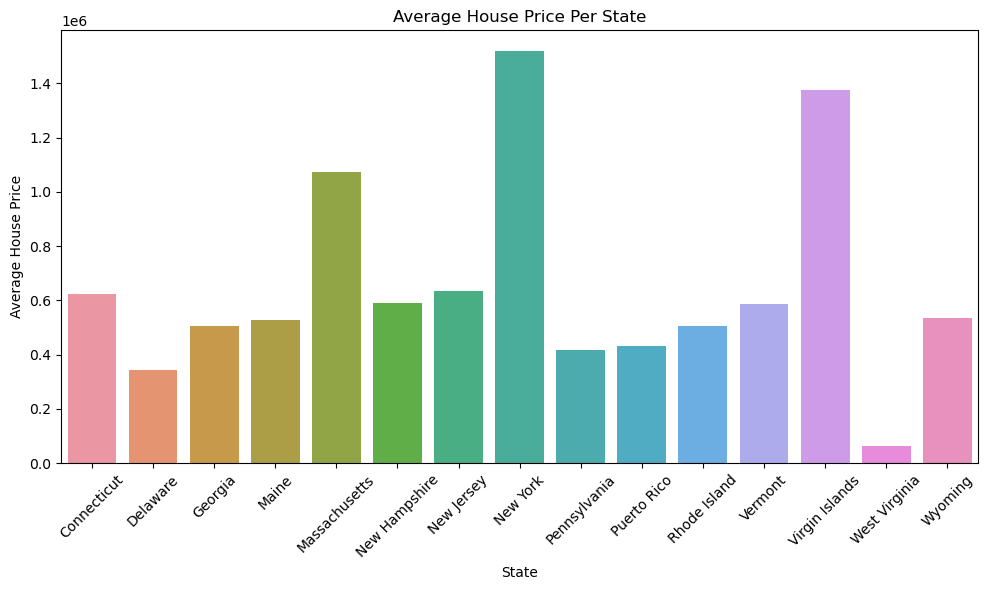

In [36]:
#Math Plotting the average house price per State
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='price', data=average_house_price)
plt.xlabel('State')
plt.ylabel('Average House Price')
plt.title('Average House Price Per State')
plt.xticks(rotation=45)
plt.tight_layout()

In [43]:
import plotly.express as px

# Calculate average life expectancy
avg_lifeExp = (df_filtered['lifeExp'] * df_filtered['pop']).sum() / df_filtered['pop'].sum()

# Create choropleth map
fig = px.choropleth(df_filtered, locations="iso_alpha", color="lifeExp",
                    color_continuous_scale=px.colors.diverging.Geyser,
                    color_continuous_midpoint=avg_lifeExp,
                    title="World Average Life Expectancy in 2007: %.2f" % avg_lifeExp)


KeyError: 'lifeExp'

In [29]:
#Create our model
#label_encoder = LabelEncoder()

#Convert 'state' to numerical using Label Encoding
#df['state_encoded'] = label_encoder.fit_transform(df)

#Convert 'city' to numerical using Label Encoding


